# Unit 11. 대중교통 데이터 시각화하기

- 수도권 대중교통 데이터는 국가기관이 아닌 티머니 홈페이지(https://www.t-money.co.kr/)에서 제공. 이용안내-대중교통 통계자료-최근 월간 통계자료 게시글( 2019년 1월 데이터를 기준)

먼저 활용할 데이터는 ‘지하철 유무임별 이용현황’ 데이터입니다.

## 2. 지하철 유무임별 이용현황 데이터 정제하기
지하철 유무임별 이용현황 탭을 선택. 파일 → 다른 이름으로 저장을 눌러 파일 이름을 subwayfee.csv로 수정하고 파일 형식을 CSV로 선택한 후 저장 버튼을 누릅니다.
데이터를 살펴보면 숫자에 콤마(,)가 포함되어 있고, ‘작업일시’ 열(column)이 있습니다. 원활한 데이터 처리를 위해 불필요한 콤마를 지우고, 우리가 사용하지 않을 데이터인 ‘작업일시’ 열도 지우겠습니다.

(여기는 생략)

[cp949 vs euc-kr : 어떤 차이점이 있는지 간단히 알아봅시다.
](https://codingdog.tistory.com/entry/cp949-vs-euc-kr-%EC%96%B4%EB%96%A4-%EC%B0%A8%EC%9D%B4%EC%A0%90%EC%9D%B4-%EC%9E%88%EB%8A%94%EC%A7%80-%EA%B0%84%EB%8B%A8%ED%9E%88-%EC%95%8C%EC%95%84%EB%B4%85%EC%8B%9C%EB%8B%A4)

euc-kr: 간단 커버
cp949: 전체 커버

In [2]:
# 제대로 되었는지 확인

import csv
f = open('subwayfee.csv', encoding='cp949')
fee = csv.reader(f)

for row in fee:
    print(row)

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2019-01', '1호선', '0150', '서울역', '1516452', '1400464', '221180', '211764']
['2019-01', '1호선', '0151', '시청', '676932', '676266', '102388', '101033']
['2019-01', '1호선', '0152', '종각', '1240810', '1177643', '162410', '152062']
['2019-01', '1호선', '0153', '종로3가', '703110', '674148', '387062', '362735']
['2019-01', '1호선', '0154', '종로5가', '571824', '583955', '275447', '263687']
['2019-01', '1호선', '0155', '동대문', '308301', '342898', '134071', '138633']
['2019-01', '1호선', '0156', '신설동', '360561', '353834', '126466', '120147']
['2019-01', '1호선', '0157', '제기동', '293540', '288217', '374571', '400607']
['2019-01', '1호선', '0158', '청량리(서울시립대입구)', '463456', '482960', '352121', '357571']
['2019-01', '1호선', '0159', '동묘앞', '174683', '188711', '146034', '147551']
['2019-01', '2호선', '0201', '시청', '706097', '679503', '61058', '55387']
['2019-01', '2호선', '0202', '을지로입구', '1415414', '1414980', '120425', '111592']
['2019-01', '2호선', '0203', '을지로3가', 

In [3]:
# 헤더 데이터 제외하고, 4-7번 열까지 데이터를 정수로 바꾸기

f = open('subwayfee.csv', encoding='cp949')
fee = csv.reader(f)
next(fee) 

for row in fee:
    for i in range(4, 8):
        row[i] = int(row[i])
    print(row)

['2019-01', '1호선', '0150', '서울역', 1516452, 1400464, 221180, 211764]
['2019-01', '1호선', '0151', '시청', 676932, 676266, 102388, 101033]
['2019-01', '1호선', '0152', '종각', 1240810, 1177643, 162410, 152062]
['2019-01', '1호선', '0153', '종로3가', 703110, 674148, 387062, 362735]
['2019-01', '1호선', '0154', '종로5가', 571824, 583955, 275447, 263687]
['2019-01', '1호선', '0155', '동대문', 308301, 342898, 134071, 138633]
['2019-01', '1호선', '0156', '신설동', 360561, 353834, 126466, 120147]
['2019-01', '1호선', '0157', '제기동', 293540, 288217, 374571, 400607]
['2019-01', '1호선', '0158', '청량리(서울시립대입구)', 463456, 482960, 352121, 357571]
['2019-01', '1호선', '0159', '동묘앞', 174683, 188711, 146034, 147551]
['2019-01', '2호선', '0201', '시청', 706097, 679503, 61058, 55387]
['2019-01', '2호선', '0202', '을지로입구', 1415414, 1414980, 120425, 111592]
['2019-01', '2호선', '0203', '을지로3가', 608979, 601323, 91668, 91016]
['2019-01', '2호선', '0204', '을지로4가', 278663, 281834, 98689, 94261]
['2019-01', '2호선', '0205', '동대문역사문화공원', 470548, 540467, 58918,

## 3. 유임 승차 비율이 가장 높은 역은 어디일까
- 꼭 유임, 무임에 대한 질문이 아니더라도 유임과 무임 숫자를 합쳐서 각 역별 승차 인원에 대한 질문을 할 수도 있습니다.
무임승차와 유임승차의 비율
rate = 유임승차인원 / 무임승차인원

간단한 알고리즘을 생각할 수 있습니다.

1 | 데이터를 읽어온다.

2 | 모든 역의 데이터를 바탕으로 각 역의 비율(rate)을 계산한다.

3 | 비율이 가장 높은 역을 찾는다.

4 | 비율이 가장 높은 역이 어디인지, 그 비율이 얼마인지 출력한다.

In [8]:
import csv
f = open('subwayfee.csv', encoding='cp949')
fee = csv.reader(f)
next(fee)
rate = 0
mx = 0

for row in fee:
    for i in range(4, 8):
        row[i] = int(row[i])
    if row[6] != 0:
        rate = row[4] / row[6]
        if rate > mx:
            mx = rate
            print(row, round(rate, 2))
        
print(mx)

['2019-01', '1호선', '0150', '서울역', 1516452, 1400464, 221180, 211764] 6.86
['2019-01', '1호선', '0152', '종각', 1240810, 1177643, 162410, 152062] 7.64
['2019-01', '2호선', '0201', '시청', 706097, 679503, 61058, 55387] 11.56
['2019-01', '2호선', '0202', '을지로입구', 1415414, 1414980, 120425, 111592] 11.75
['2019-01', '2호선', '0209', '한양대', 233785, 256079, 15380, 16652] 15.2
['2019-01', '2호선', '0222', '강남', 3153418, 3210437, 186486, 167666] 16.91
['2019-01', '2호선', '0239', '홍대입구', 2351935, 2507561, 114832, 111488] 20.48
['2019-01', '3호선', '0321', '충무로', 55, 0, 2, 0] 27.5
27.5


그런데 결과를 보니 충무로역의 데이터가 조금 이상하죠. 3호선 충무로역의 유임하차, 무임하차 값이 모두 0이네요. 충무로역은 3호선과 4호선이 운행되는 환승역으로, 4호선 충무로역의 값과 함께 처리해야 할 것입니다.

충무로역처럼 여러 개 호선으로 환승이 가능한 역의 경우 별도의 데이터 집계 방법이 있는 듯합니다. 하지만 우리는 그 방법을 정확히 알지 못하므로 유임 하차, 무임 하차 값이 0인 데이터를 어떻게 다룰지 고민해야 합니다.

전체 인원 중 유임 승차 인원을 구하는 방법으로 데이터를 다뤄봅시다. 즉, 다음과 같이 비율 계산 방식을 바꿉니다.

-> rate = 유임 승차 인원 / 전체(유임+무임) 인원

In [20]:
f = open('subwayfee.csv', encoding='cp949')
fee = csv.reader(f)
next(fee)

rate = 0
mx = 0


for row in fee:
    for i in range(4, 8):
        row[i] = int(row[i])
    if row[6] != 0 and (row[4] + row[6]) > 100000:
        rate = row[4] / (row[4] + row[6]) 
        if rate > mx:
            mx = rate
            print(row, round(rate, 2))
        
print(mx)

['2019-01', '1호선', '0150', '서울역', 1516452, 1400464, 221180, 211764] 0.87
['2019-01', '1호선', '0152', '종각', 1240810, 1177643, 162410, 152062] 0.88
['2019-01', '2호선', '0201', '시청', 706097, 679503, 61058, 55387] 0.92
['2019-01', '2호선', '0202', '을지로입구', 1415414, 1414980, 120425, 111592] 0.92
['2019-01', '2호선', '0209', '한양대', 233785, 256079, 15380, 16652] 0.94
['2019-01', '2호선', '0222', '강남', 3153418, 3210437, 186486, 167666] 0.94
['2019-01', '2호선', '0239', '홍대입구', 2351935, 2507561, 114832, 111488] 0.95
0.9534483800050836


In [21]:
f = open('subwayfee.csv', encoding='cp949')
fee = csv.reader(f)
next(fee)

rate = 0

for row in fee:
    for i in range(4, 8):
        row[i] = int(row[i])
    if row[6] != 0 and (row[4] + row[6]) > 100000:
        rate = row[4] / (row[4] + row[6]) 
        if rate > 0.94:
            print(row, round(rate, 2))

['2019-01', '2호선', '0222', '강남', 3153418, 3210437, 186486, 167666] 0.94
['2019-01', '2호선', '0239', '홍대입구', 2351935, 2507561, 114832, 111488] 0.95
['2019-01', '경부선', '1001', '서울역', 178223, 29980, 10325, 1612] 0.95
['2019-01', '9호선', '4125', '신논현', 965930, 995451, 57013, 54557] 0.94
['2019-01', '공항철도 1호선', '4203', '홍대입구', 336328, 335507, 17545, 17112] 0.95
['2019-01', '공항철도 1호선', '4206', '마곡나루', 133488, 119389, 8060, 8192] 0.94
['2019-01', '공항철도 1호선', '4207', '김포공항', 300654, 196229, 18640, 14332] 0.94
['2019-01', '공항철도 1호선', '4210', '청라국제도시', 174320, 164483, 9921, 9676] 0.95


젊은 사람들이 많이 모이는 곳이라고 알려진 곳들이 많이 포함되어 있기 때문입니다. 그렇다면 평소에 들어보지 못했던 낯선 역 이름이라도 아마 젊은 사람들이 많이 모이는 곳이라는 것을 예측할 수 있을 겁니다.

 먼저 비율이 가장 높은 역이 어디인지 저장할 max_station이라는 변수를 빈 문자열('')로 초기화한 다음, 역 이름(row[3])과 몇 호선(row[1])인지를 출력하면 됩니다.

In [29]:
# 유임 승차 비율이 가장 높은 역 찾기

import csv

f = open('subwayfee.csv', encoding='cp949')
fee = csv.reader(f)
next(fee)

mx = 0
rate = 0
mx_station=''

for row in fee:
    for i in range(4, 8):
        row[i] = int(row[i])
    if row[6] != 0 and (row[4] + row[6]) > 100000:
        rate = row[4] / (row[4] + row[6])
        if rate > mx:
            mx = rate
            mx_station = row[3] + ' ' + row[1]
            
print(mx_station, round(mx*100, 2))

홍대입구 2호선 95.34


### 4. 유무임 승하차 인원이 가장 많은 역은 어디일까

간단한 알고리즘을 생각할 수 있습니다.

1 | 데이터를 읽어온다.

2 | 모든 역의 데이터를 바탕으로 유임 승차, 유임 하차, 무임 승차, 무임 하차 인원이 가장 많은 역을 찾는다.

3 | 각각의 인원이 가장 많은 역을 출력한다.

이번에는 4가지 종류의 데이터를 알아보아야 한다는 점이 조금 다릅니다. 따라서 인원수를 저장할 공간 4개, 역의 정보를 저장할 공간 4개가 추가로 필요합니다. 유임 승차, 유임 하차, 무임 승차, 무임 하차 데이터가 4번 인덱스부터 7번 인덱스까지 순서대로 저장이 되어있으니 리스트와 반복문을 활용하면 좋겠네요.

데이터 파일의 헤더 데이터는 다음과 같습니다.

[‘사용월’, ‘호선명’, ‘역ID’, ‘지하철역’, ‘유임 승차’, ‘유임하차’, ‘무임 승차’, ‘무임하차’]

In [32]:
import csv
f = open('subwayfee.csv', encoding='cp949')
fee = csv.reader(f)
next(fee)

mx = [0] * 4
mx_station = [''] * 4

print(mx)
print(mx_station)

[0, 0, 0, 0]
['', '', '', '']


In [33]:
import csv
f = open('subwayfee.csv', encoding='cp949')
fee = csv.reader(f)
next(fee)

mx = [0] * 4
mx_station = [''] * 4
label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in fee:
    for i in range(4, 8):
        row[i] = int(row[i])
        if row[i] > mx[i-4]:
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + '' + row[1]

for i in range(4):
    print(label[i] + ' : ' + mx_station[i], mx[i])
            
    

유임승차 : 강남2호선 3153418
유임하차 : 강남2호선 3210437
무임승차 : 종로3가1호선 387062
무임하차 : 제기동1호선 400607


### 5. 모든 역의 유무임 승하차 비율은 어떻게 될까
이번에는 데이터가 있는 모든 역에 대한 유무임 승하차 비율을 표현하겠습니다. 이걸 한눈에 보기 쉽게 표현하려면 어떤 형태가 좋을까요?

네, 이런 유형의 데이터는 파이 차트로 표현하면 좋겠네요. 그리고 지금까지 작성했던 코드를 조금만 수정하면 됩니다.

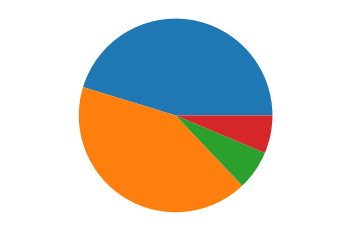

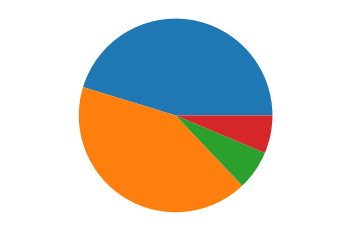

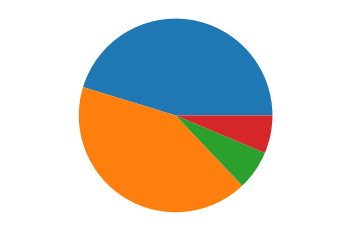

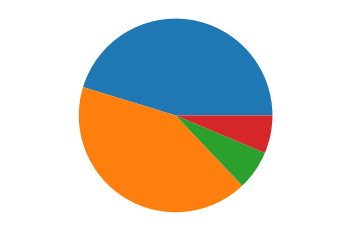

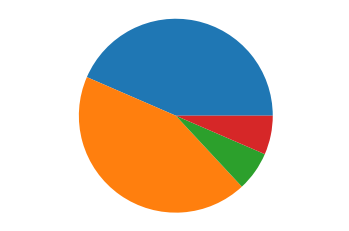

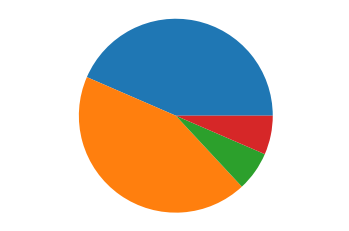

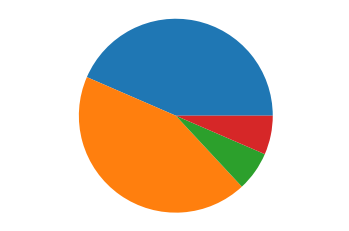

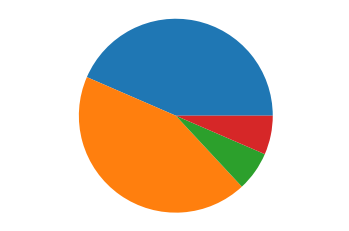

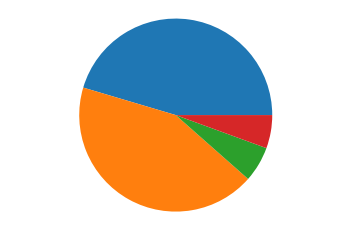

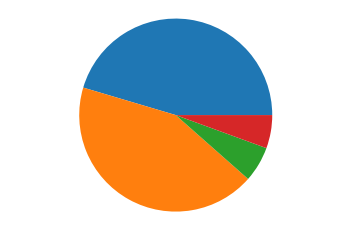

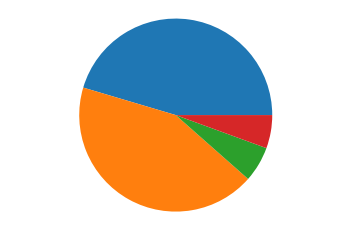

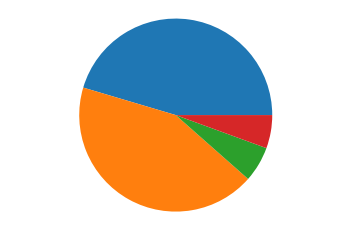

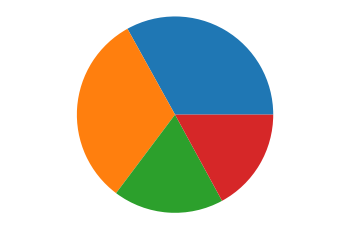

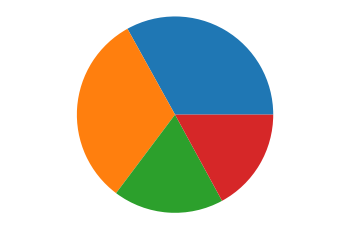

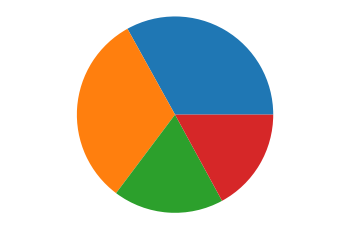

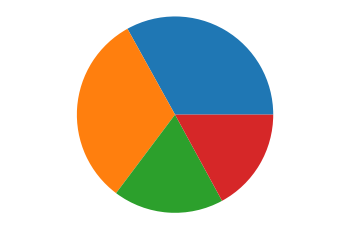

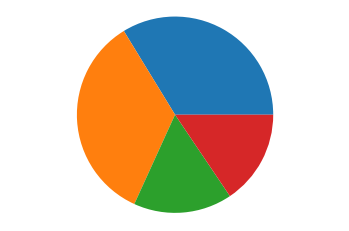

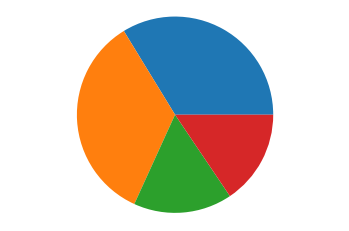

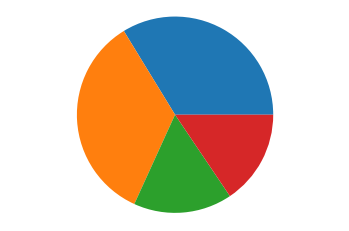

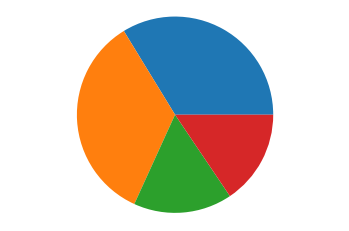

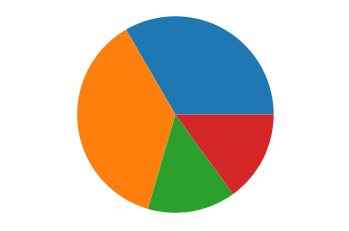

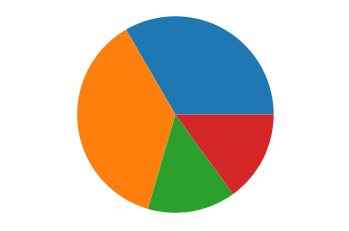

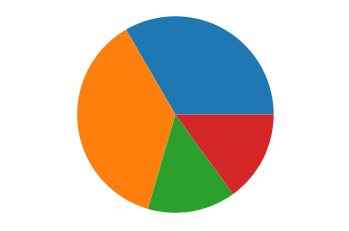

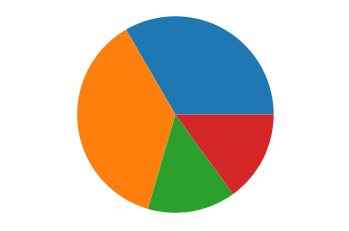

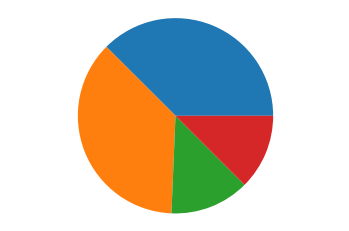

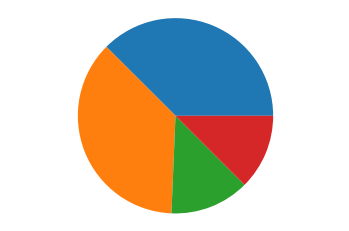

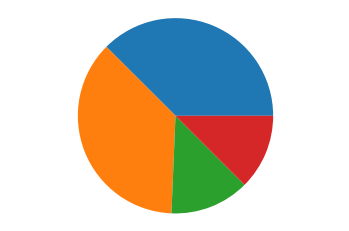

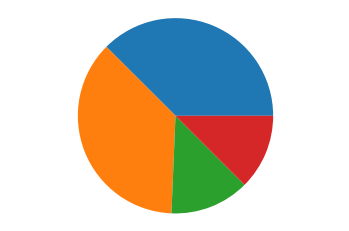

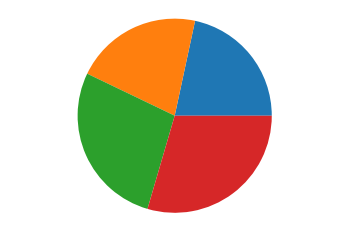

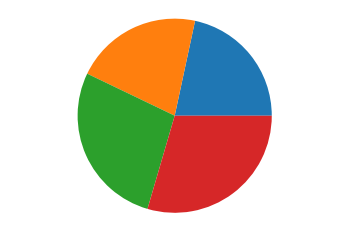

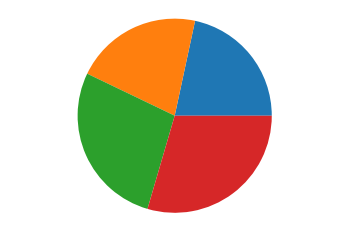

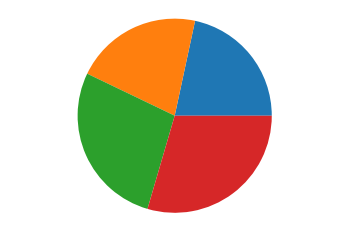

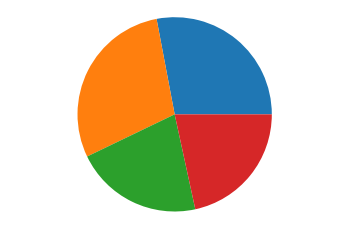

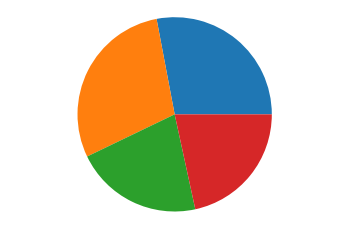

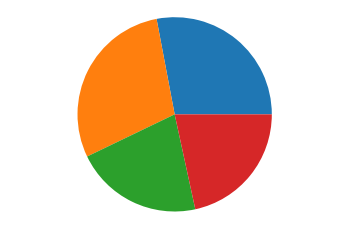

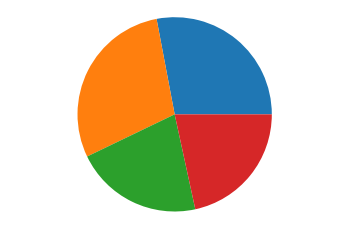

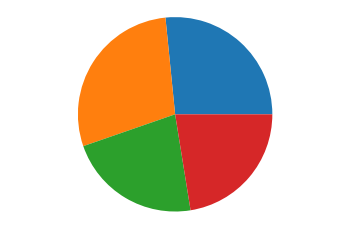

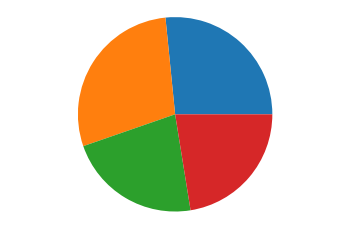

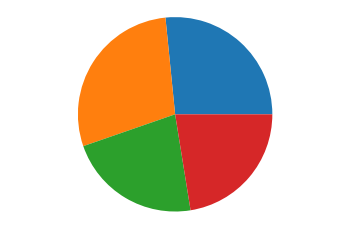

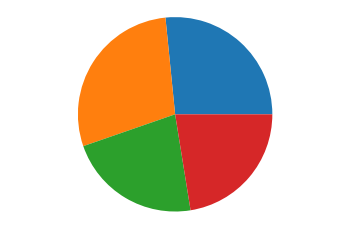

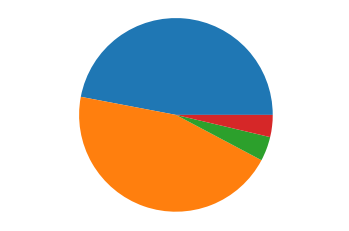

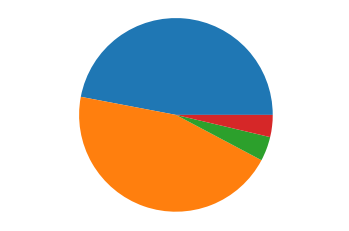

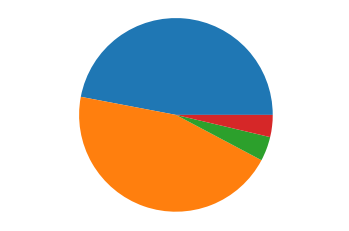

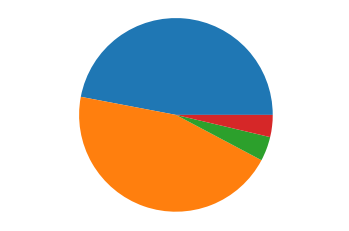

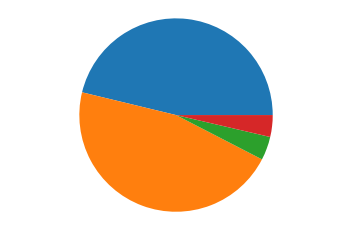

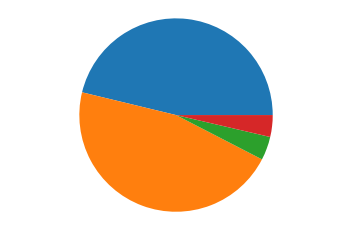

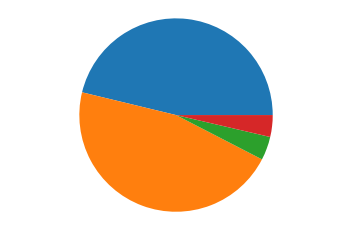

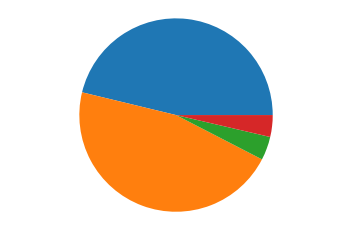

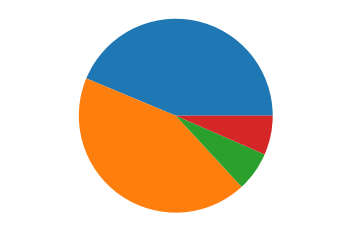

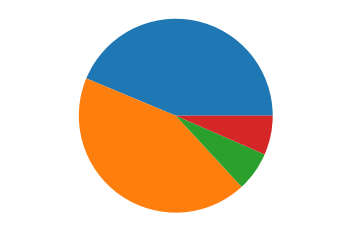

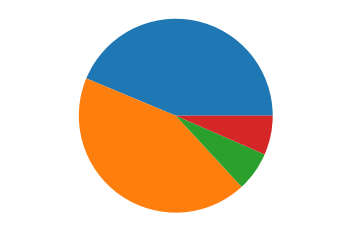

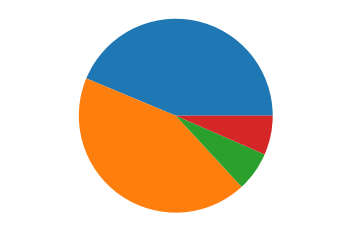

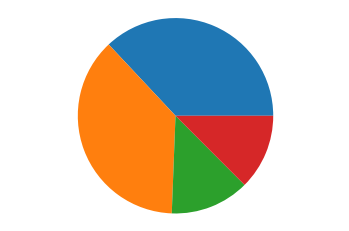

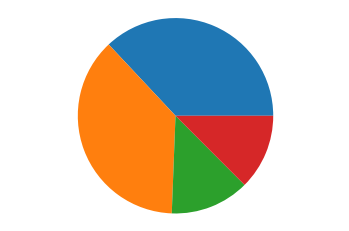

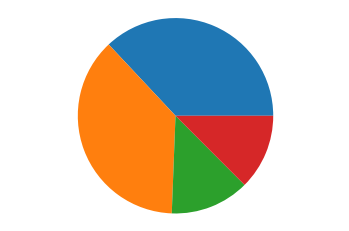

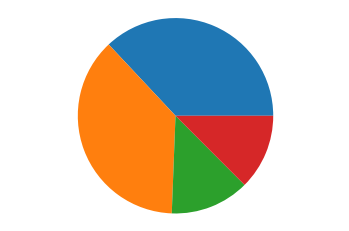

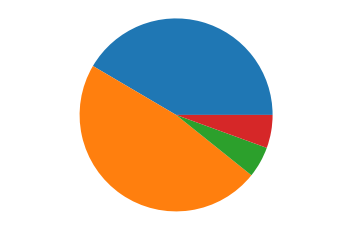

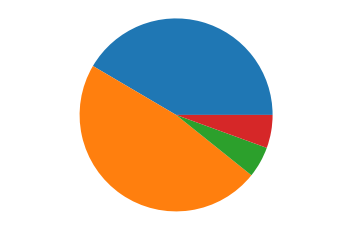

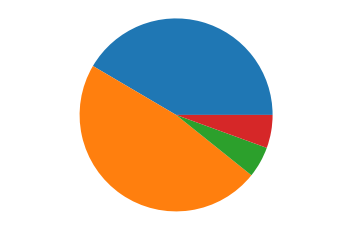

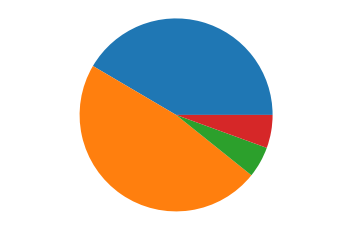

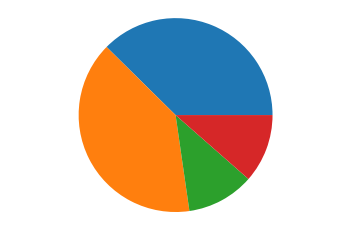

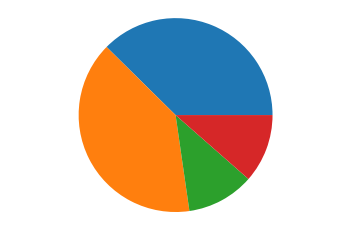

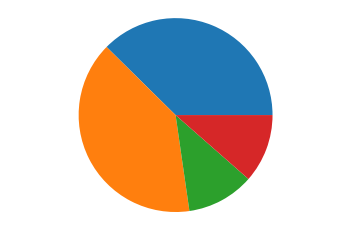

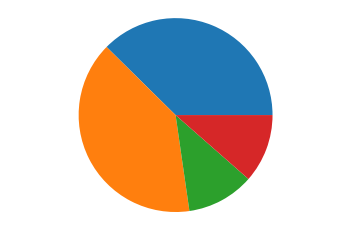

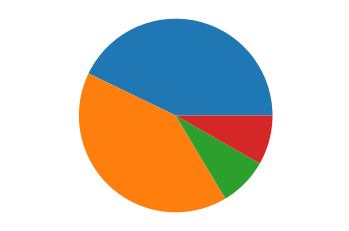

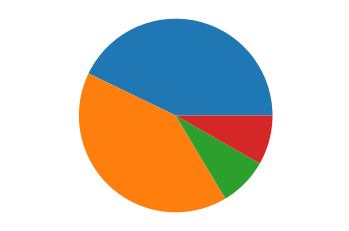

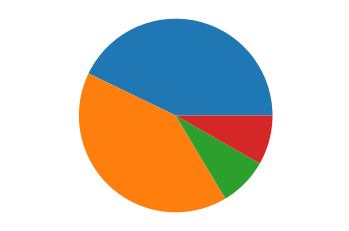

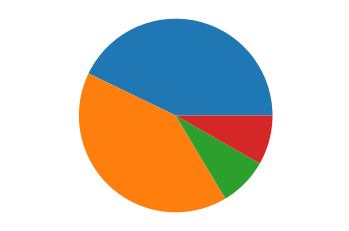

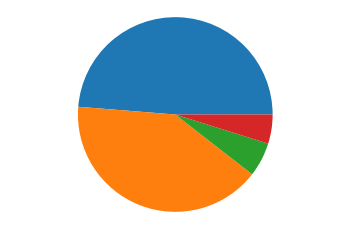

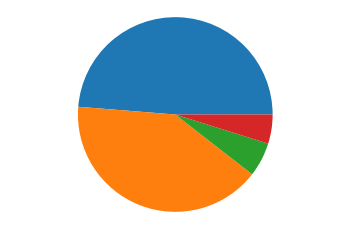

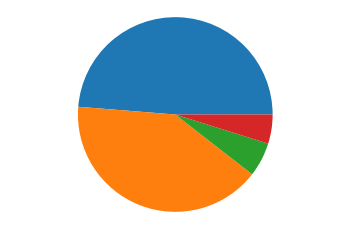

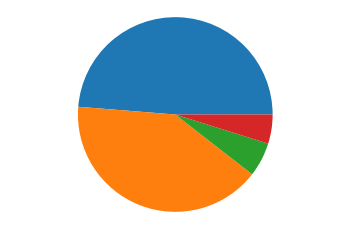

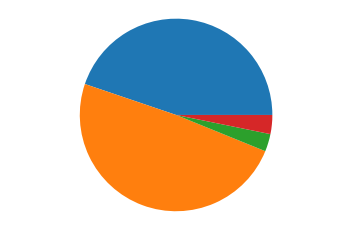

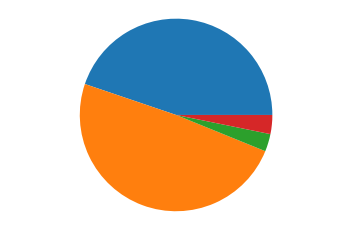

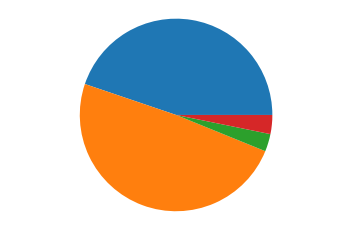

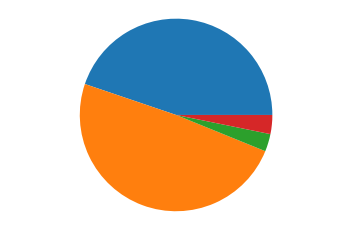

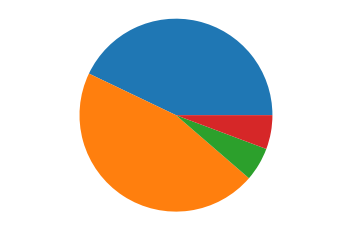

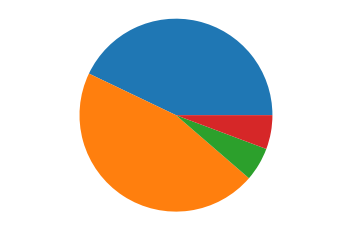

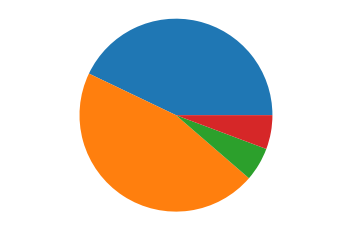

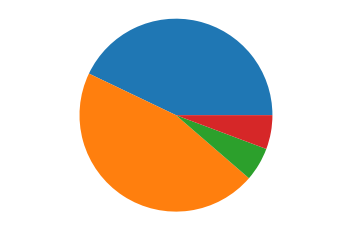

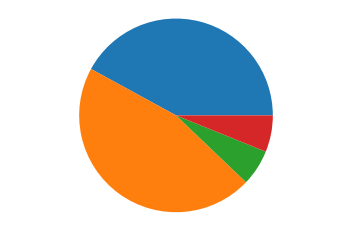

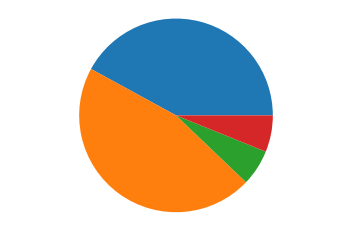

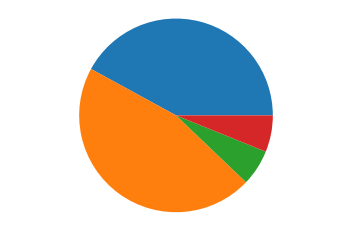

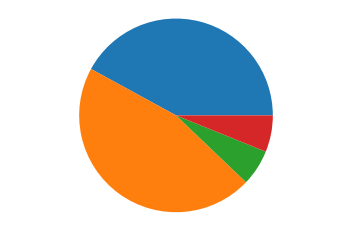

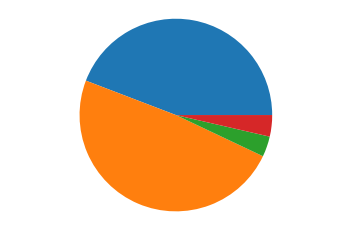

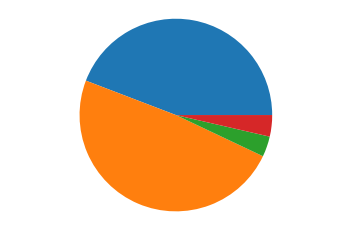

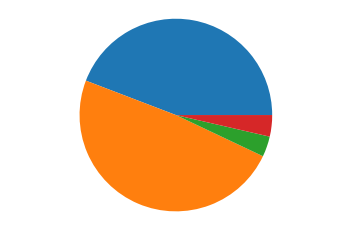

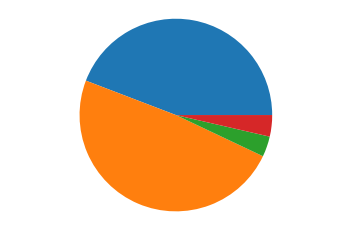

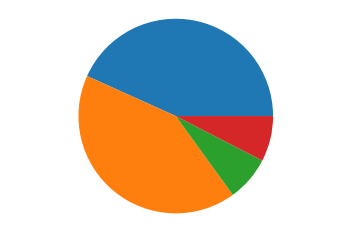

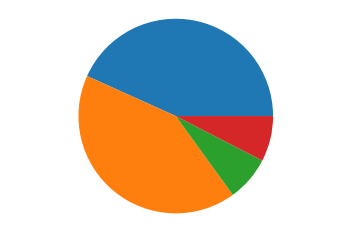

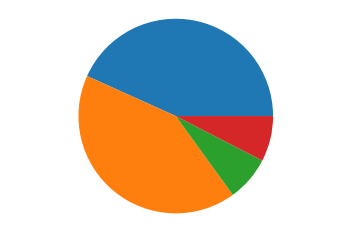

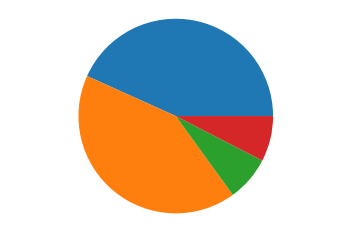

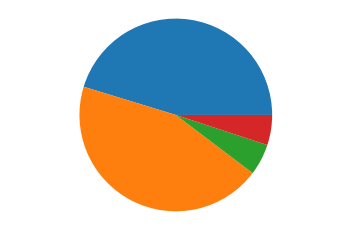

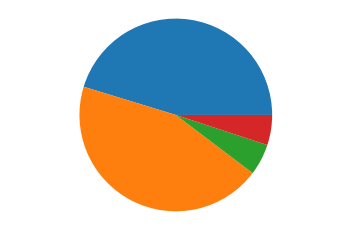

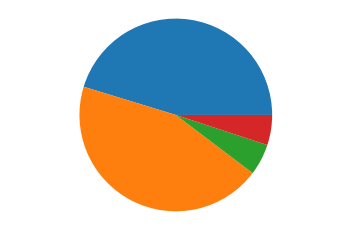

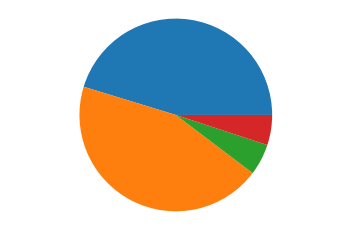

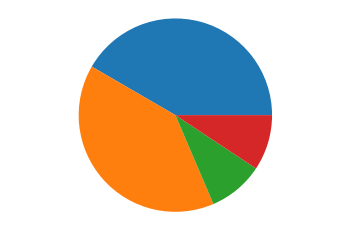

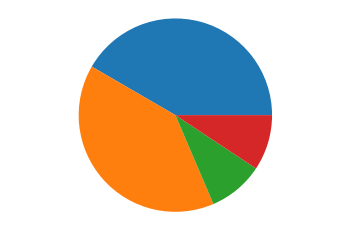

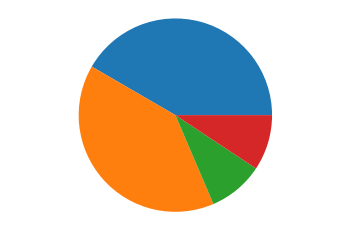

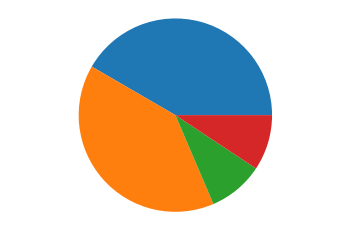

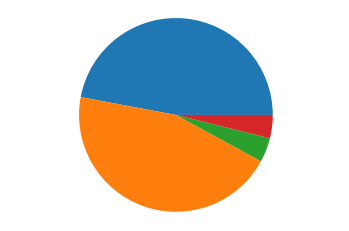

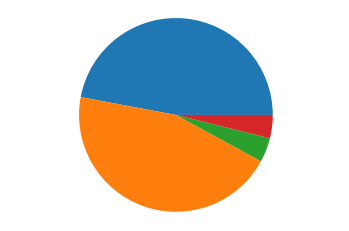

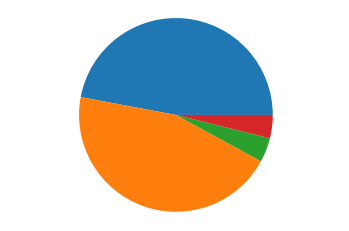

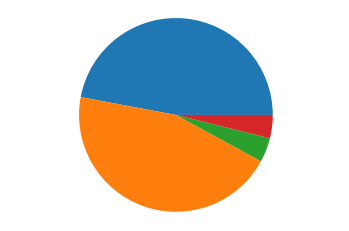

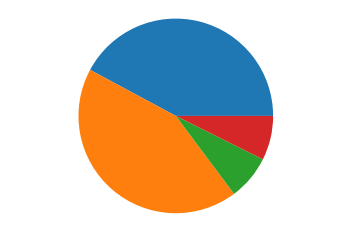

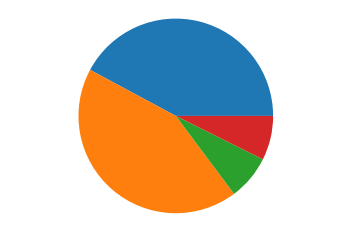

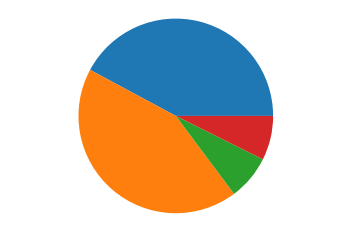

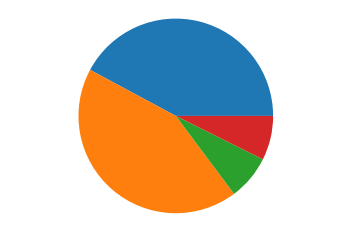

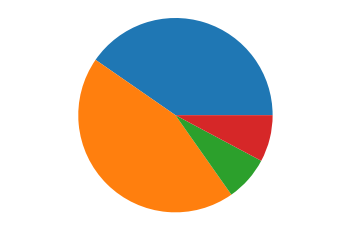

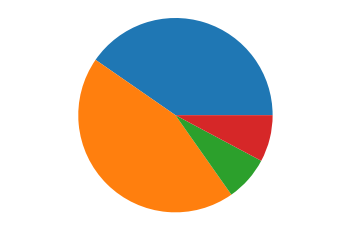

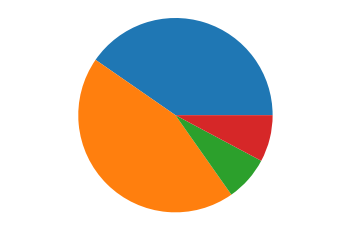

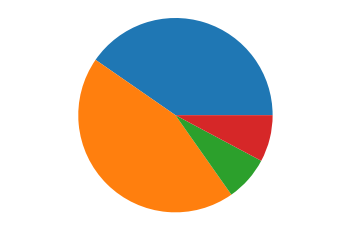

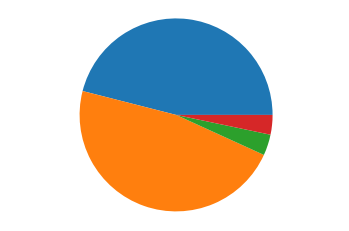

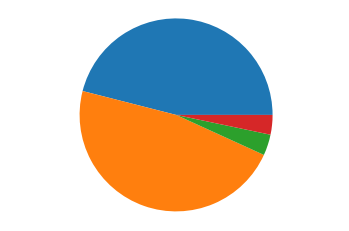

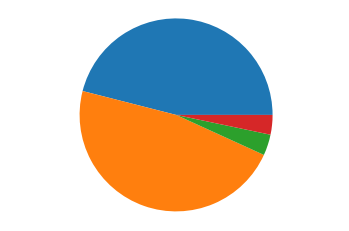

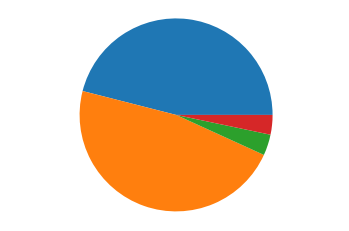

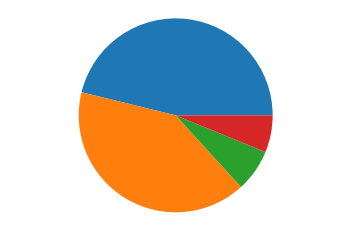

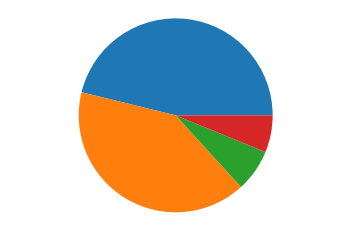

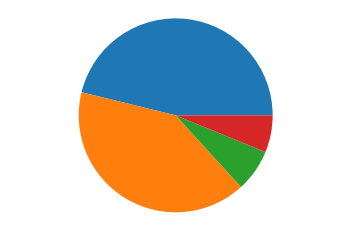

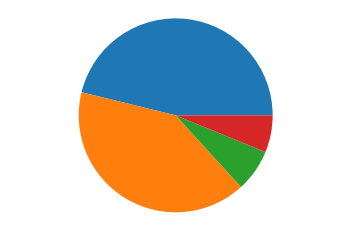

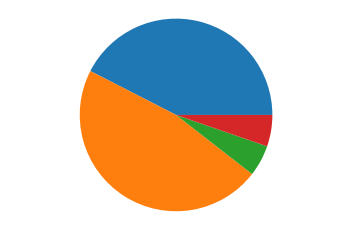

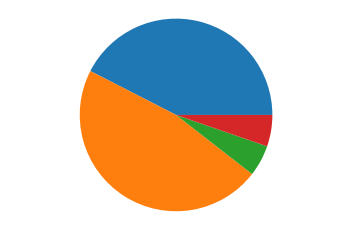

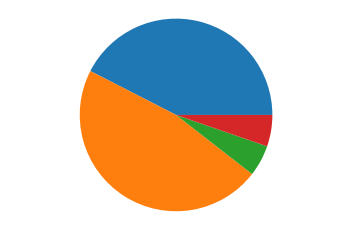

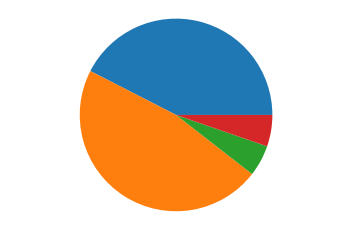

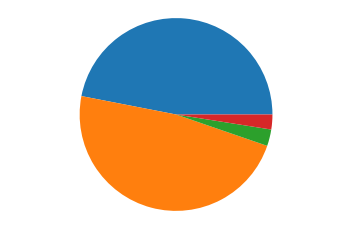

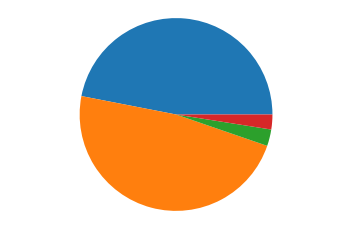

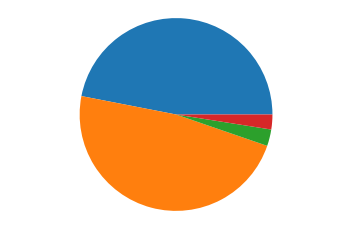

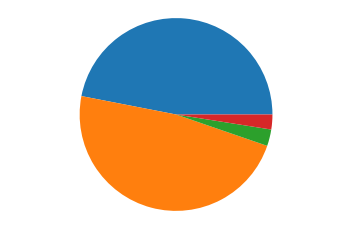

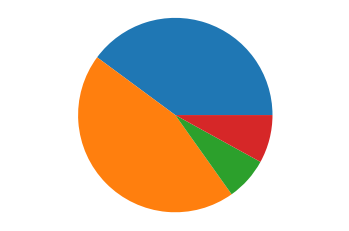

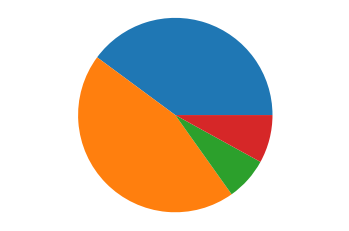

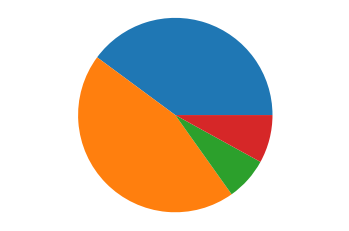

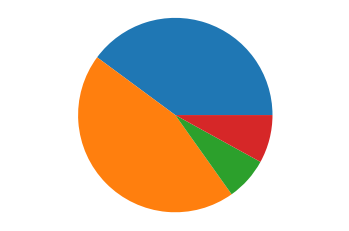

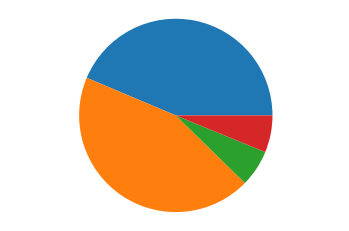

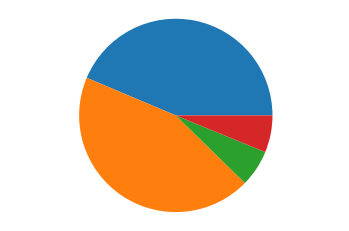

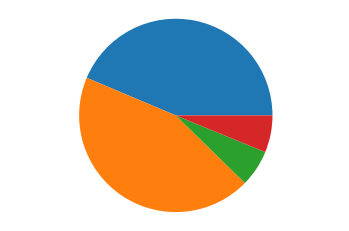

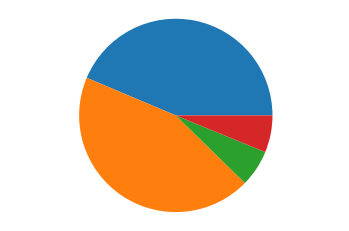

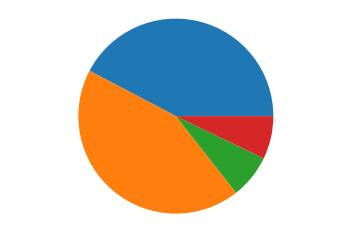

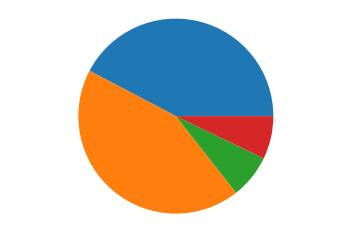

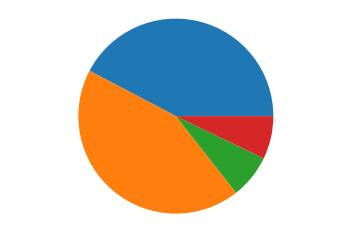

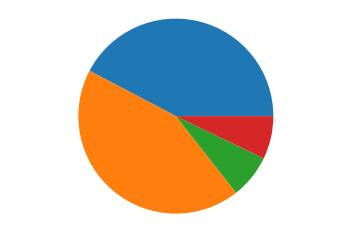

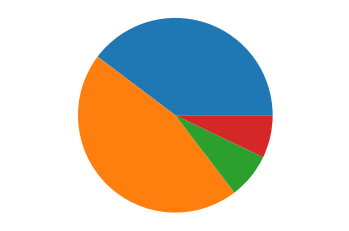

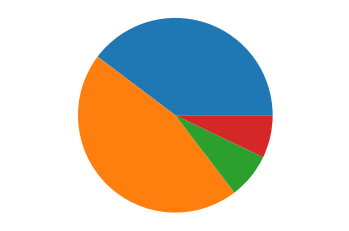

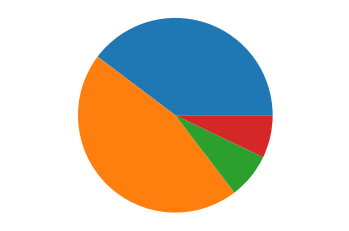

KeyboardInterrupt: 

In [36]:
import matplotlib.pyplot as plt
f = open('subwayfee.csv', encoding='cp949')
fee = csv.reader(f)
next(fee)
label = ['유임승차', '유임하차', '무임승차', '무임하차']
for row in fee:
    for i in range(4, 8):
        row[i] = int(row[i])
        
        plt.pie(row[4:8])
        plt.axis('equal')
        plt.show()

코드는 어떻게 보완하면 좋을까요?

1 | 어떤 역에 대한 차트인지 정보가 부족합니다.

2 | 비율을 수치로 정확하게 나타내면 좋겠습니다.

3 | 색상을 좀 더 예쁘게 바꾸고 싶을 수 있습니다.

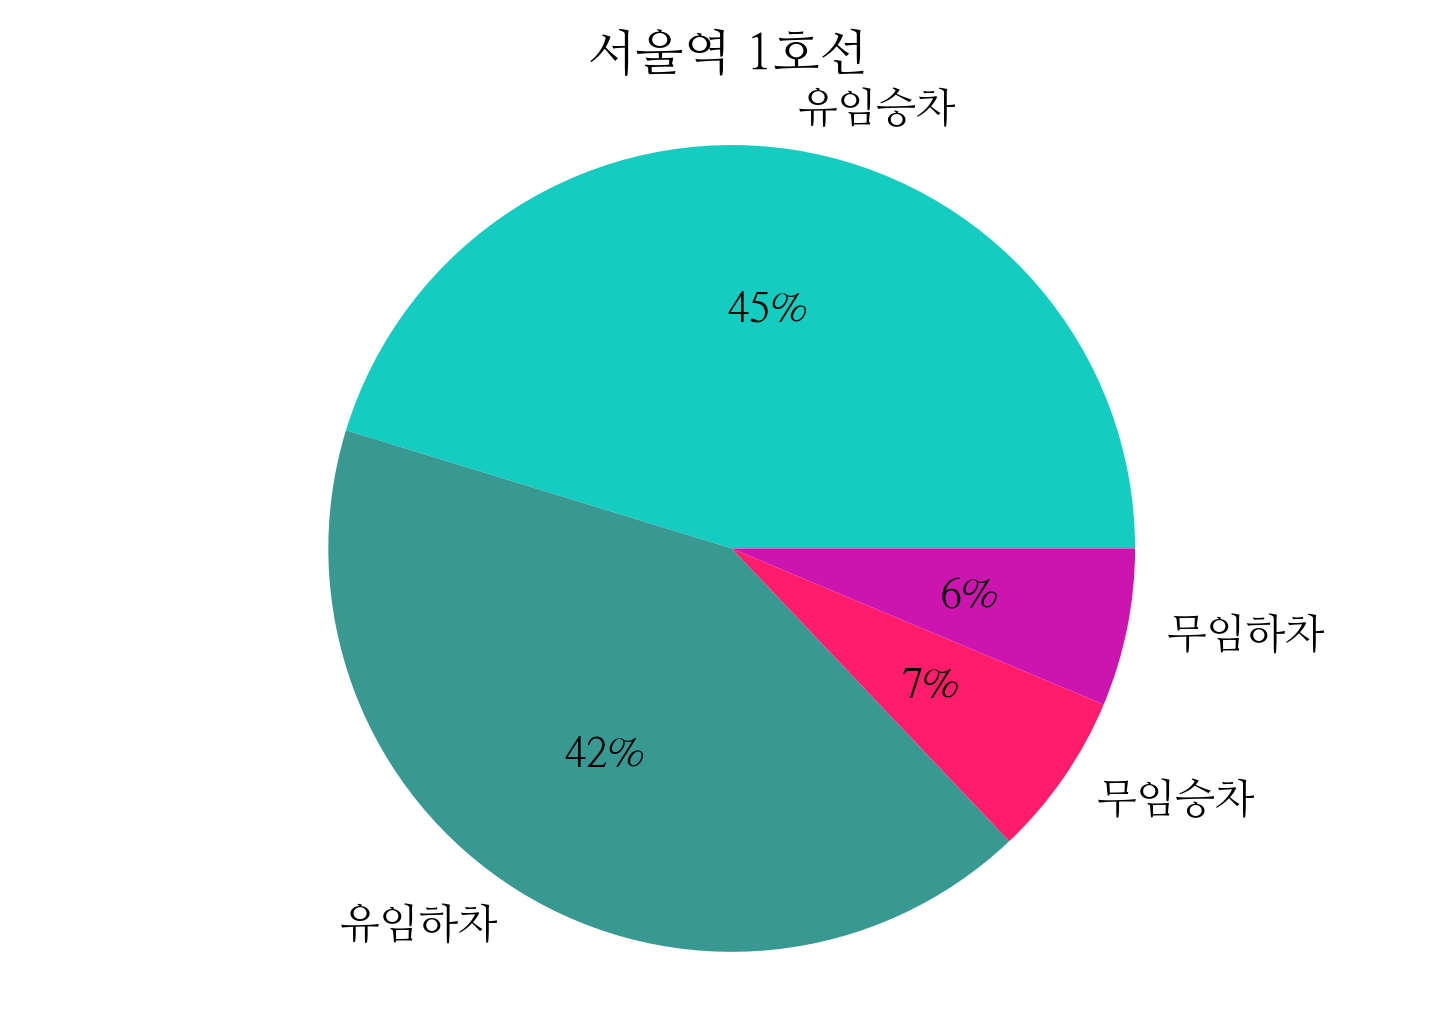

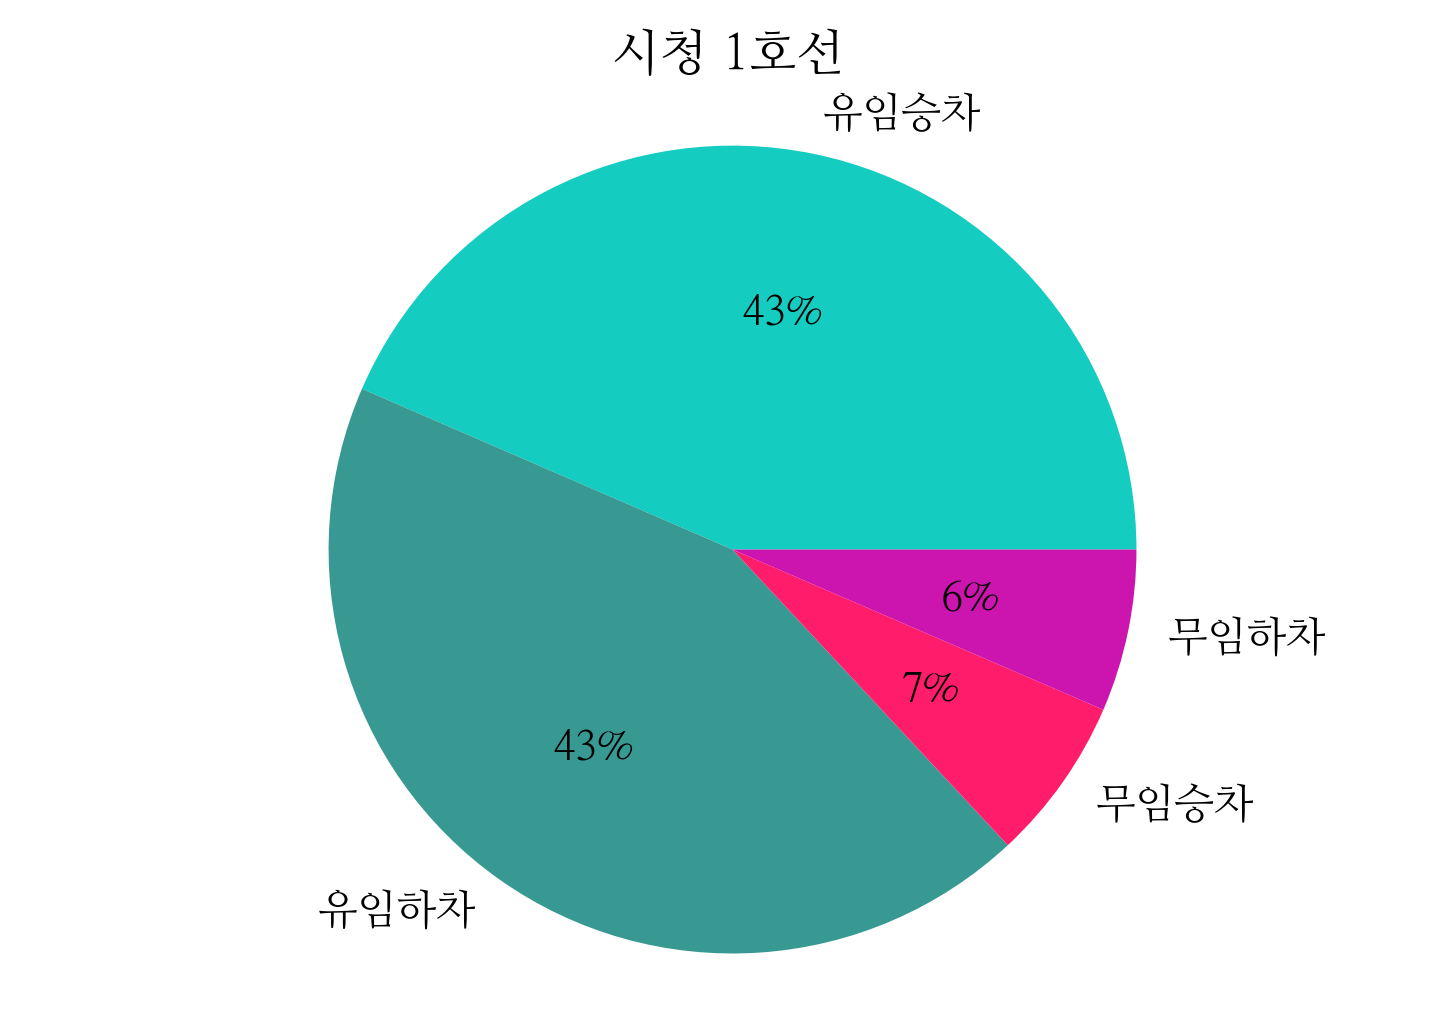

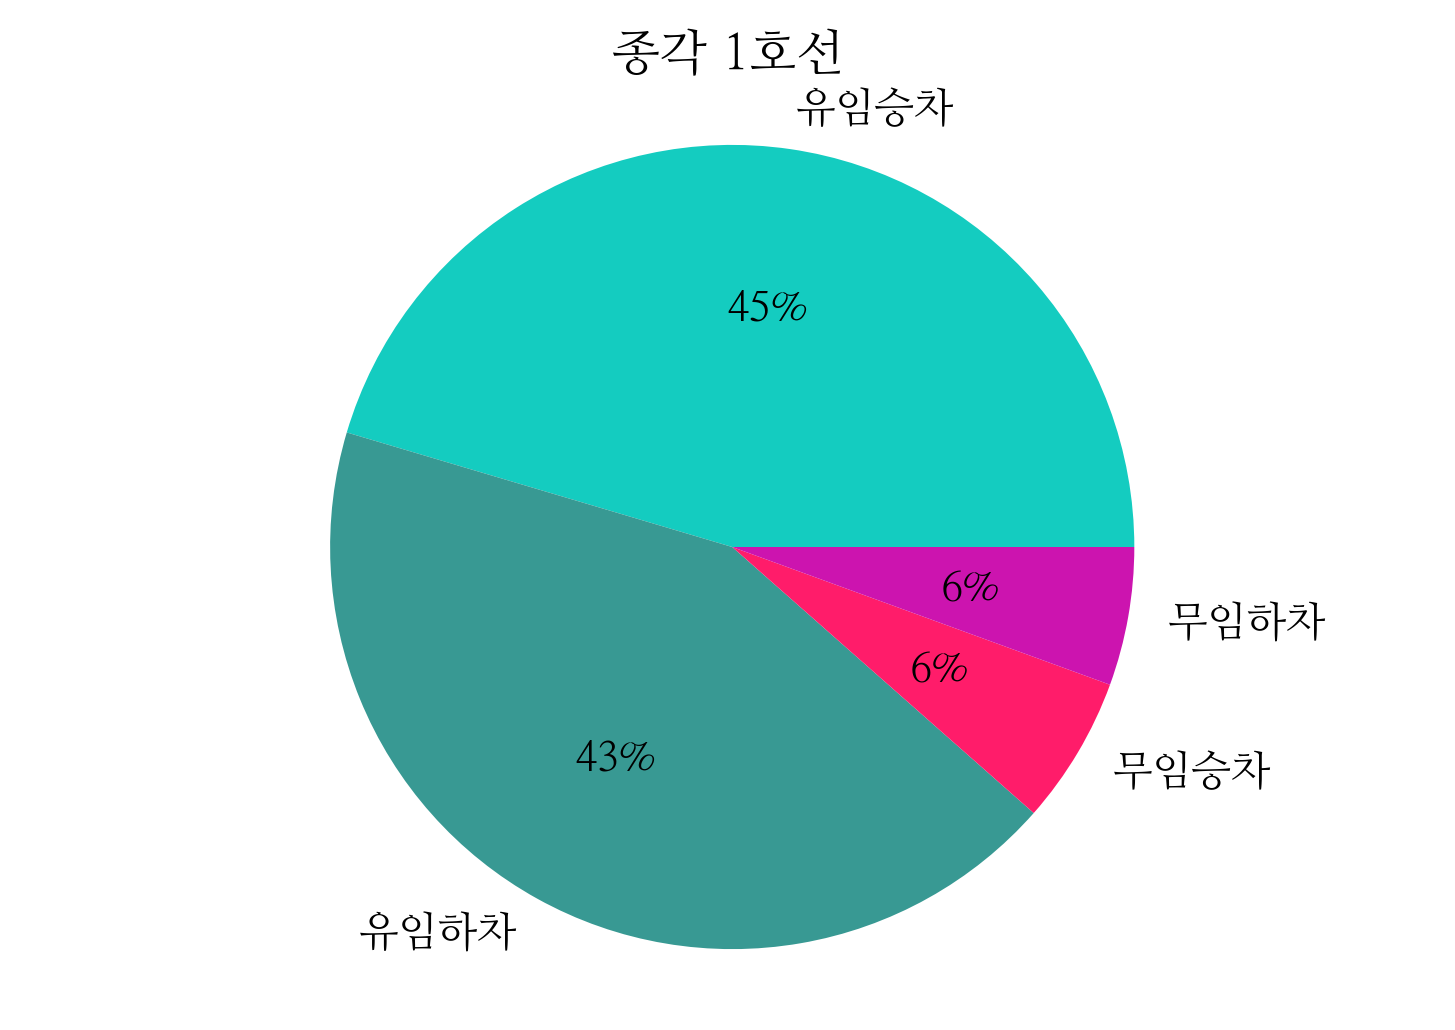

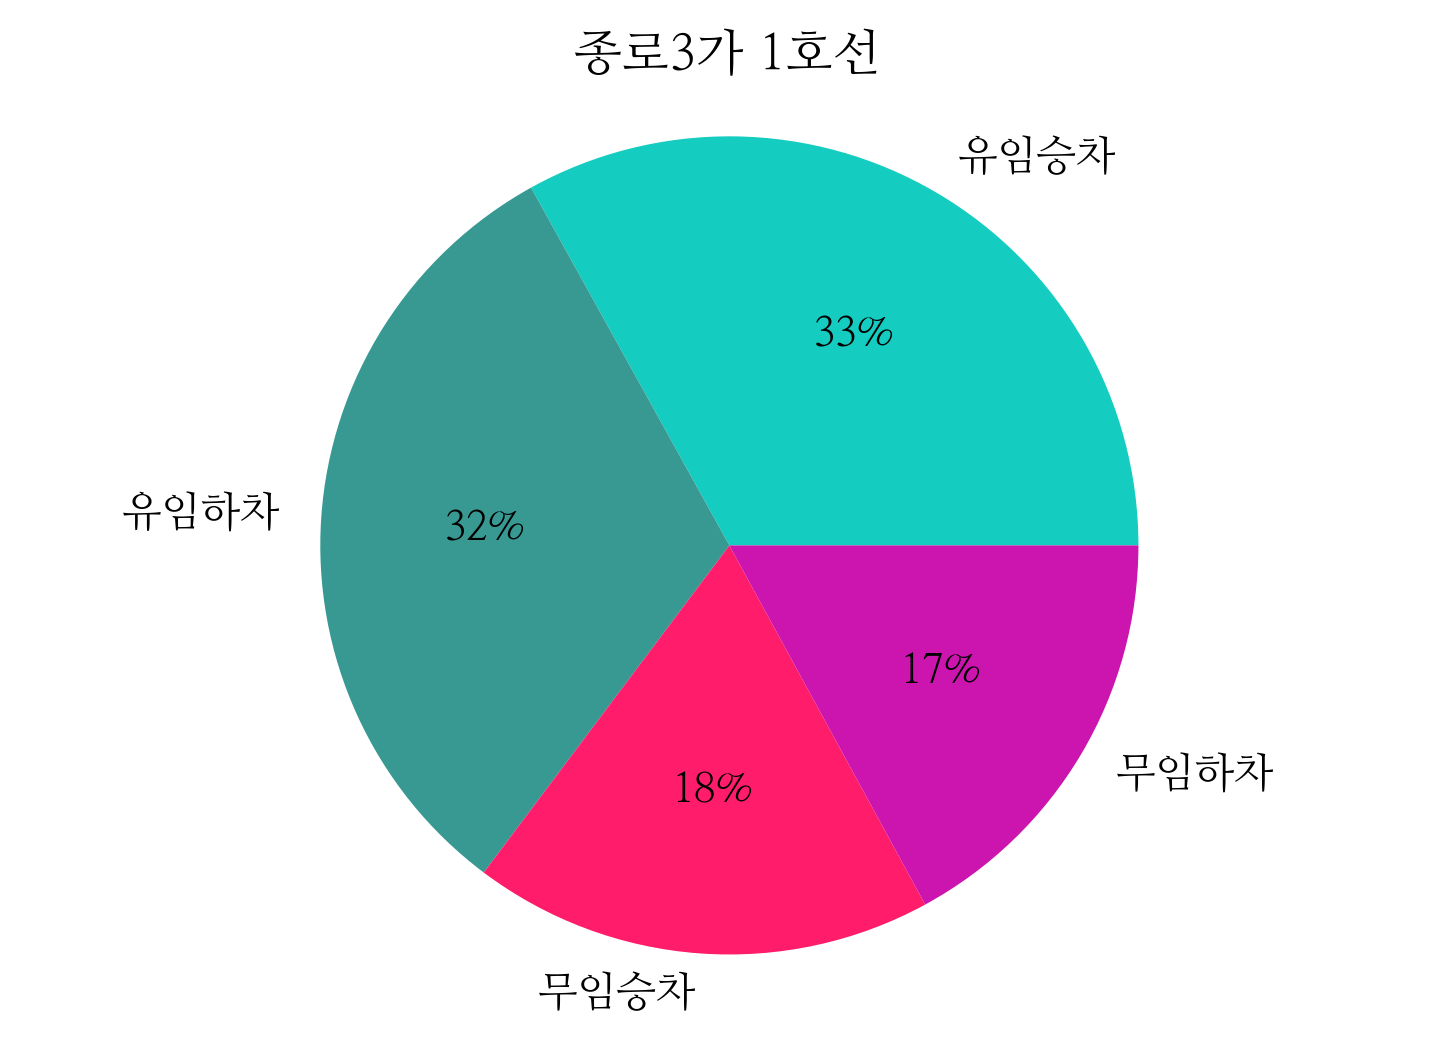

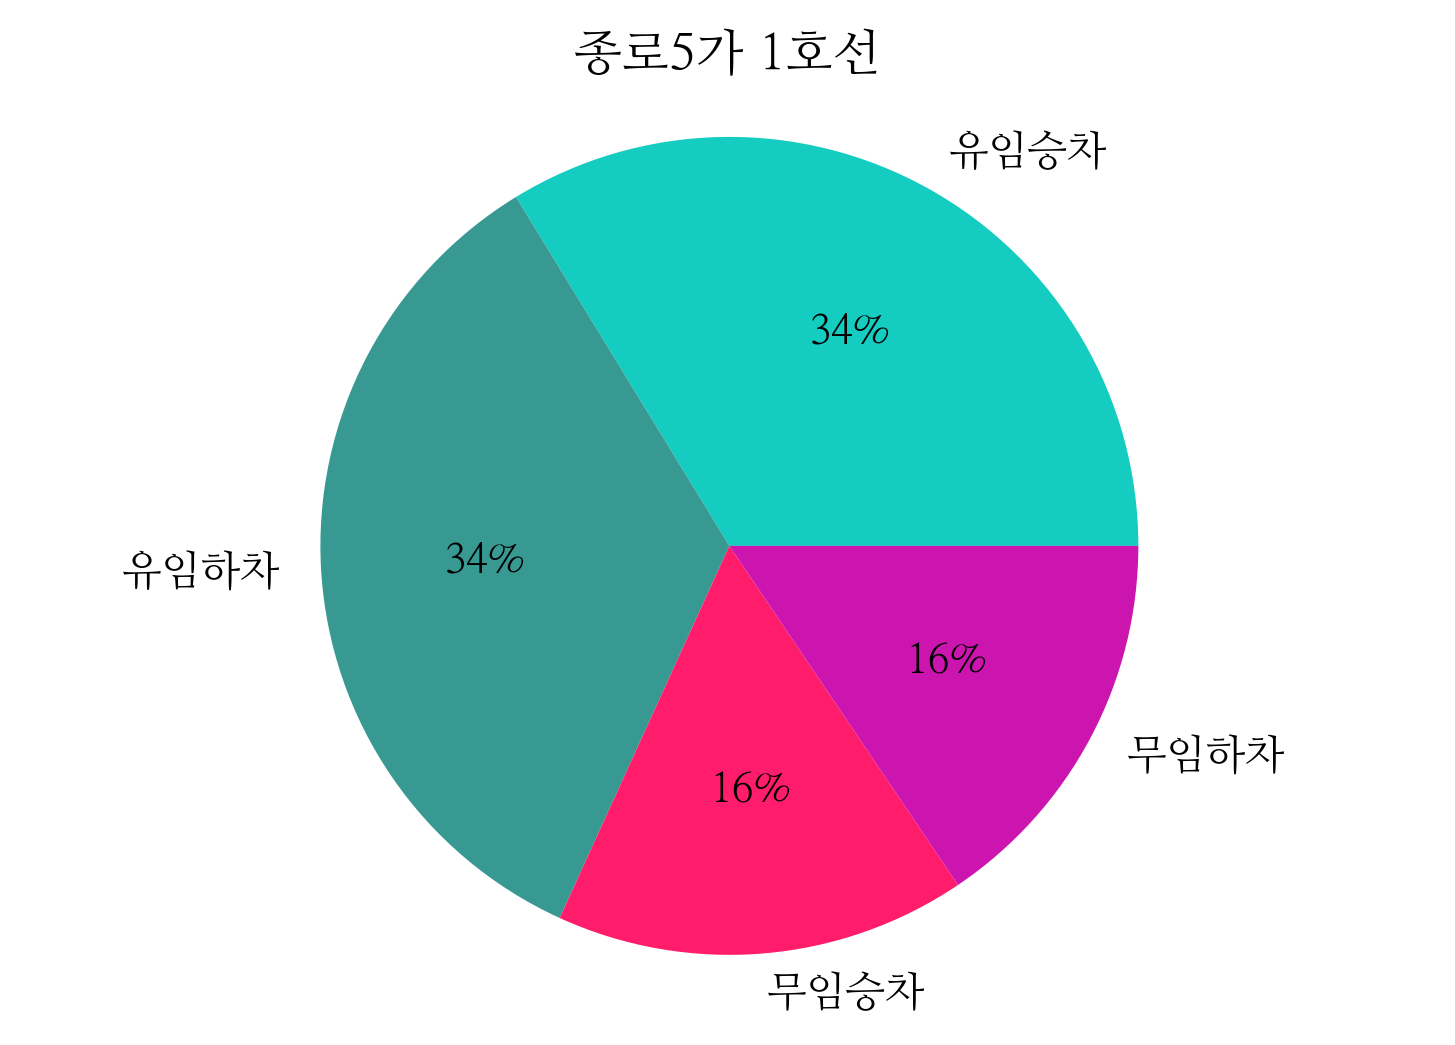

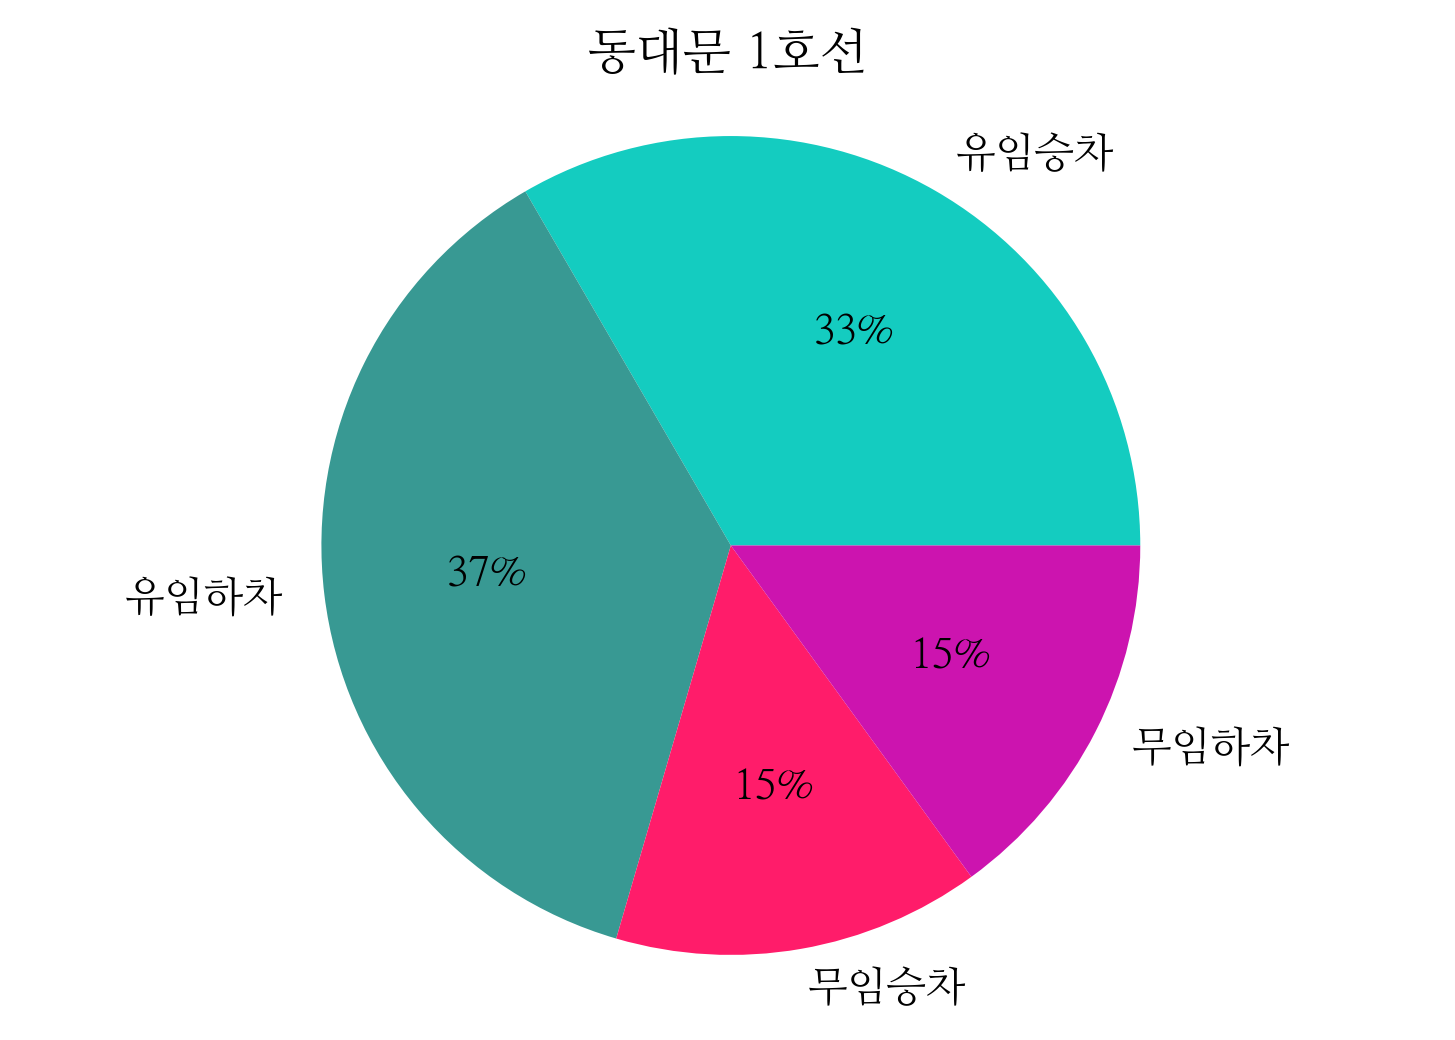

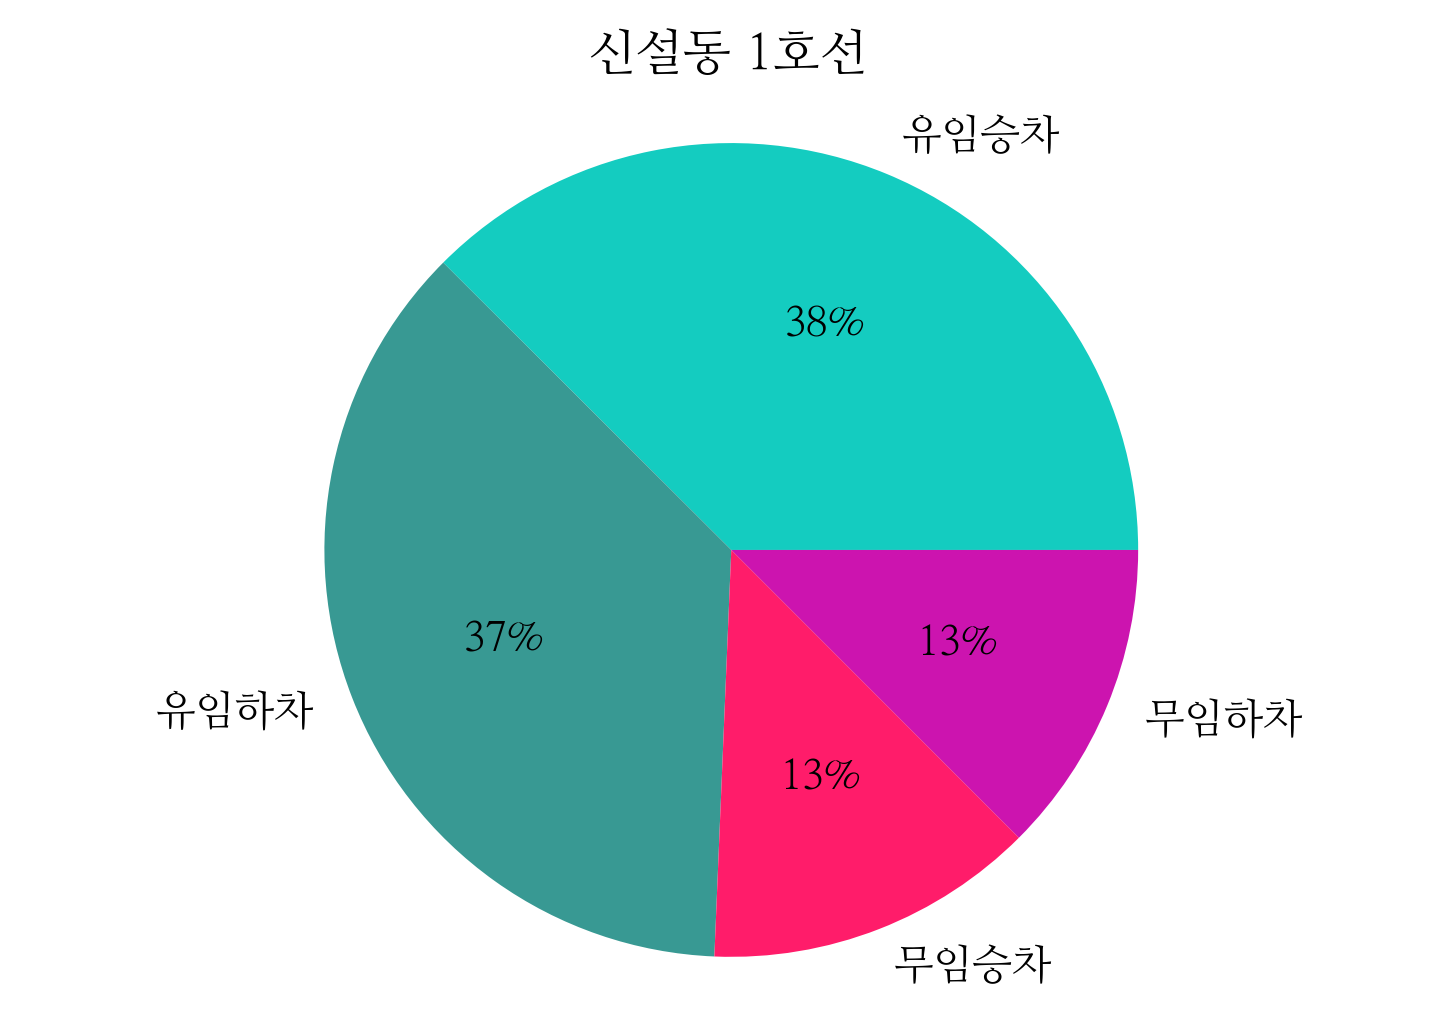

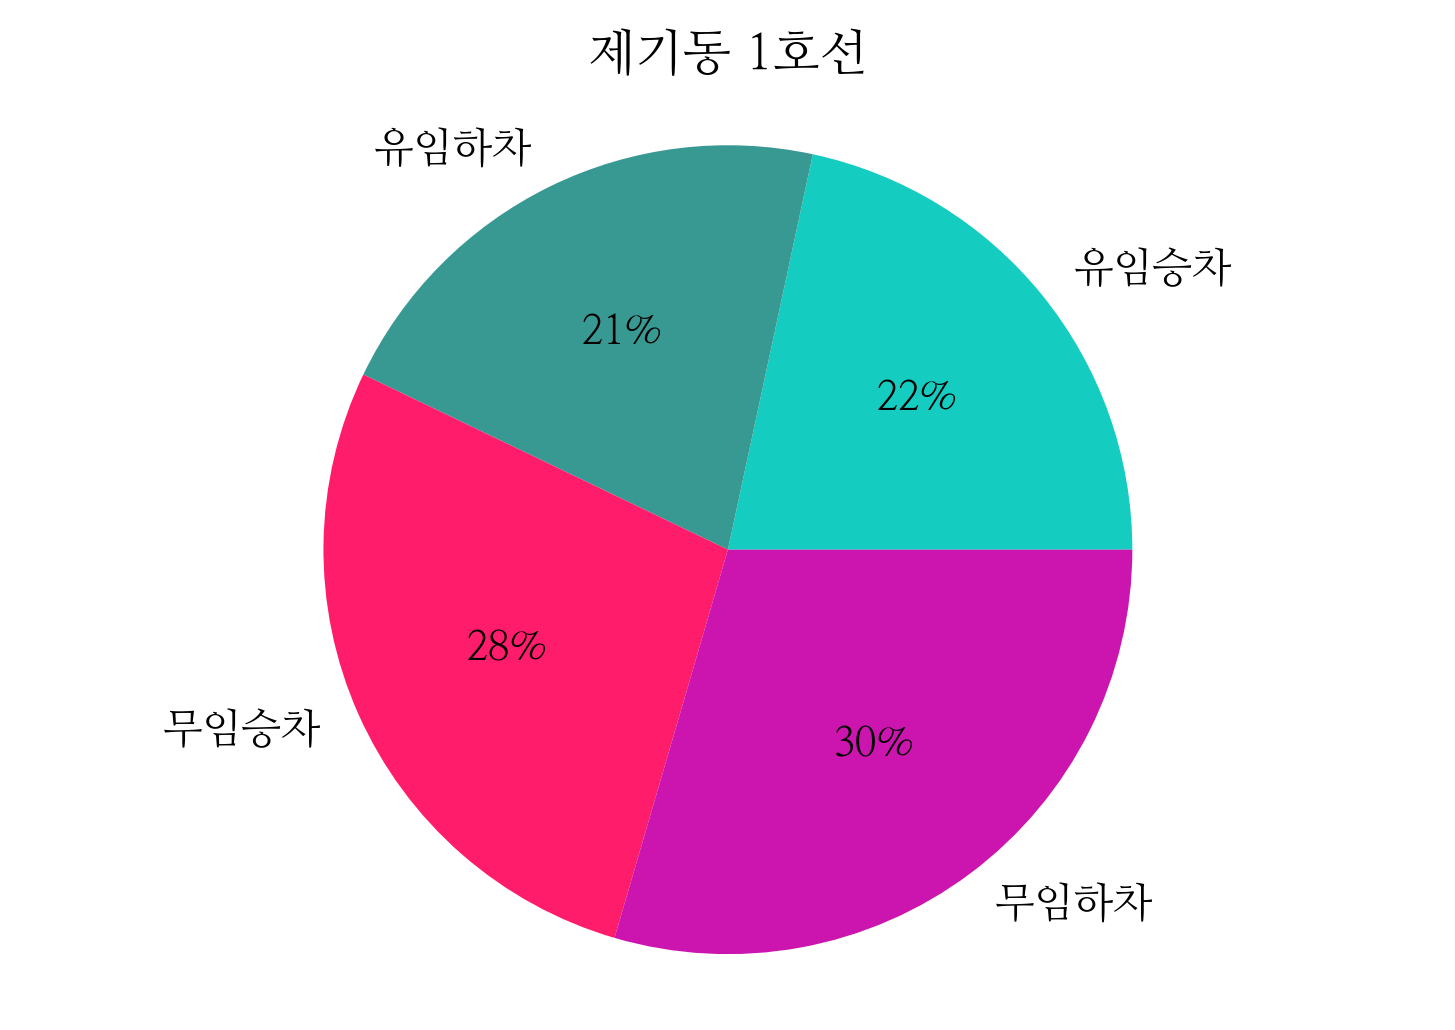

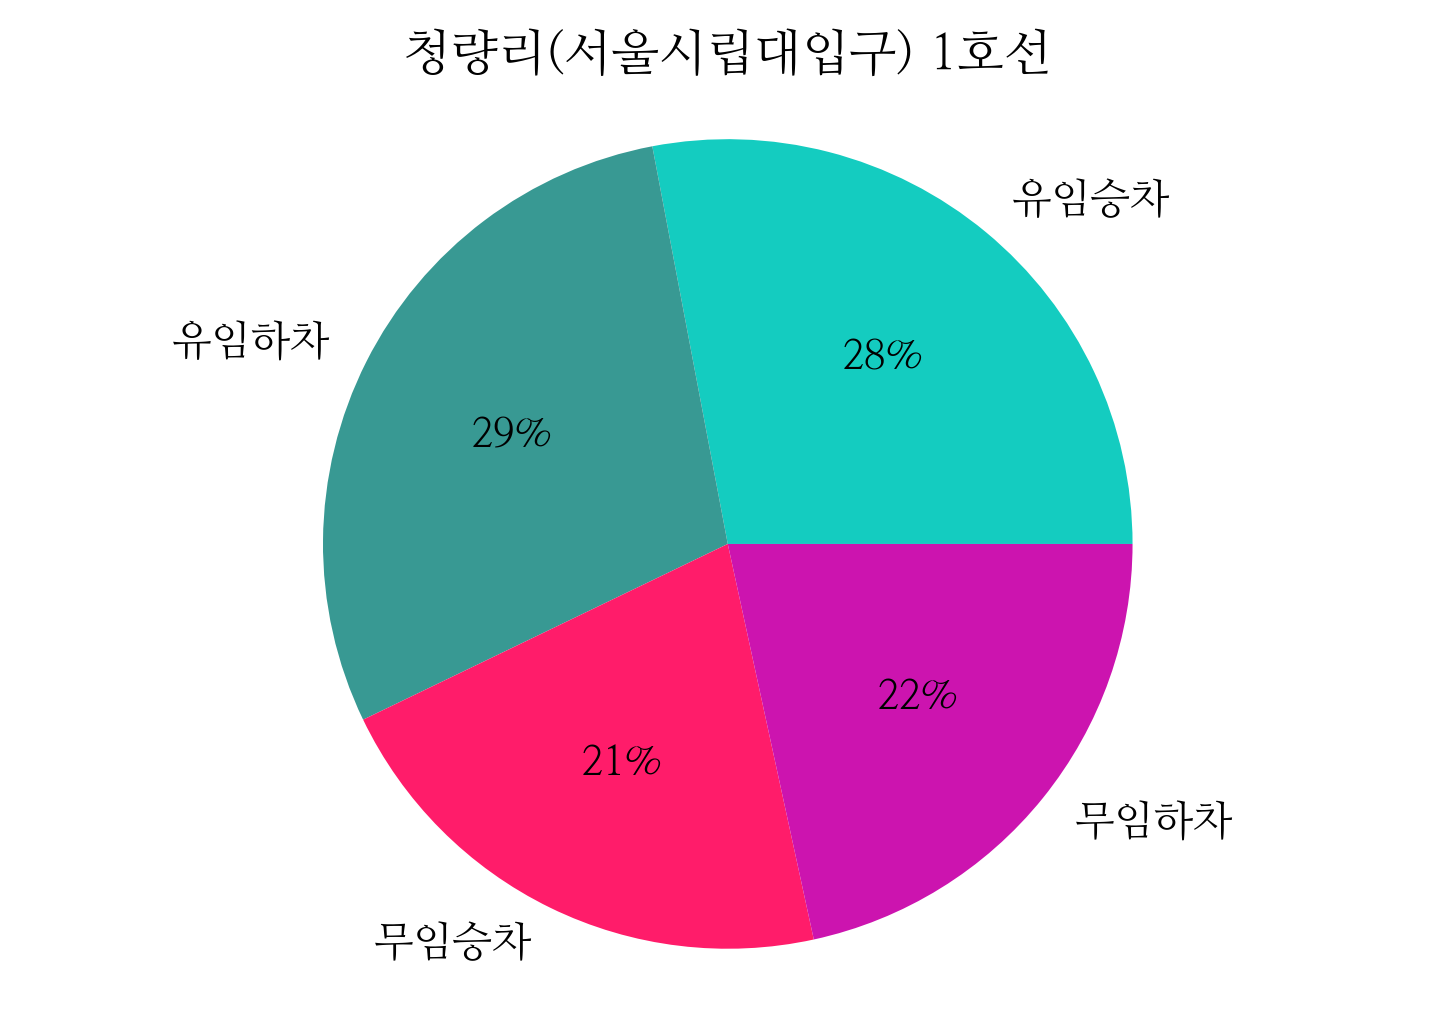

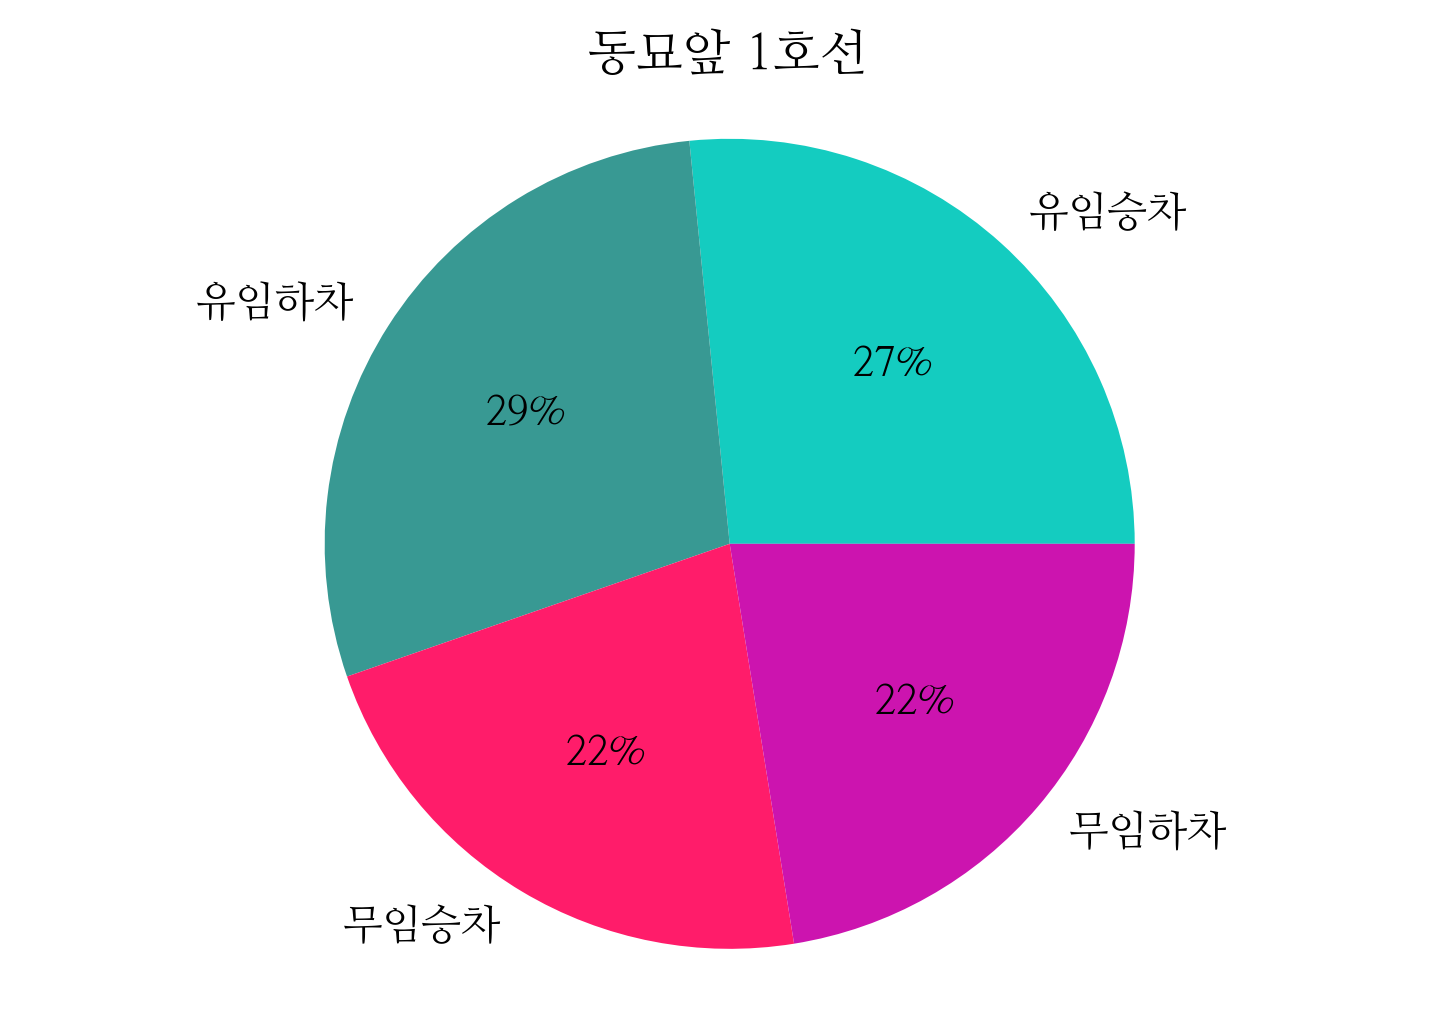

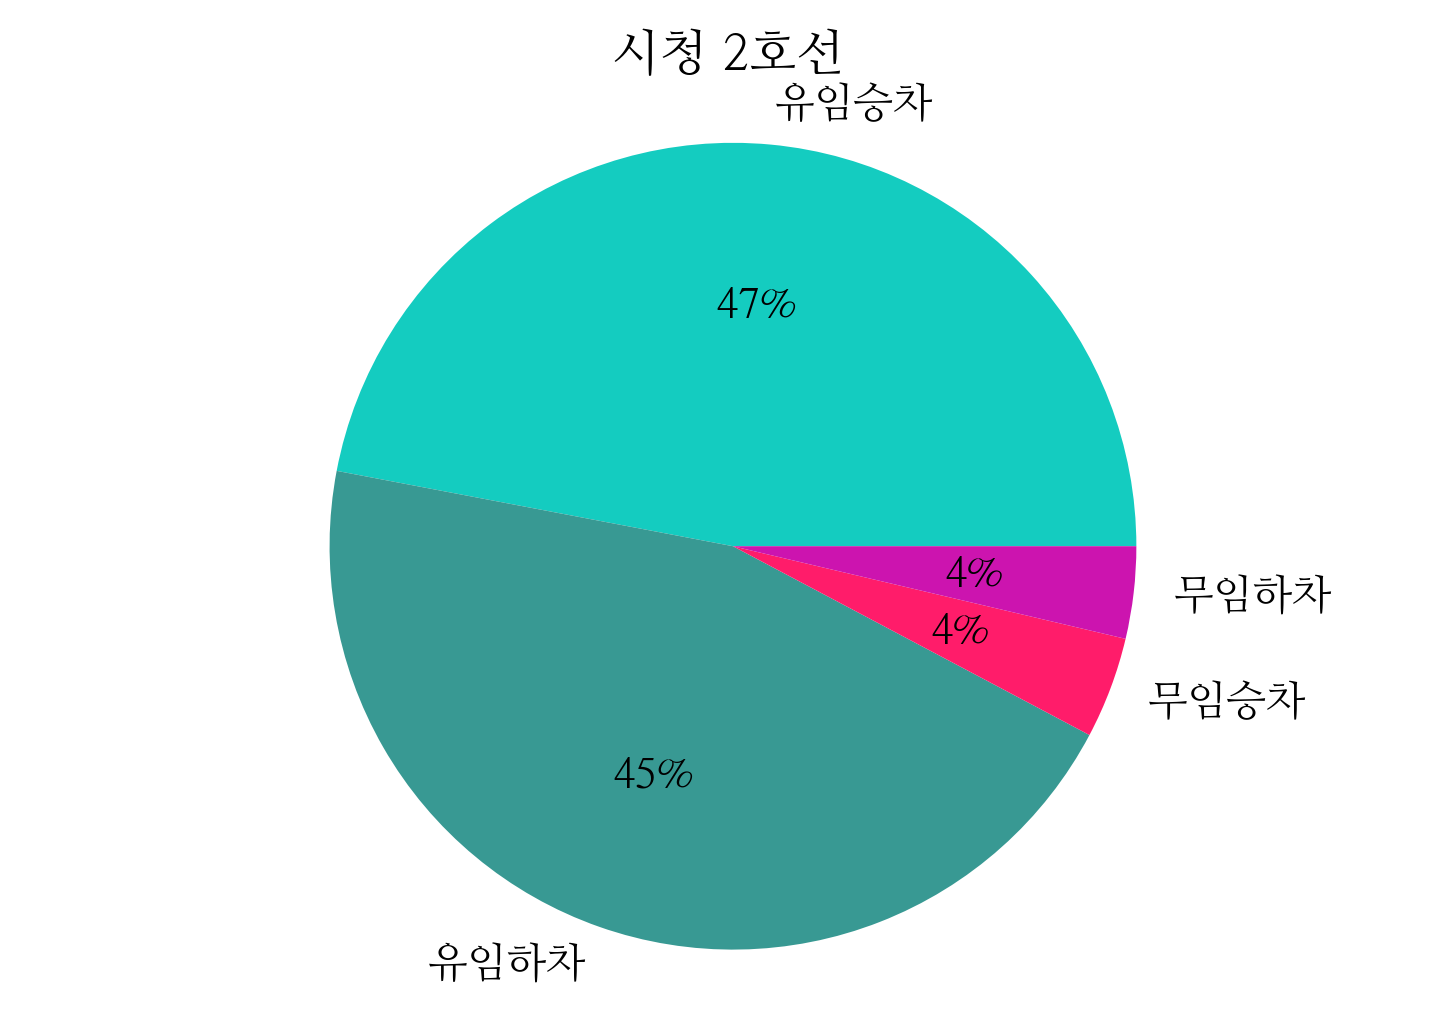

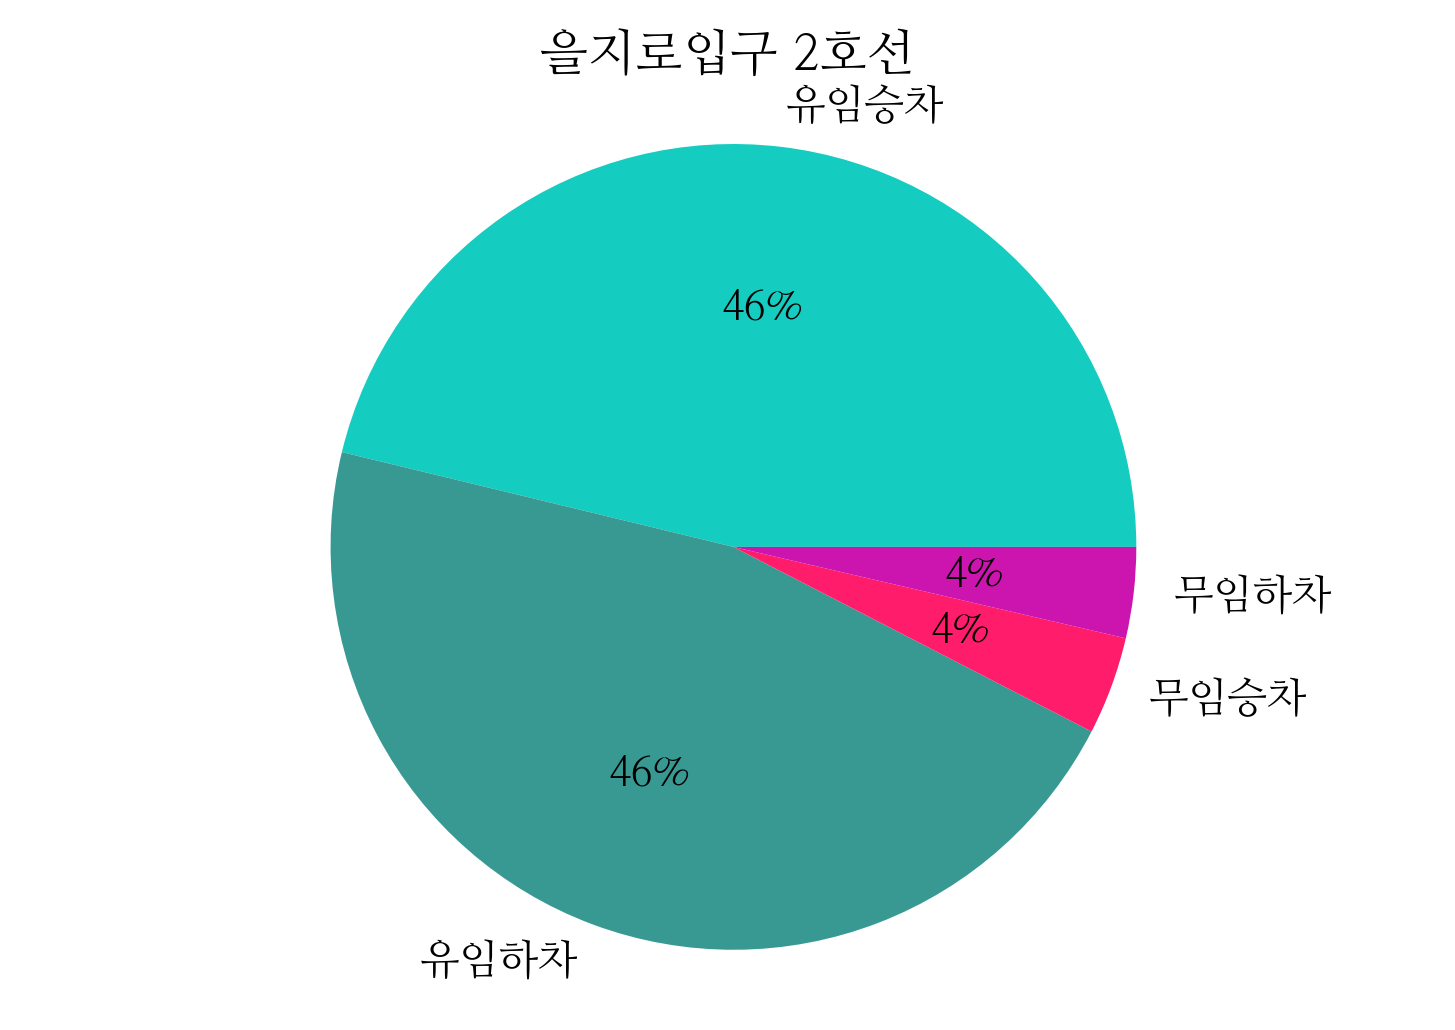

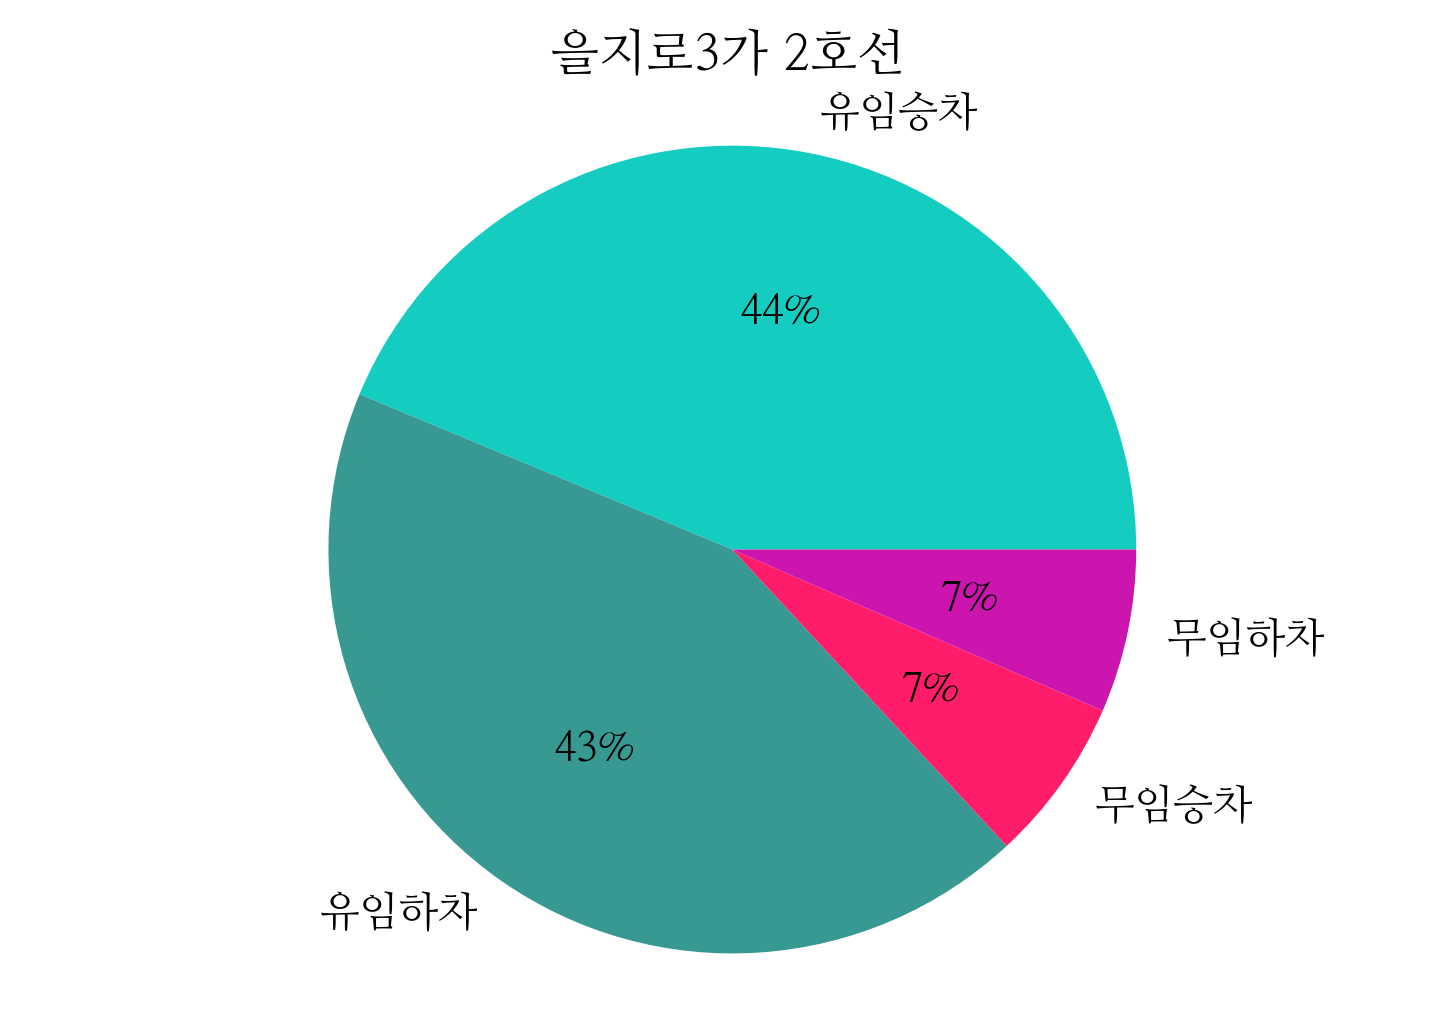

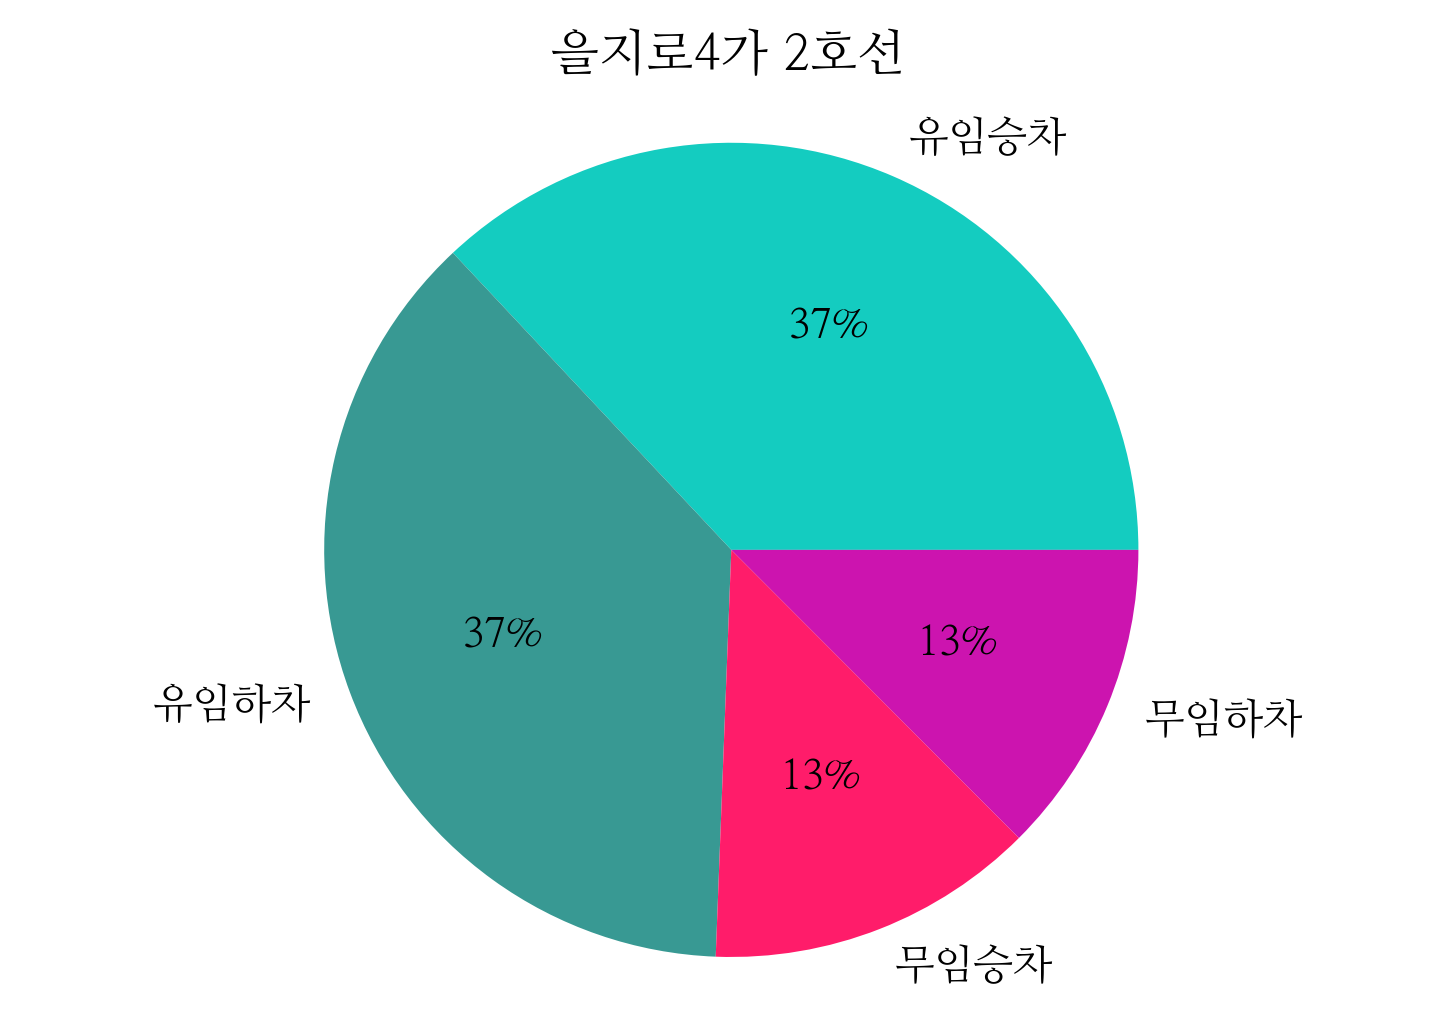

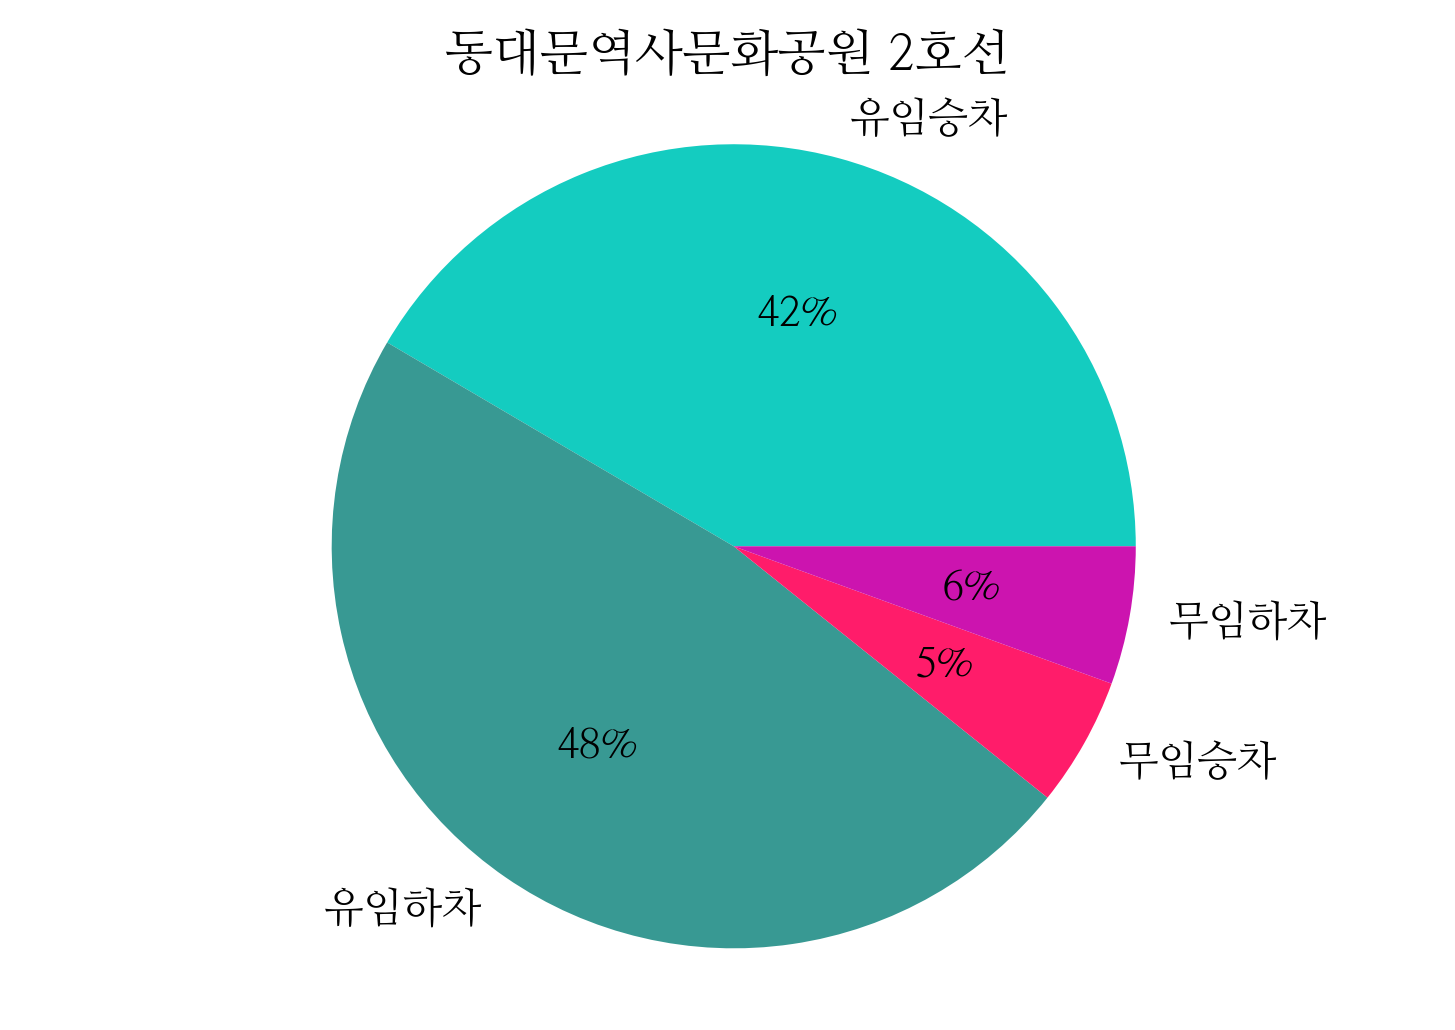

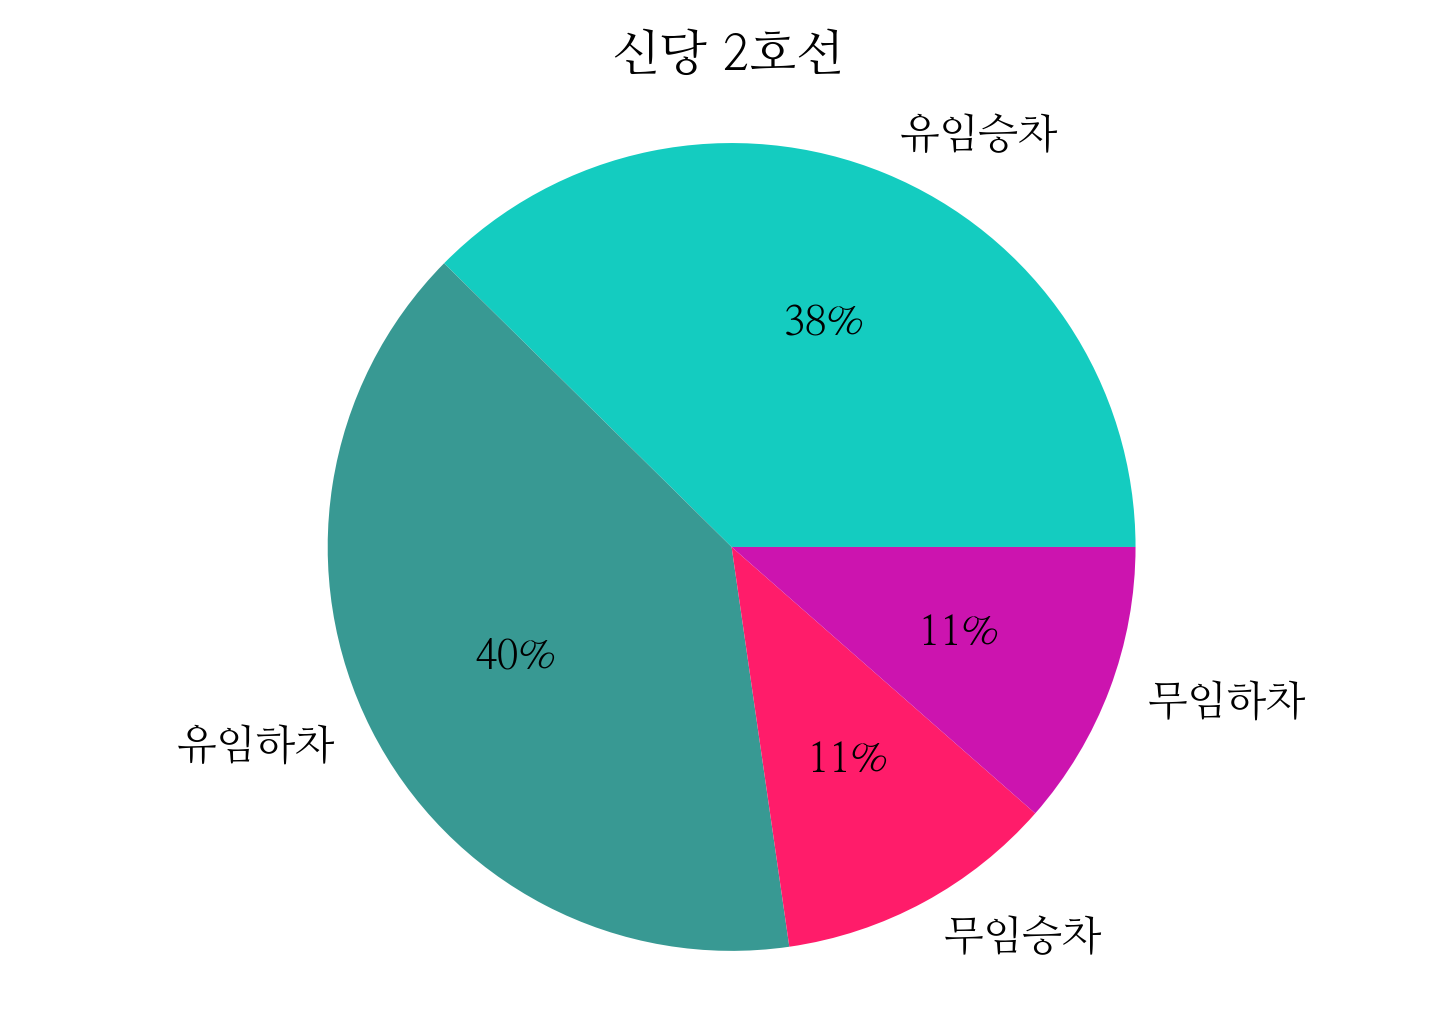

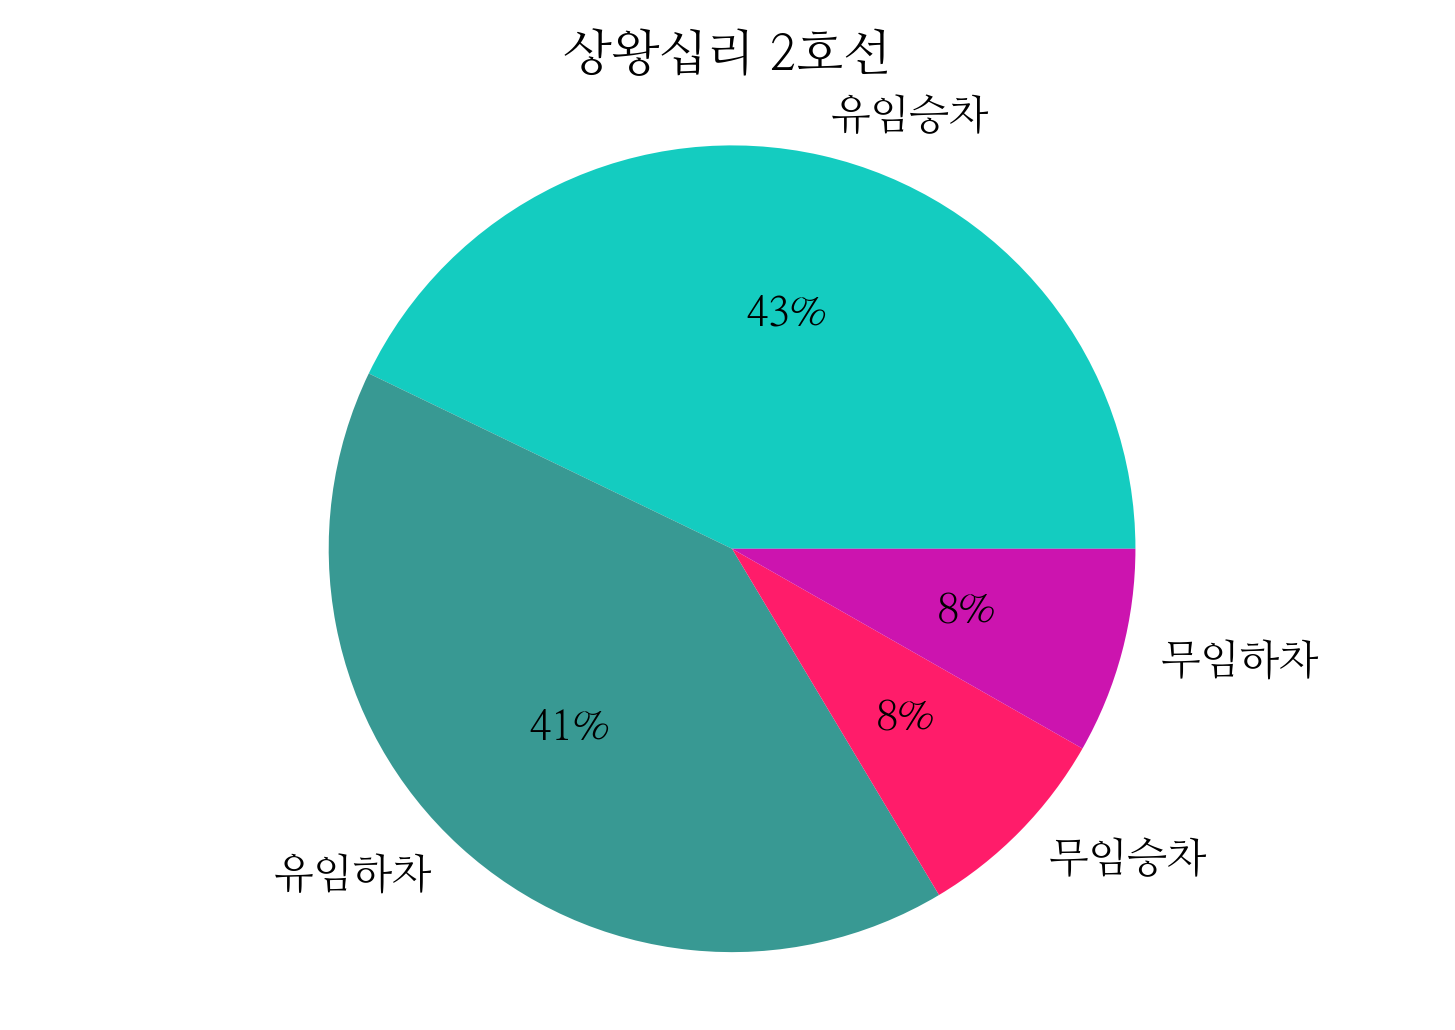

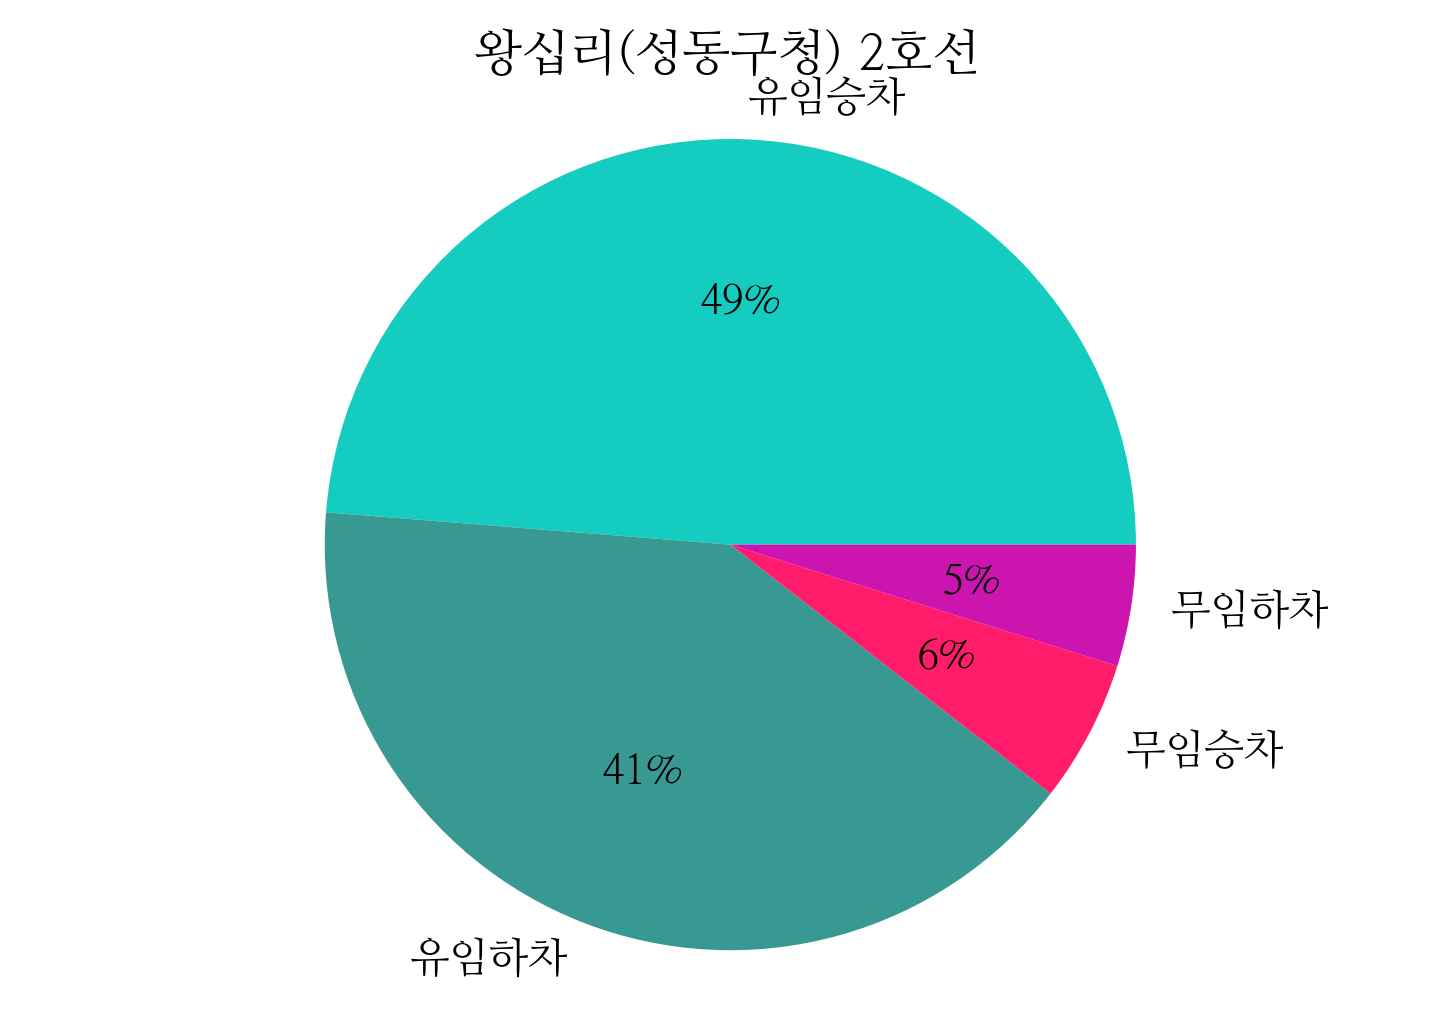

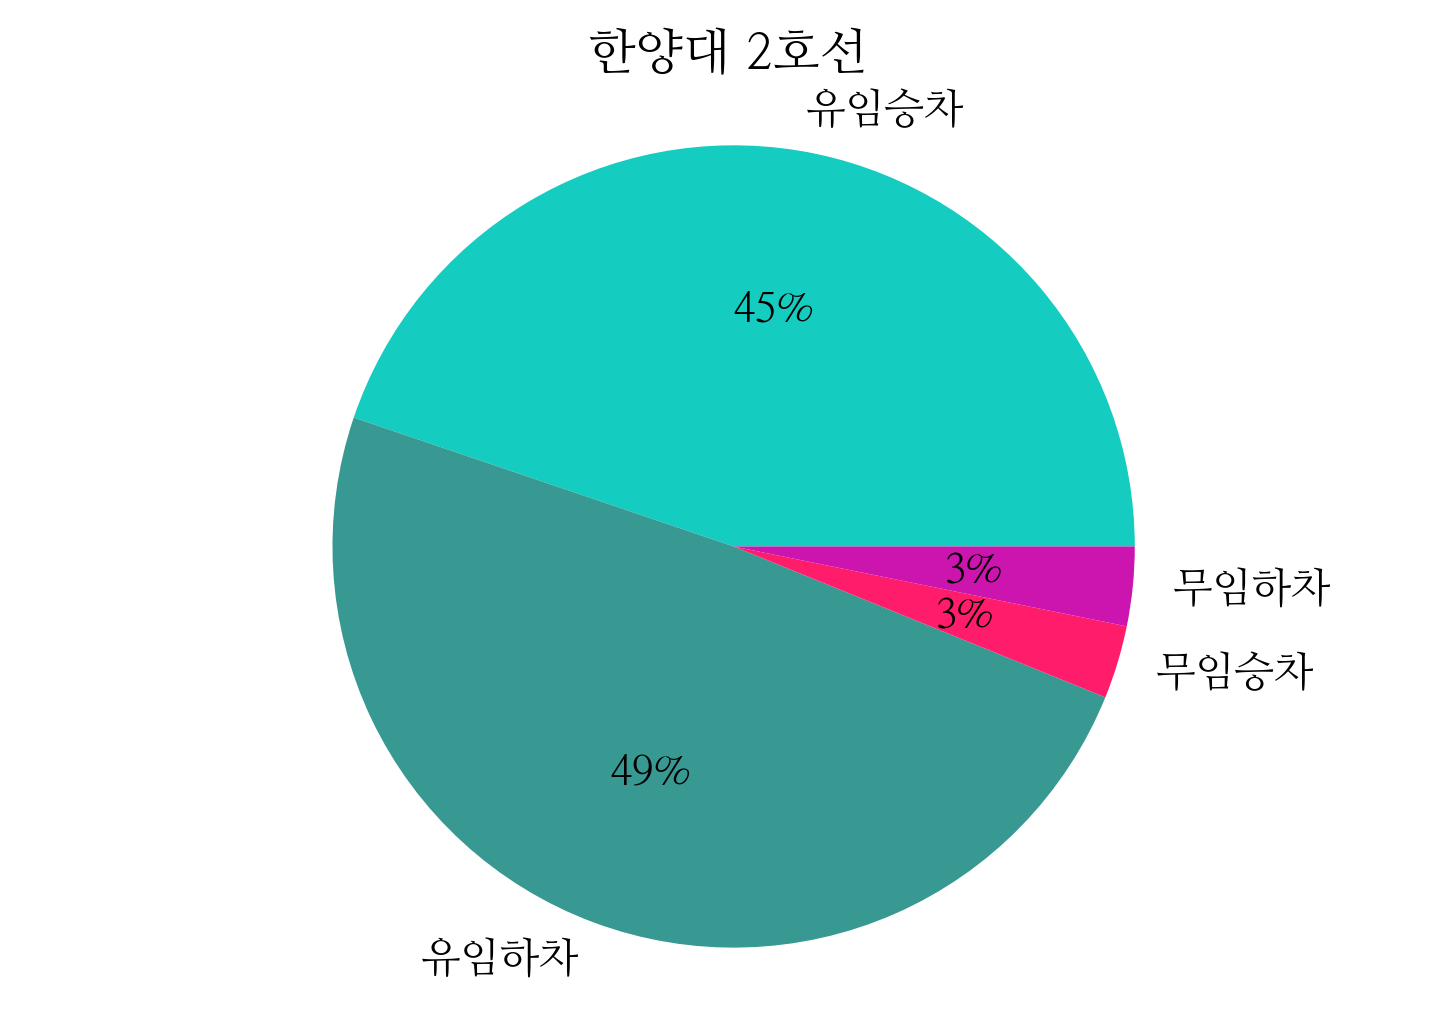

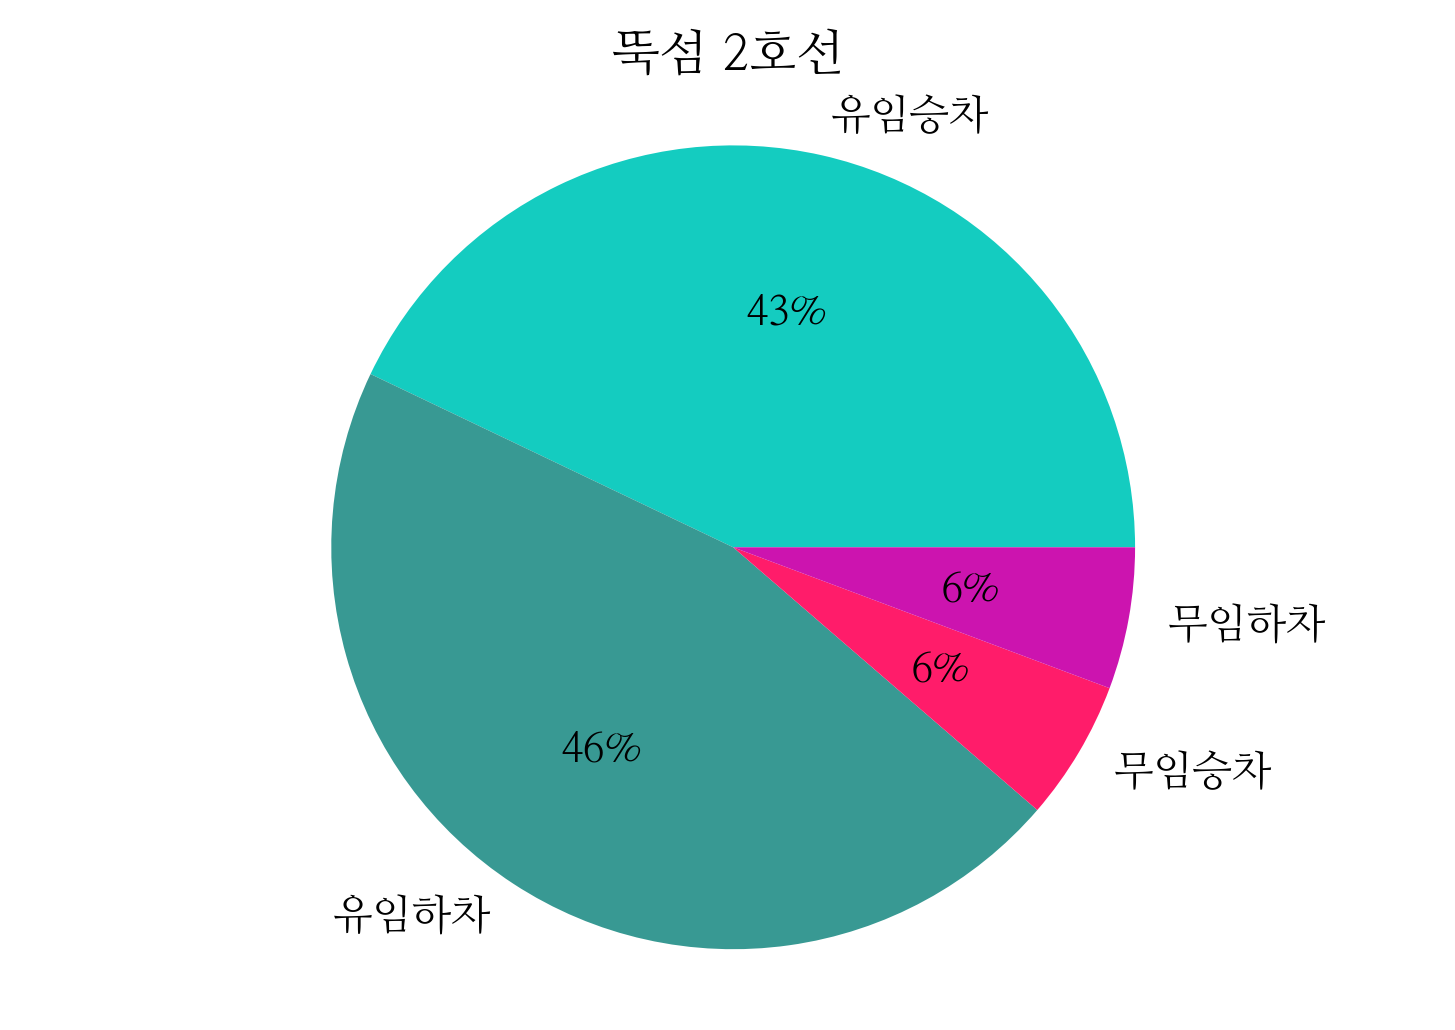

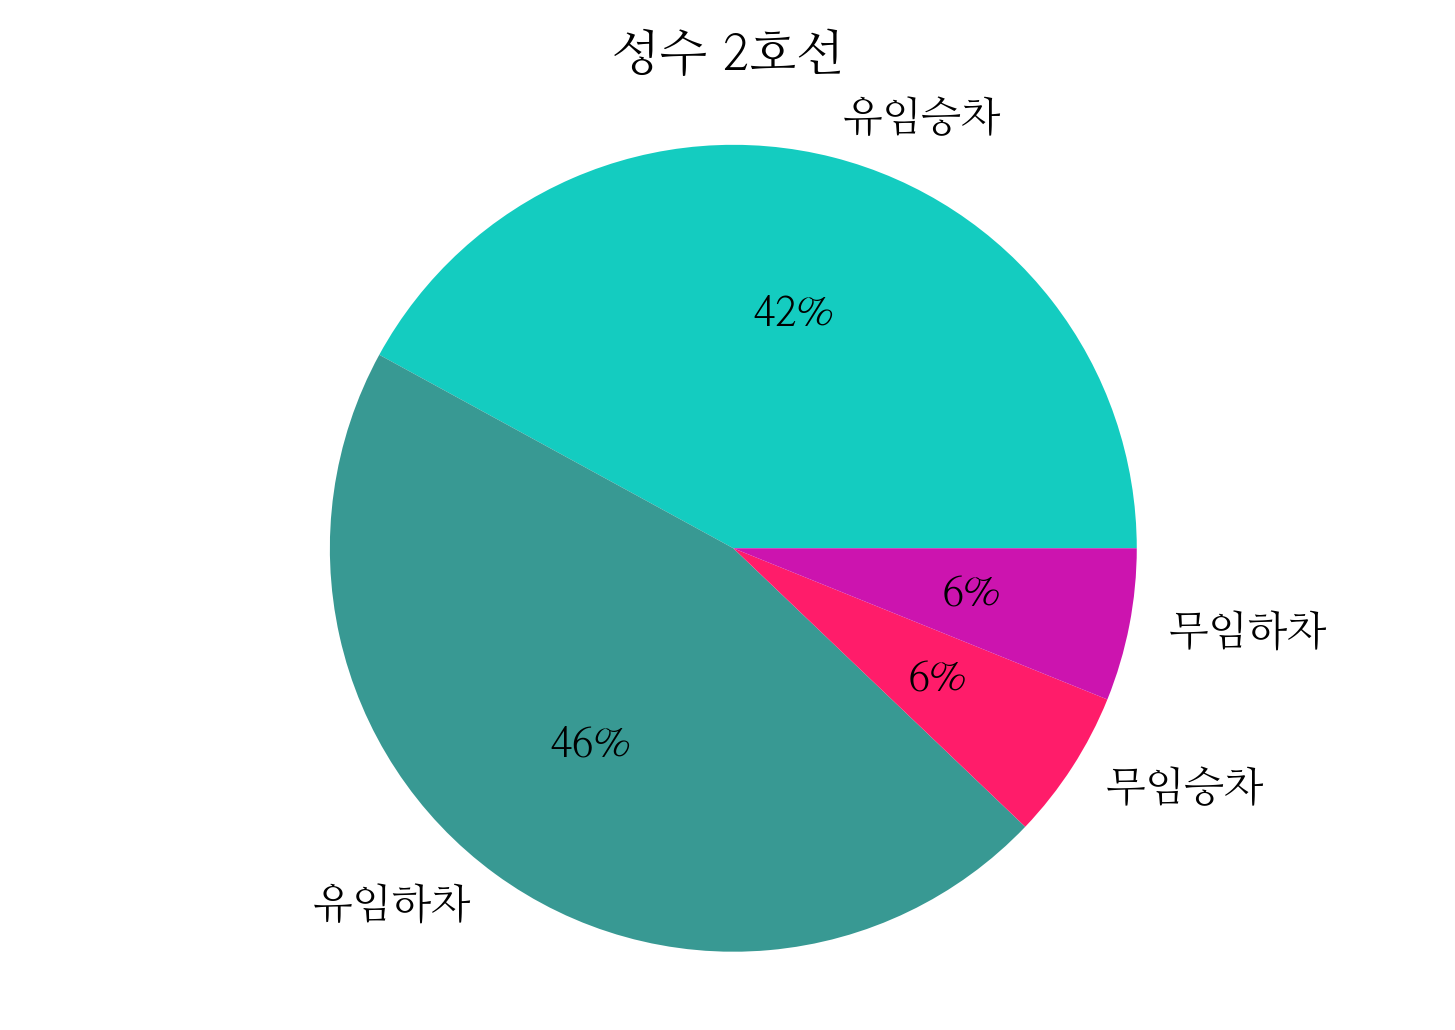

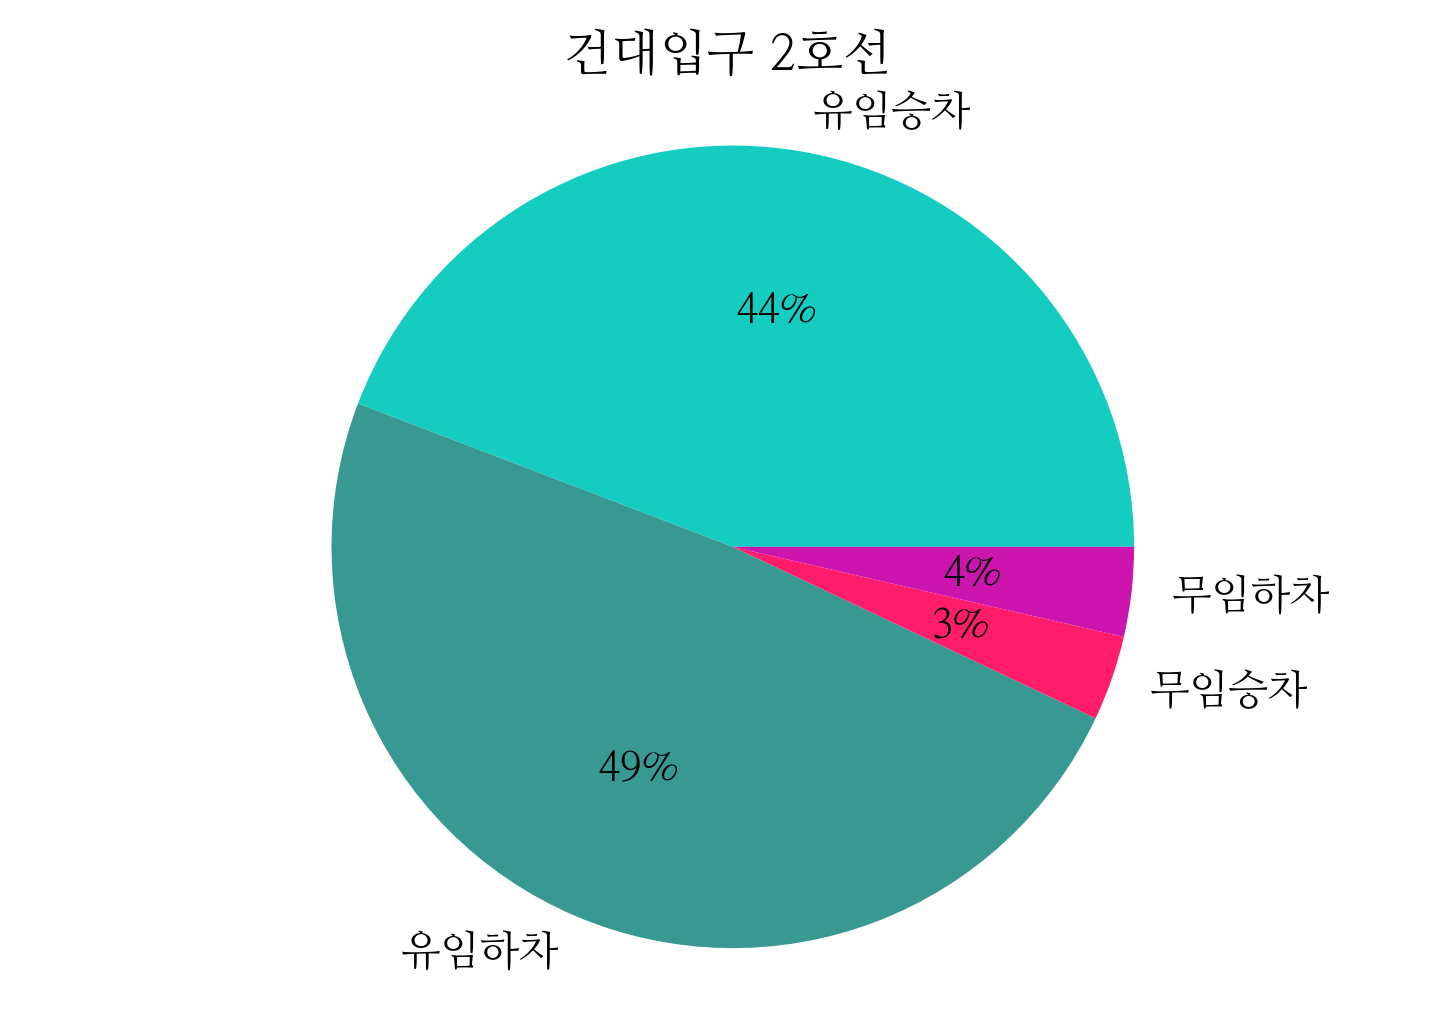

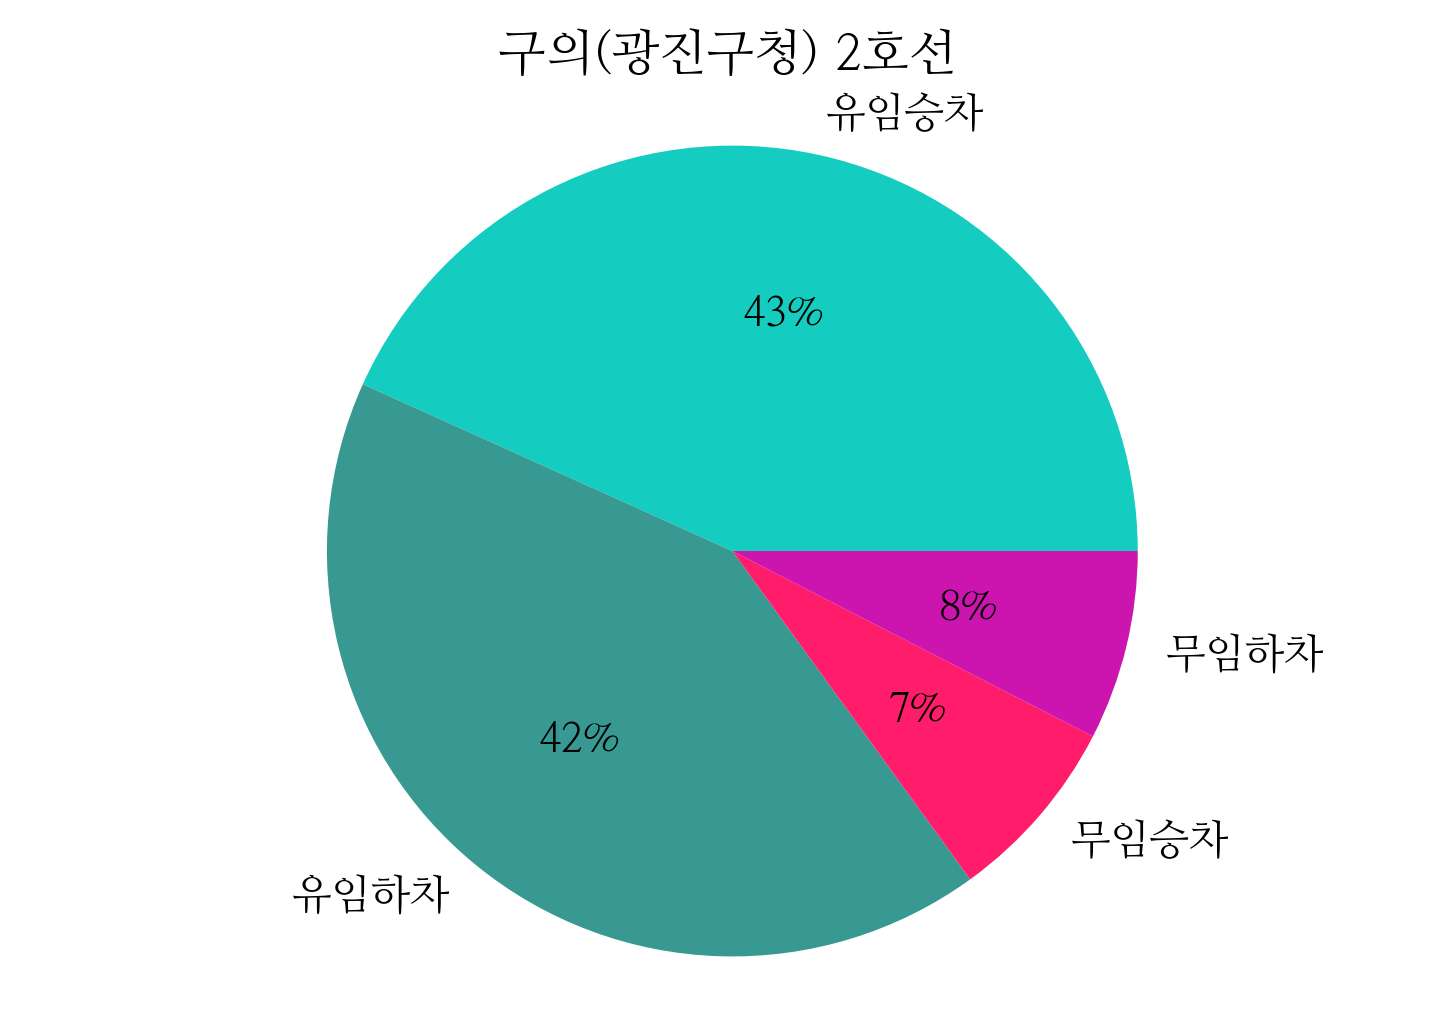

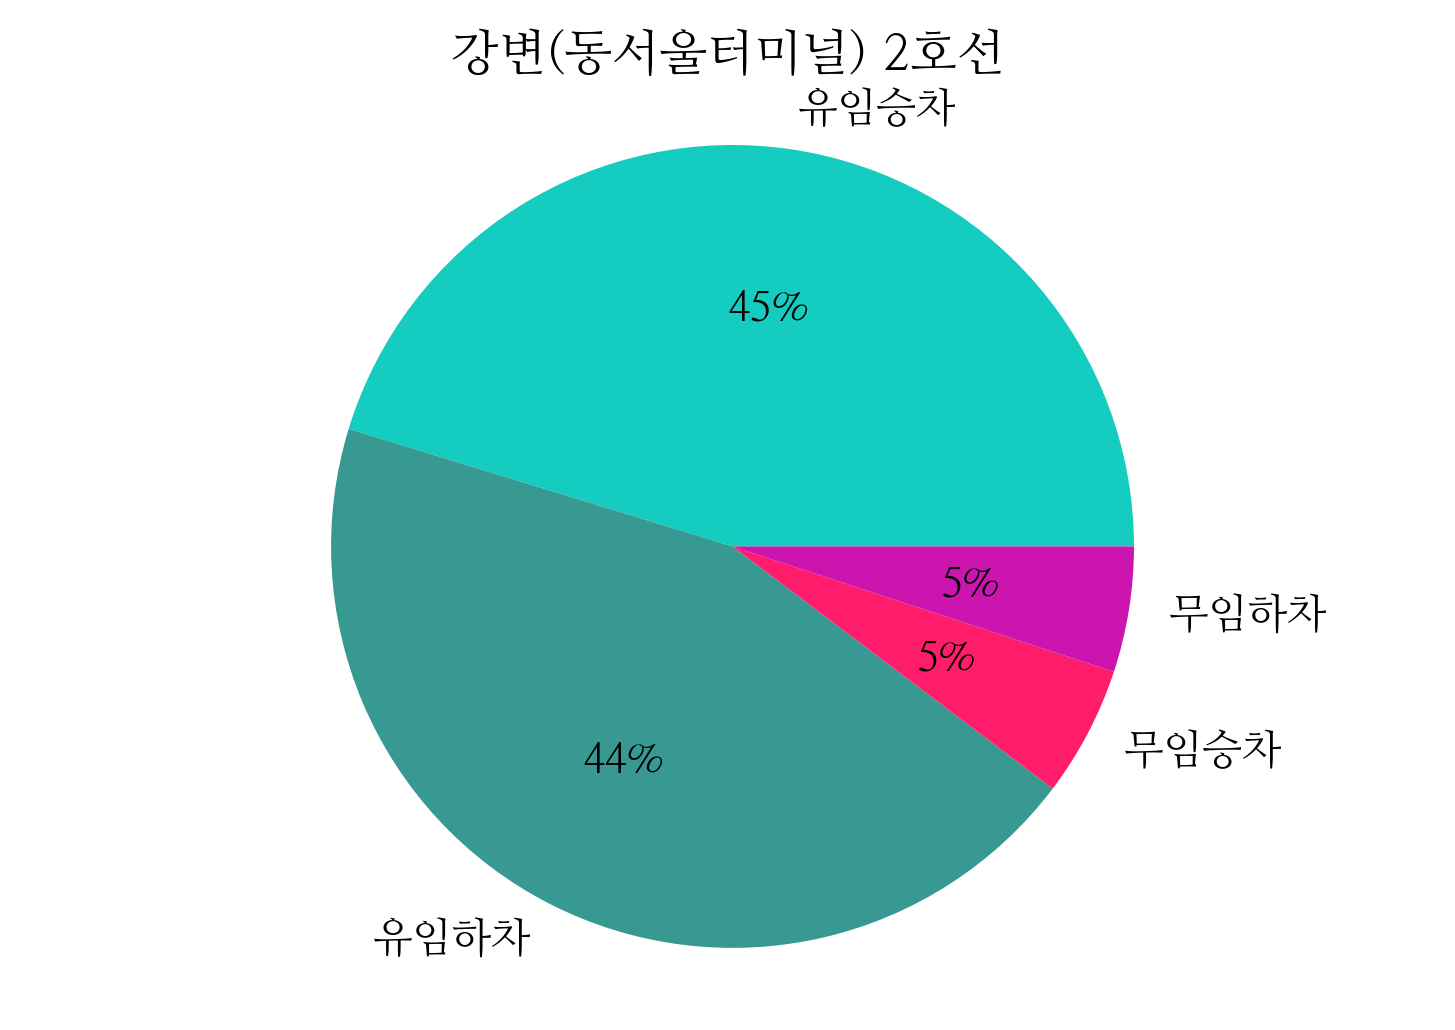

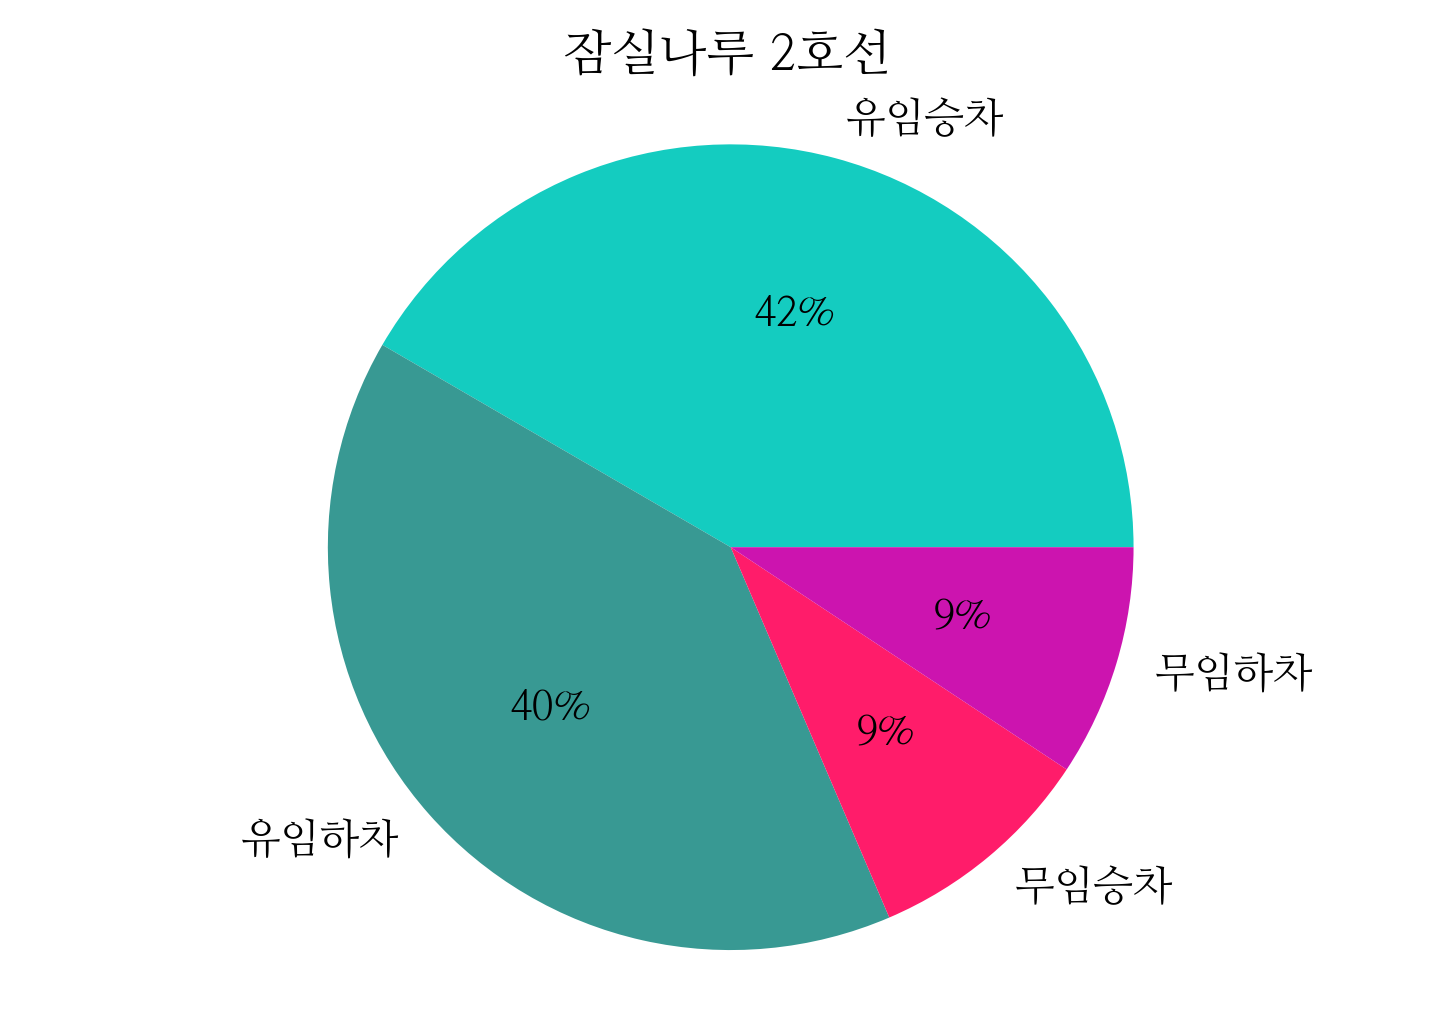

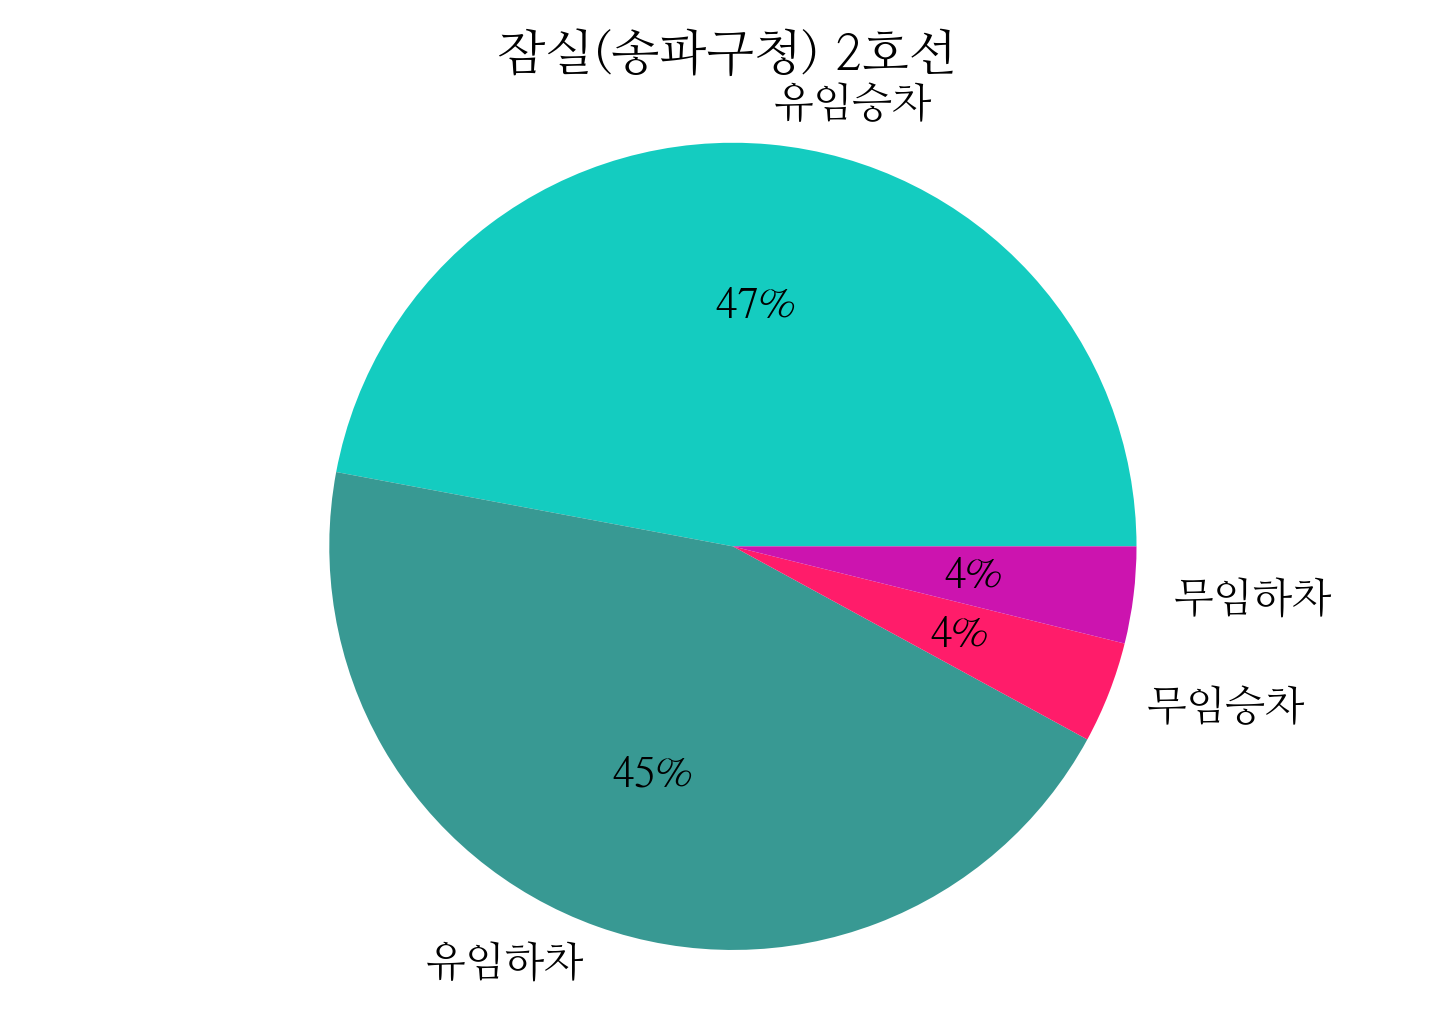

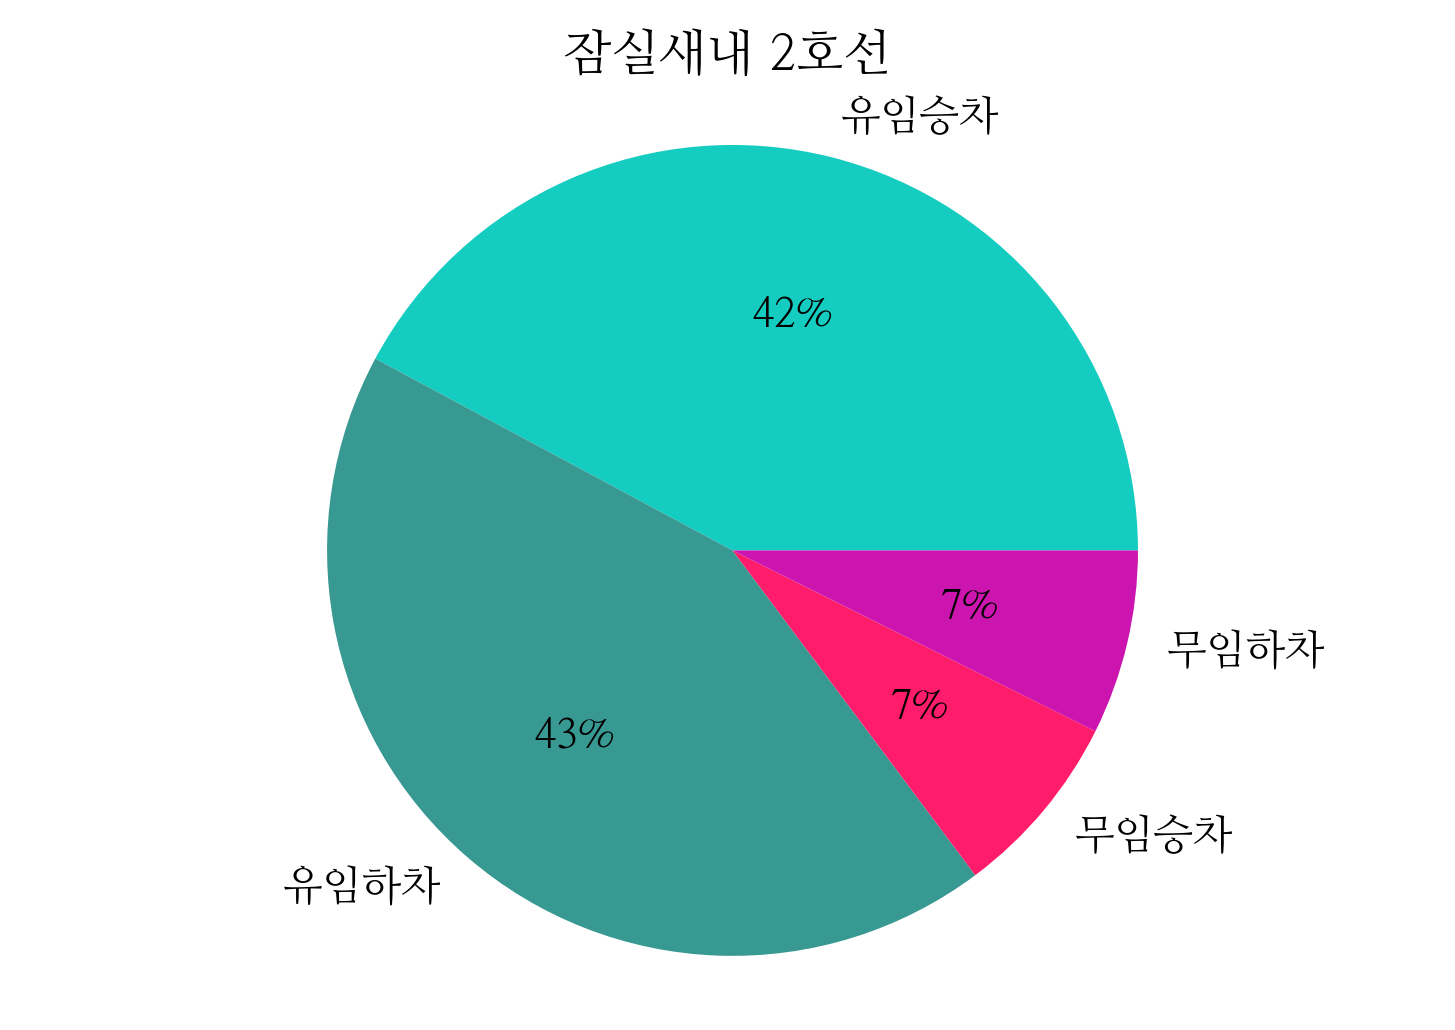

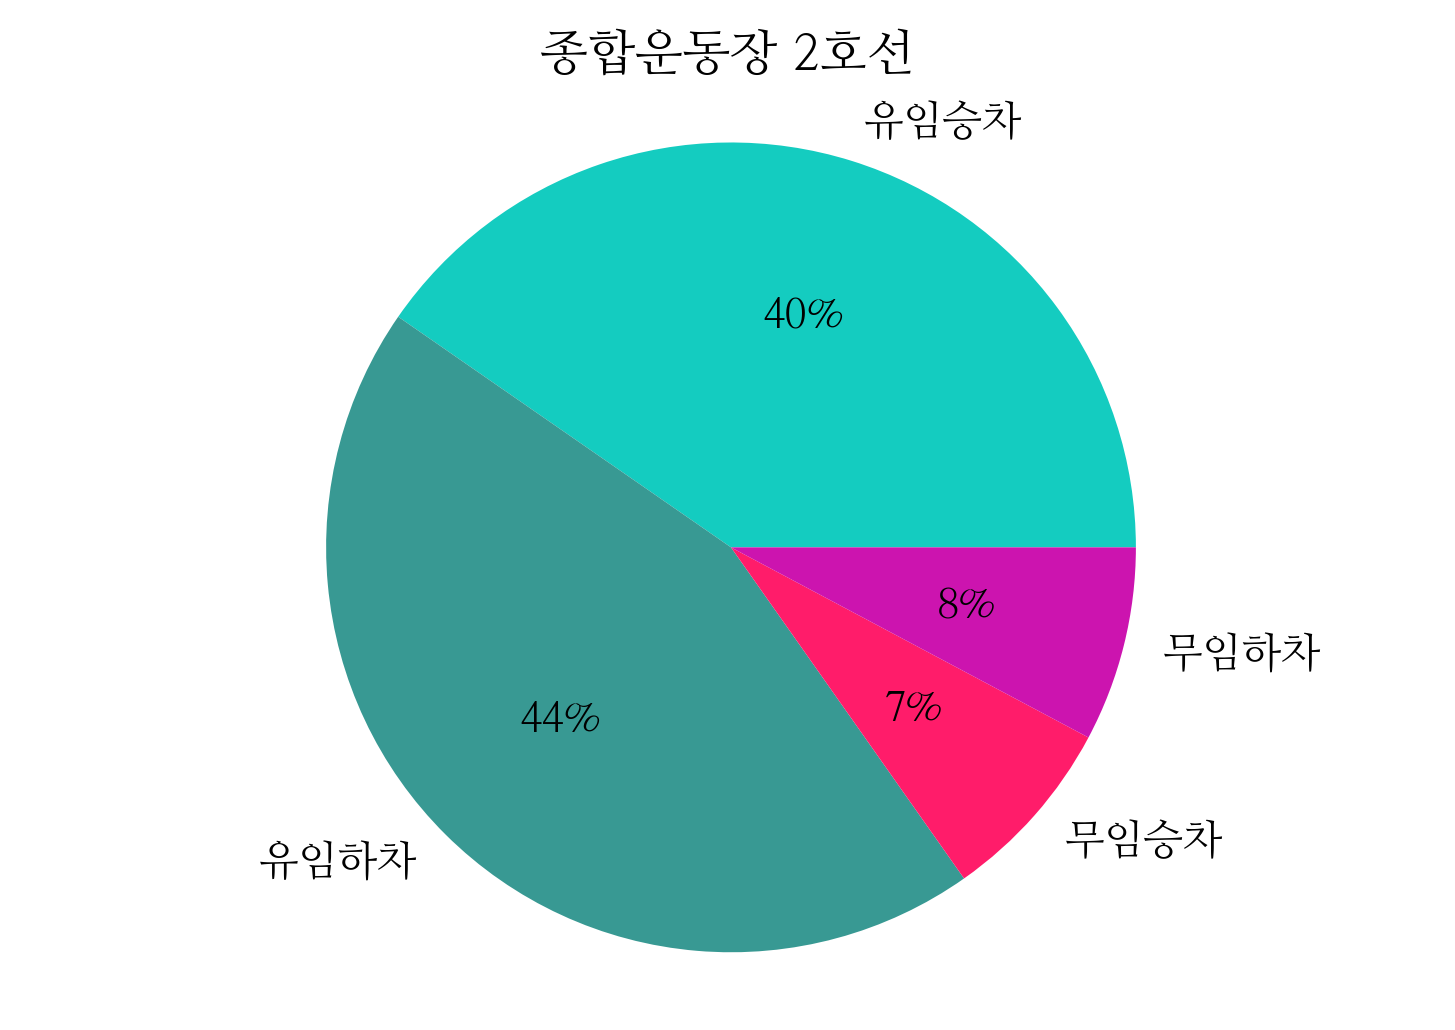

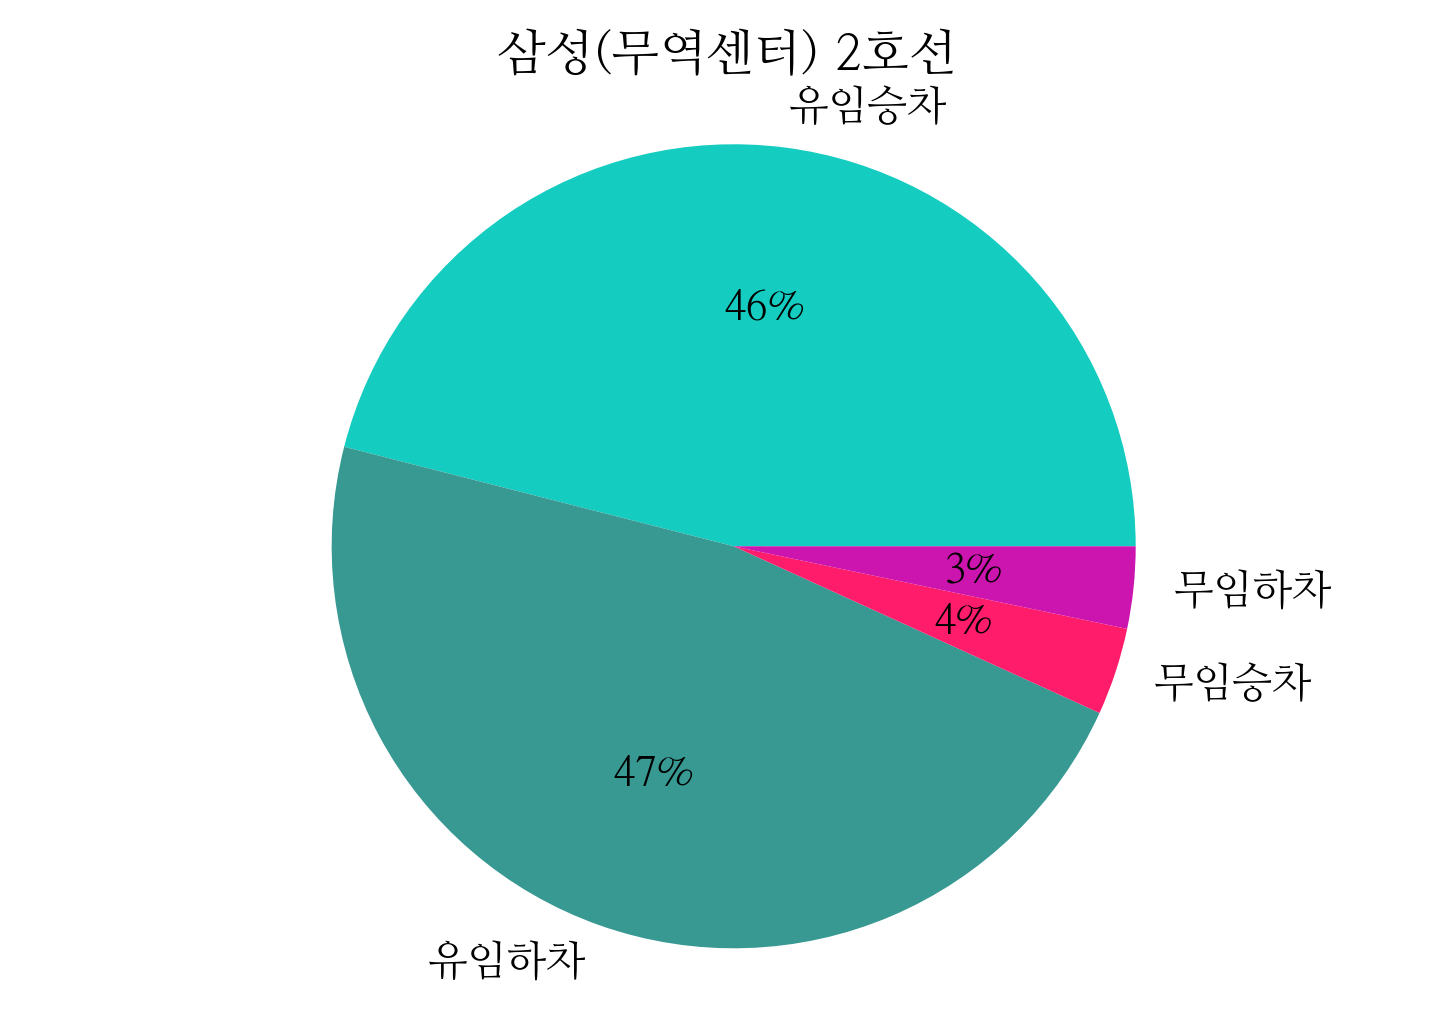

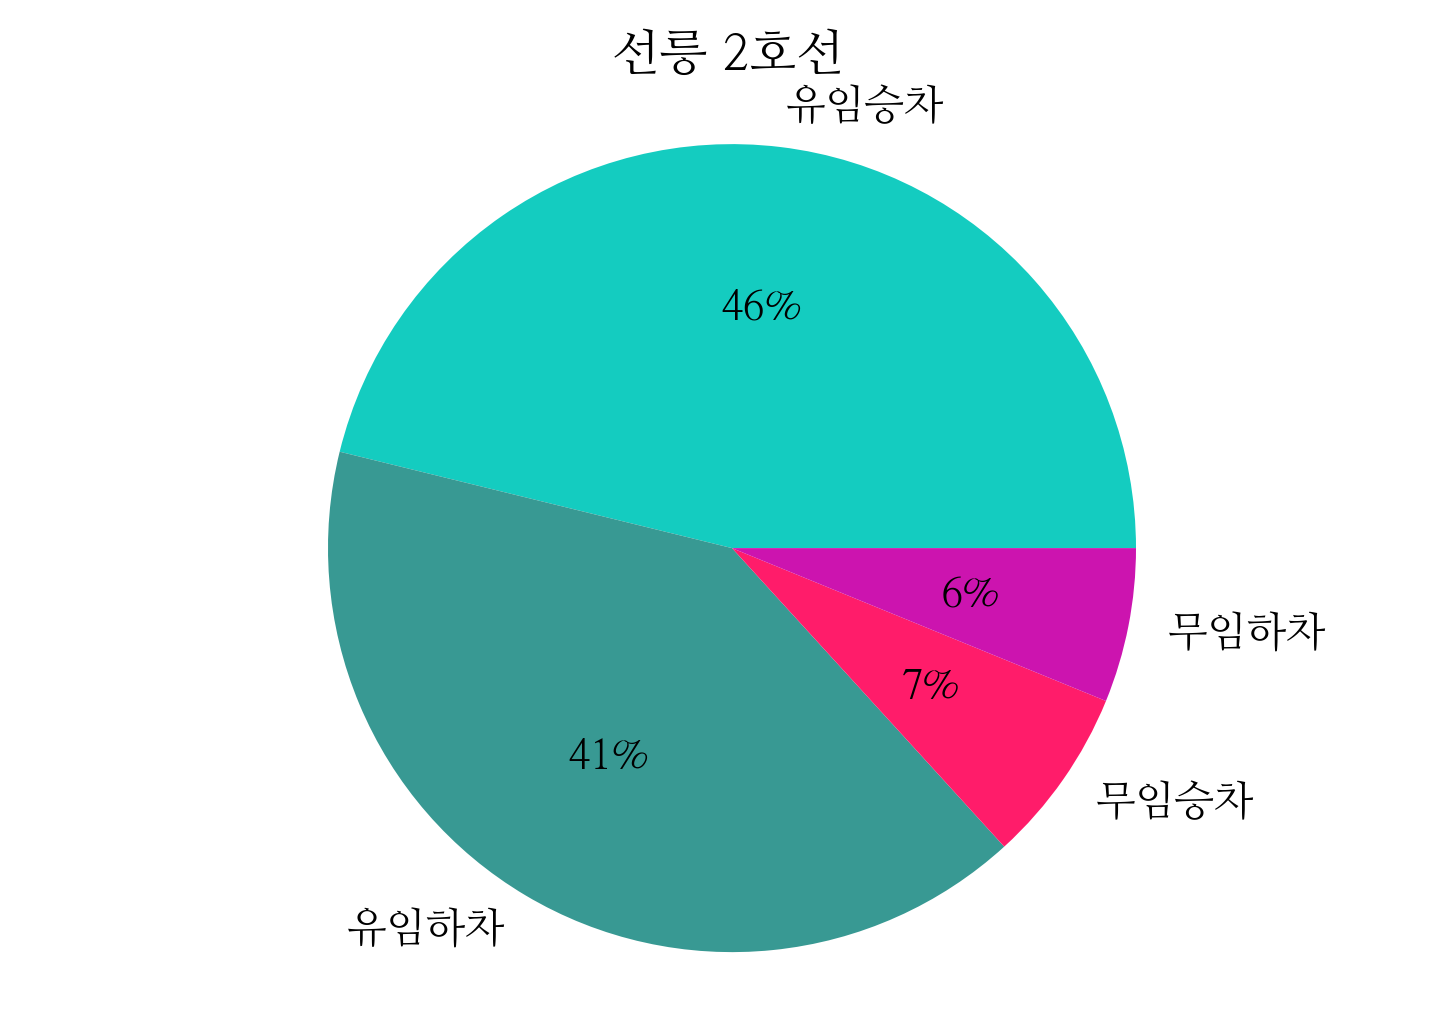

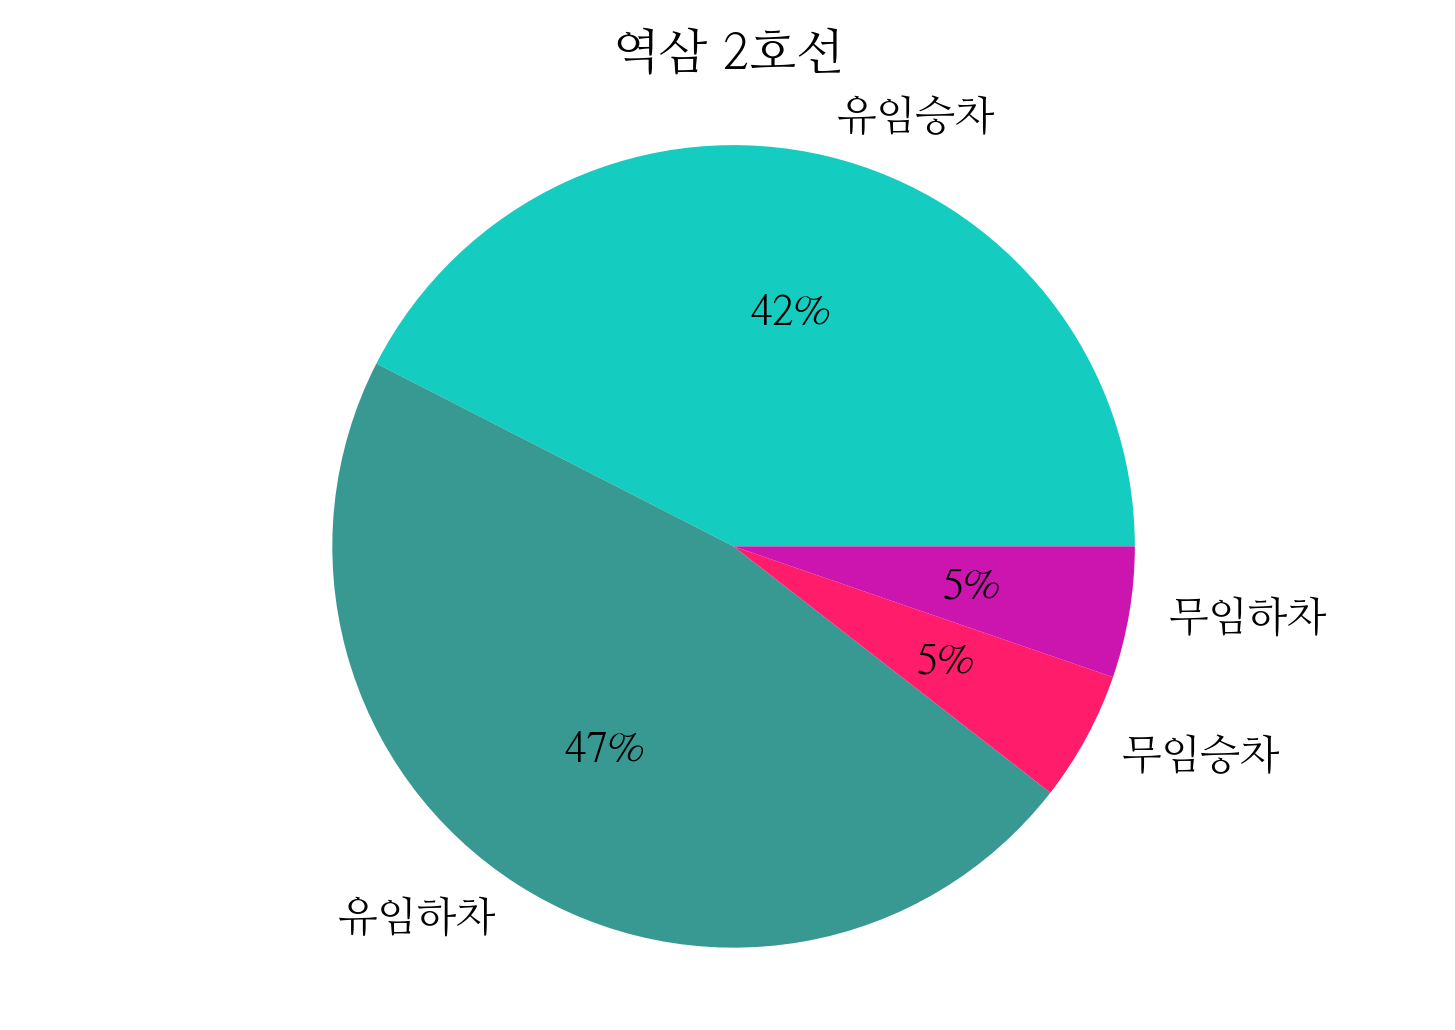

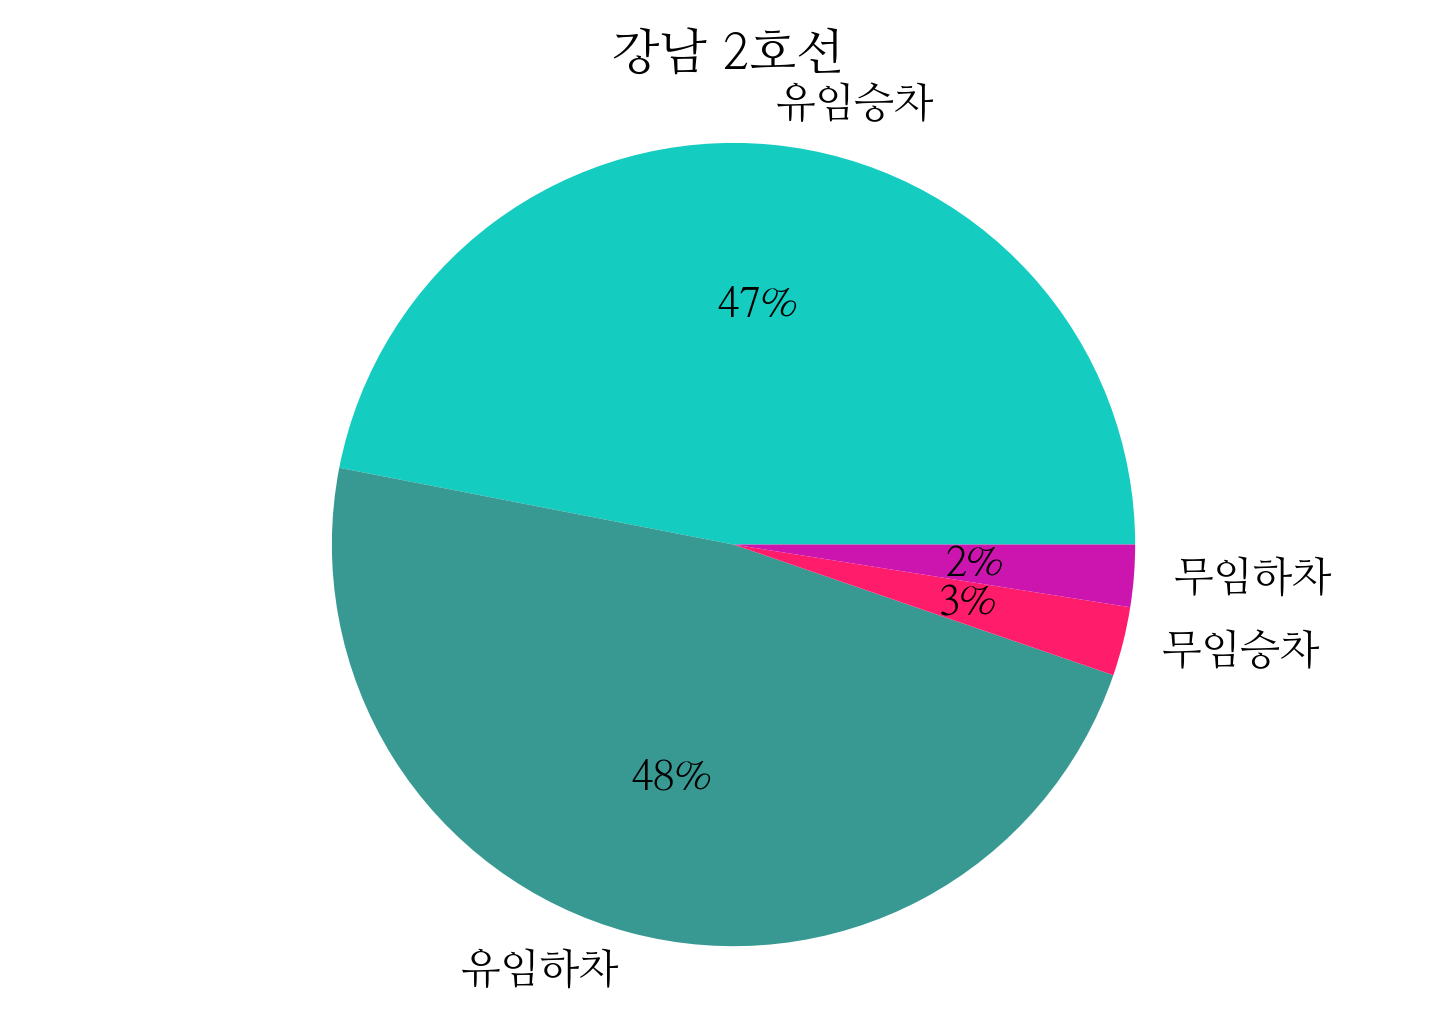

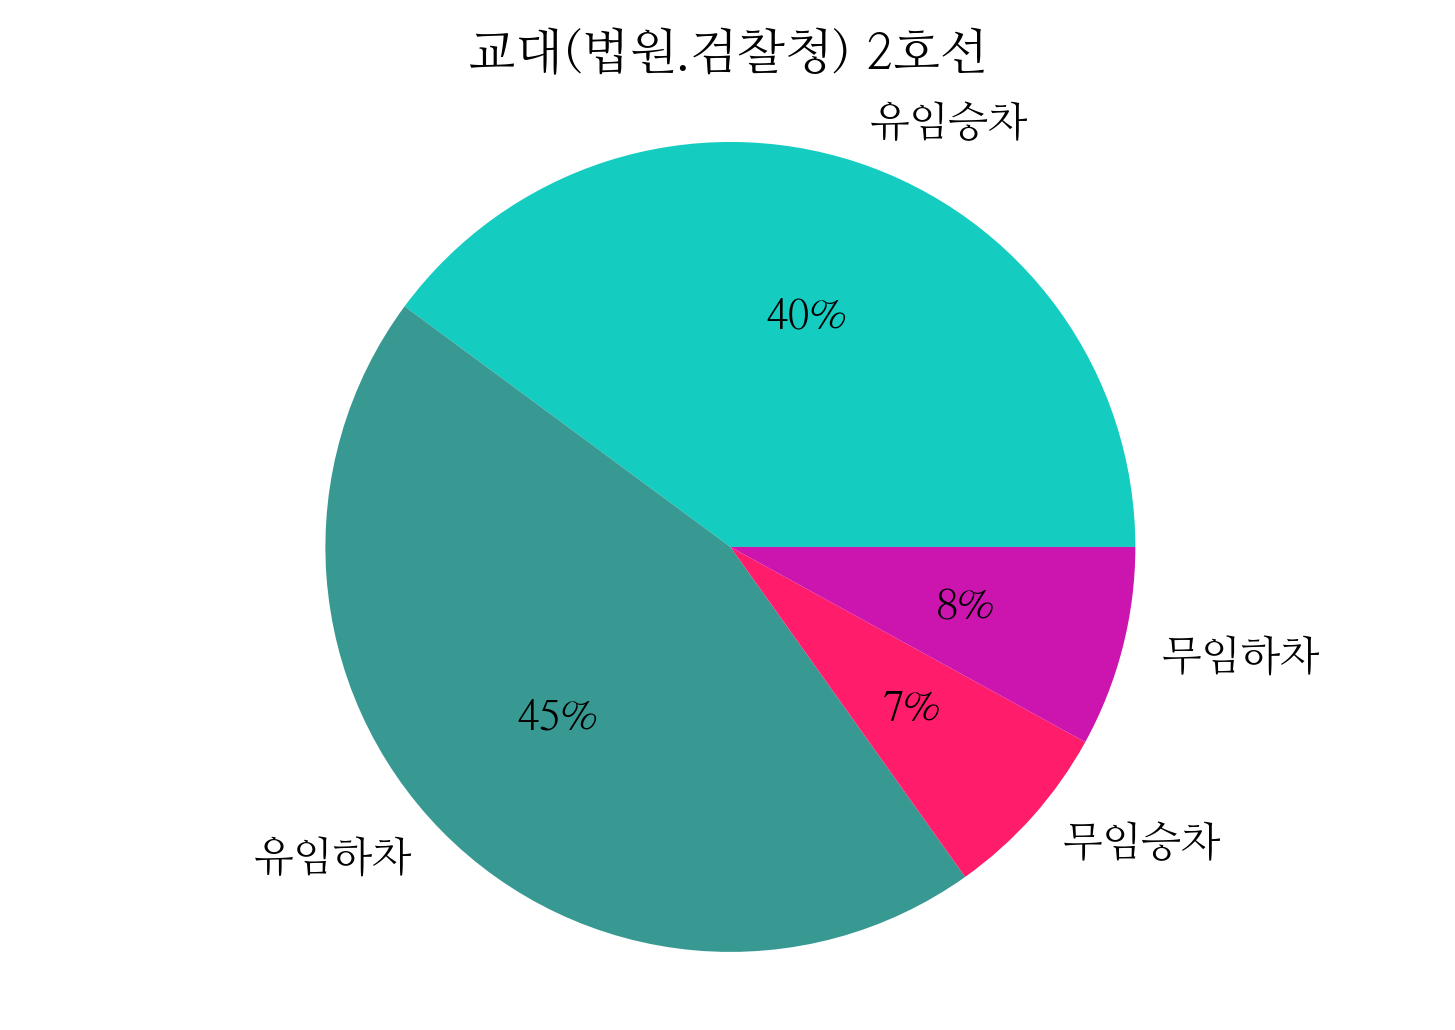

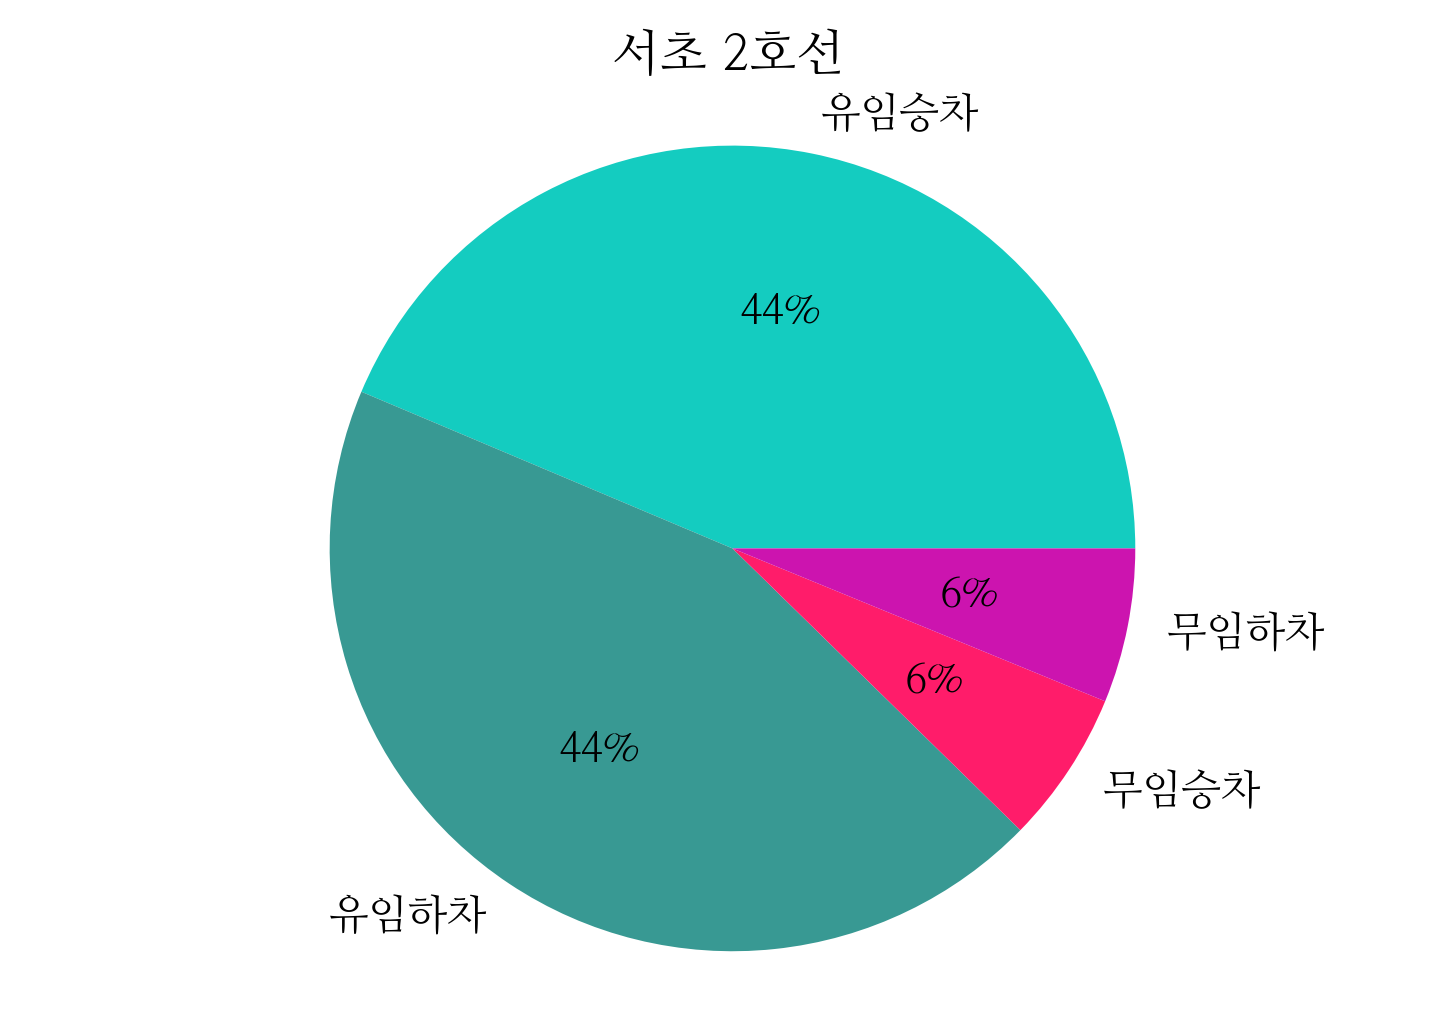

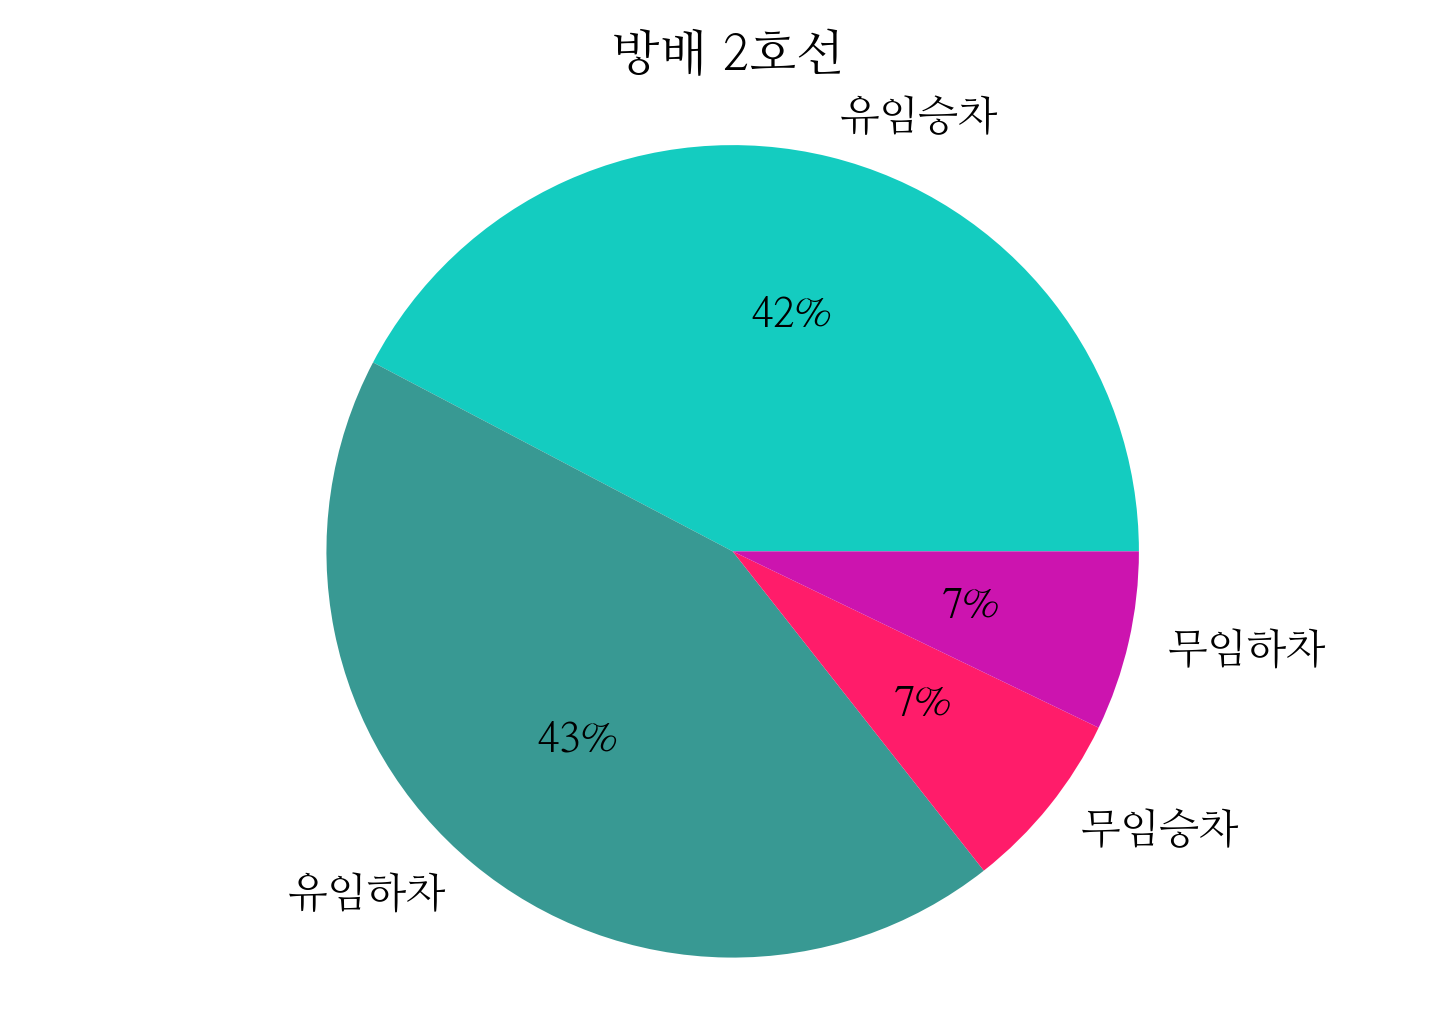

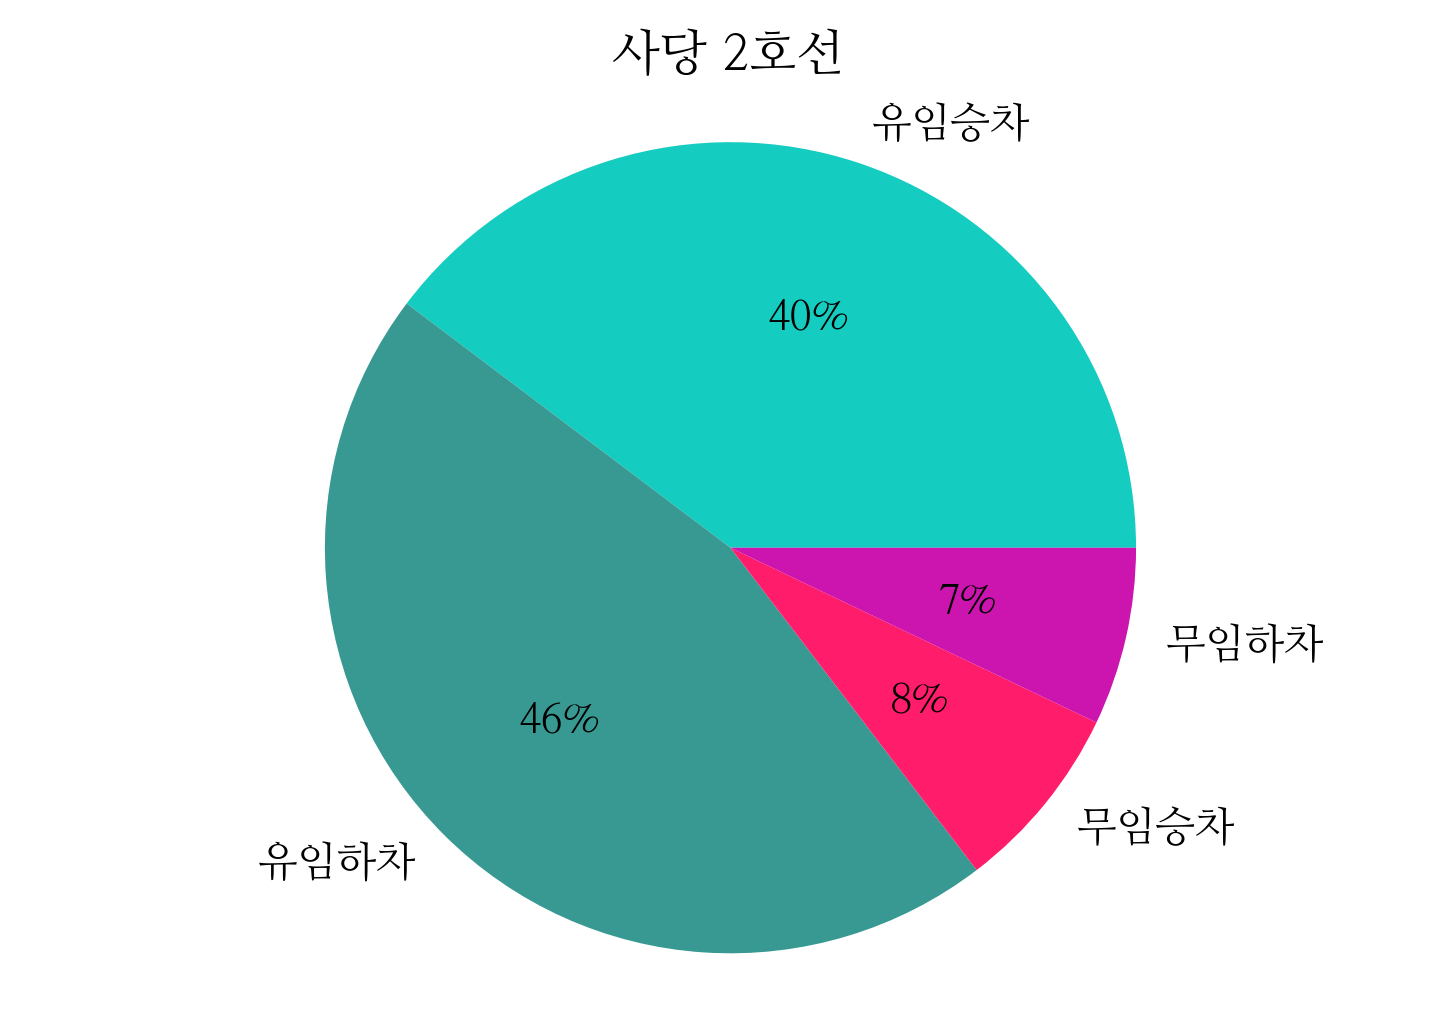

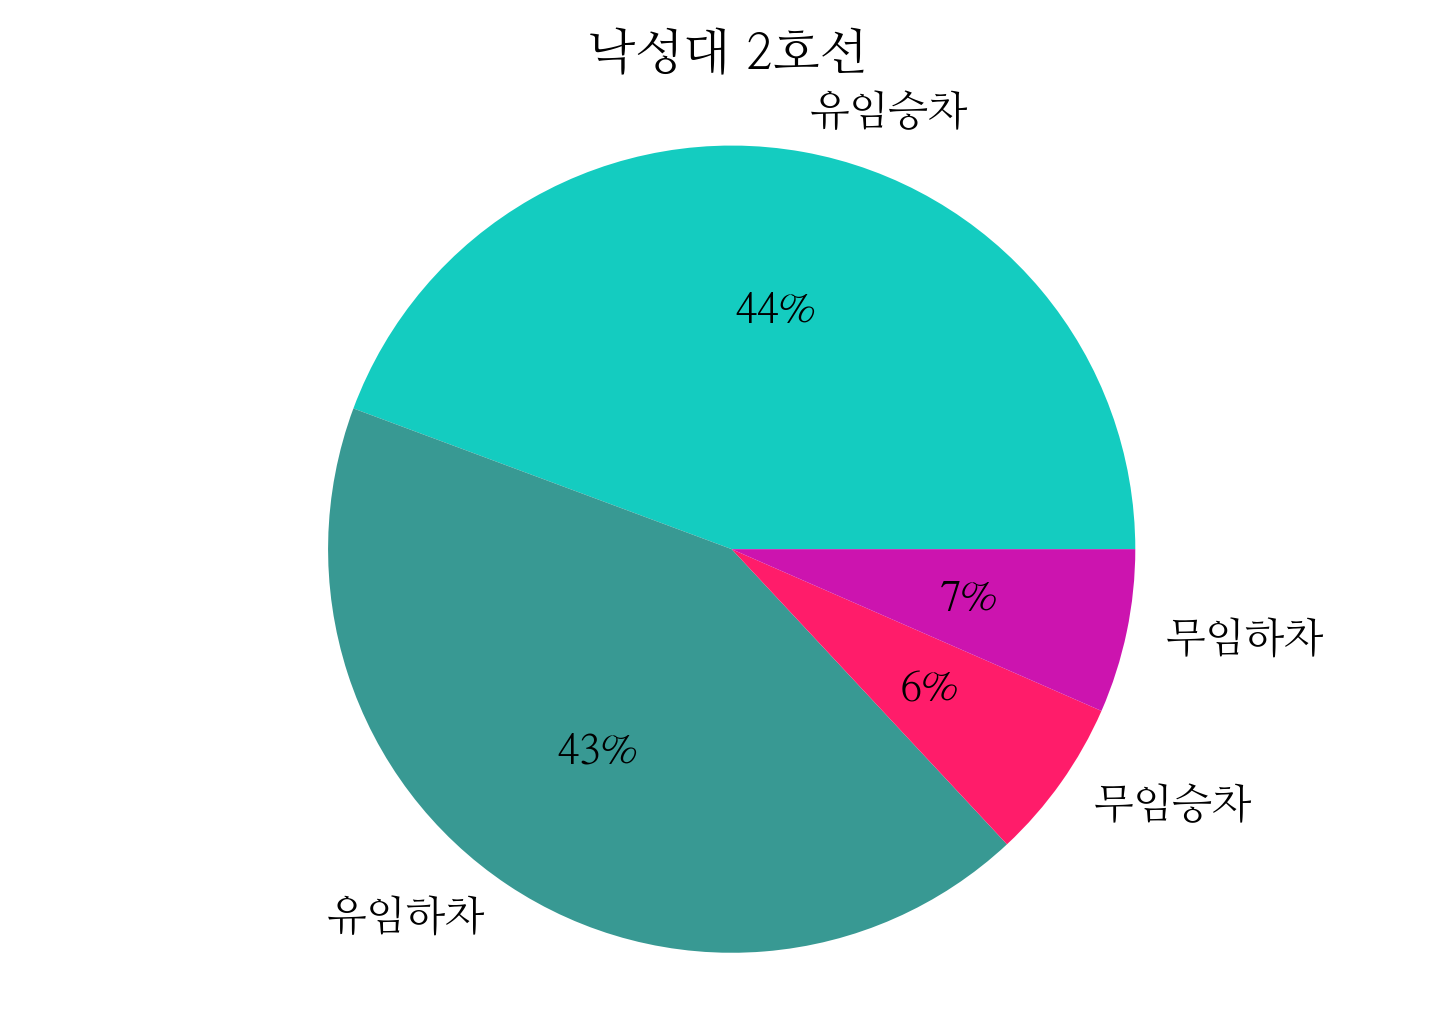

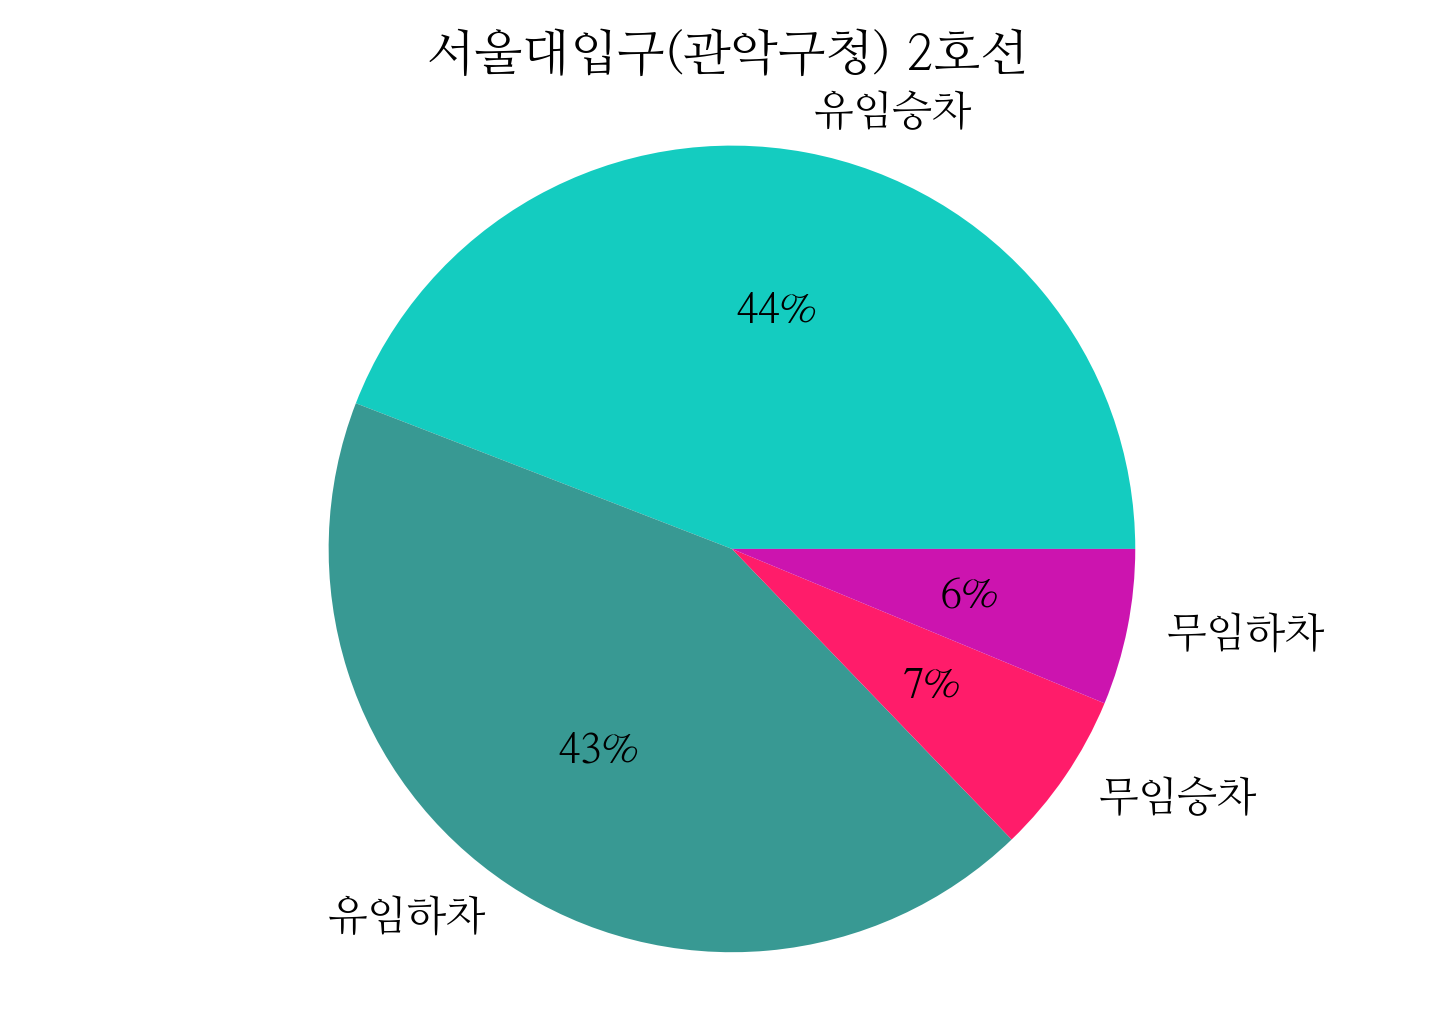

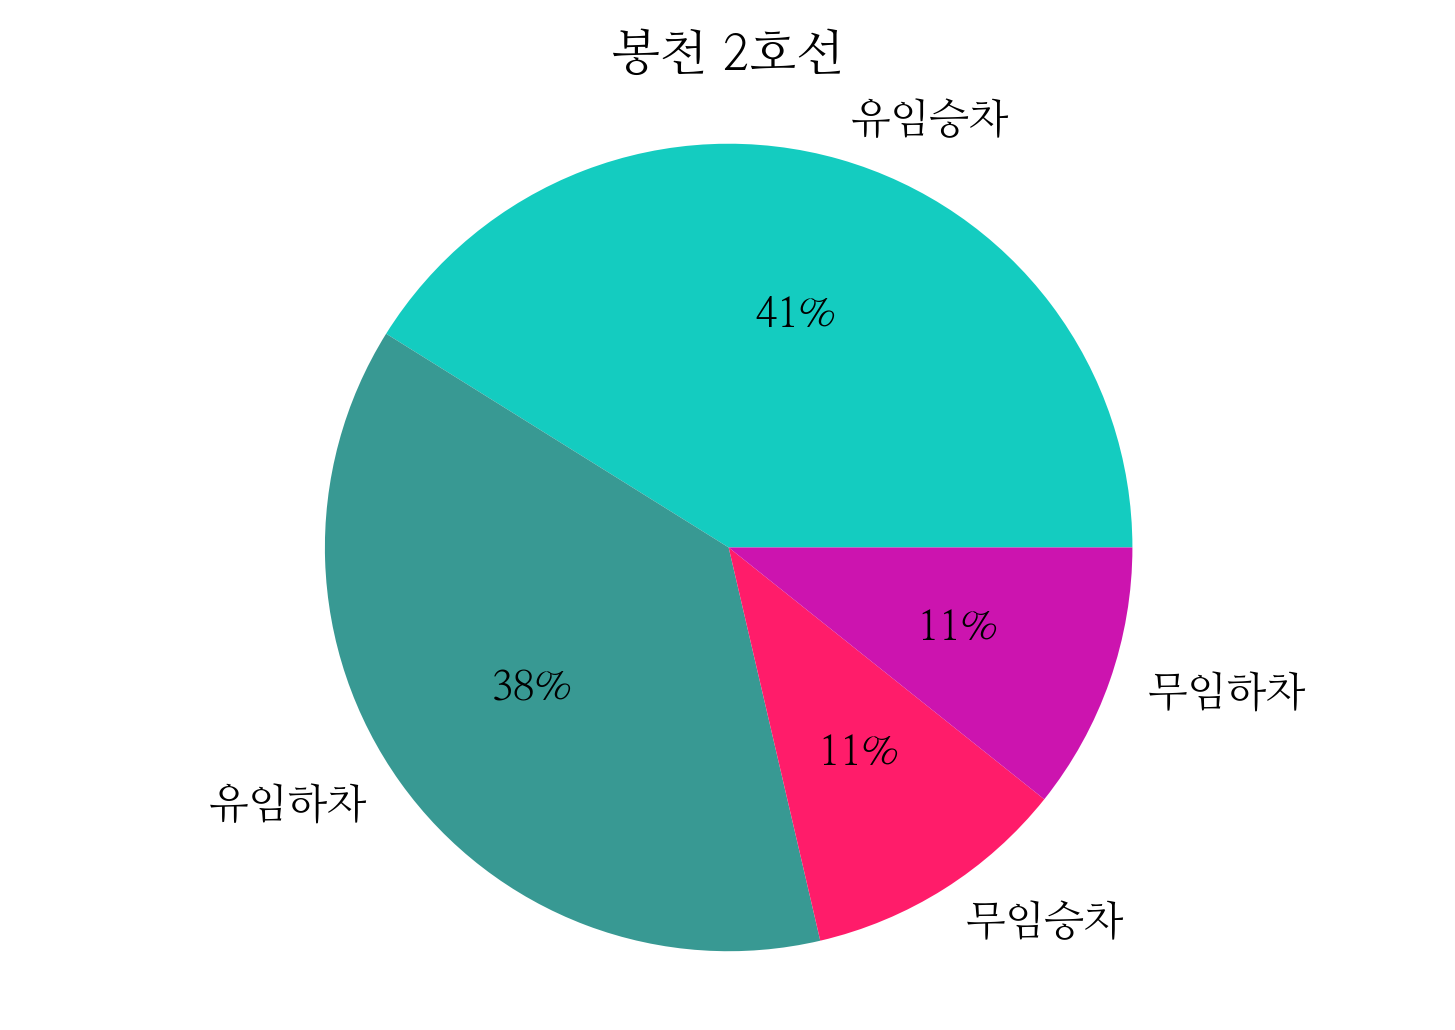

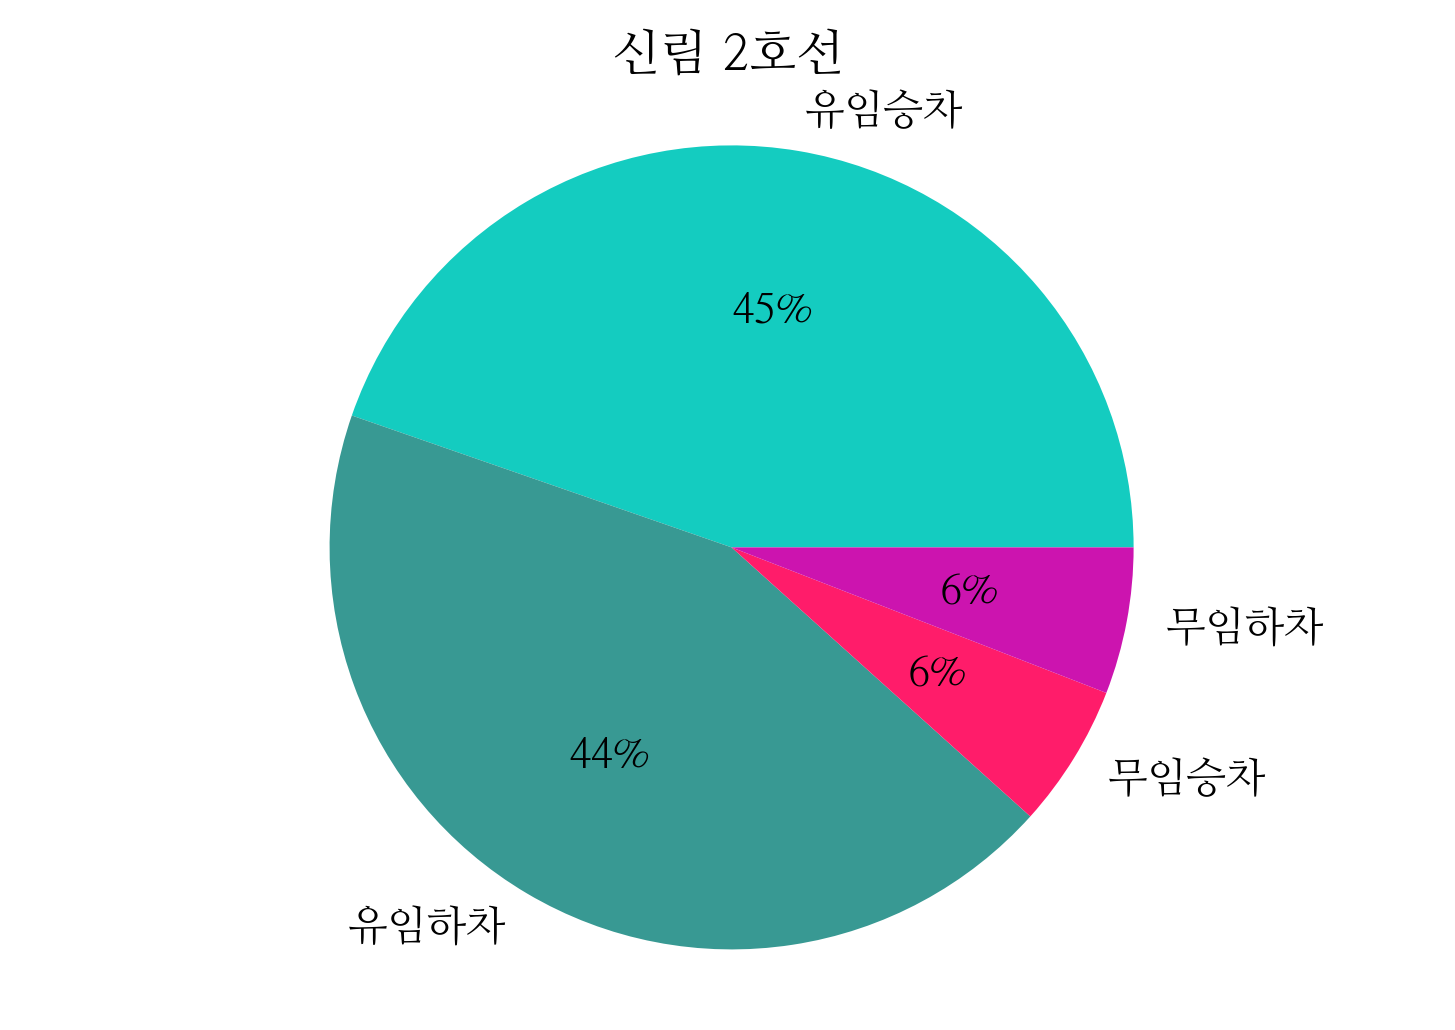

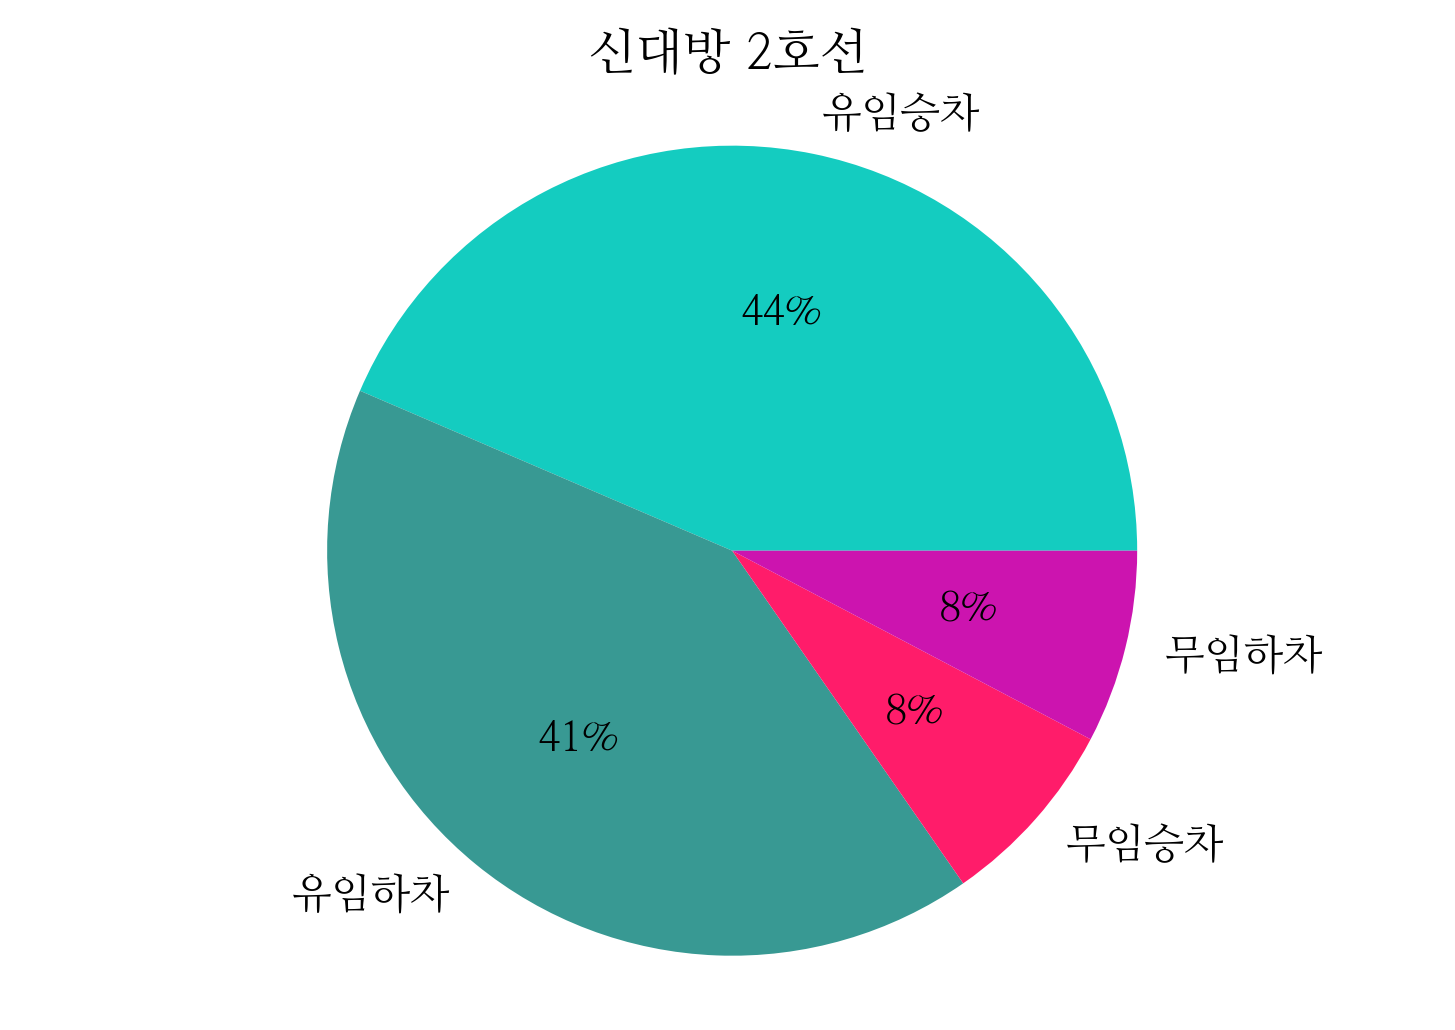

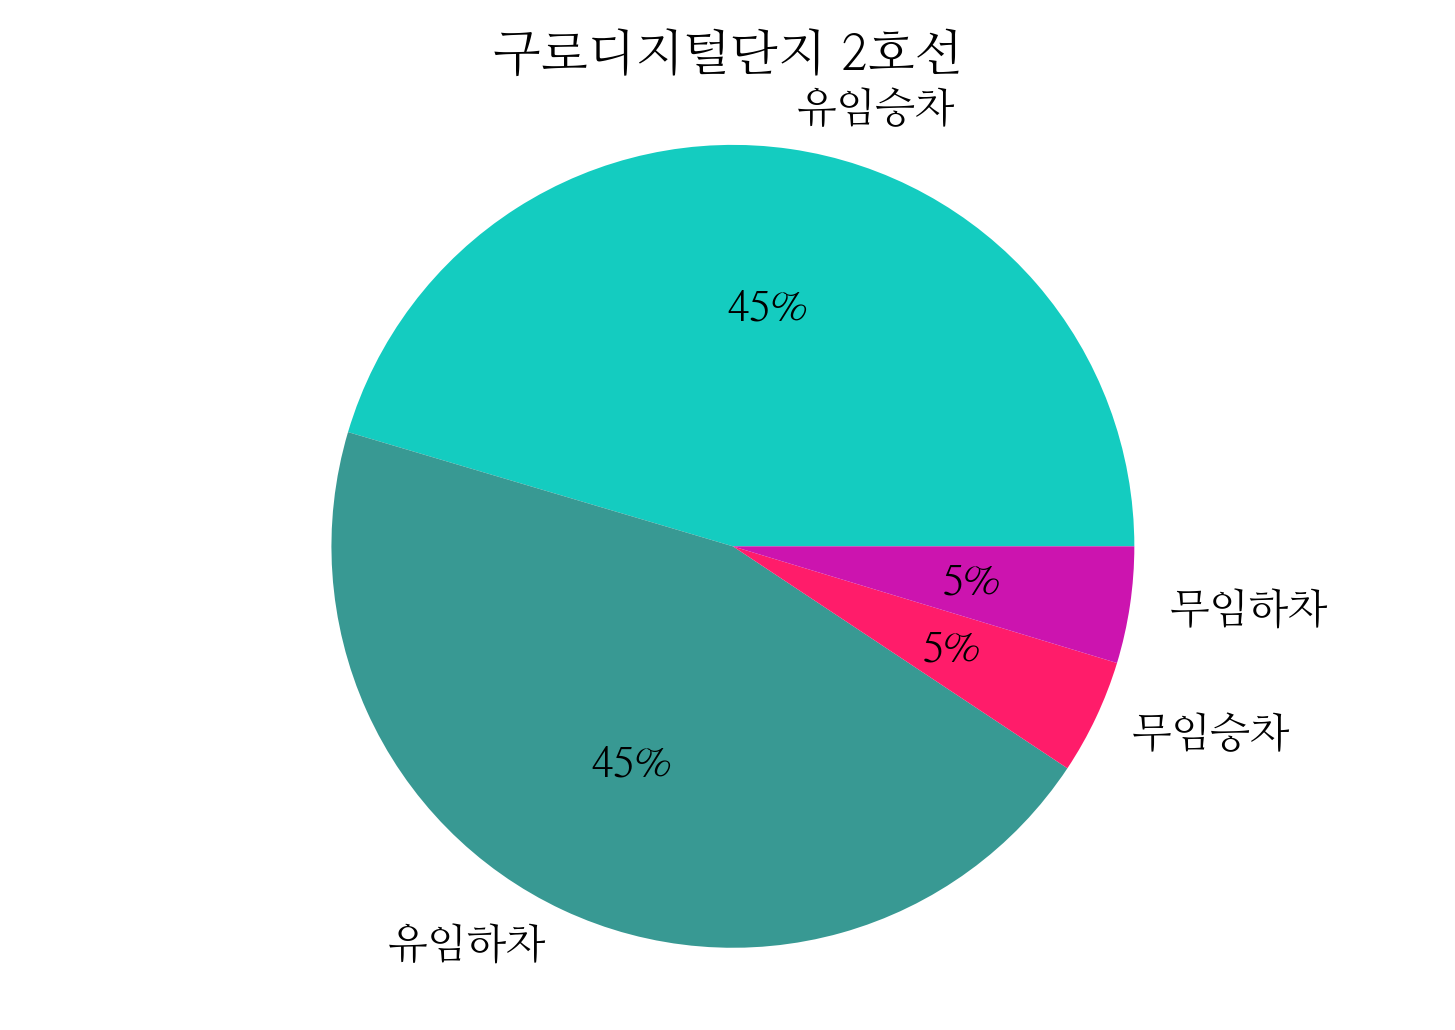

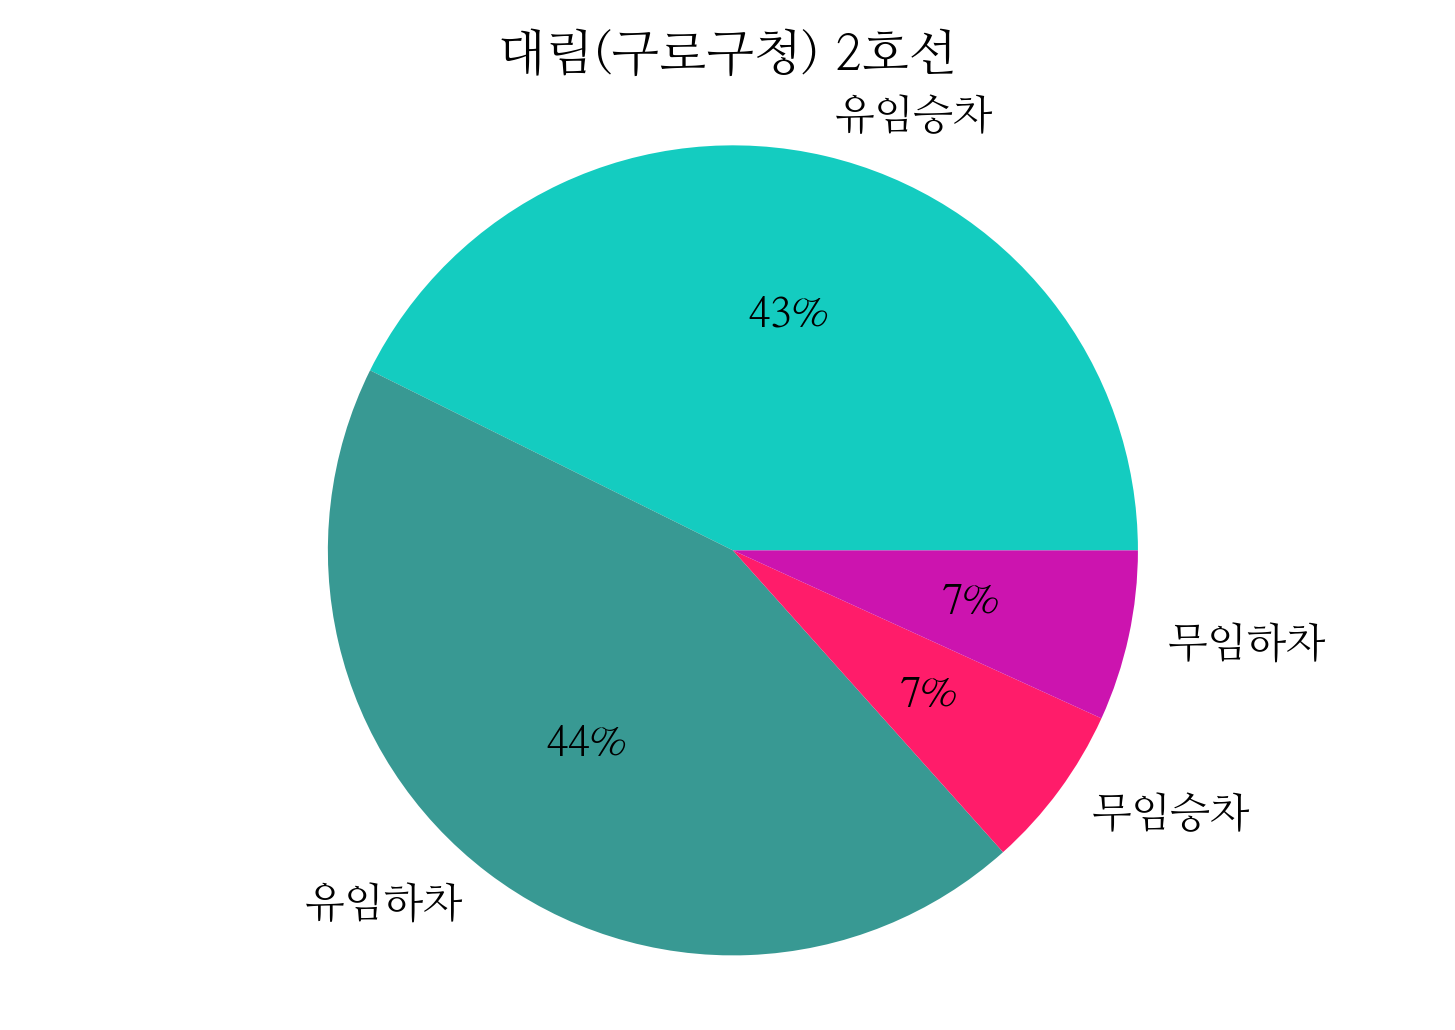

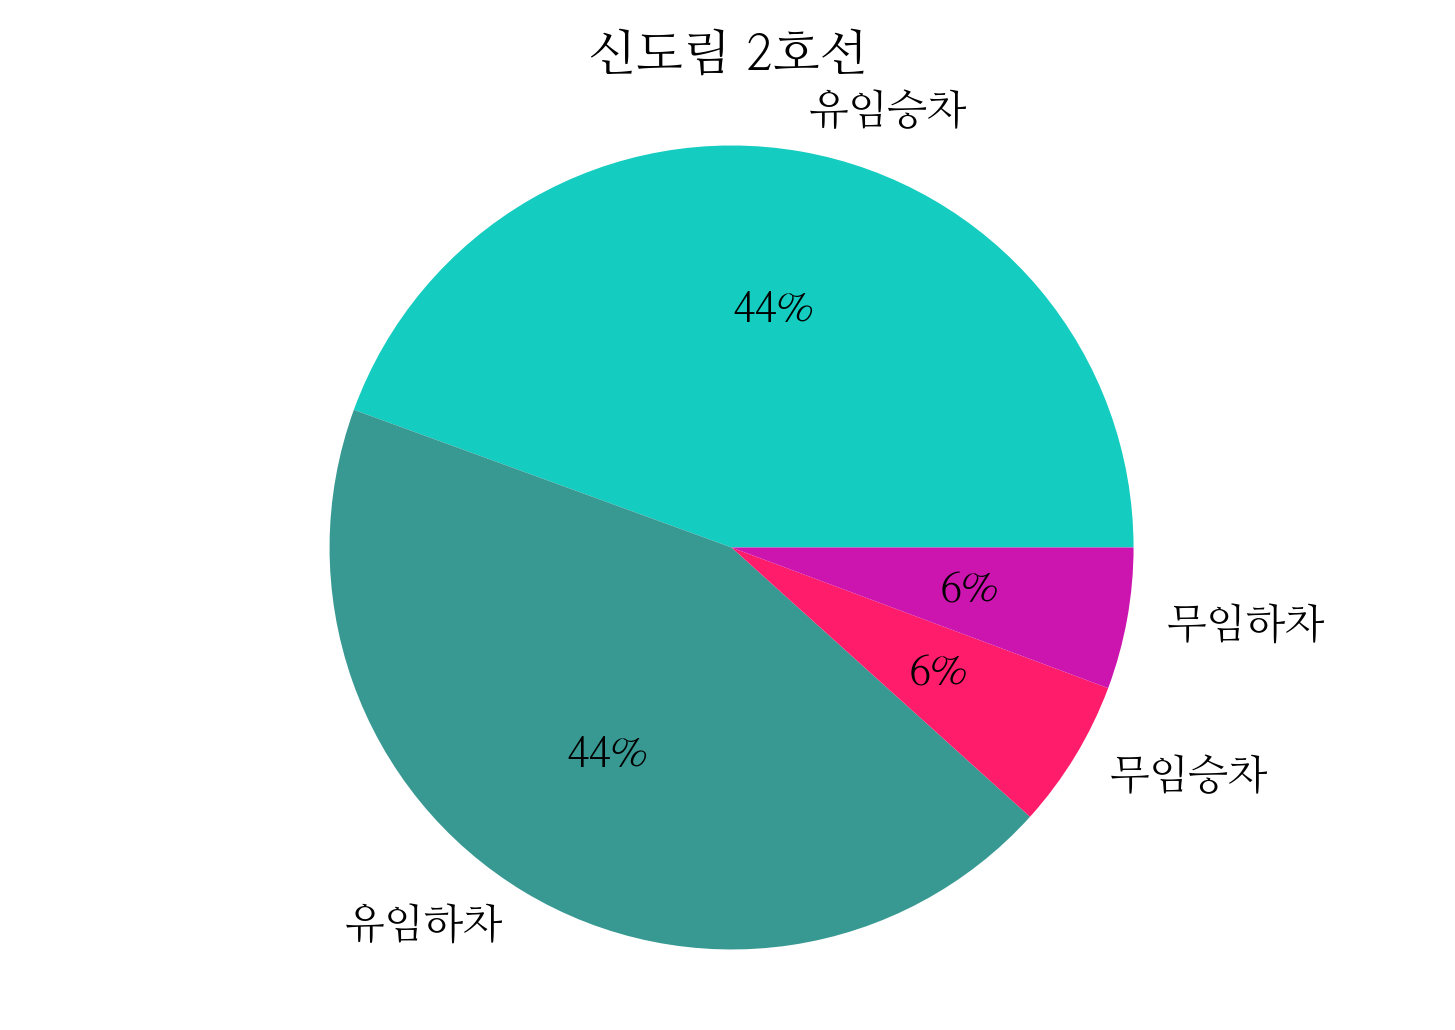

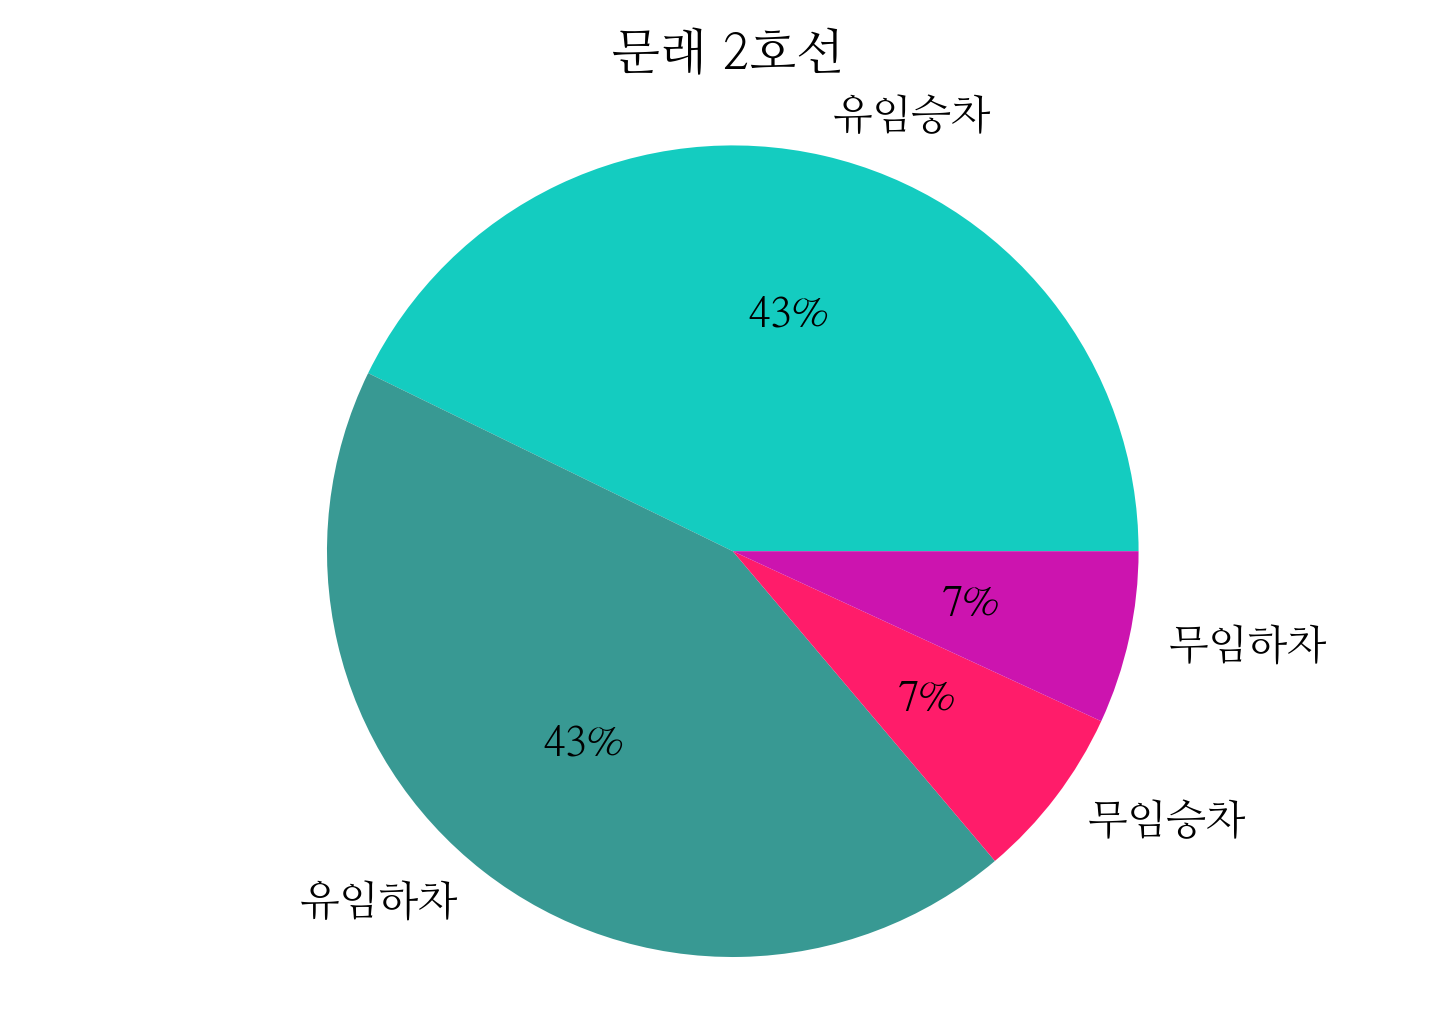

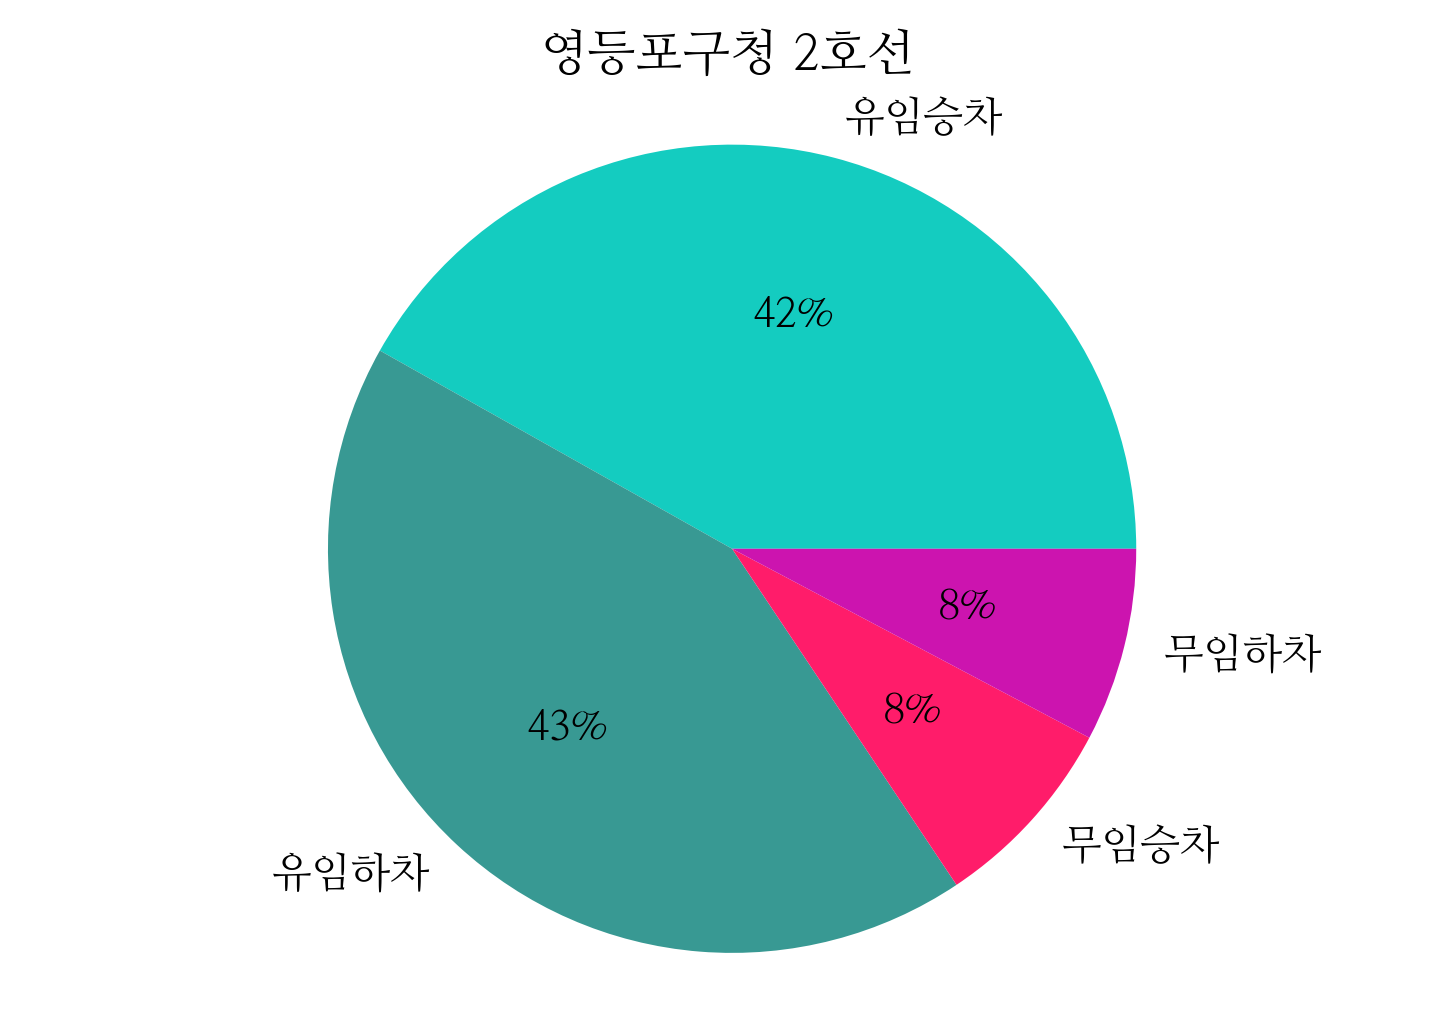

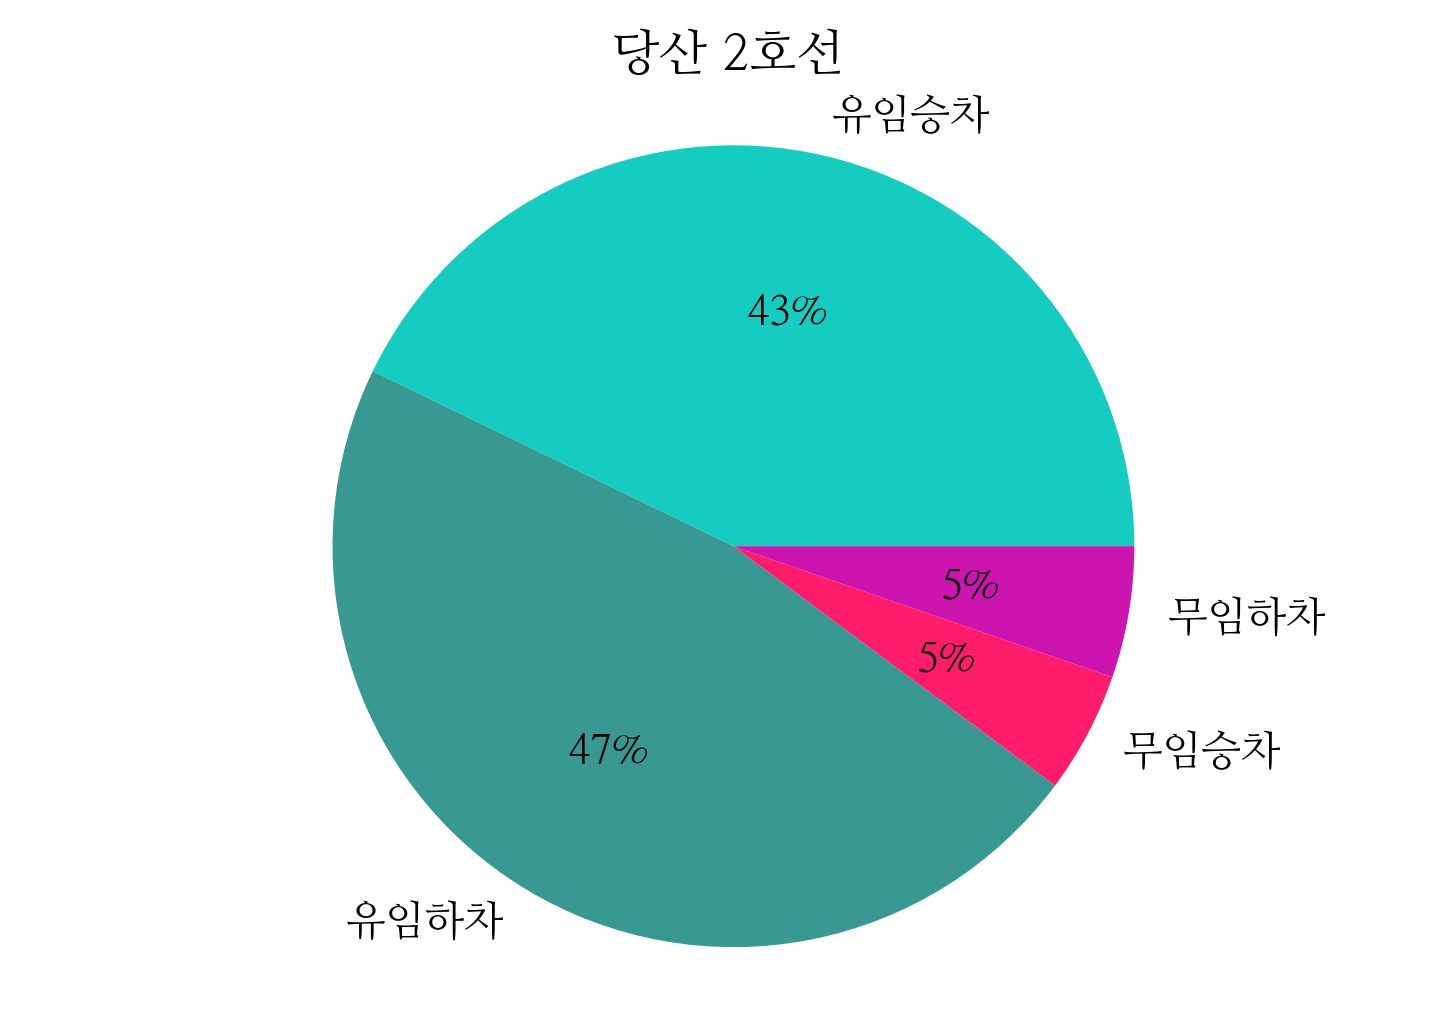

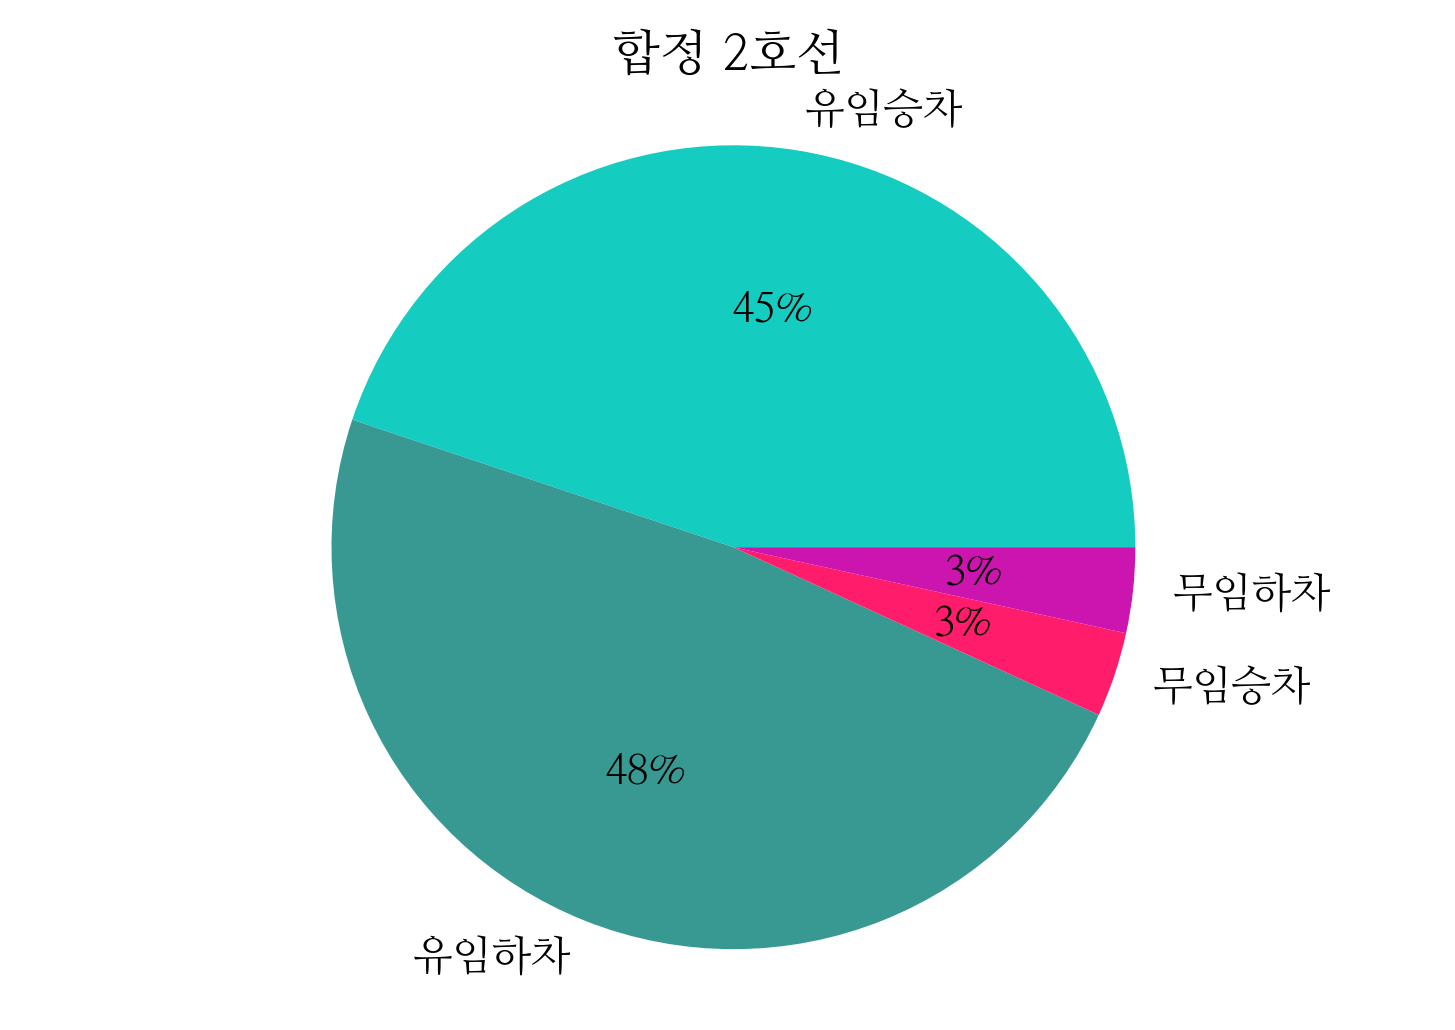

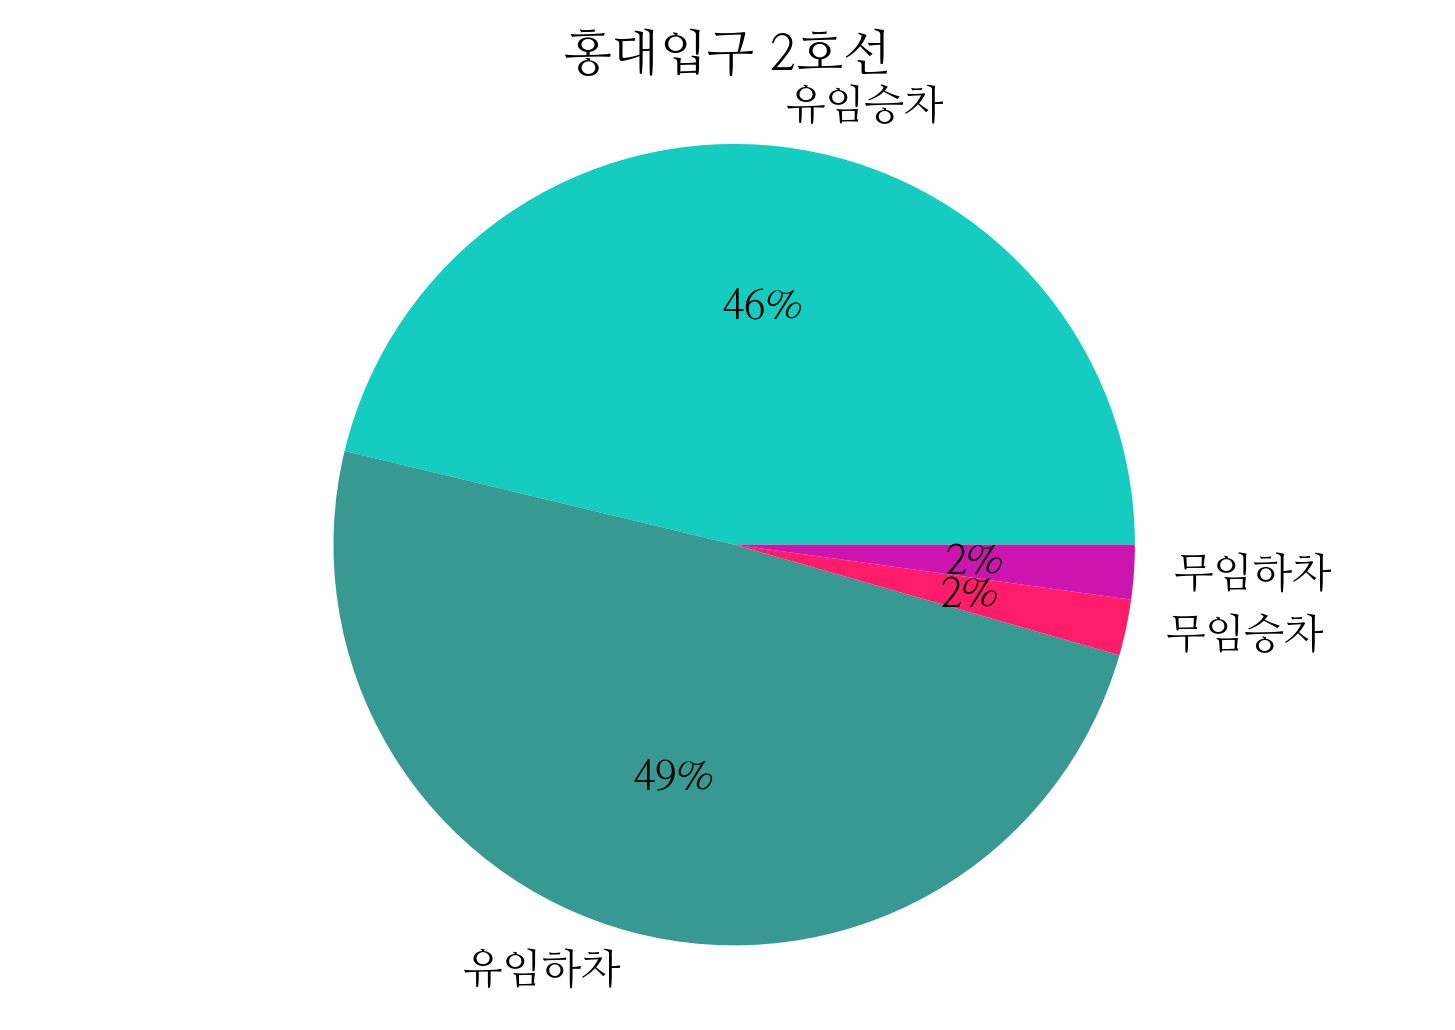

KeyboardInterrupt: 

<Figure size 1800x1200 with 0 Axes>

In [44]:
f = open('subwayfee.csv', encoding='cp949')
fee = csv.reader(f)
next(fee)
label = ['유임승차', '유임하차', '무임승차', '무임하차']

c = ['#14CCC0', '#389993', '#FF1C6A', '#cc14AF']

for row in fee:
    for i in range(4, 8):
        row[i] = int(row[i])
    plt.figure(dpi=300)
    plt.title(row[3] + ' ' + row[1])
    plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
    plt.axis('equal')
    plt.show()

색상표 참조: http://www.hipenpal.com/tool/html-color-charts-rgb-color-table-in-korean.php


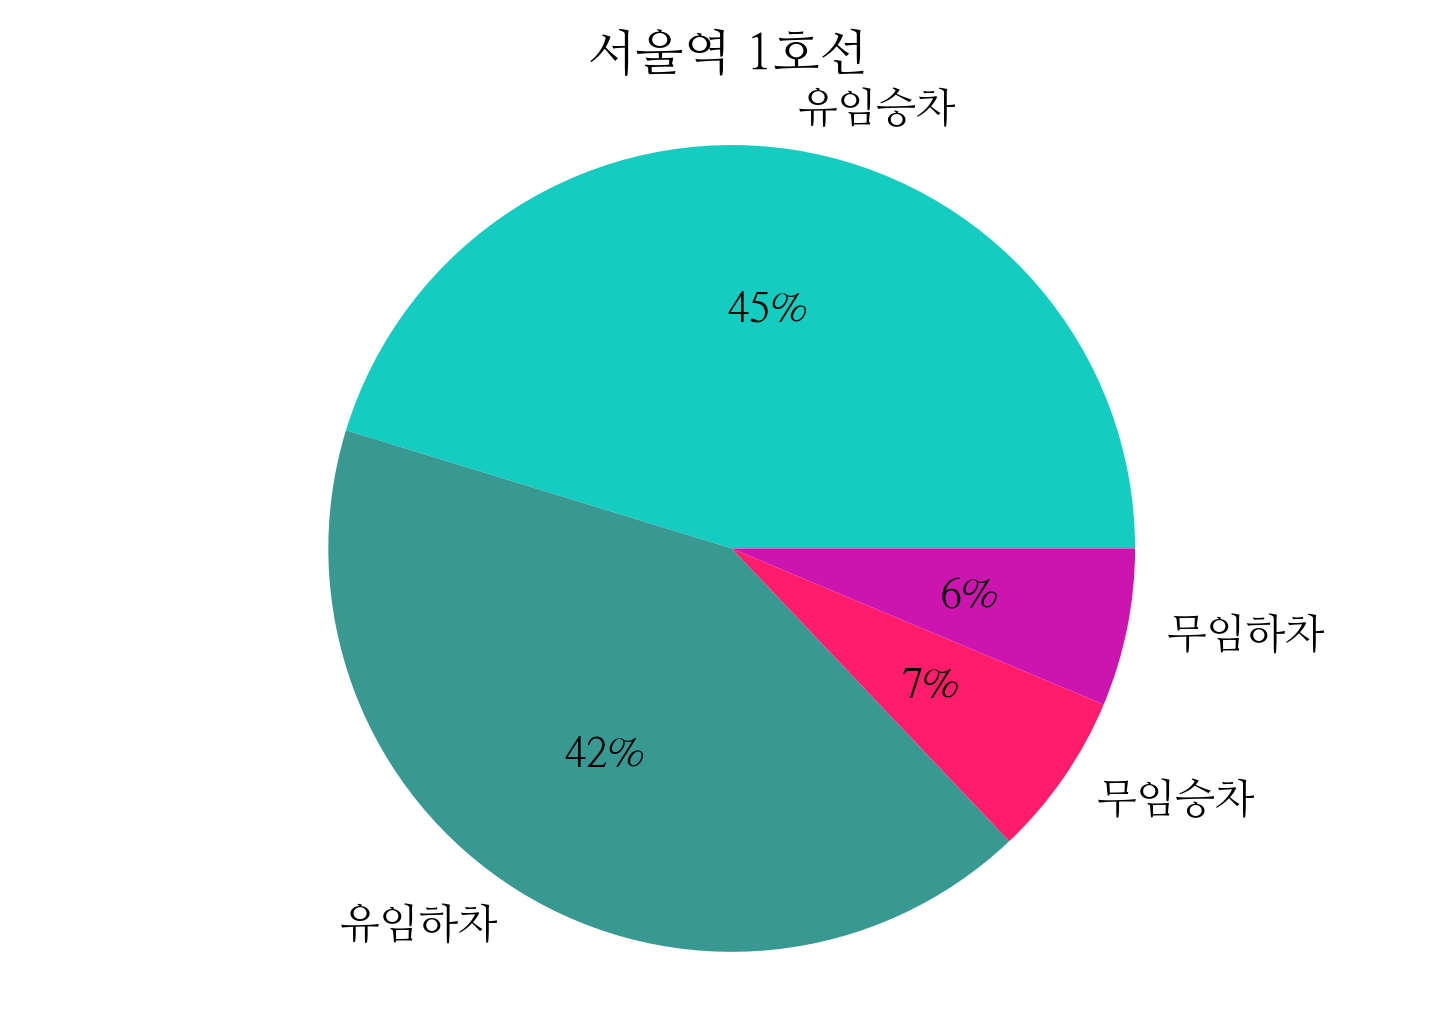

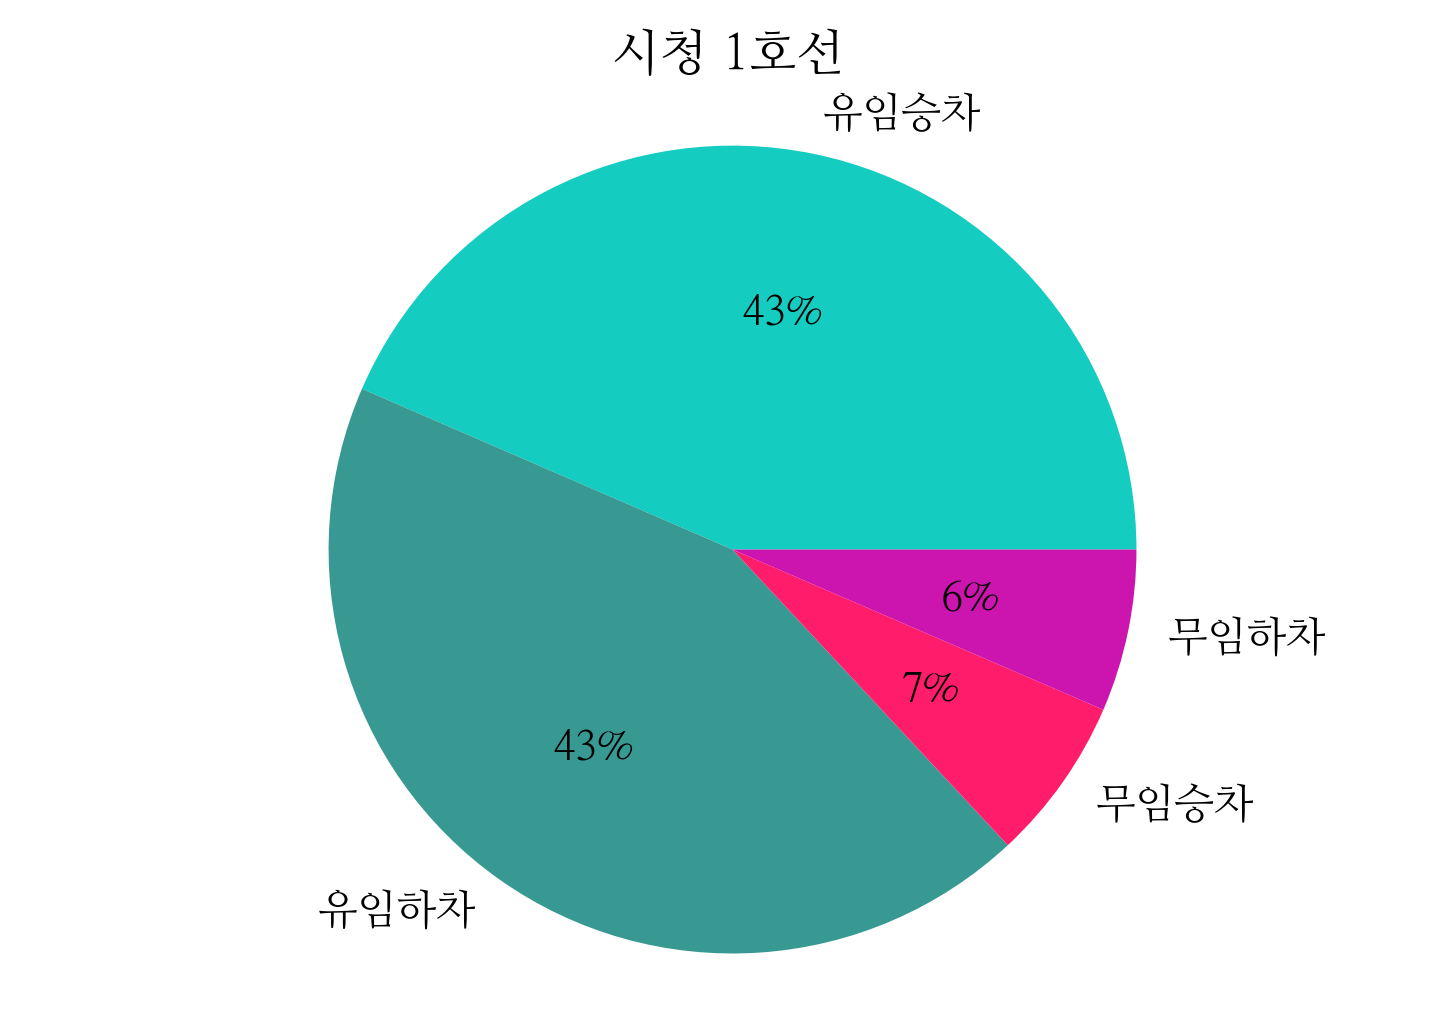

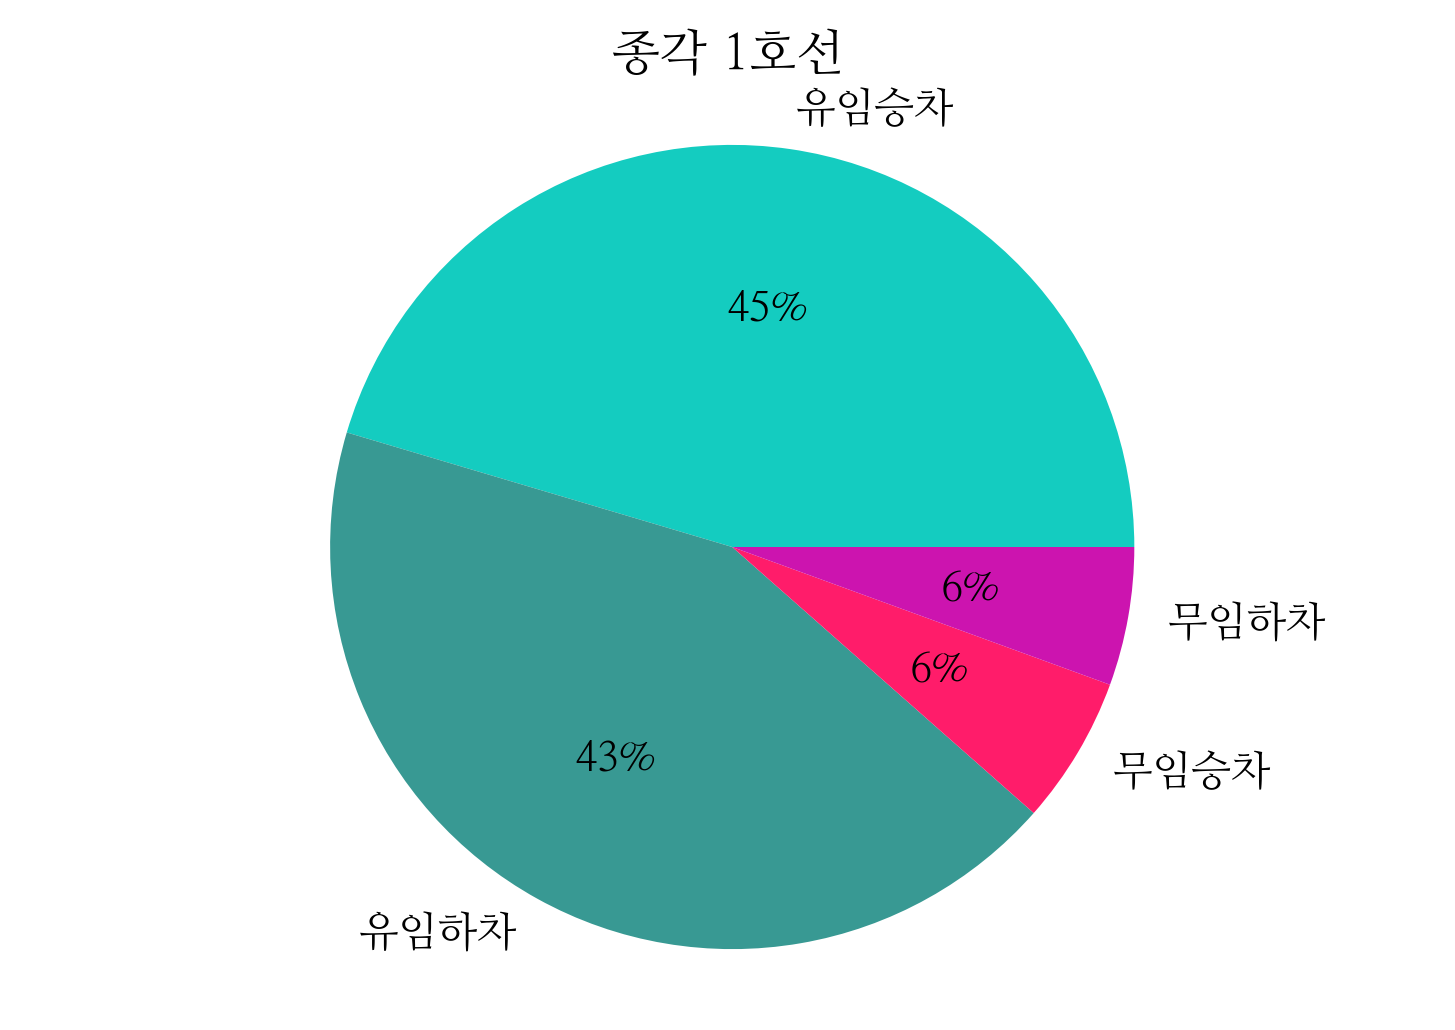

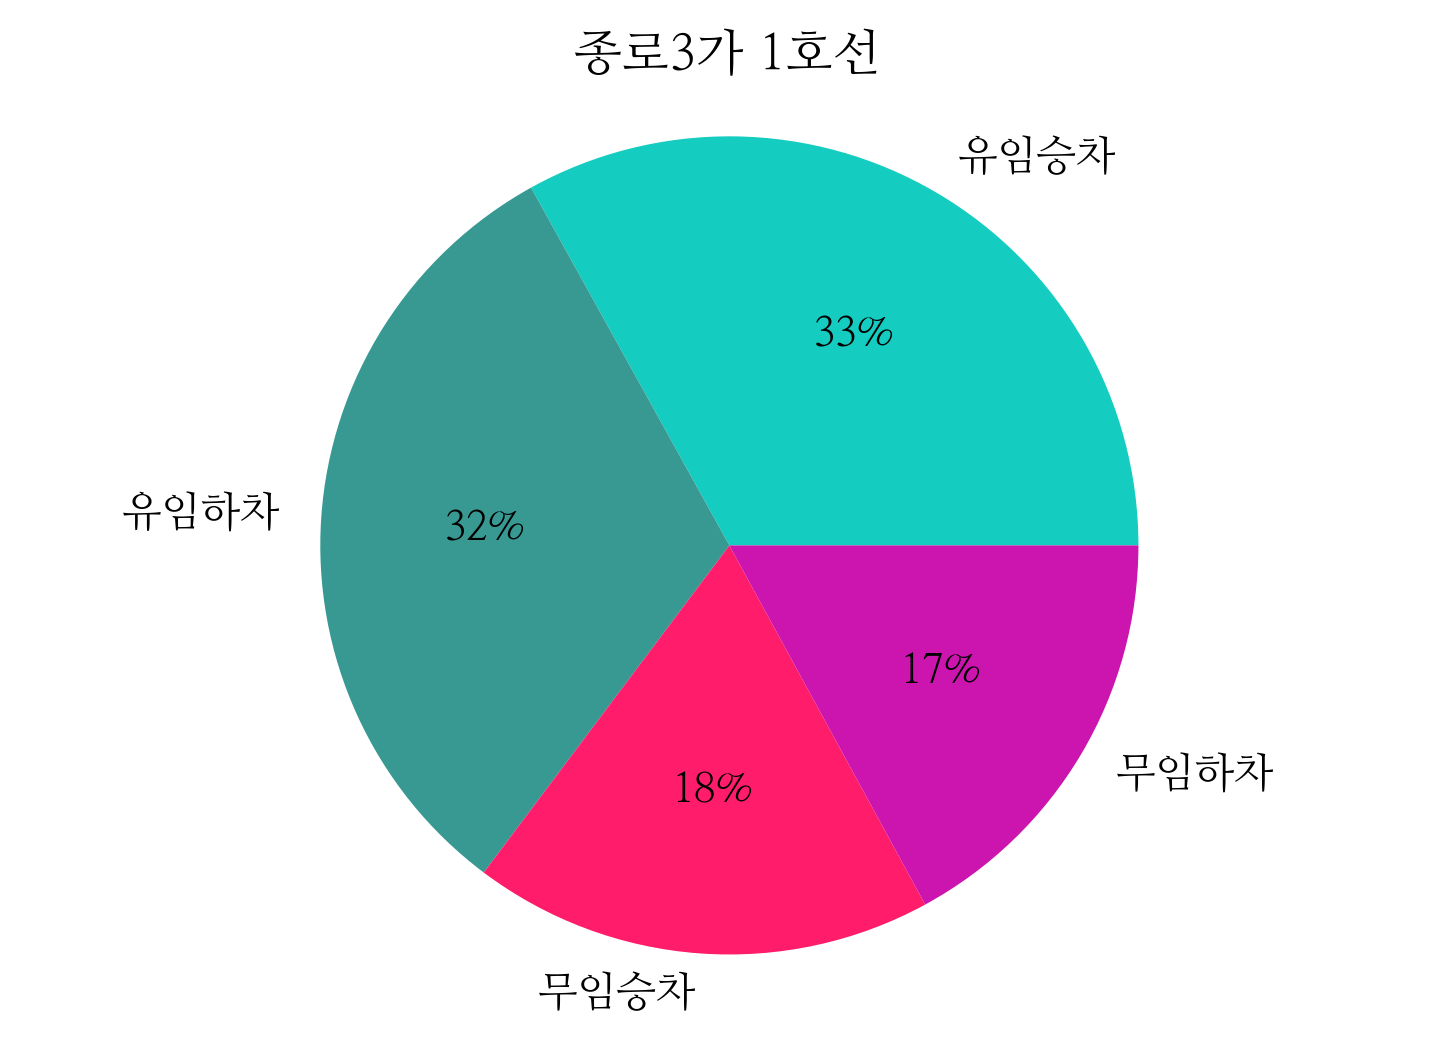

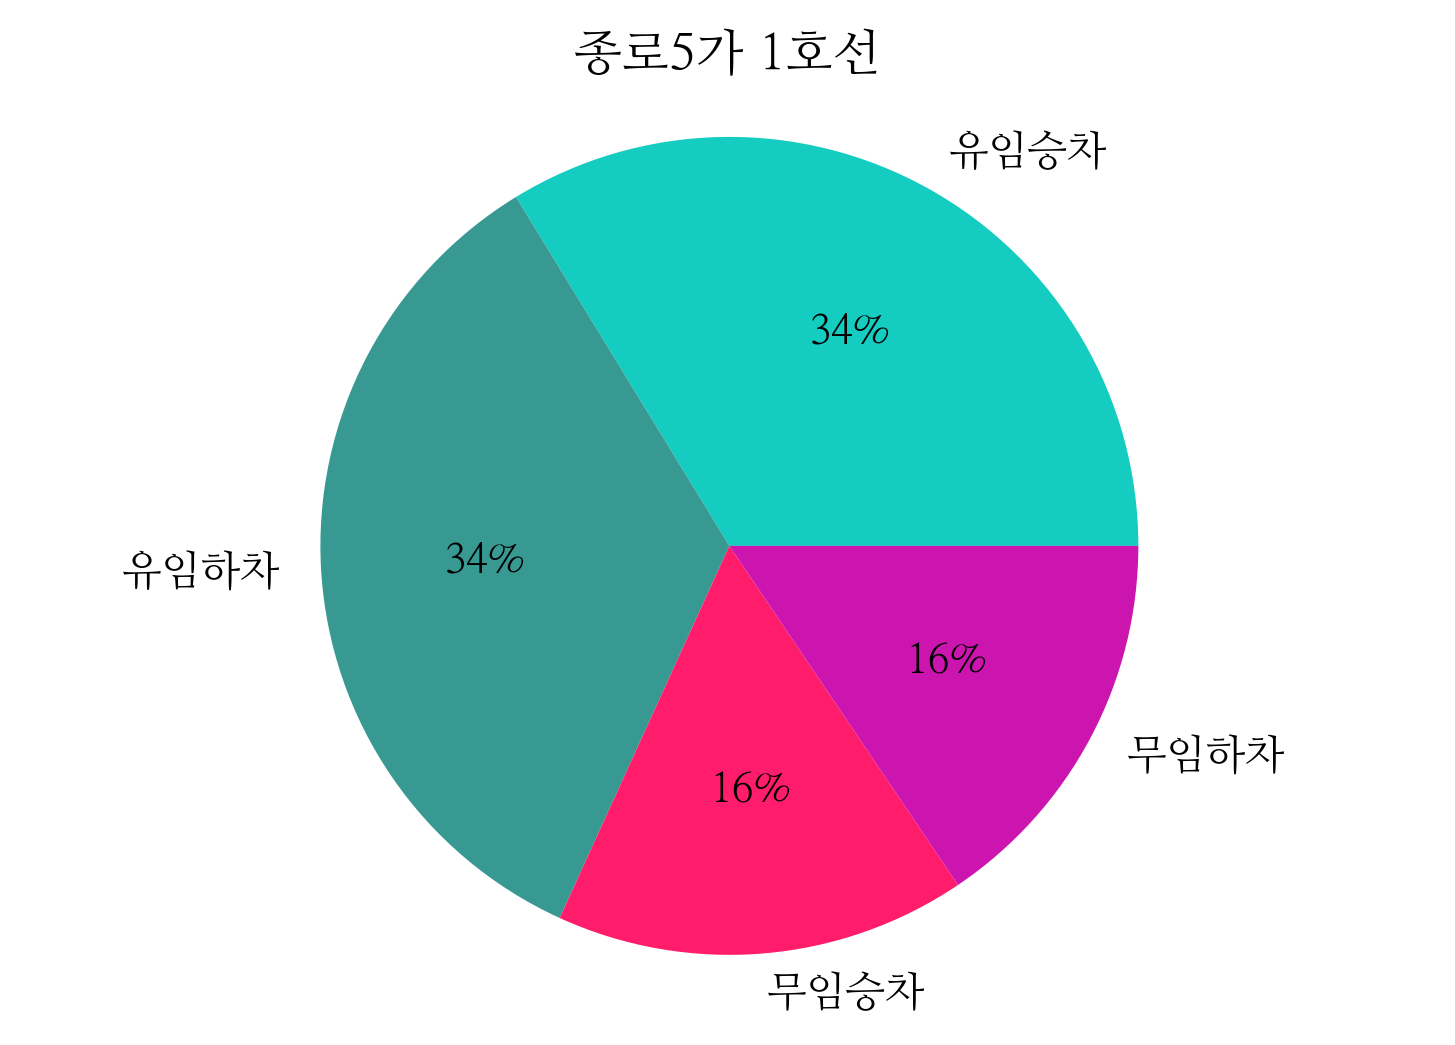

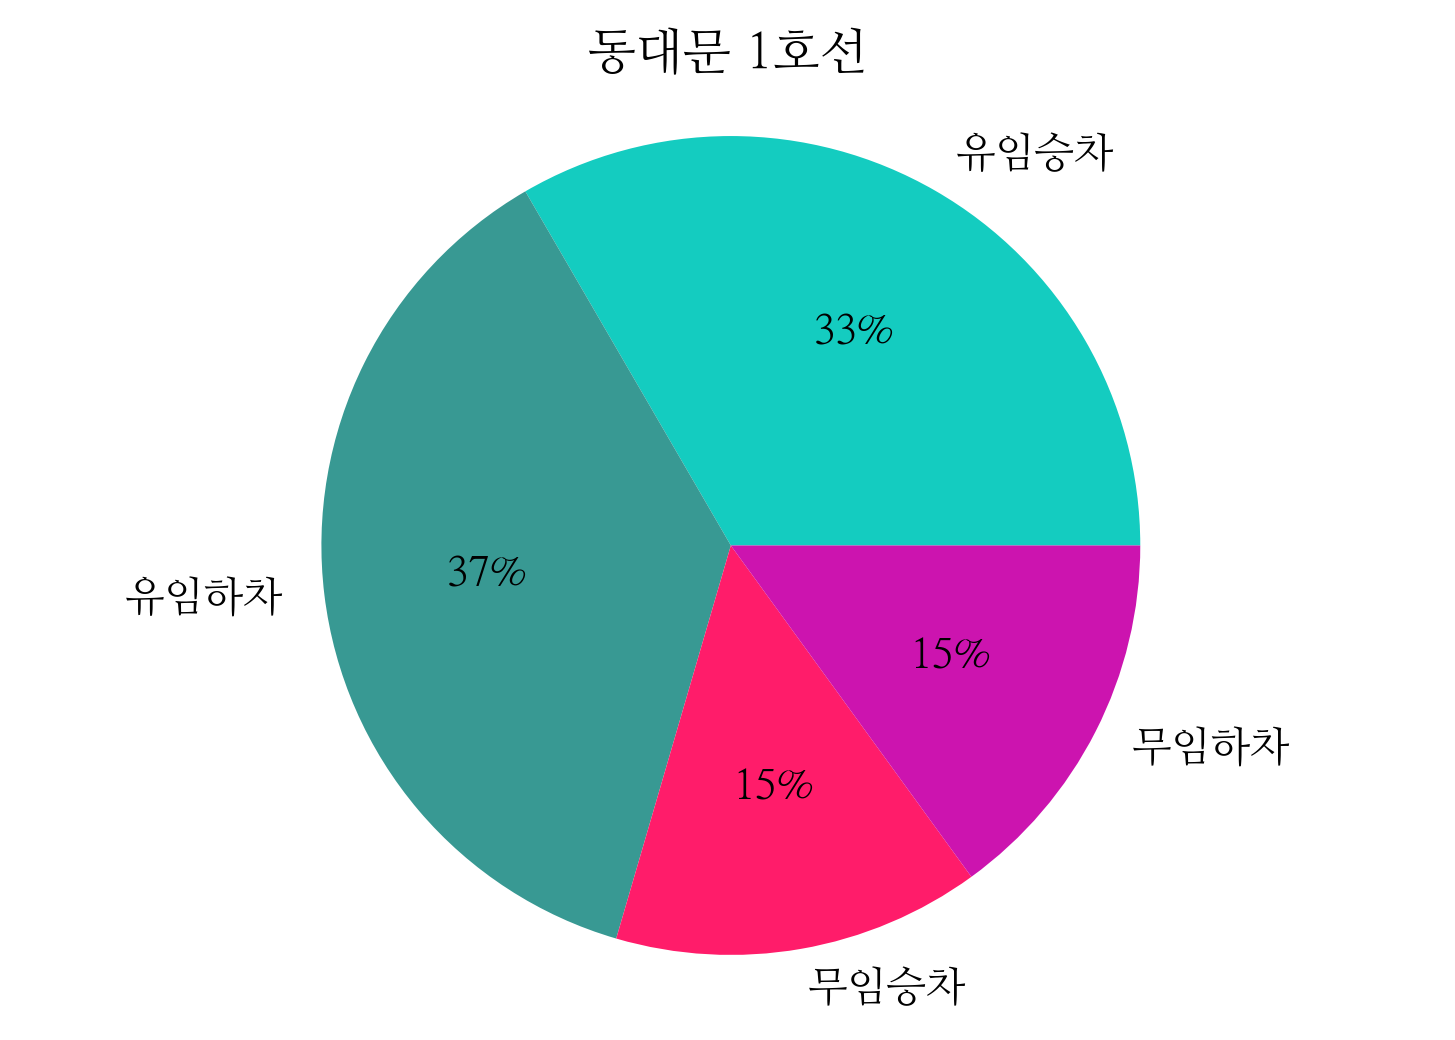

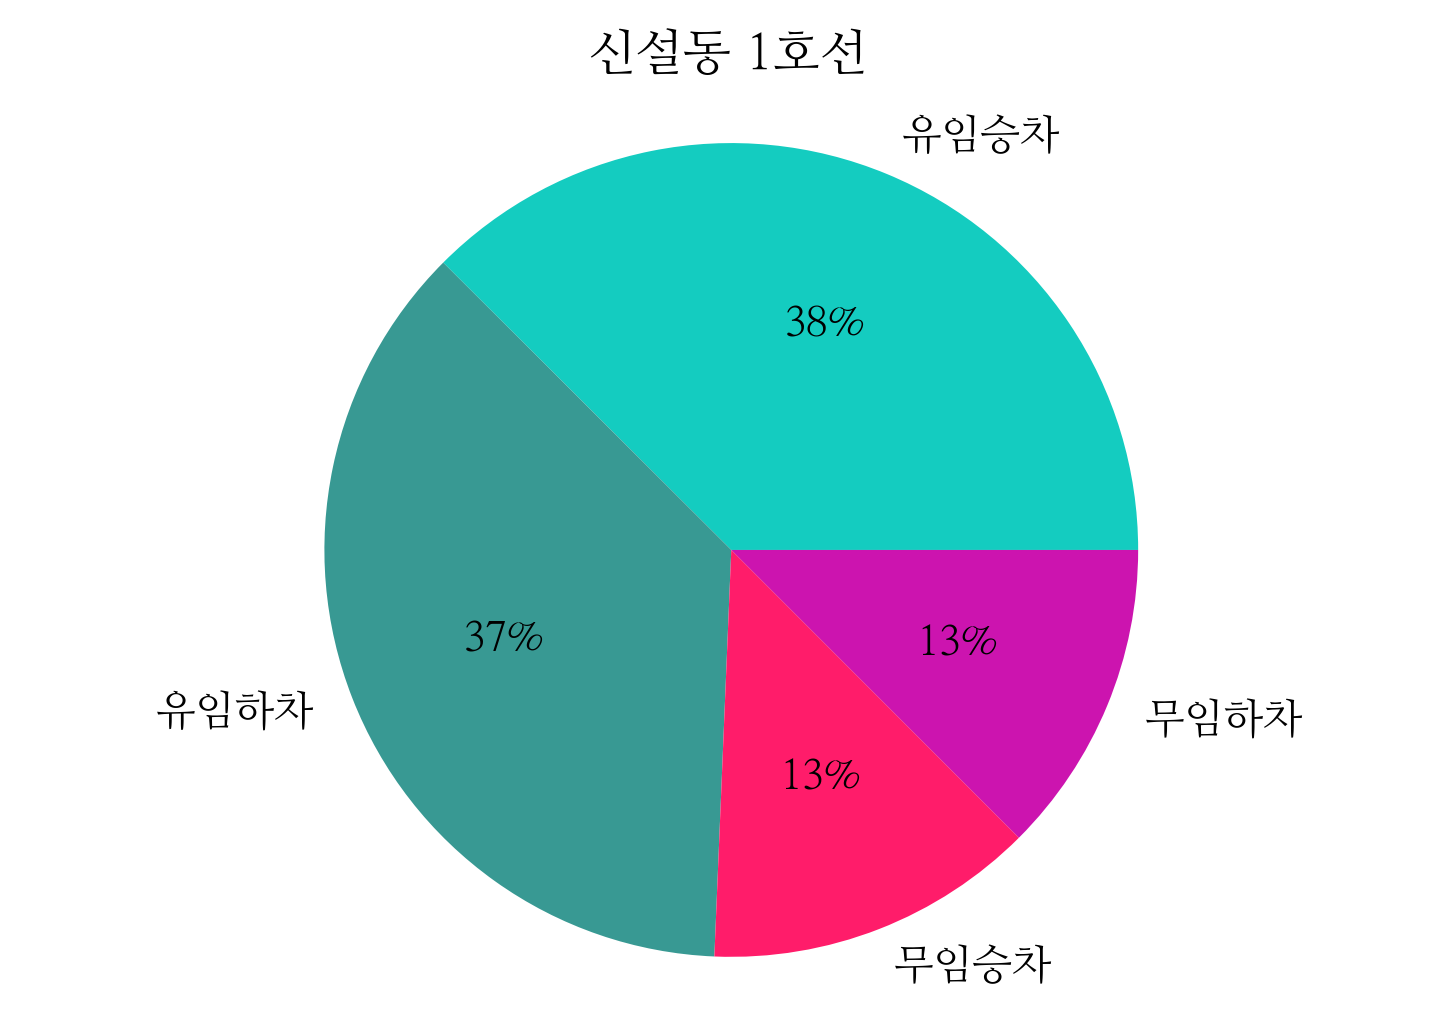

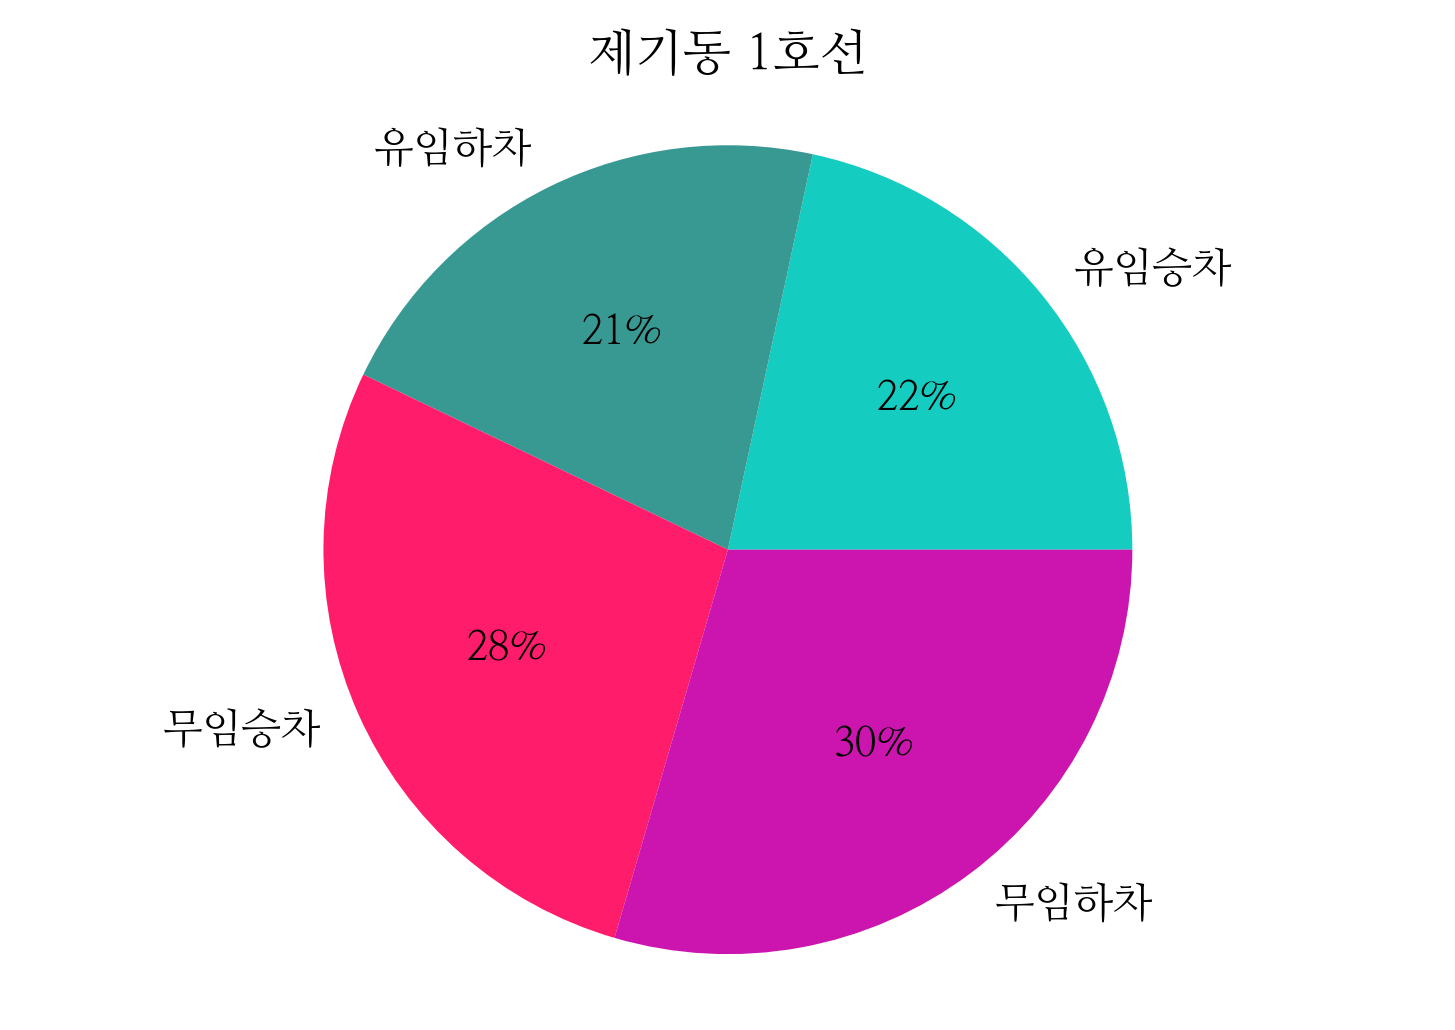

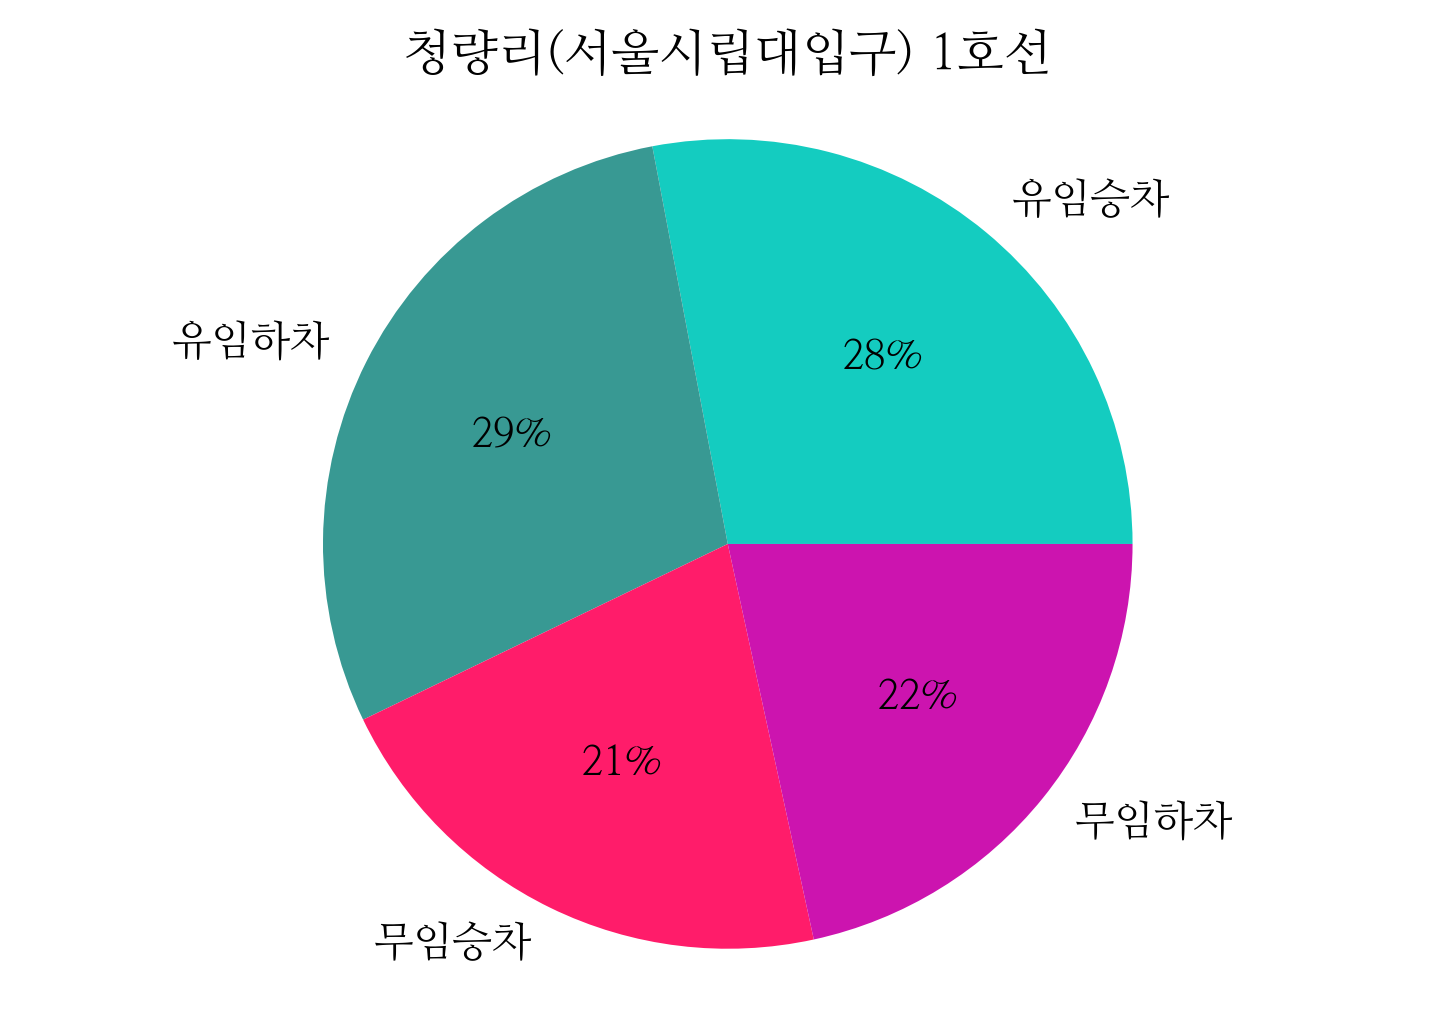

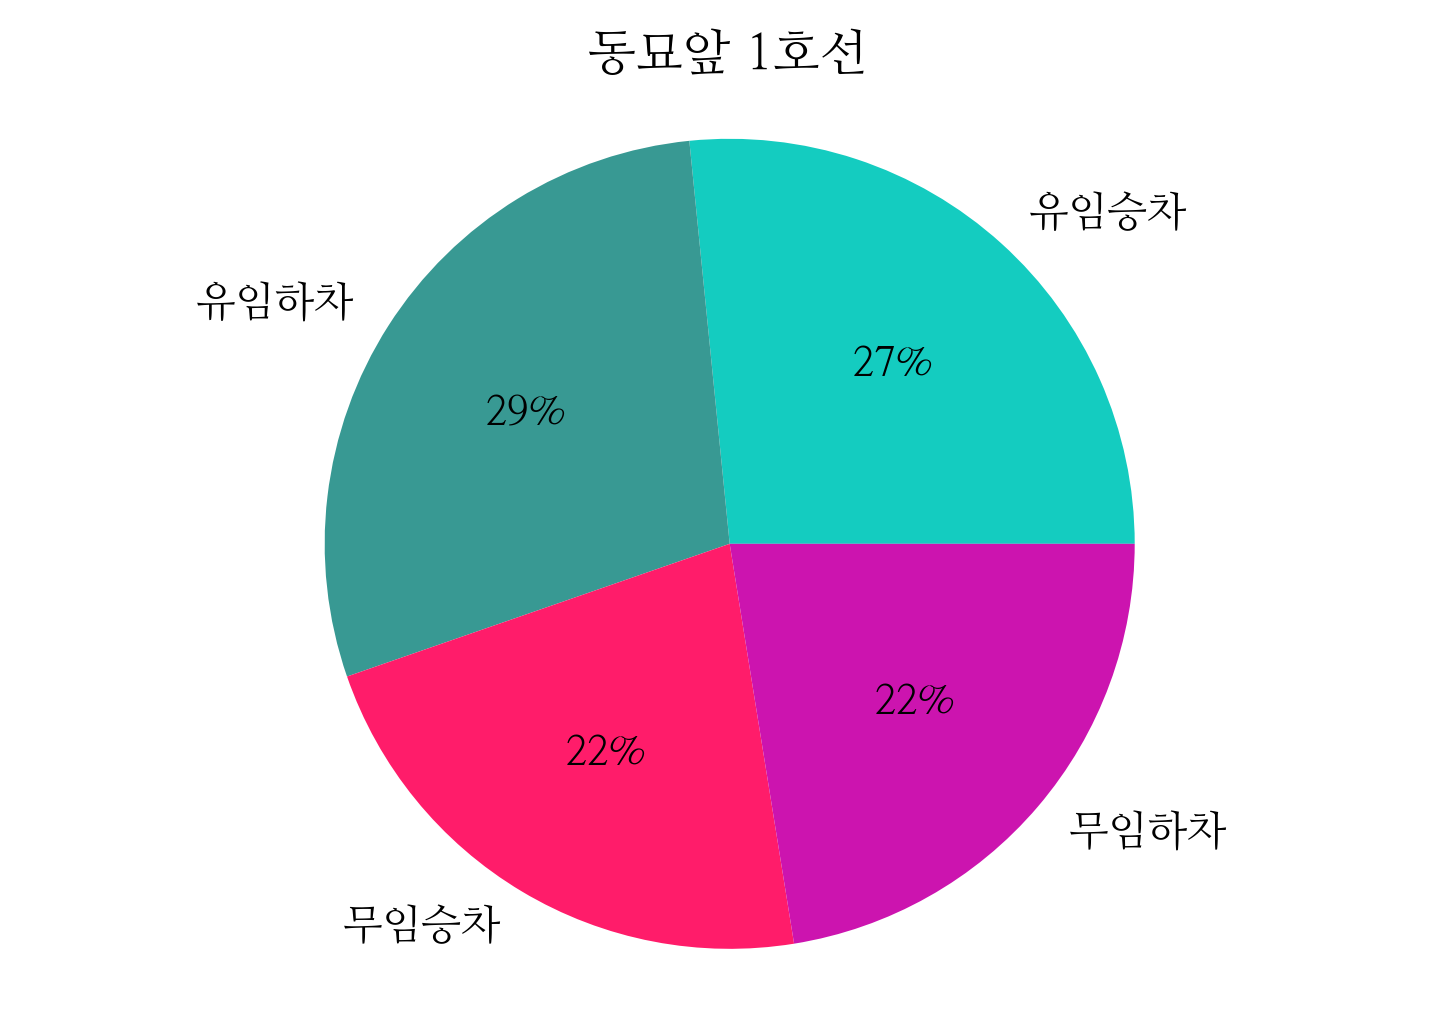

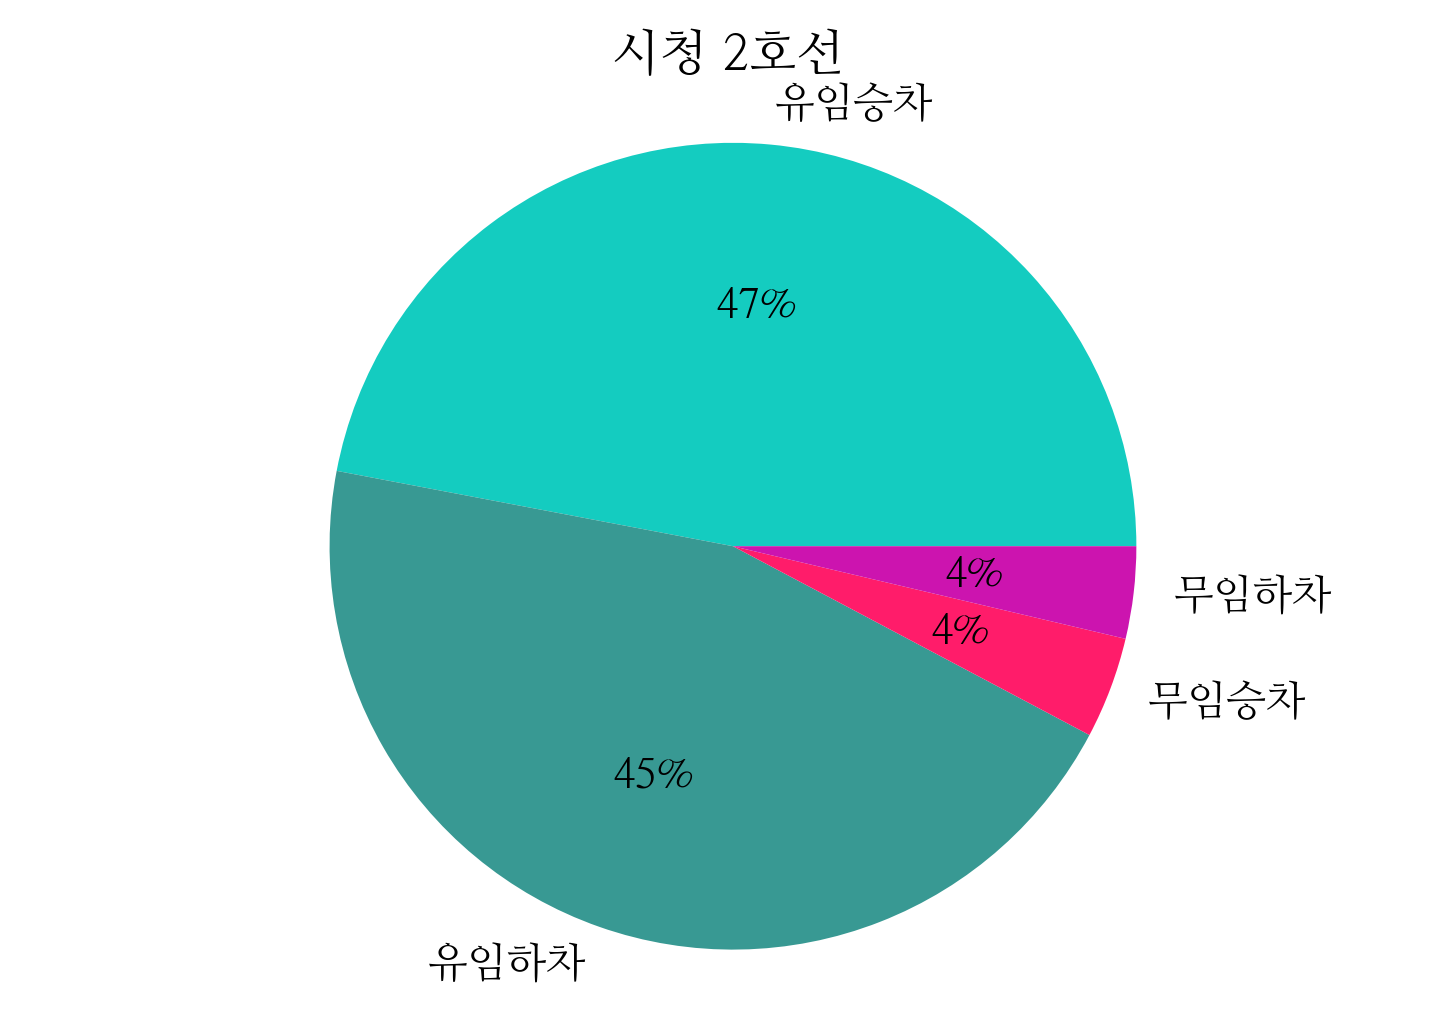

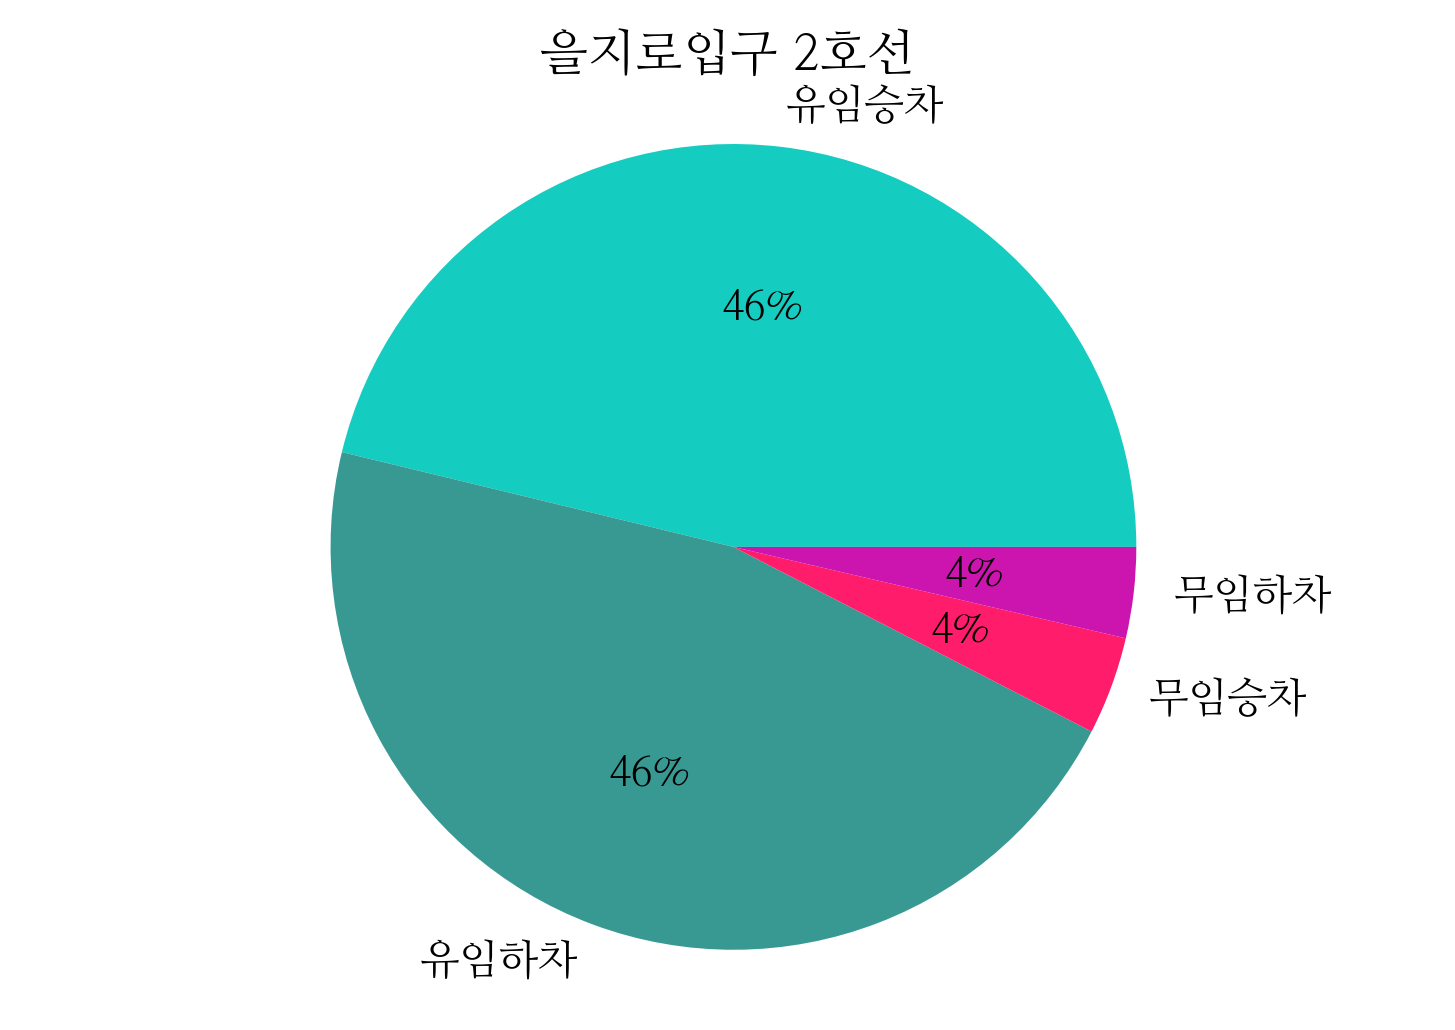

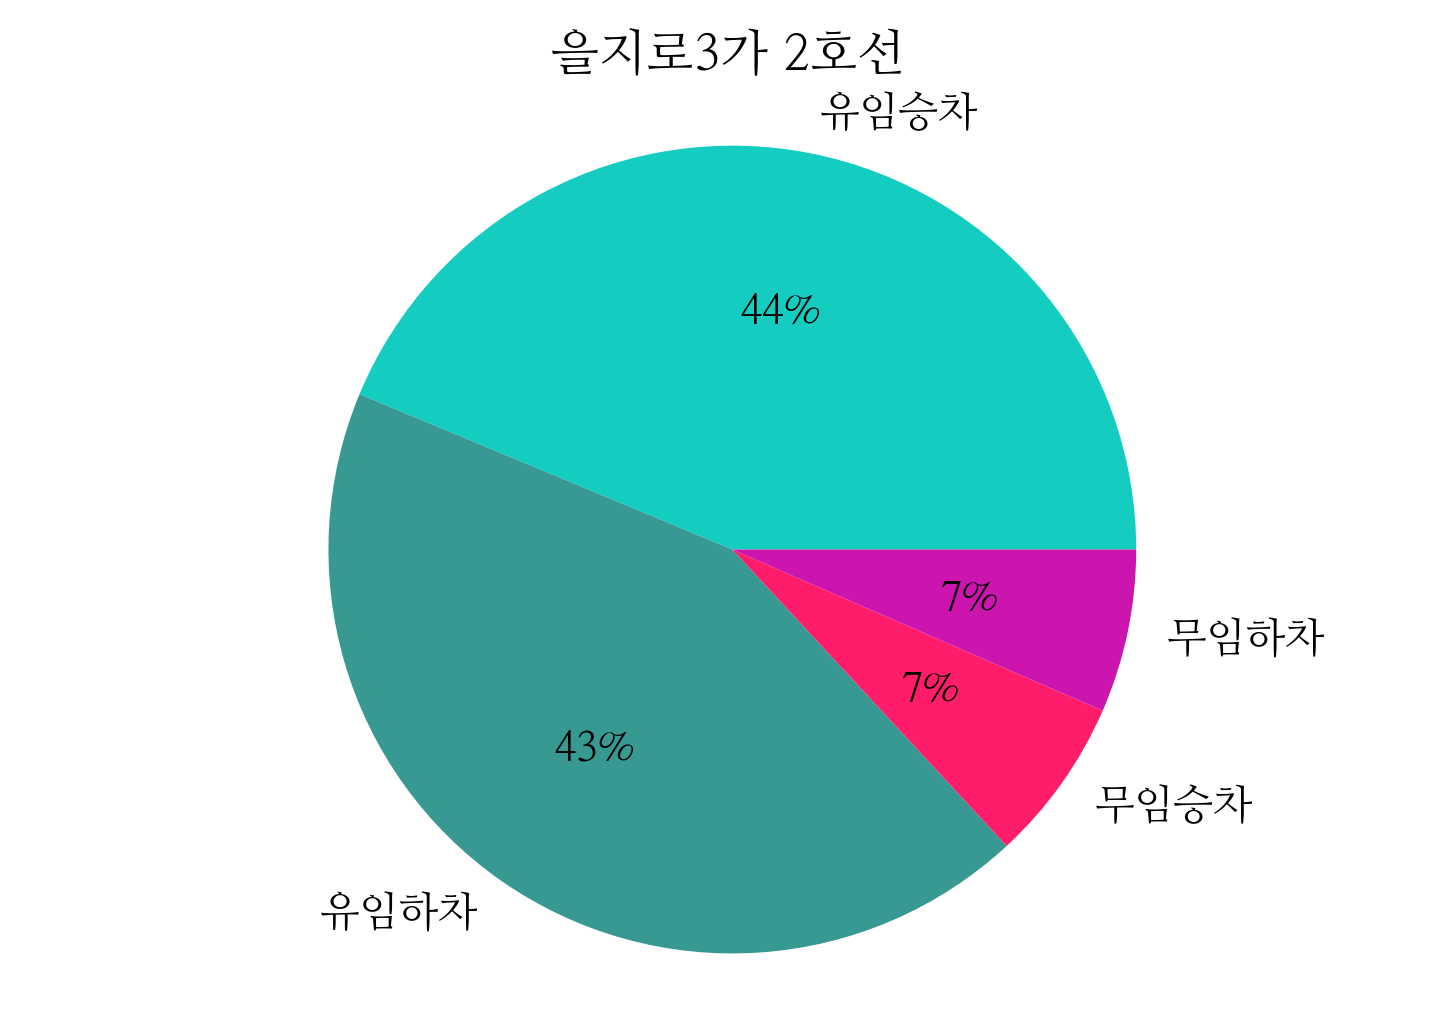

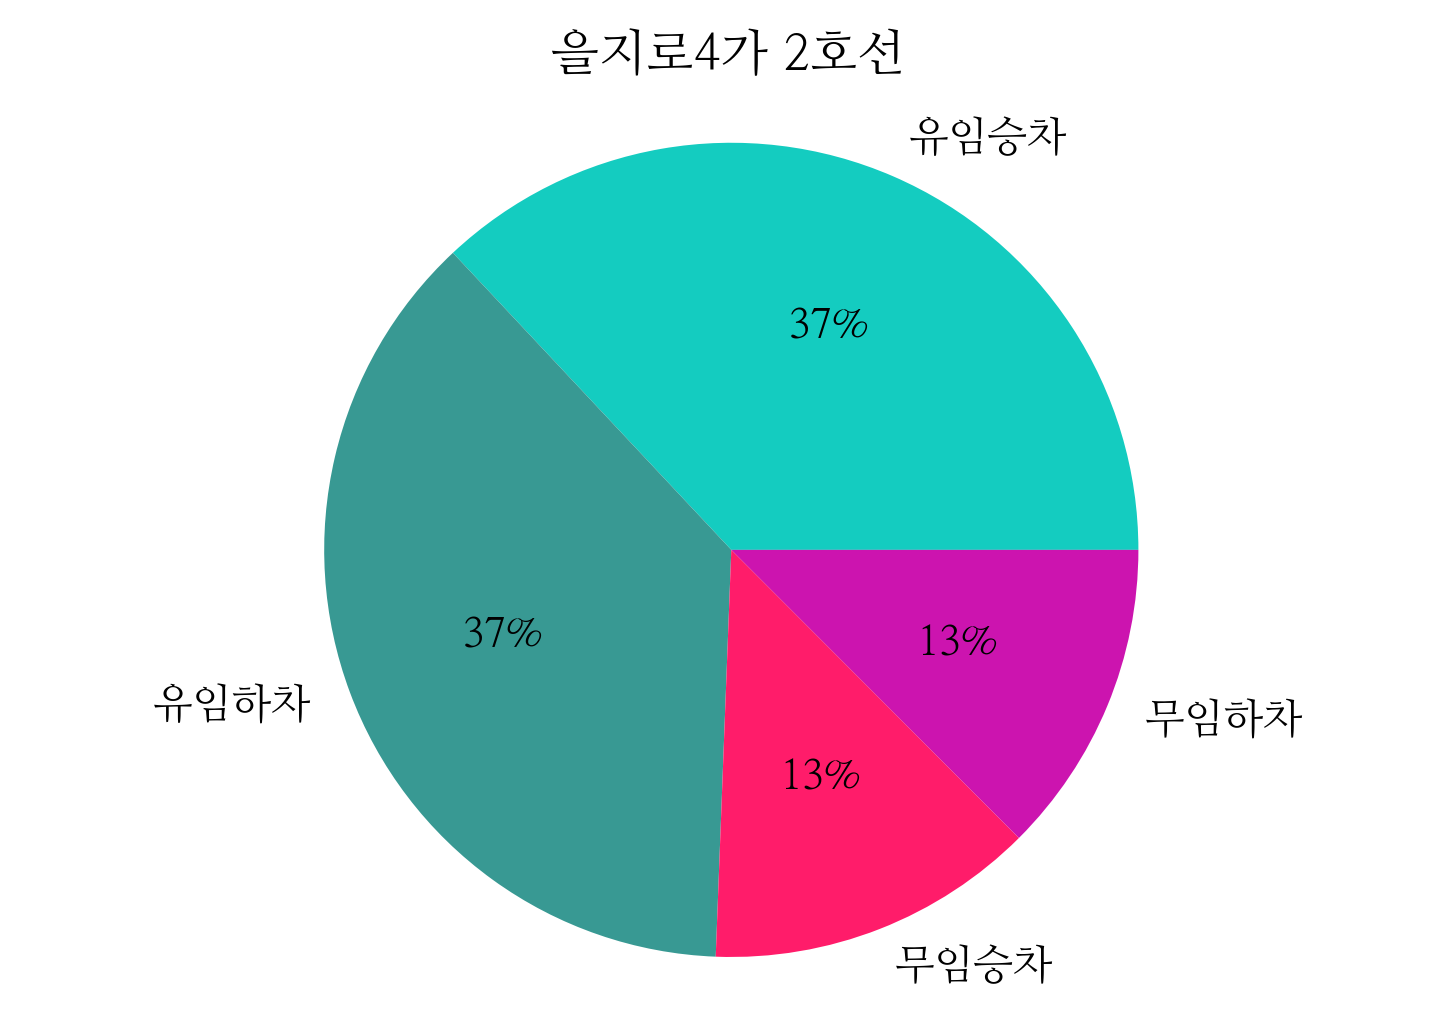

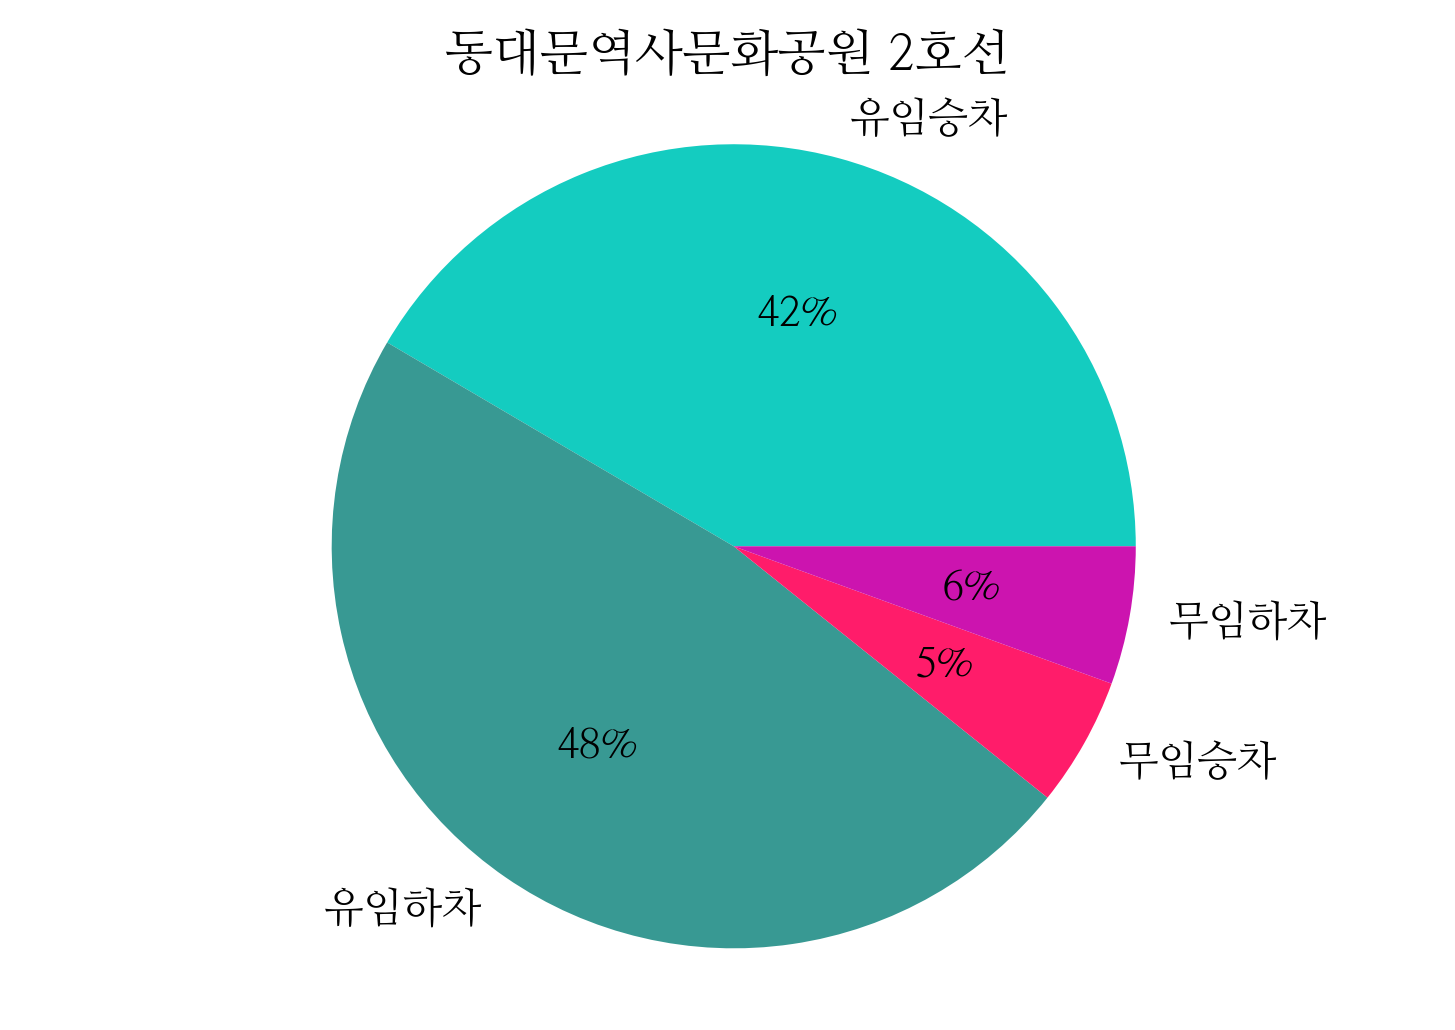

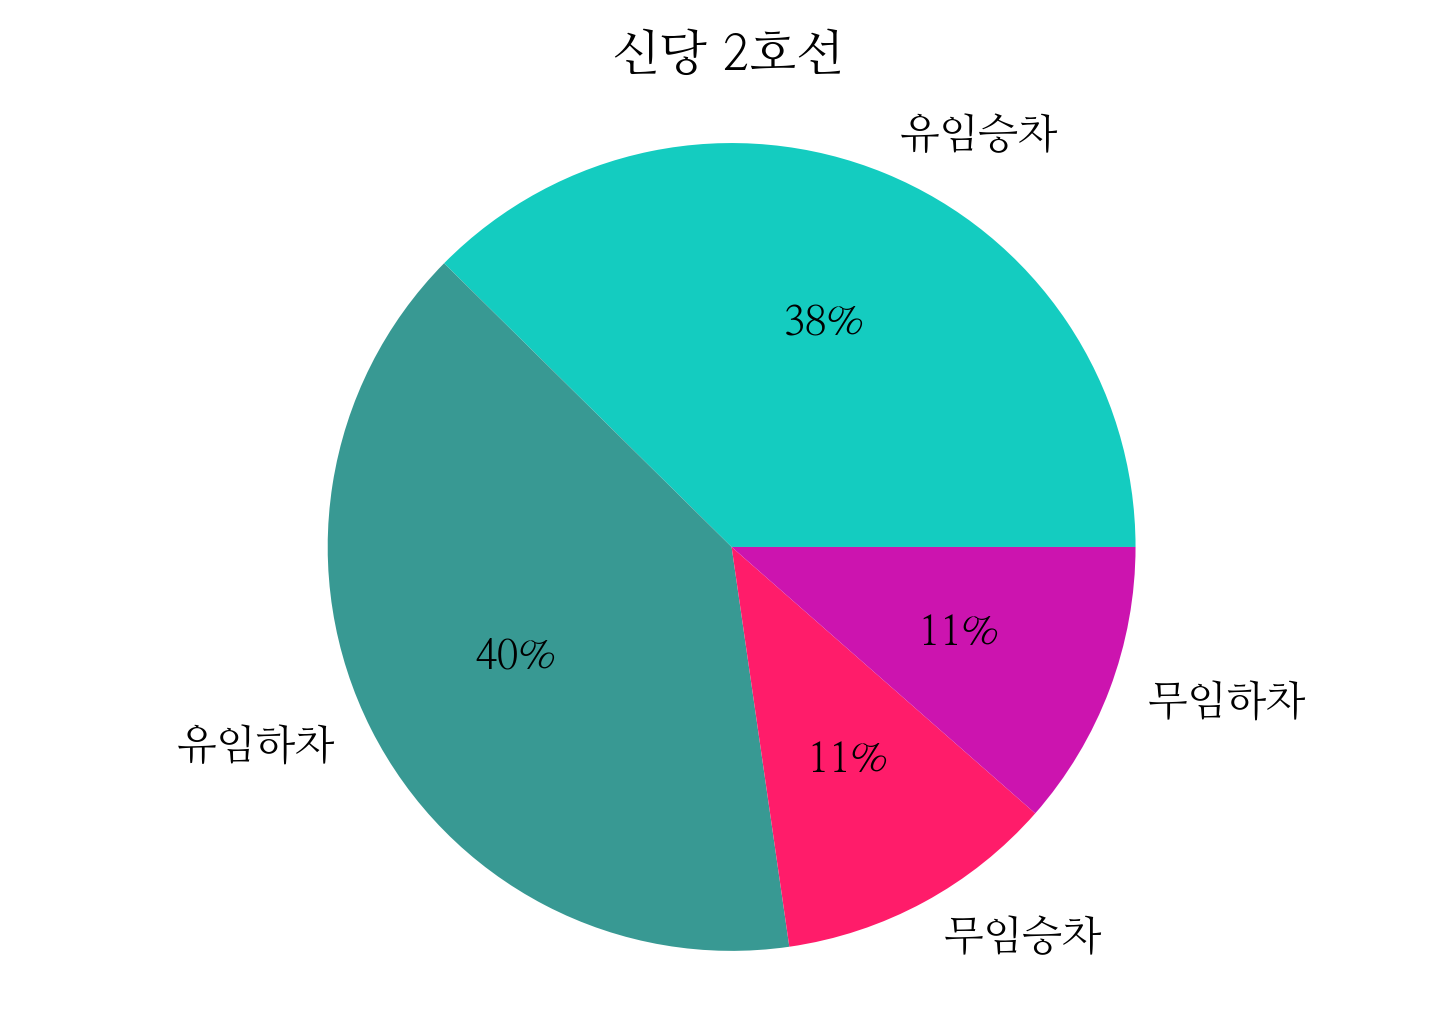

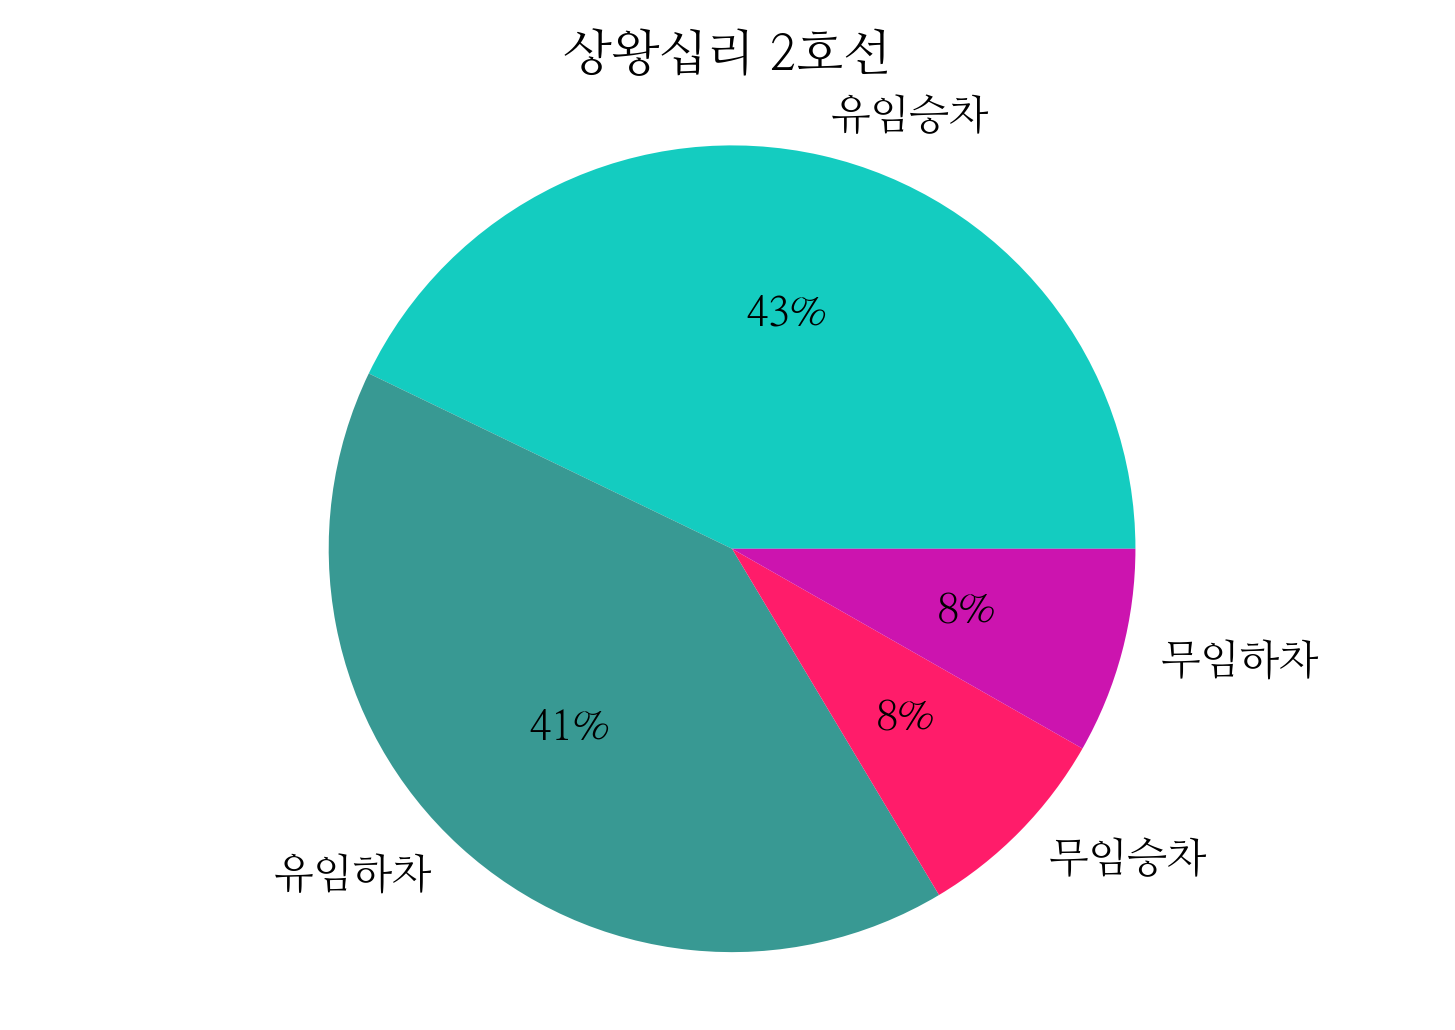

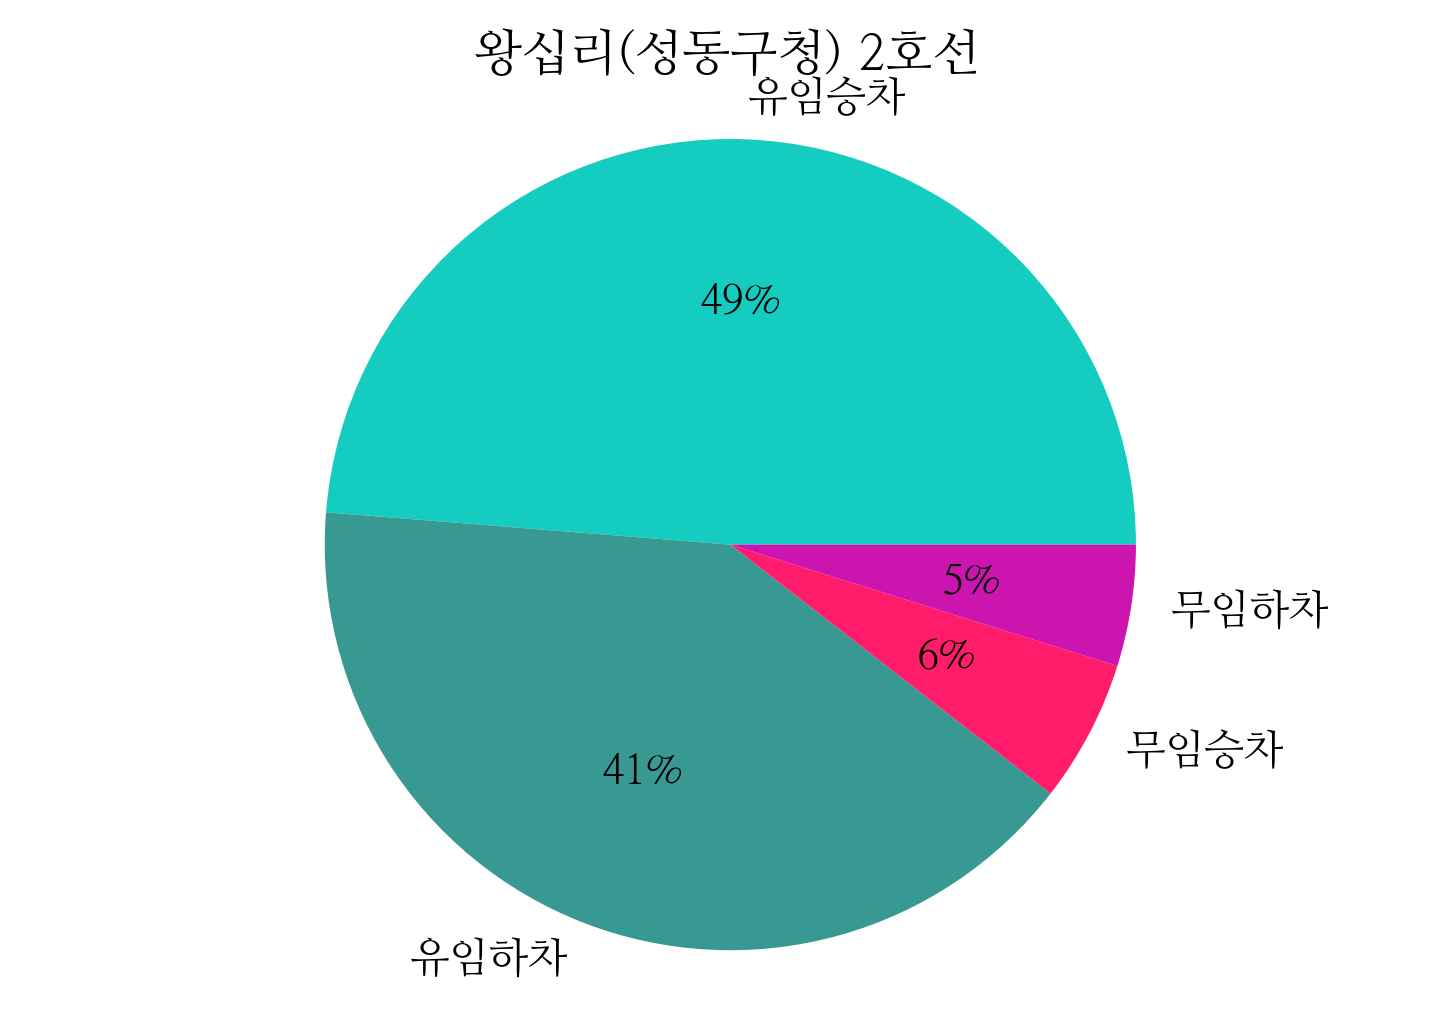

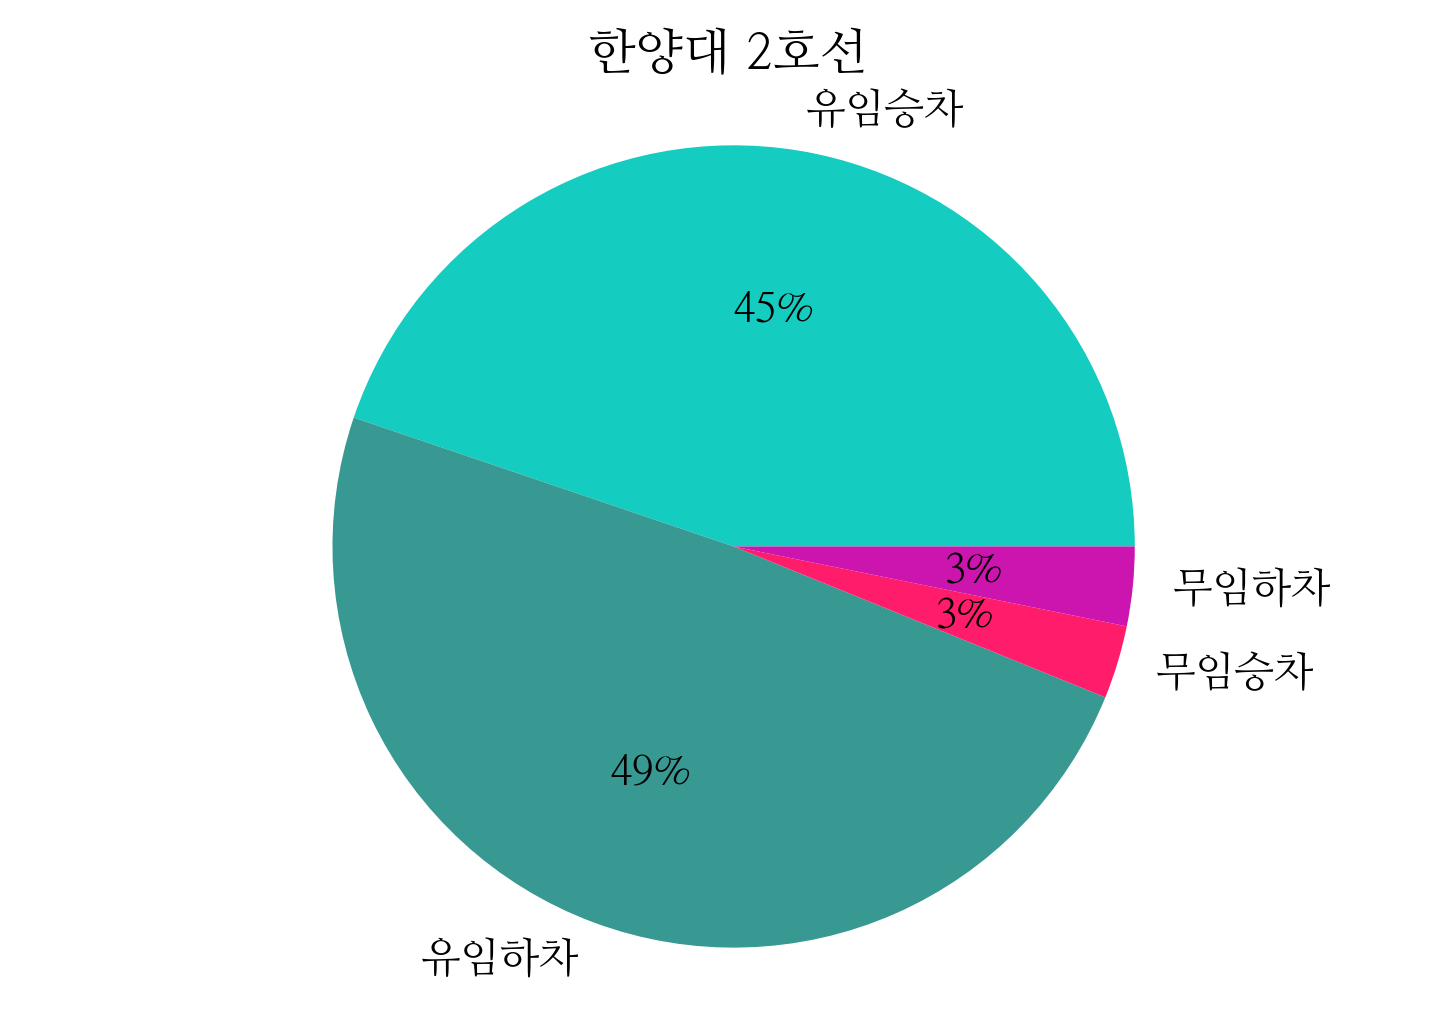

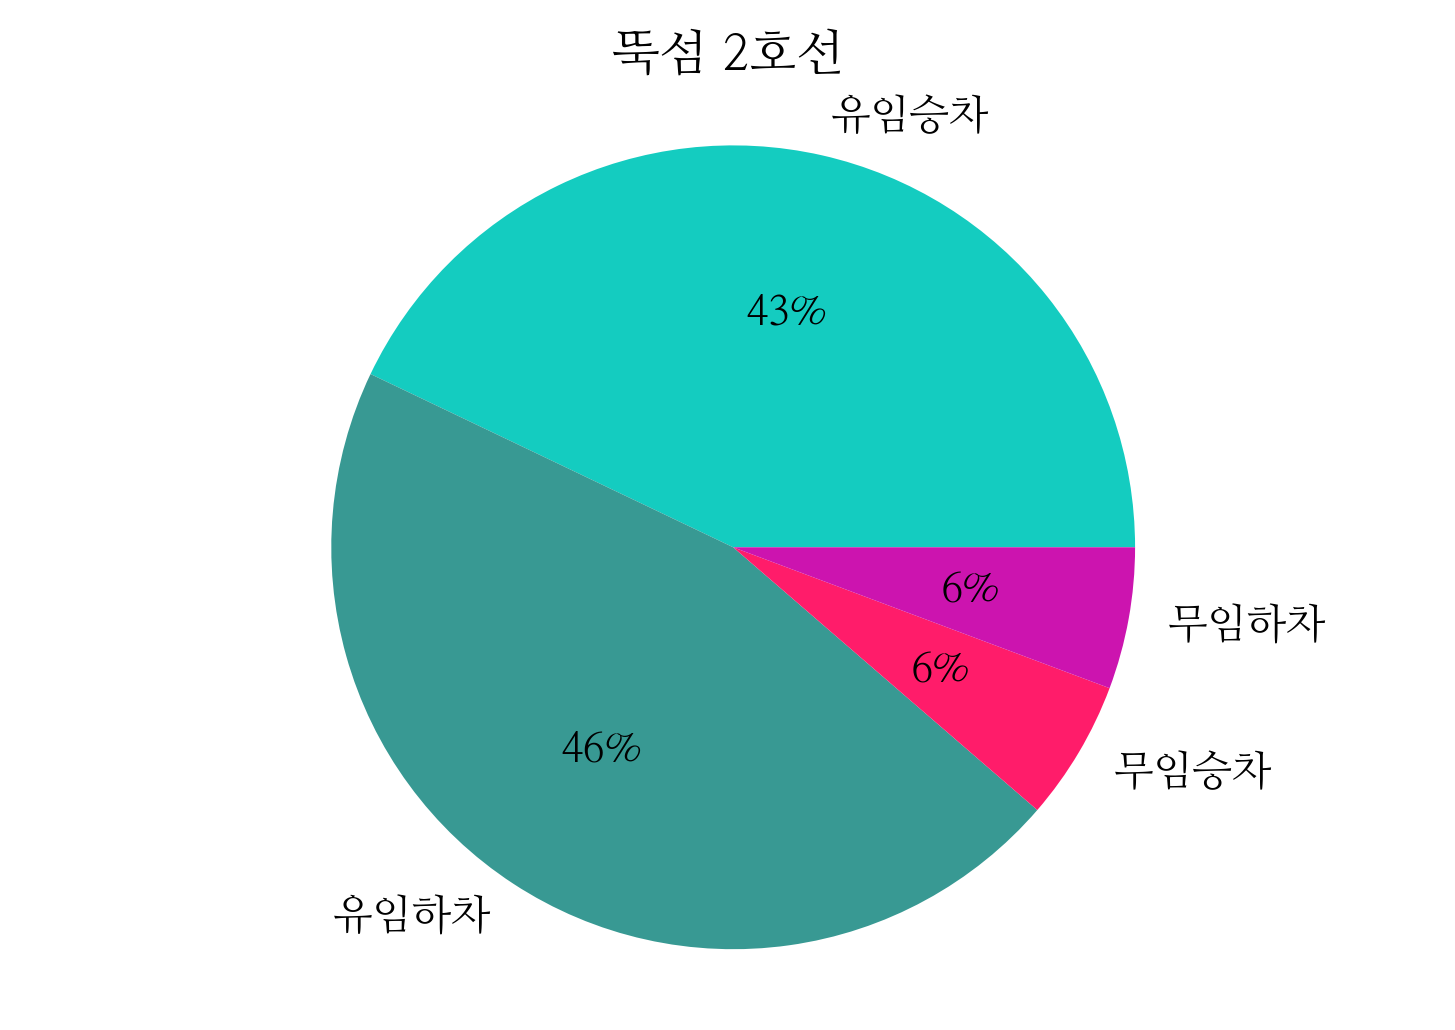

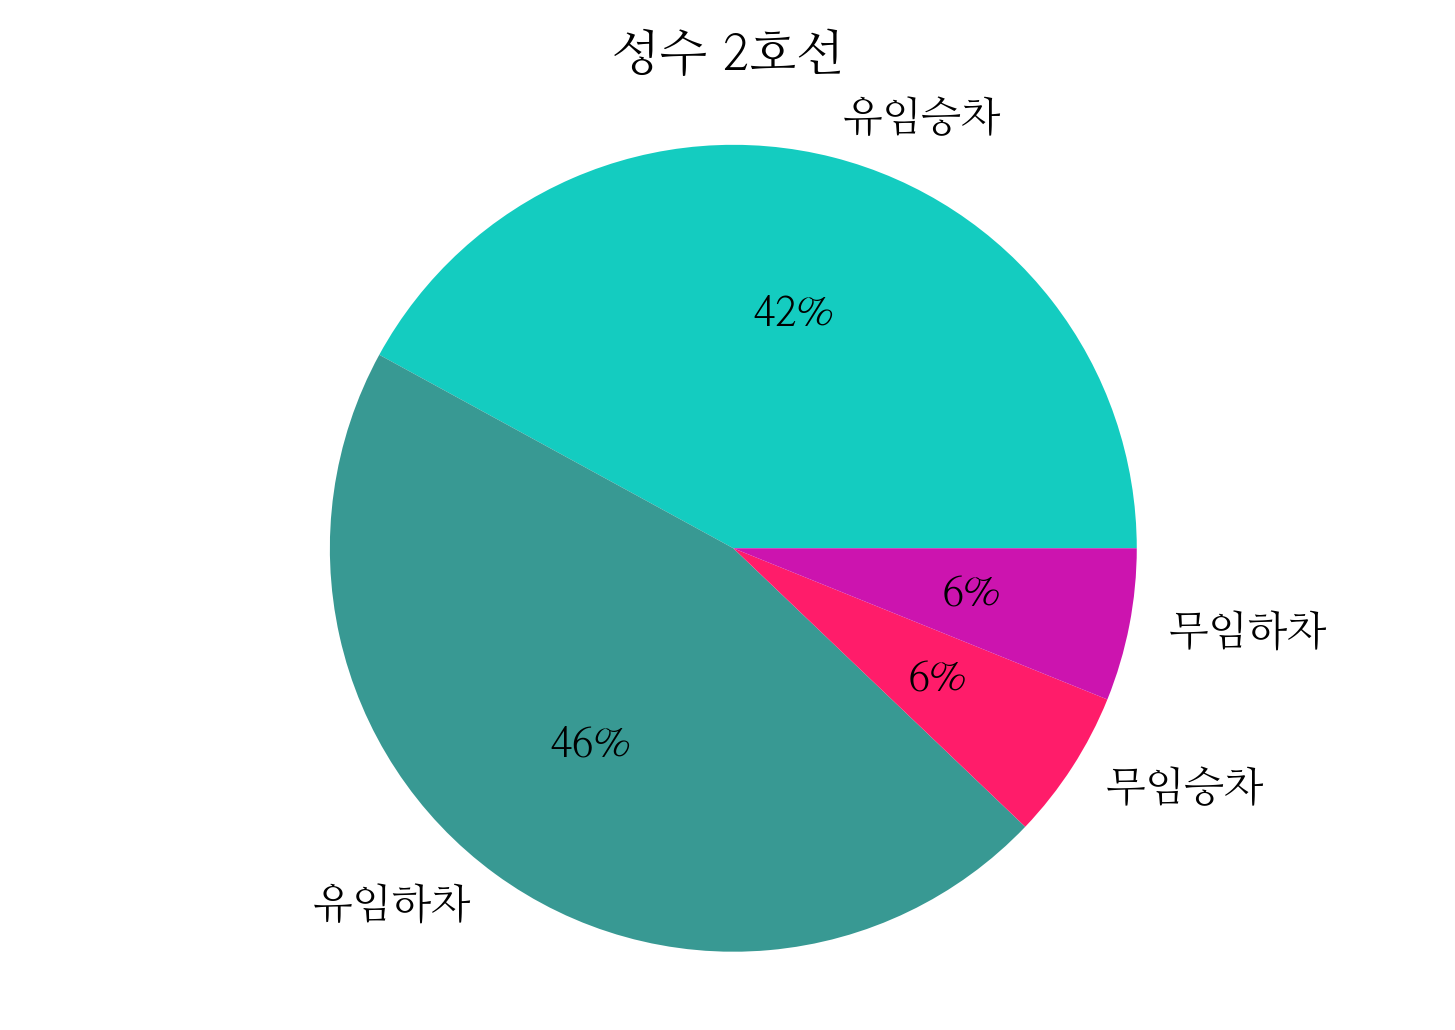

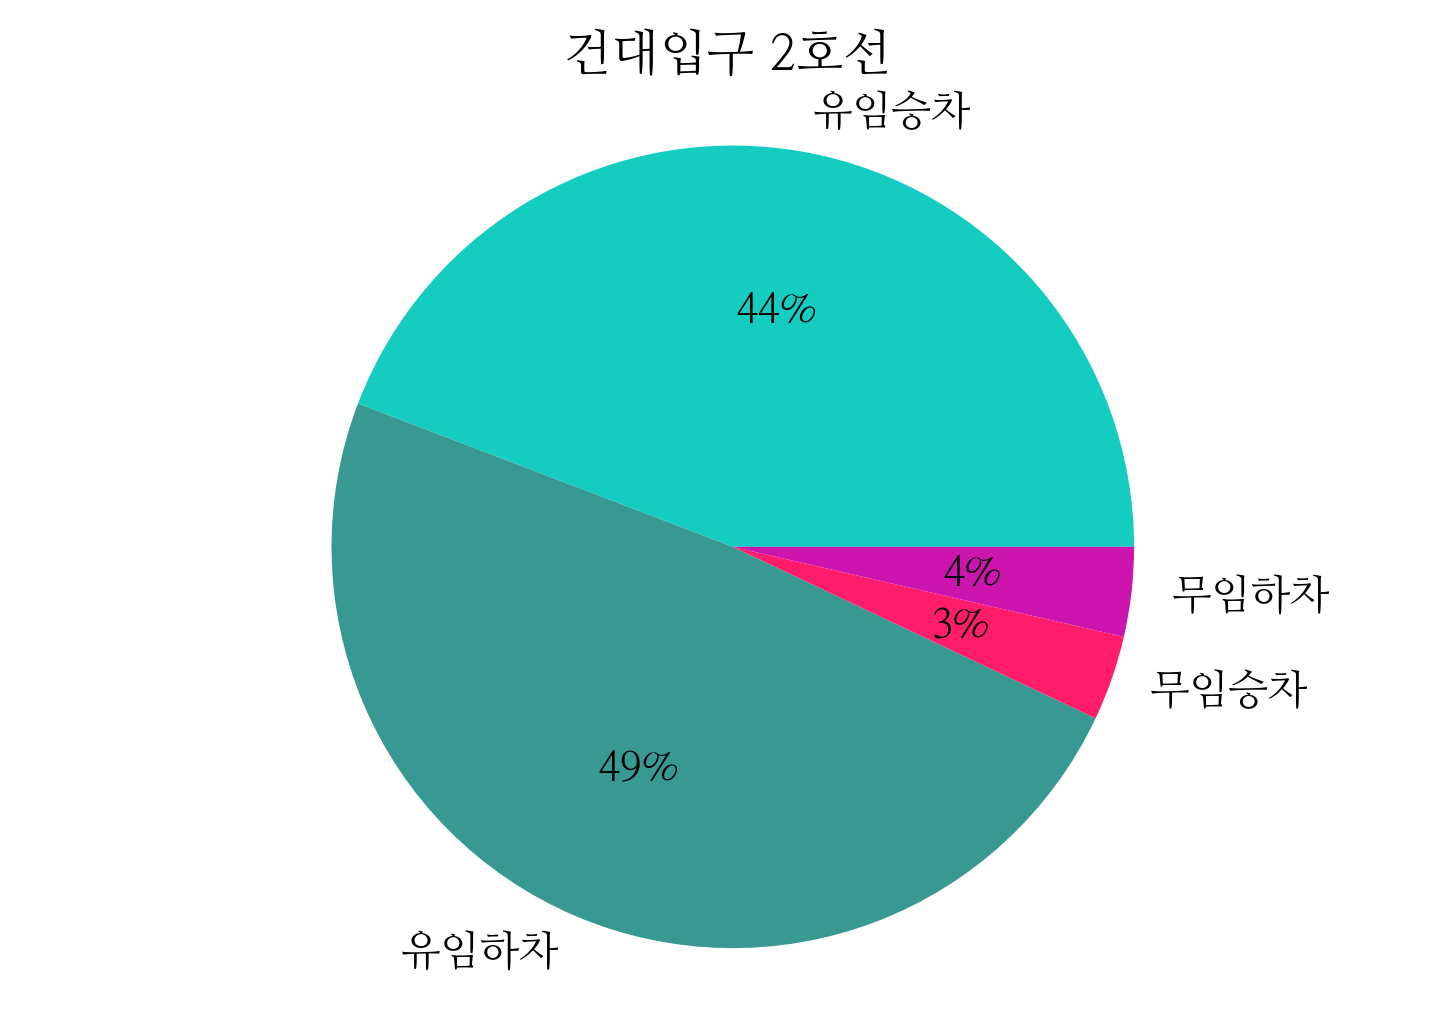

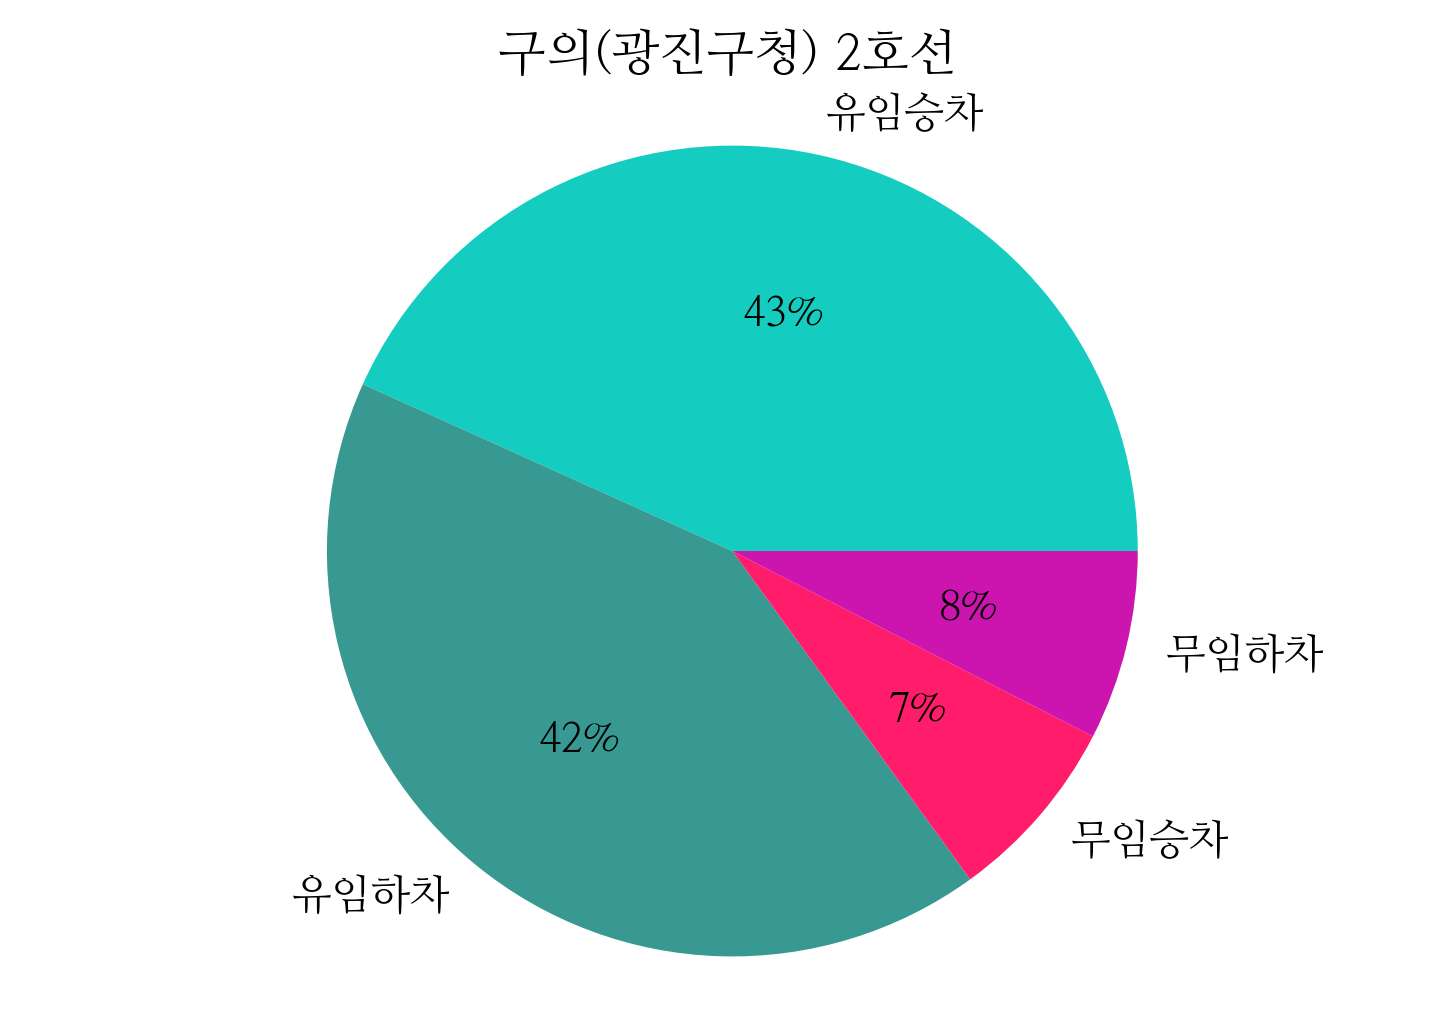

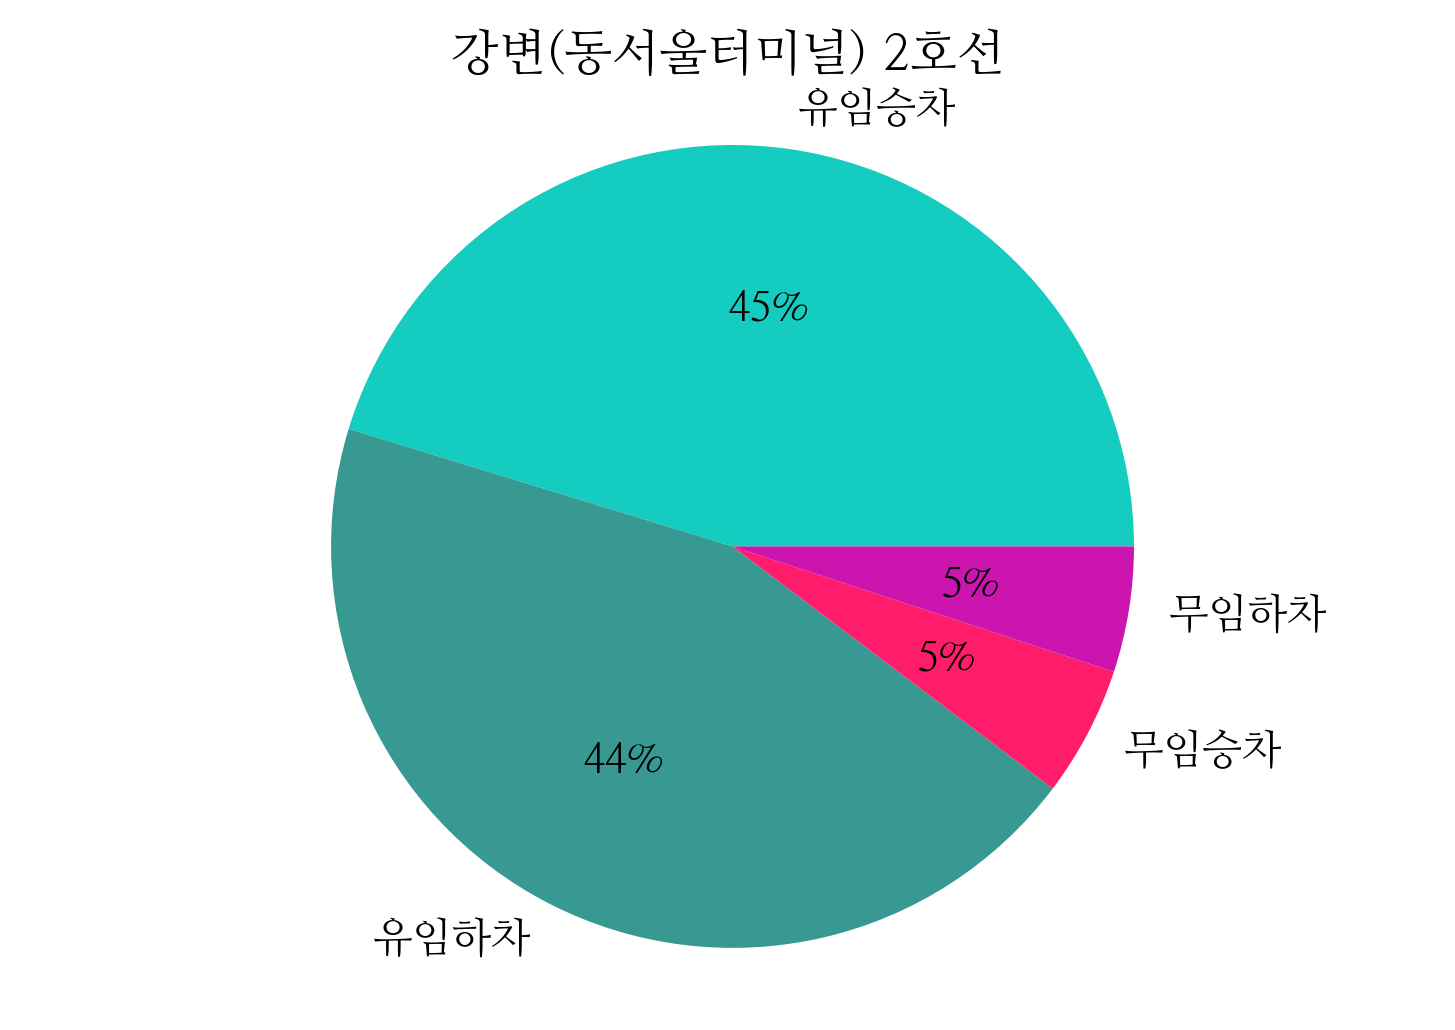

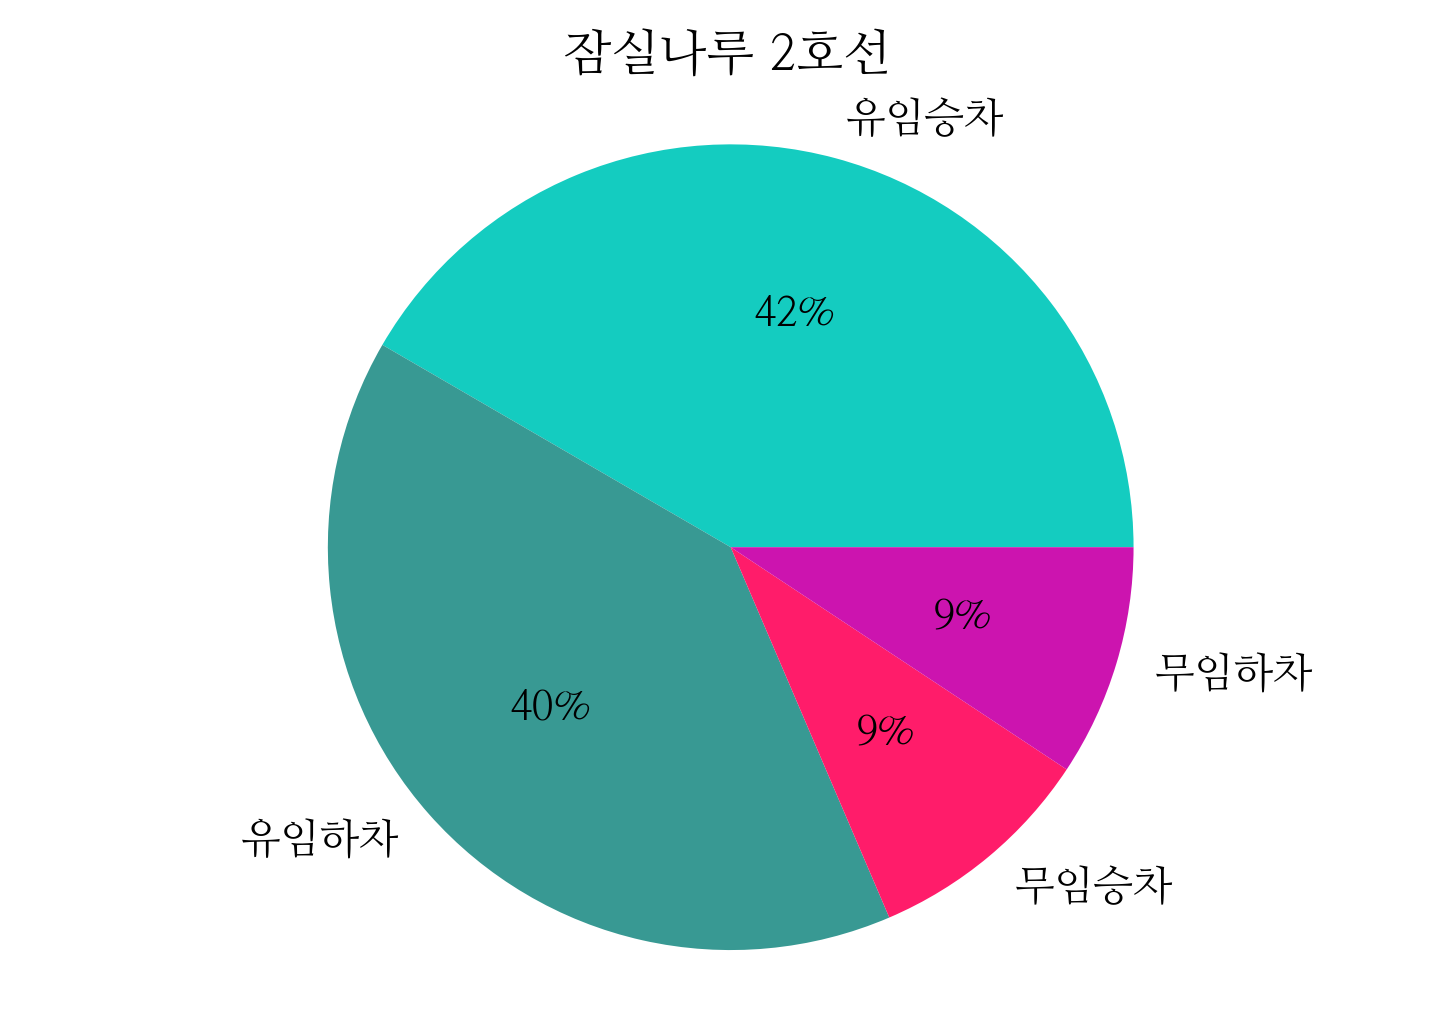

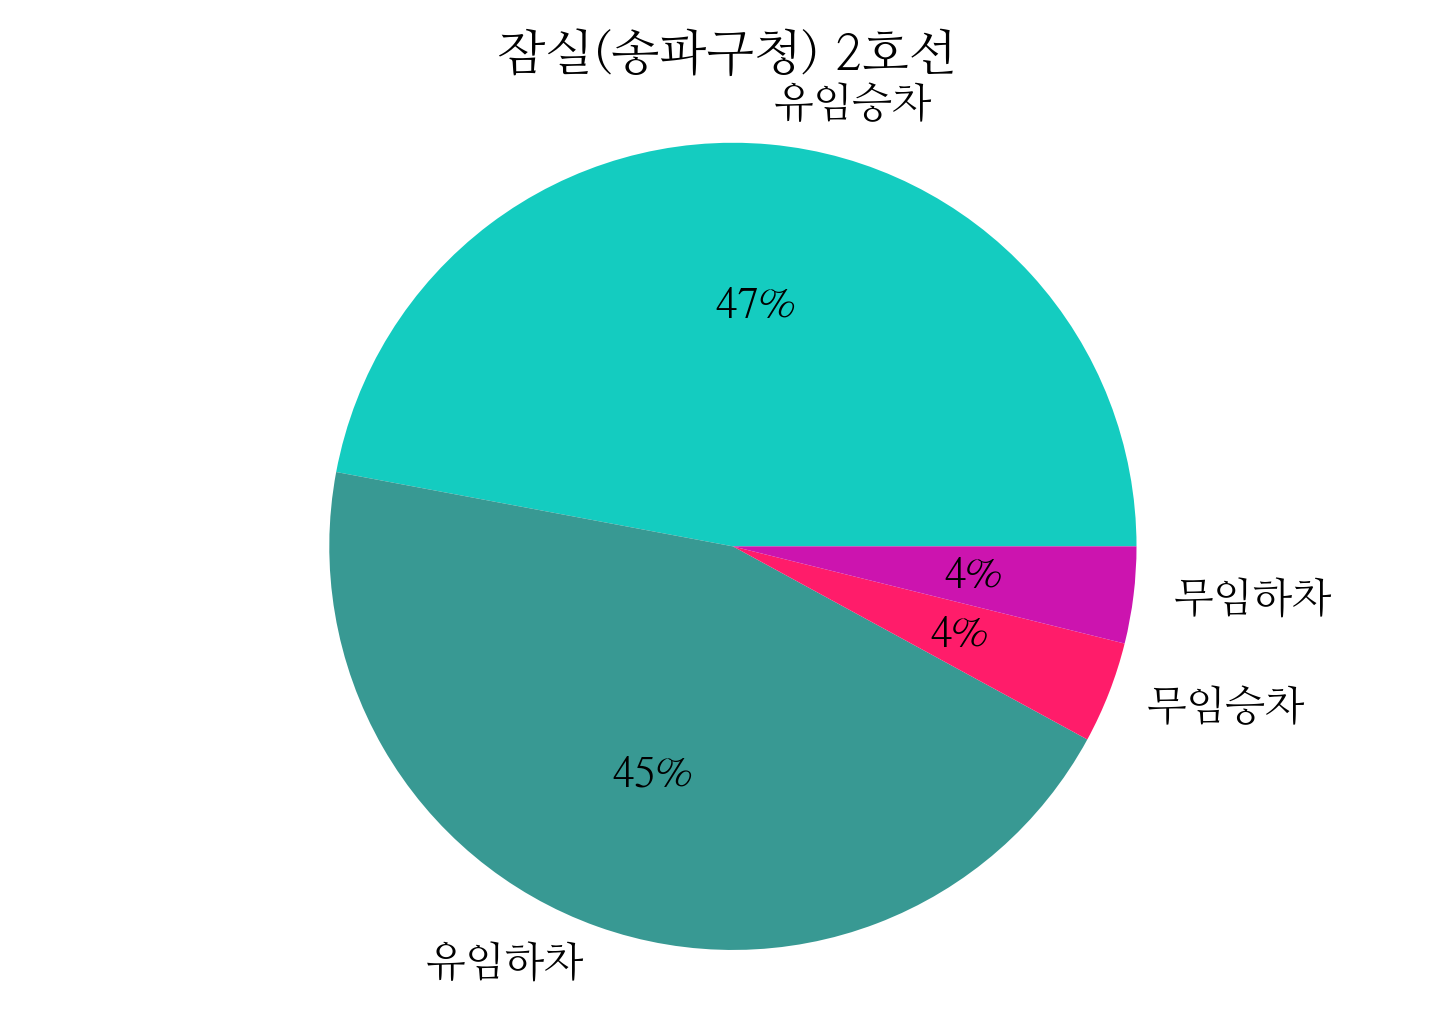

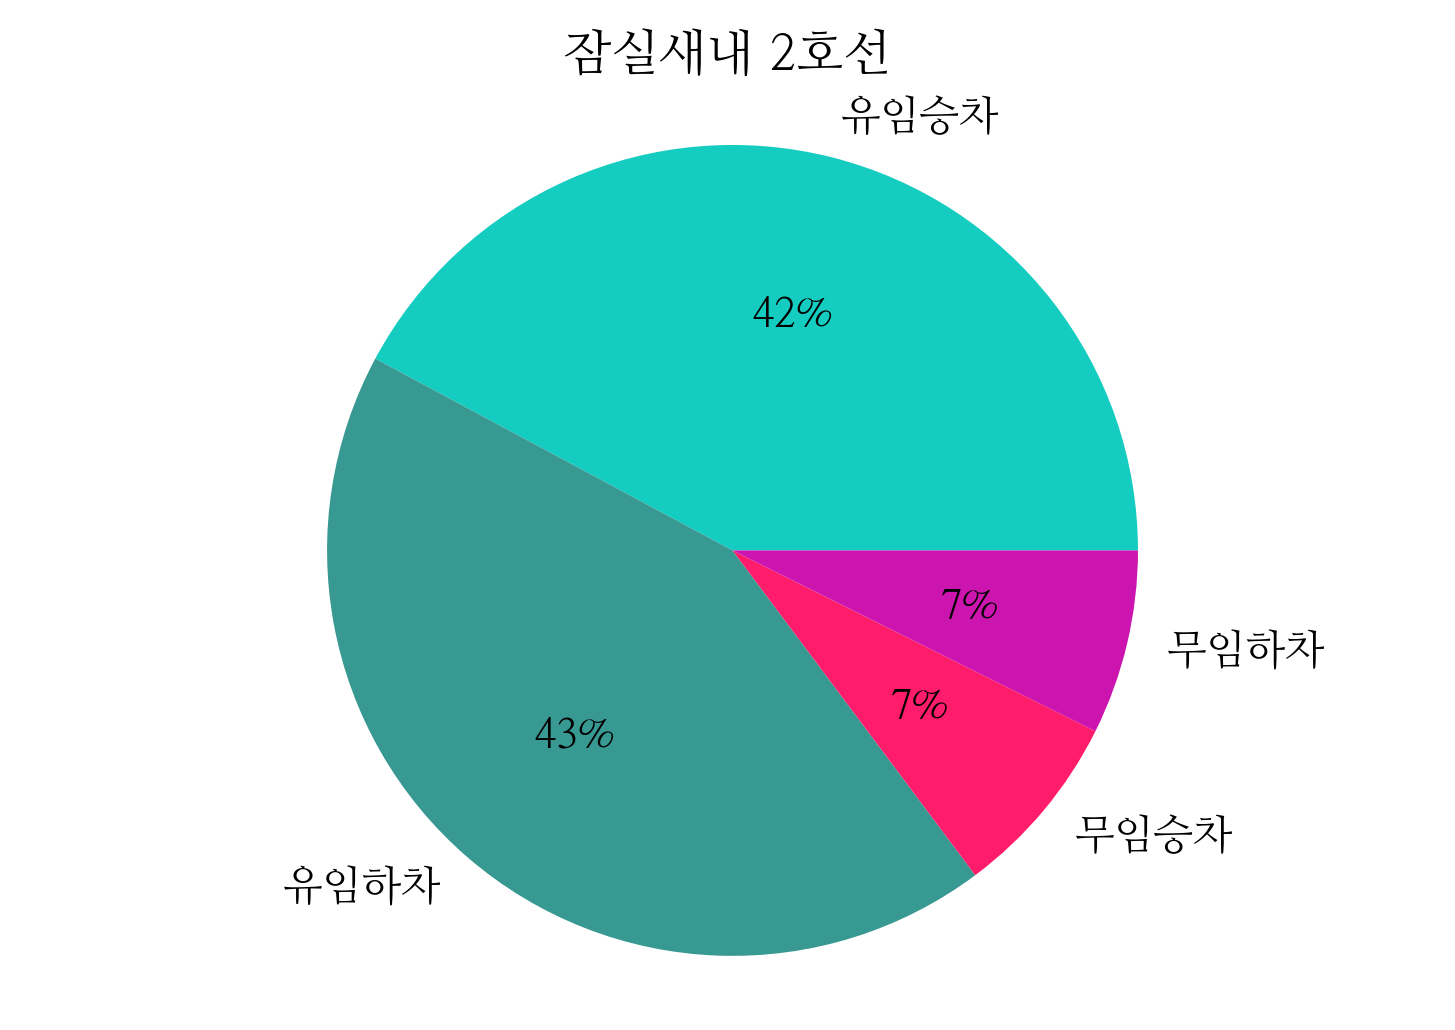

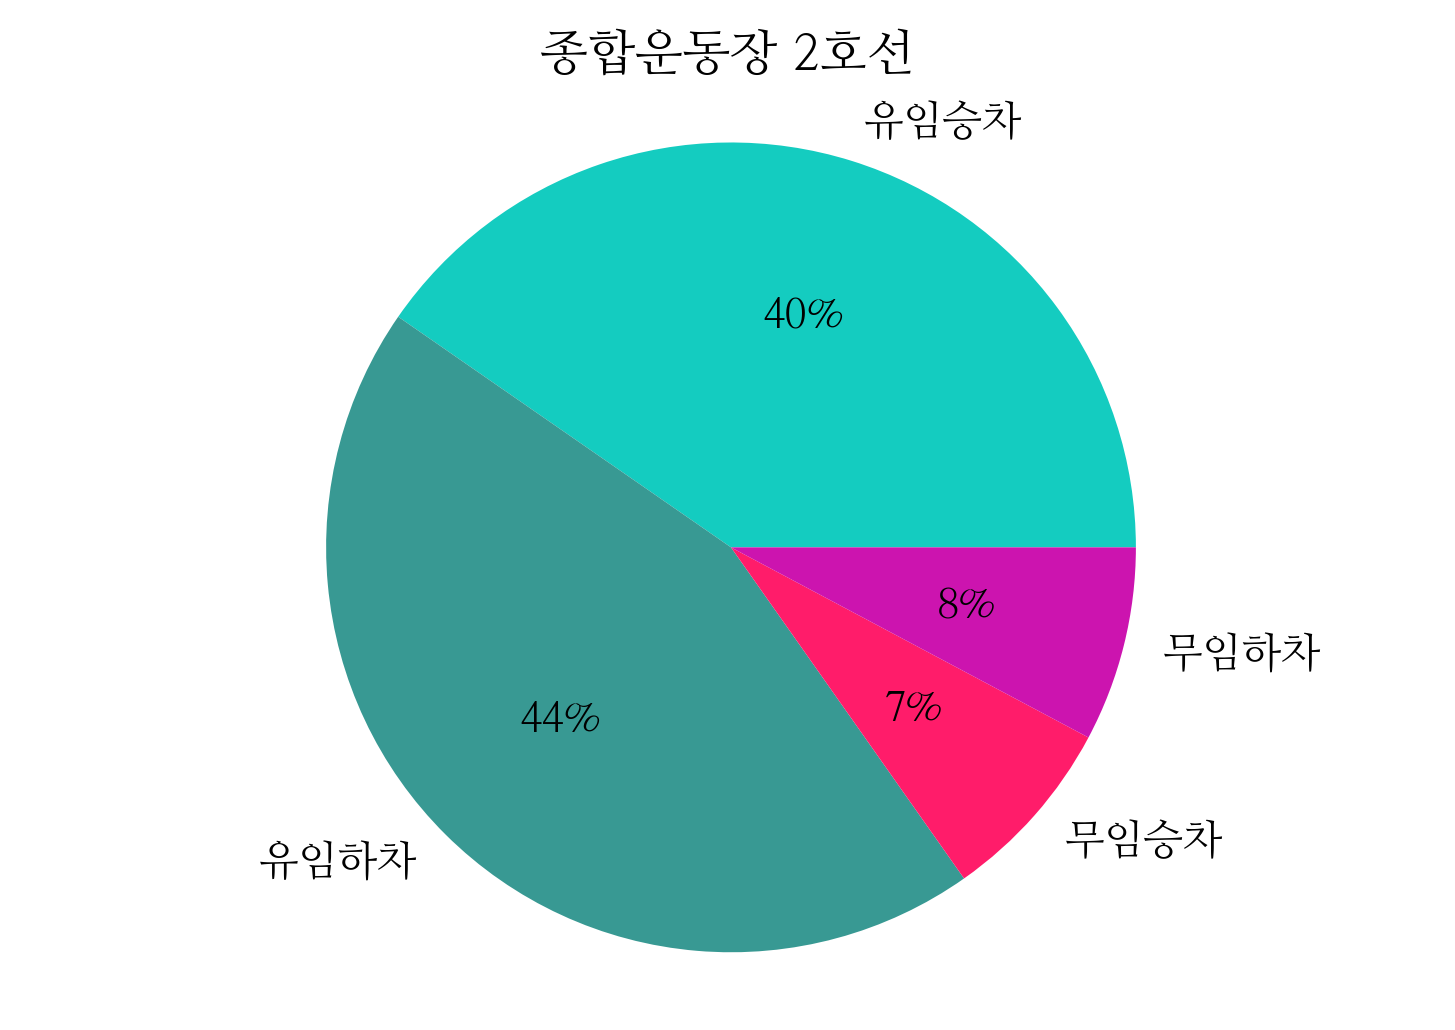

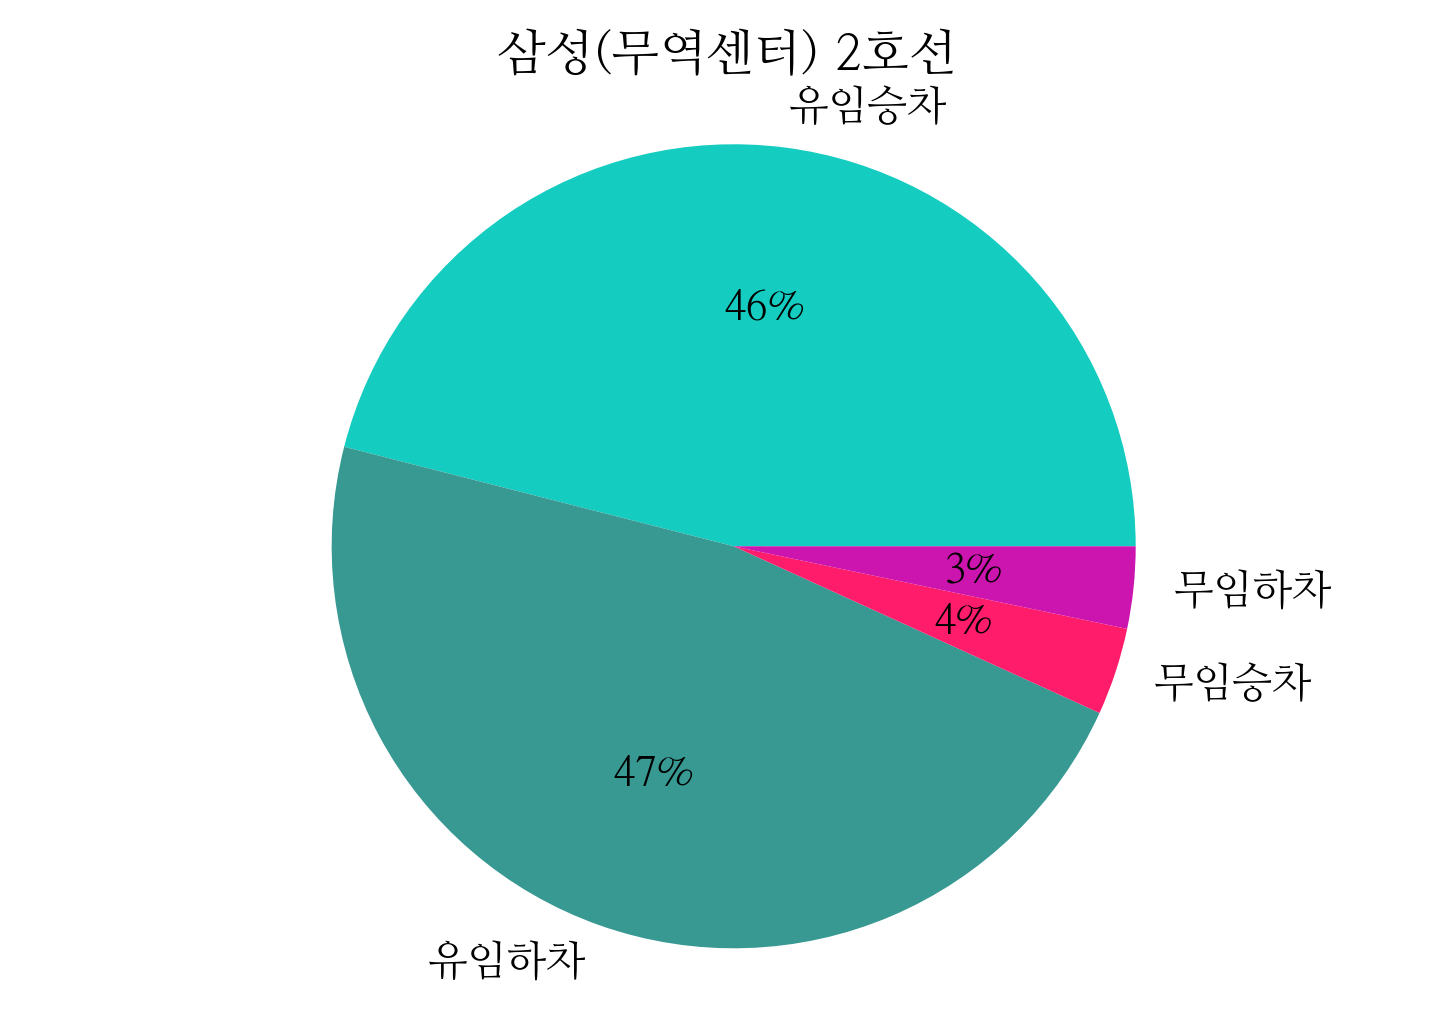

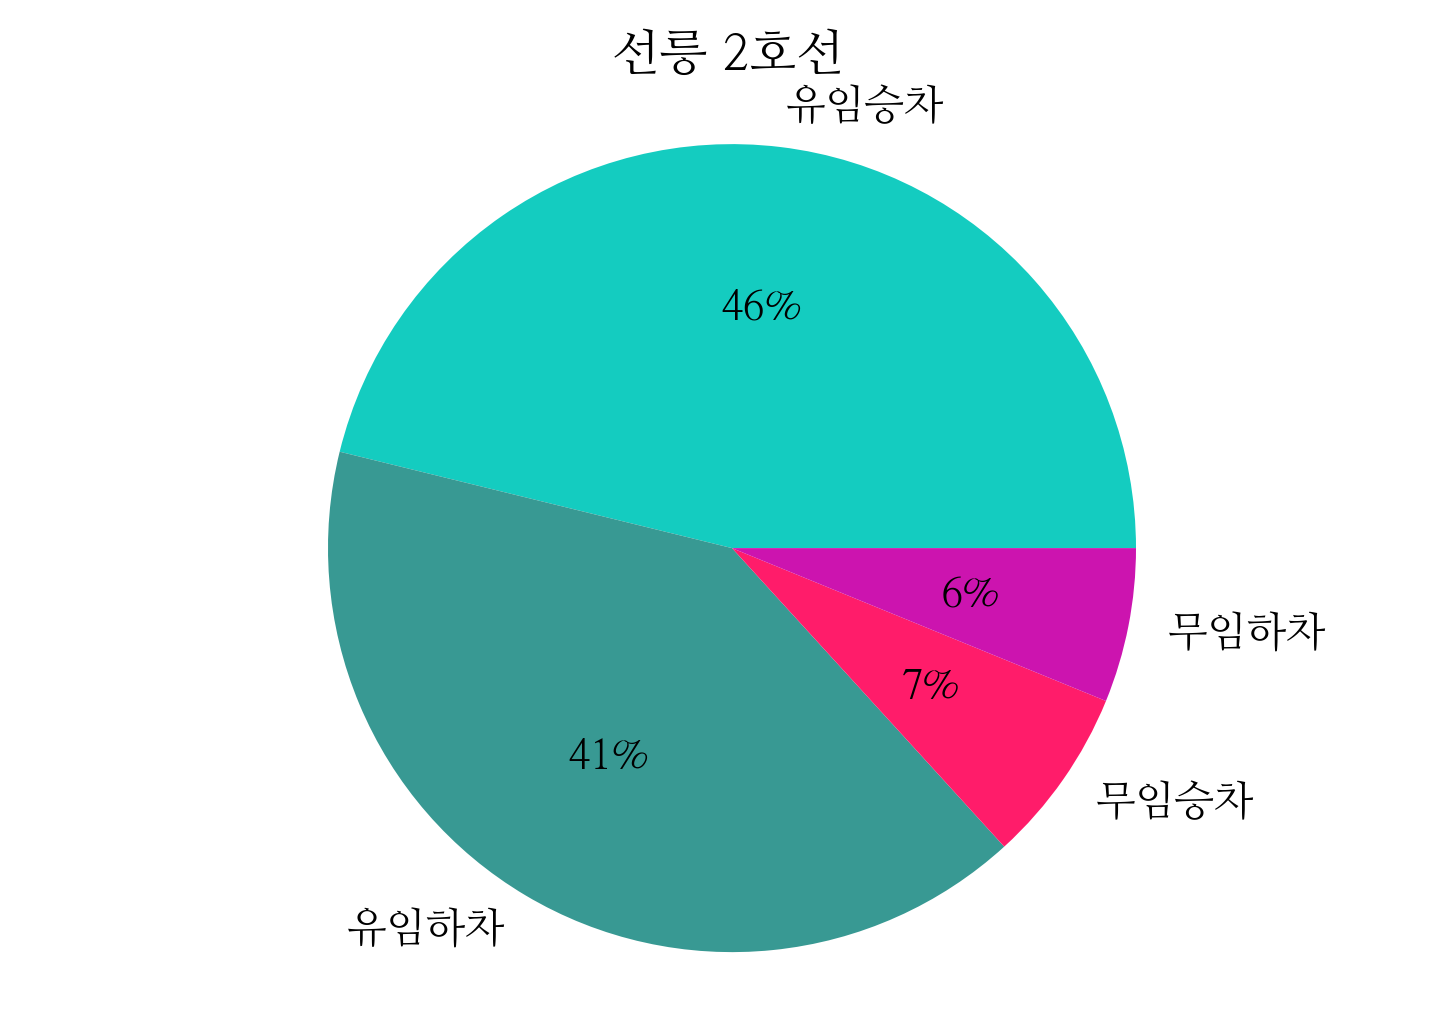

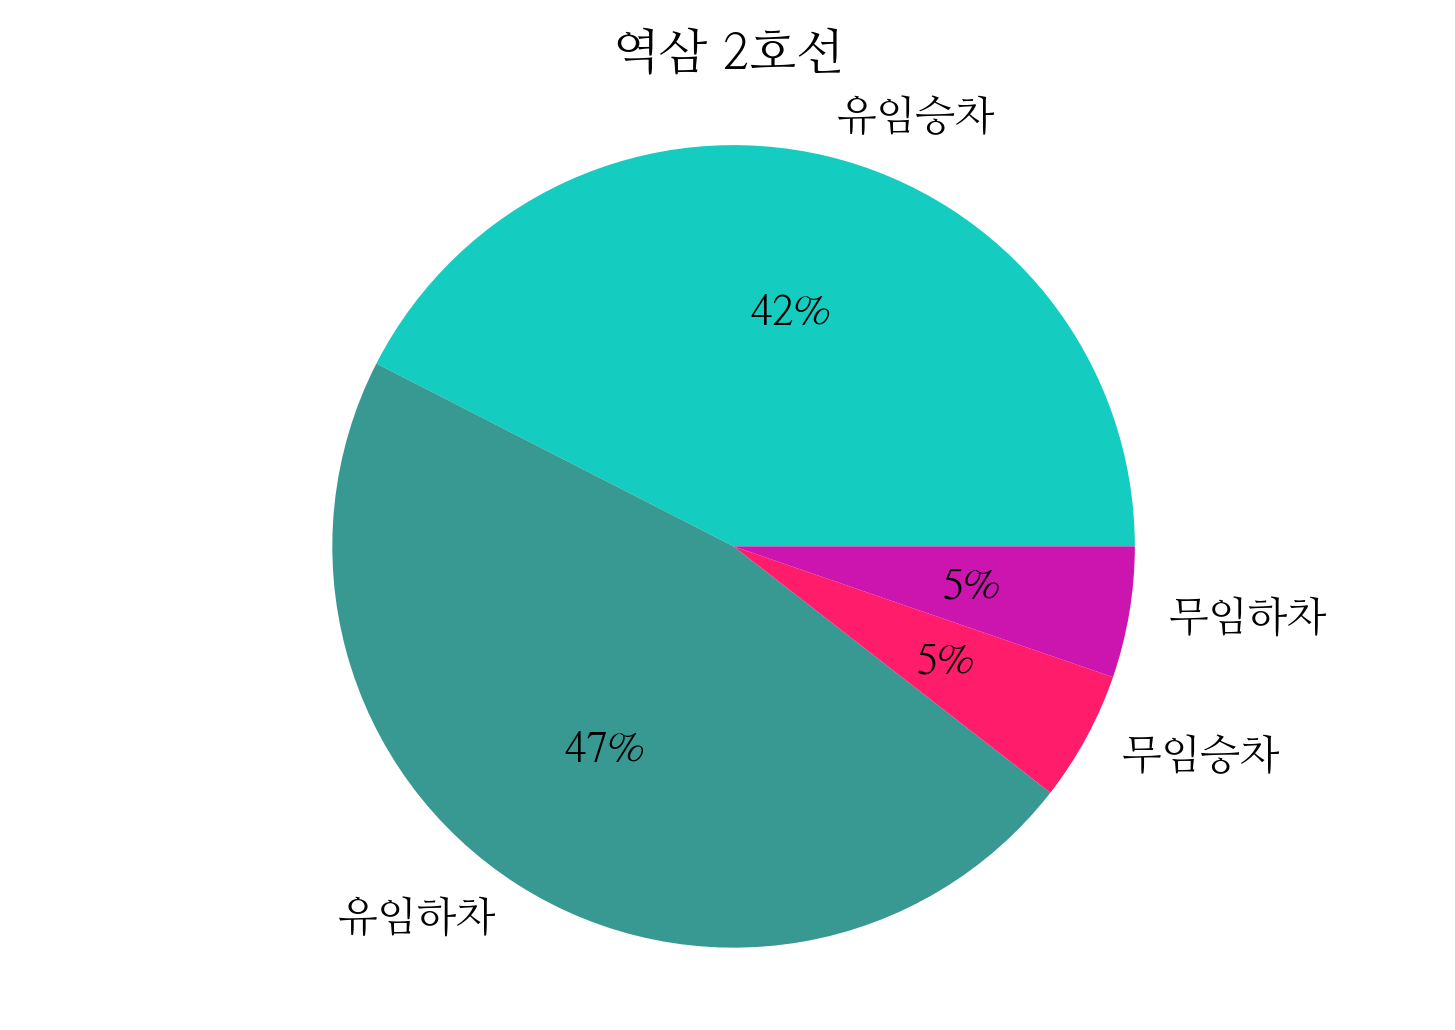

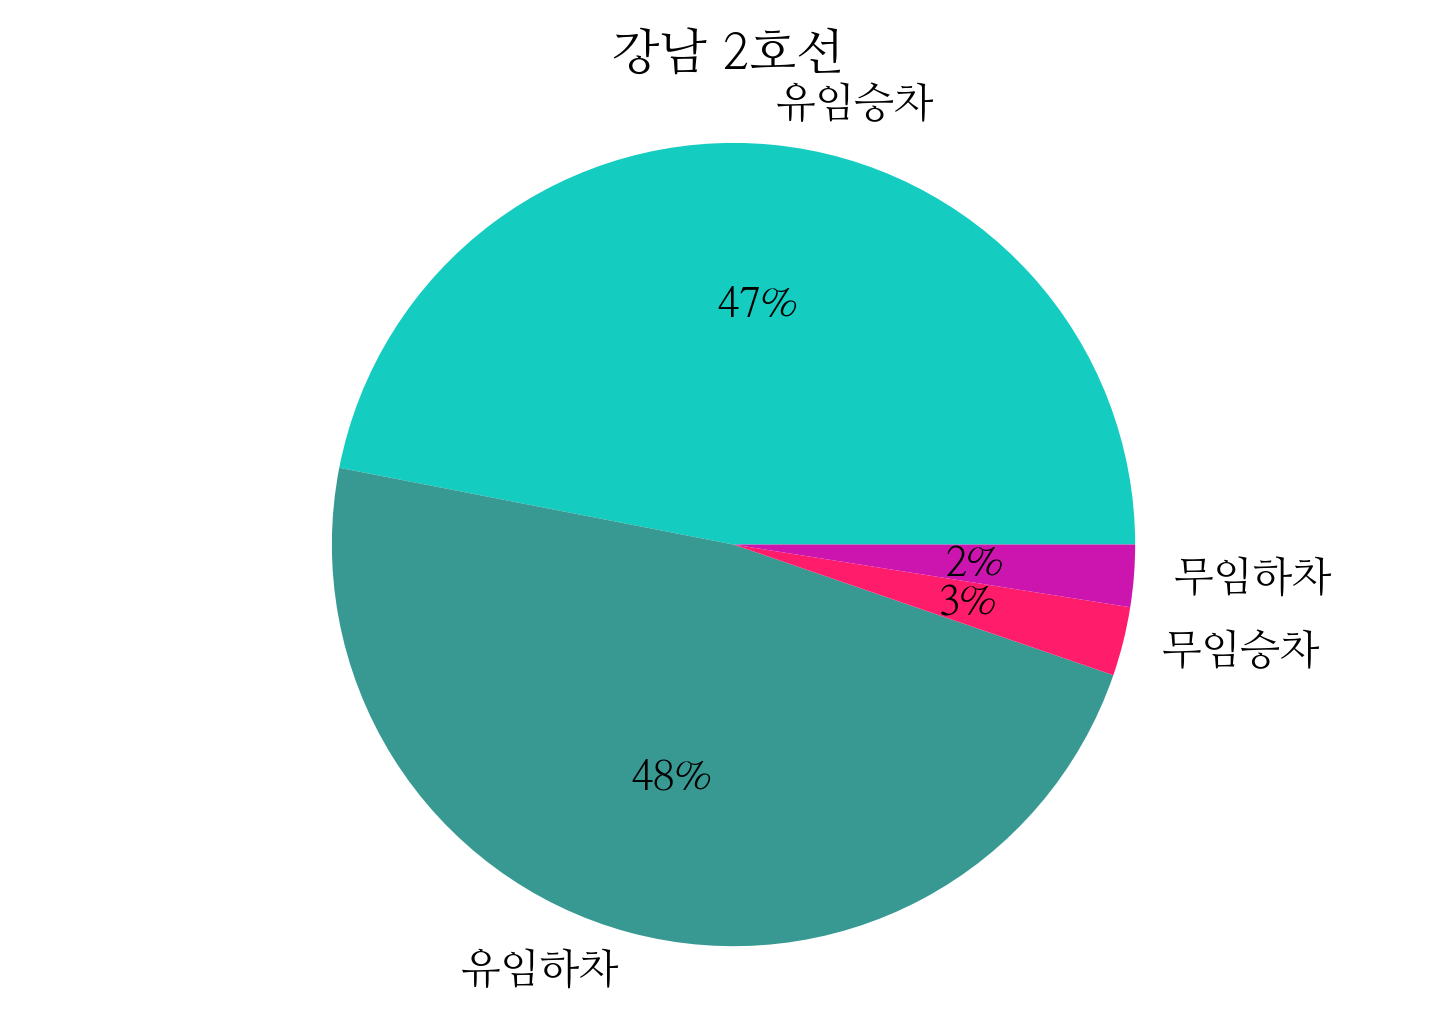

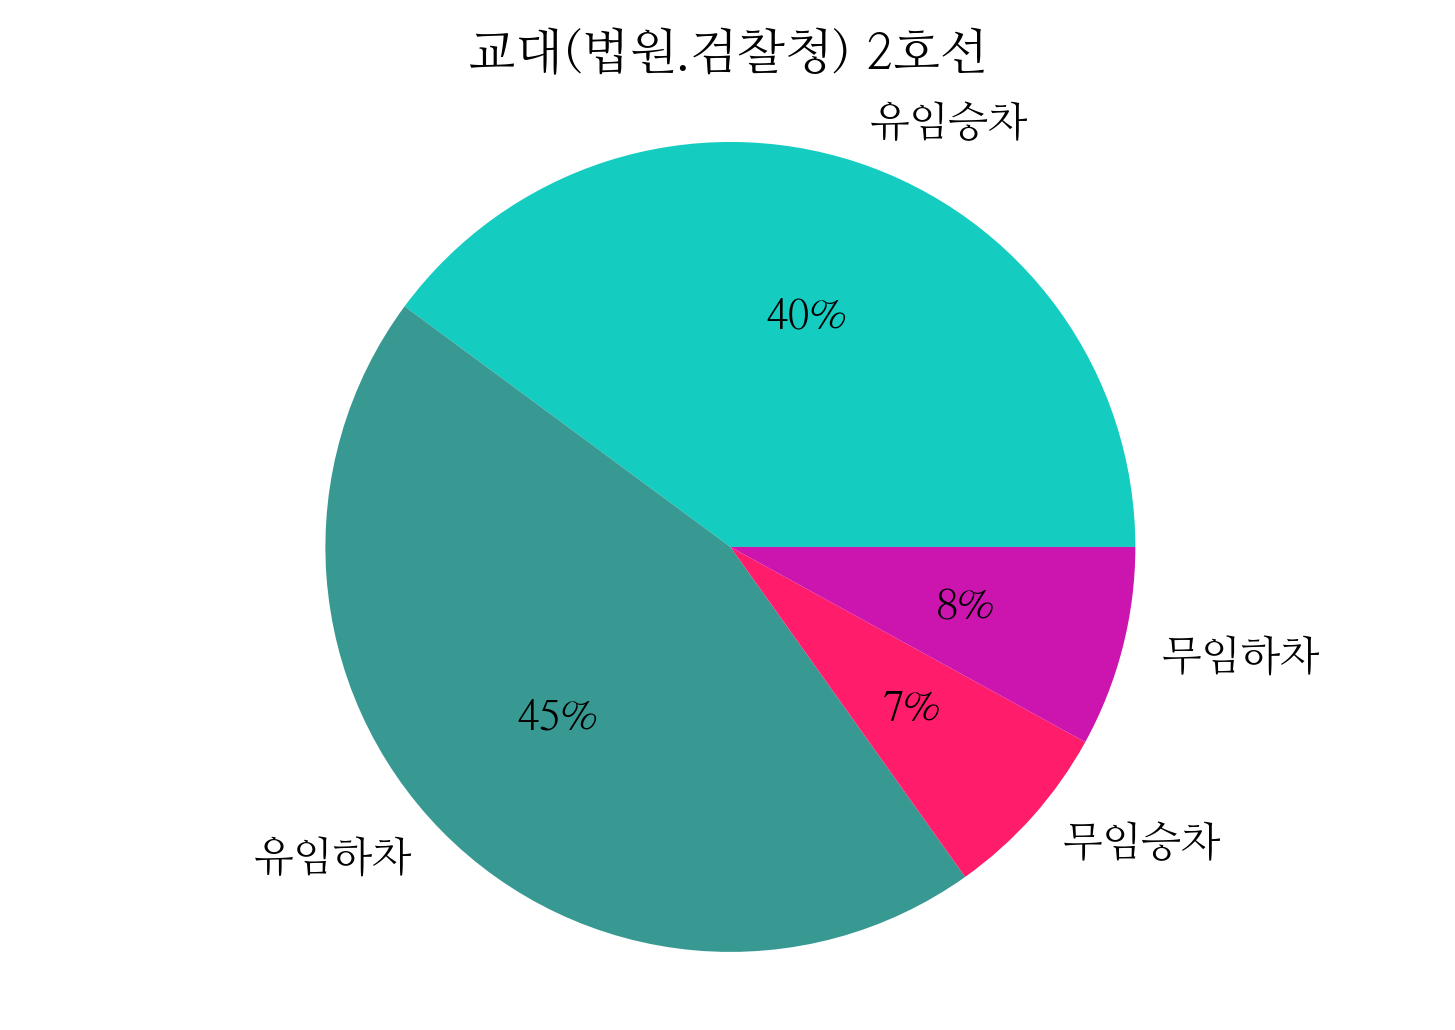

KeyboardInterrupt: 

In [45]:
f = open('subwayfee.csv', encoding='cp949')
fee = csv.reader(f)
next(fee)
label = ['유임승차', '유임하차', '무임승차', '무임하차']

c = ['#14CCC0', '#389993', '#FF1C6A', '#cc14AF']

for row in fee:
    for i in range(4, 8):
        row[i] = int(row[i])
    plt.figure(dpi=300)
    plt.title(row[3] + ' ' + row[1])
    plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
    plt.axis('equal')
    plt.savefig(row[3] + ' ' + row[1] + ' .png')  # 이미지 파일로 저장
    plt.show()

 여러 개의 시각화된 이미지를 한번에 저장할 때 이름을 잘 지정하면 활용하기에 더욱 좋을 것입니다. 자신만의 이미지 파일 이름을 짓는 규칙도 한번 만들어보세요!

# Unit 12. 지하철 시간대별 데이터 시각화하기
• 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까요?

• 지하철 시간대별로 가장 많은 사람이 승하차 하는 역은 어디일까요?

## 1. 지하철 시간대별 이용 현황 데이터 정제하기

In [46]:
import csv
f = open('subwaytime.csv', encoding='cp949')
time = csv.reader(f)

for row in time:
    print(row)

['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '']
['', '', '', '', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차']
['2019-01', '1호선', '150', '서울역', '927', '22', '10682', '8774', '1

실행 결과를 살펴보니 헤더(header) 데이터가 2개의 행으로 이루어진 것을 알 수 있습니다. 첫 번째 행에는 사용월, 호선명, 역 ID, 역 이름 그리고 AM 4:00부터 다음 날 AM 3:00까지의 시간이 1시간 단위로 구분되어 있네요. 두 번째 행에서는 공백(“) 네 개와 승차와 하차가 번갈아 나옵니다. 그런데 이 두 줄의 데이터는 분석에 직접적인 영향을 주지 않으므로 next() 함수로 제외시키겠습니다. 그리고 이후 이어지는 각 행의 4번 인덱스부터 마지막까지의 데이터는 정수로 바꿔보겠습니다. Unit 11에서는 for 반복문을 사용했었는데 이번에는 map() 함수를 사용해서 데이터를 한꺼번에 정수형으로 바꿔봅시다.

In [47]:
f = open('subwaytime.csv', encoding='cp949')
time = csv.reader(f)
next(time)
next(time)

for row in time:
    row[4:] = map(int, row[4:])
    print(row)

['2019-01', '1호선', '150', '서울역', 927, 22, 10682, 8774, 13504, 45545, 39110, 103863, 80492, 236747, 61108, 163026, 68446, 86198, 89100, 80051, 98021, 85869, 101282, 91792, 86627, 86386, 113919, 87211, 118223, 91594, 161216, 98032, 249973, 105075, 142575, 77807, 97729, 55056, 96955, 46680, 70982, 35481, 33149, 19442, 3612, 7167, 0, 410, 0, 0, 0, 0]
['2019-01', '1호선', '151', '시청', 74, 0, 2409, 4049, 3532, 19241, 7703, 66876, 9978, 209349, 12818, 88793, 16470, 49343, 22512, 45645, 26040, 41405, 34728, 46800, 40497, 40429, 51586, 34787, 54591, 29029, 80258, 28534, 170225, 28331, 76142, 15634, 57394, 9141, 58745, 8204, 38156, 6345, 14478, 4079, 981, 1256, 3, 29, 0, 0, 0, 0]
['2019-01', '1호선', '152', '종각', 100, 8, 4409, 5105, 4593, 26969, 6733, 104259, 11028, 300081, 14563, 167611, 20165, 80474, 34617, 76633, 42088, 71920, 59893, 75678, 68149, 62408, 84211, 57607, 96197, 55889, 144446, 63459, 257735, 83206, 134259, 51603, 113555, 19039, 135586, 12188, 111743, 8286, 54264, 5560, 4886, 1722, 0,

In [49]:
# f = open('subwaytime.csv', encoding='cp949')
# time = csv.reader(f)
# next(time)
# next(time)

# for row in time:
#     row[4:] = int(row[4:])
#     print(row)
    
    
# TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

map() 함수의 괄호 안에는 2개의 입력 값이 콤마로 구분되어 있습니다. 첫 번째 인자에는 int() 함수를, 두 번째 인자에는 CSV 파일에서 불러온 데이터가 저장된 row 리스트의 4번 인덱스부터 끝까지를 의미하는 값을 지정하였습니다. 이 경우 row 리스트의 4번 인덱스부터 맨 끝 인덱스까지 저장된 값이 모두 정수형(int)으로 바뀌어서 저장됩니다.

따라서 코드 실행 결과를 살펴보면, 각 행의 0~3번 인덱스 값은 문자열로, 4번부터 맨 끝 인덱스 값은 정수로 바뀐 것을 확인할 수 있습니다.

__map( ) 함수는 일괄적으로 데이터에 특정 함수를 적용__ 할 수 있습니다. 첫 번째 인자에는 일괄 적용할 함수 이름을 입력하고, 두 번째 인자에는 그 함수를 적용할 데이터를 입력합니다. map( ) 함수는 2개의 내용을 함께 입력해야 한다는 것을 꼭 기억하세요!

## 2. 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까
먼저 아침 7시 승차 데이터의 위치를 확인하니 10번 인덱스에 저장되어 있습니다.

승차 시간 데이터는 지하철을 타는 시각을 측정한 것이 아닌 역에 교통카드를 찍고 들어오는 시각을 측정한 것입니다. 또한 현재 제공되는 데이터로는 환승 인원을 확인할 수는 없습니다.

10번 인덱스의 데이터만 추출해서 리스트에 저장하고 리스트의 길이와 리스트에 저장된 값을 출력하면 현재 598개 역에 대한 데이터가 정수 형태로 저장된 것을 확인할 수 있습니다.

In [50]:
# 아침 7시 승차 데이터 
f = open('subwaytime.csv', encoding='cp949')
time = csv.reader(f)
next(time)
next(time)

result = []

for row in time:
    row[4:] = map(int, row[4:])
    result.append(row[10])
print(len(result))
print(result)

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

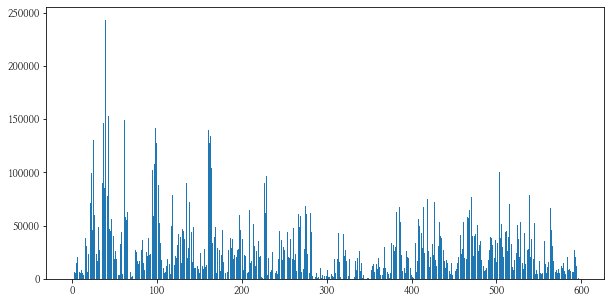

In [52]:
# 막대 그래프로 표현
import matplotlib.pyplot as mlt

plt.figure(figsize=(10,5))
plt.bar(range(len(result)), result)
plt.show()

데이터의 편차가 매우 크다는 사실을 알 수 있습니다. 그래서 이번에는 데이터를 오름차순으로 정렬하는 코드만 한 줄 추가한 후 다시 한번 막대그래프로 표현하겠습니다.

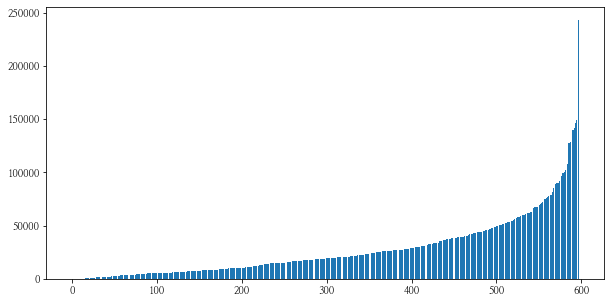

In [54]:
result.sort()

plt.figure(figsize=(10,5))
plt.bar(range(len(result)), result)
plt.show()

딱 한 역이 다른 역과는 엄청나게 큰 차이를 두고 1위를 하고 있다는 사실을 알 수 있습니다. 또 598개 역 중 85% 정도인 500개 역은 5만 명이 안 되고 15% 정도만 5만 명이 넘는다는 사실도 알 수 있습니다.

그러면 출근 시간대라고 할 수 있는 7~9시까지 승차 인원을 합치면 어떻게 될까요?

7시 승차 데이터가 10번 인덱스에 있었으니까 10번, 12번, 14번 인덱스의 값을 합쳐서 막대그래프로 표현하겠습니다.

In [64]:
f = open('subwaytime.csv', encoding='cp949')
time = csv.reader(f)
next(time)
next(time)

for row in time:
    row[4:] = map(int, row[4:])
    print(row[10:15:2])
    print(sum(row[10:15:2]))

[39110, 80492, 61108]
180710
[7703, 9978, 12818]
30499
[6733, 11028, 14563]
32324
[6066, 9735, 14261]
30062
[5143, 8509, 12652]
26304
[14893, 24080, 23381]
62354
[20077, 30505, 21746]
72328
[22615, 34862, 24786]
82263
[46015, 65427, 42110]
153552
[6088, 9415, 8843]
24346
[5822, 8873, 12013]
26708
[8459, 15748, 20905]
45112
[5822, 10508, 13616]
29946
[3225, 5851, 8888]
17964
[7973, 14495, 14614]
37082
[27835, 47992, 28853]
104680
[38199, 68229, 36040]
142468
[31012, 60304, 36056]
127372
[6313, 10105, 7567]
23985
[23263, 35147, 22016]
80426
[25458, 36540, 27967]
89965
[59821, 113196, 73042]
246059
[70814, 130380, 74902]
276096
[99368, 148781, 112708]
360857
[45639, 62872, 36720]
145231
[130638, 194415, 139336]
464389
[59461, 89078, 55152]
203691
[18787, 29489, 21264]
69540
[17974, 26821, 27266]
72061
[23502, 39674, 38921]
102097
[16391, 29868, 28302]
74561
[48487, 80456, 68596]
197539
[27365, 44501, 35621]
107487
[14946, 24883, 26352]
66181
[26301, 41197, 31970]
99468
[78413, 110378, 803

In [85]:
f = open('subwaytime.csv', encoding='cp949')
time = csv.reader(f)
next(time)
next(time)

for row in time:
    row[4:] = map(int, row[4:])
    result.append(sum(row[10:15:2]))

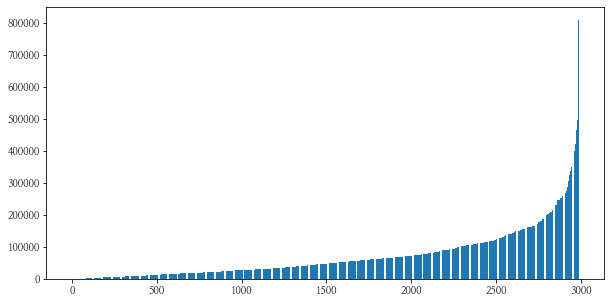

In [86]:
result.sort()
plt.figure(figsize=(10,5))
plt.bar(range(len(result)), result)
plt.show()

3시간 동안 80만 명이 들어오는 역은 과연 어디일까요?

이 문제는 지금까지 많이 다뤄본 패턴인 ‘최댓값 찾기’이므로 전체 코드를 한번에 작성하겠습니다. 먼저 승차 인원의 최댓값을 저장할 변수 mx와 역의 정보를 저장할 변수 mx_station을 초기화하고, 7시부터 9시까지의 승차 인원 합계의 최댓값을 찾아서 출력합니다.

In [67]:
f = open('subwaytime.csv', encoding='cp949')
time = csv.reader(f)
next(time)
next(time)

mx = 0
mx_station = ''

for row in time:
    row[4:] = map(int, row[4:])
    if sum(row[10:15:2]) > mx:
        mx = sum(row[10:15:2])
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx)

신림(2호선) 809541


출근 시간대에 사람들이 가장 많이 내리는 역은 어디일까요? 이 질문의 답은 아마 직장이 가장 많은 곳이 답이겠죠? 이번 답은 비교적 많은 사람이 맞힐 수 있을 것 같네요.

코드는 승차 데이터를 하차 데이터로 수정하기만 하면 됩니다. 다만, 코드에서 sum(row[10:15:2]) 부분이 여러 번 쓰였던 것을 보다 간단하게 작성할 수 있도록 개선하겠습니다. 중복되는 부분을 변수 a에 저장하여 a값을 사용함으로써 중복되는 코드를 최소화할 수 있습니다.

In [68]:
# 출근 시간대 사람들이 가장 많이 타고 내리는 역 찾기

f = open('subwaytime.csv', encoding='cp949')
time = csv.reader(f)
next(time)
next(time)

mx = 0
mx_station = ''

for row in time:
    row[4:] = map(int, row[4:])
    a = row[11:16:2] # 하차 인원 값 추출
    if sum(a) > mx:
        mx = sum(a)
        mx_station = row[3] + '(' + row[1] + ')'
        
print(mx_station, mx)

강남(2호선) 984427


## 3. 밤 11시에 사람들이 가장 많이 타는 역은 어디일까

밤 11시에 사람들이 가장 많이 타는 역은 어디일까요? 밤 11시라면 23시 00분 00초부터 23시 59분 59초 사이를 말합니다. 그러면 이 시간대에 사람들이 어떤 역에 탄다면 이 사람들은 이 시간에 왜 지하철에 탔을까요? 그 전까지 무엇을 했을지 생각해 보면 답을 찾는 과정이 더 재미있을 겁니다.

그런데 밤 11시의 데이터는 몇 번 인덱스에 있을까요? 출근 시간대의 경우 7시, 8시, 9시라서 한 칸씩 셀 수 있었는데, 이번에는 23시니까 패턴을 찾아서 분석하는 것이 더 좋을 것 같습니다.

데이터를 다시 관찰하니 승차 시각이 1시간씩 늦어질 때마다 승차 인원에 해당하는 인덱스는 2씩 늘어납니다. 그리고 승차를 시작하는 시각의 인덱스 값은 4입니다. 즉, 0시가 아니라 4시부터 승차가 시작된다는 점을 고려해야 하겠네요.

이러한 단서를 바탕으로 승차 시각(t)과 승차 인원이 적힌 인덱스(i) 값의 관계를 분석하니 i = 4 + (t – 4) * 2라는 패턴을 찾을 수 있습니다.
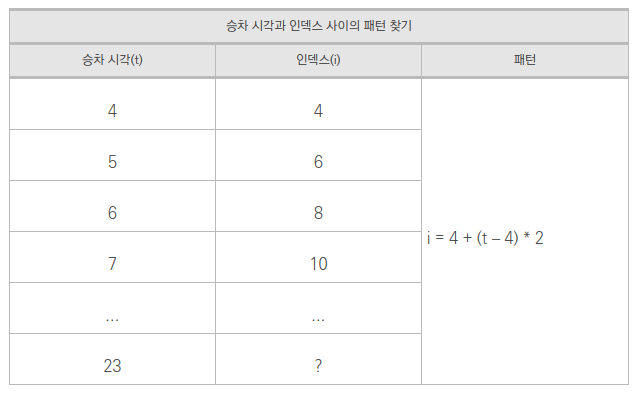

이 식을 계산해서 i = 4 + 2 * t - 8 = 2 * t – 4라고 코드를 작성할 수도 있습니다.

이제 이 패턴을 추가하고 시간 t는 input() 함수로 입력을 받도록 코드를 수정합니다. 그리고 23을 입력하면 밤 11시에 사람들이 가장 많이 타는 역이 출력됩니다.

In [69]:
# 밤 11시에 사람들이 가장 많이 타고 내리는 역을 찾는 코드

f = open('subwaytime.csv', encoding='cp949')
time = csv.reader(f)
next(time)
next(time)

mx = 0
mx_station = ''

t = int(input("몇 시의 승차 인원이 가장 많은 역이 궁금하세요? : "))

for row in time:
    row[4:] = map(int, row[4:])
    a = row[4+(t-4)*2]   # 입력 받은 시각의 승차 인원 값 추출하기
    if a > mx: 
        mx = a
        mx_station = row[3] + '(' + row[1] + ')'
        
print(mx_station, mx)

몇 시의 승차 인원이 가장 많은 역이 궁금하세요? : 23
강남(2호선) 145504


## 4.  시간대별로 사람들이 가장 많이 타고 내리는 역은 어디일까
다른 시간대에 사람들로 붐비는 역은 어디일까요? 커피 한 잔이 생각나는 오후 2시에는 어떤 역에 사람들이 많을까요? 시간대별로 승차 인원이 가장 많은 역의 이름과 인원을 한눈에 파악할 수 있는 그래프를 만들면 재미있을 것 같습니다.

앞의 코드가 특정한 시간에 대한 결과를 알려주는 것이었으니까 이번에는 24시간 전체에 대해 계산하면 될 것 같습니다. for 반복문을 사용하는 것이 좋겠죠? 그리고 시간대별 데이터를 각각 저장할 리스트도 필요하겠네요.

for 반복문을 사용하기 위해 패턴을 다시 살펴보겠습니다. 우리가 표현할 시간대는 24시간을 1시간 단위로 구분하였으므로 총 24개입니다. for 반복문의 반복 횟수를 24로 지정하고자 range() 함수를 사용한다면 range(24)라고 쓸 수 있습니다.

range() 함수는 0부터 시작하니, 다음과 같이 0~23까지의 반복을 표현할 변수 j를 만들고 인덱스 값과의 관계를 생각해봅시다. j는 0부터 시작하고 우리가 원하는 승차 인원 값의 인덱스 i는 4부터 시작합니다. 변수 j와 인덱스 i의 패턴을 분석하여 i = j * 2 + 4라는 패턴을 찾았습니다.

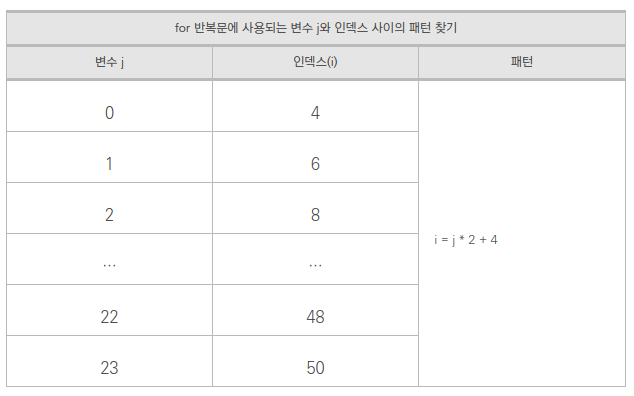

In [71]:
f = open('subwaytime.csv', encoding='cp949')
time = csv.reader(f)
next(time)
next(time)

mx = [0] * 24
mx_station = [''] * 24

for row in time:
    row[4:] = map(int, row[4:])
    for j in range(24):
        a = row[j*2+4]
        if a > mx[j]:
            mx[j] = a
            mx_station[j] = row[3]
print(mx_station)
print(mx)

['구로', '홍대입구', '신림', '신림', '신림', '신림', '신림', '신림', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '성신여대입구(돈암)', '신방화']
[8418, 42966, 80407, 243083, 355172, 211286, 113830, 98765, 126159, 170216, 169097, 203483, 227268, 291623, 431115, 292521, 235489, 295326, 314609, 145504, 27203, 36, 3, 1]


이제 이 데이터를 바탕으로 막대그래프를 그려보겠습니다. x축에는 시간대별 1위를 차지한 역의 이름을 90도 회전하여 표현하겠습니다. 역 이름과 인원 수를 출력하던 15~16행 코드를 지우고, 다음 코드를 추가합니다.

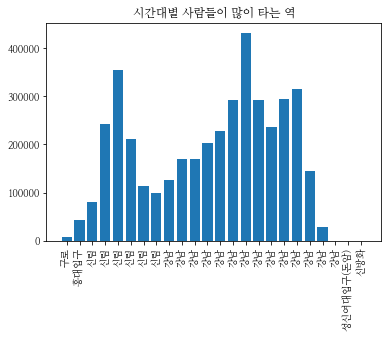

In [77]:
plt.title('시간대별 사람들이 많이 타는 역')
plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

['구로(4시)', '홍대입구(5시)', '신림(6시)', '신림(7시)', '신림(8시)', '신림(9시)', '신림(10시)', '신림(11시)', '강남(12시)', '강남(13시)', '강남(14시)', '강남(15시)', '강남(16시)', '강남(17시)', '강남(18시)', '강남(19시)', '강남(20시)', '강남(21시)', '강남(22시)', '강남(23시)', '강남(24시)', '강남(25시)', '성신여대입구(돈암)(26시)', '신방화(27시)']
[8418, 42966, 80407, 243083, 355172, 211286, 113830, 98765, 126159, 170216, 169097, 203483, 227268, 291623, 431115, 292521, 235489, 295326, 314609, 145504, 27203, 36, 3, 1]


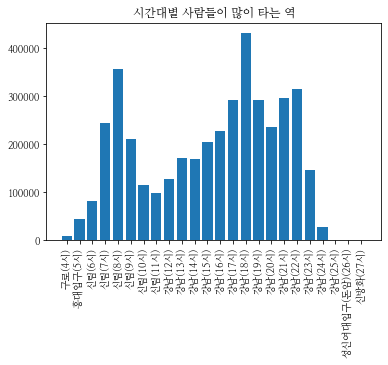

In [79]:
f = open('subwaytime.csv', encoding='cp949')
time = csv.reader(f)
next(time)
next(time)

mx = [0] * 24
mx_station = [''] * 24

for row in time:
    row[4:] = map(int, row[4:])
    for j in range(24):
        a = row[j*2+4]
        if a > mx[j]:
            mx[j] = a
            mx_station[j] = row[3] + '(' + str(j+4) + '시)'
            
print(mx_station)
print(mx)

plt.title('시간대별 사람들이 많이 타는 역')
plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

맨 오른쪽에 출력된 창신역 옆의 괄호 안에는 26이 적혀 있습니다. 이는 새벽 2시를 의미합니다. 25, 26 같은 숫자를 1과 2로 바꾸어 표현하는 것은 여러분께 맡기겠습니다.

이어서 시간대별 하차 인원이 가장 많은 역과 그 인원수를 막대그래프로 표현해 보겠습니다. 앞에서 작성한 시간대별 승차 인원이 가장 많은 역에 대한 막대그래프를 그리는 코드와 대부분 비슷합니다. 하차 인원 값을 의미하는 인덱스 값에 맞춰 바뀐 데이터 패턴과 변수 이름과 막대그래프의 색만 수정하였습니다. 또한 그래프 시각화에 사용되는 matplotlib 라이브러리를 불러오는 코드를 앞으로 옮겼습니다.

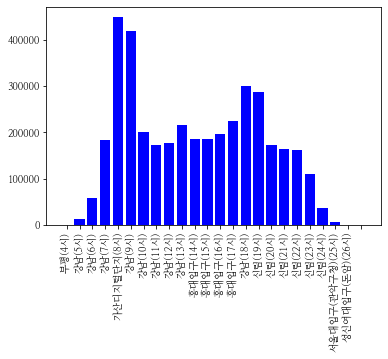

In [81]:
# 시간대별로 하차 인원 인원이 가장 많은 역을 찾는 코드

import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv', encoding='cp949')
time = csv.reader(f)
next(time)
next(time)

mx = [0] * 24
mx_station = [''] * 24

for row in time:
    row[4:] = map(int, row[4:])
    for j in range(24):
        b = row[5+j*2]
        if b > mx[j]:
            mx[j] = b
            mx_station[j] = row[3] + '(' + str(j+4) + '시)'
            
plt.bar(range(24), mx, color='b')
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

## 5. 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면
지금까지는 사람들이 ‘가장 많이’ 타고 내리는 역이 어디이며, 그 시간대는 언제인지 살펴보았습니다. 만약 모든 지하철역의 시간대별 승하차 인원을 더하면 어떤 결과를 확인할 수 있을까요?

이 질문을 해결하기 위한 알고리즘은 다음과 같이 간단히 생각할 수 있습니다.


1 | 데이터를 읽어온다.

2 | 모든 역에 대해 시간대별 승차 인원과 하차 인원을 누적해서 더한다.

3 | 시간대별 승차 인원과 하차 인원을 그래프로 표현한다.

먼저 데이터를 읽어옵니다. 24시간 데이터를 순서대로 저장하기 위해 리스트를 사용합니다. 그리고 승차와 하차 데이터를 각각 저장하기 위한 리스트인 s_in과 s_out을 만듭니다.

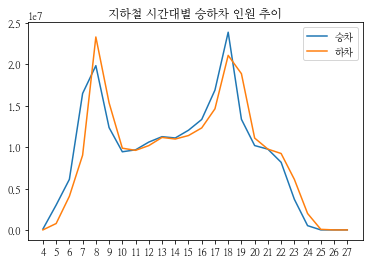

In [84]:
f = open('subwaytime.csv', encoding='cp949')
time = csv.reader(f)
next(time)
next(time)

s_in = [0] * 24
s_out = [0] * 24

for row in time:
    row[4:] = map(int, row[4:])
    for i in range(24):
        s_in[i] += row[4+i*2]
        s_out[i] += row[5+i*2]
        
# 꺾은선 그래프
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label='승차')
plt.plot(s_out, label='하차')
plt.legend()
plt.xticks(range(24), range(4, 28))
plt.show()